In [234]:
#  بسم الله الرحمن الرحيم \

- visulaize the imbalancing in the data 
- dealing with this probelm 
- detect the outliers 
- deal with them 


## importing important packages 


In [235]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns 
plt.style.use('default')
#-------------------------------------------------------------------------------------
from sklearn.utils import resample 
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.pipeline import Pipeline 

import tensorflow_addons as tfa
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers 
from focal_loss import SparseCategoricalFocalLoss

#-------------------------------------------------------------------------------------

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
#-------------------------------------------------------------------------------------

plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

## Reading the dataset 

In [236]:
df = pd.read_csv("dataset/body_level_classification_train.csv")

## exploring the data 


### exploring the imbalances in the dataset 

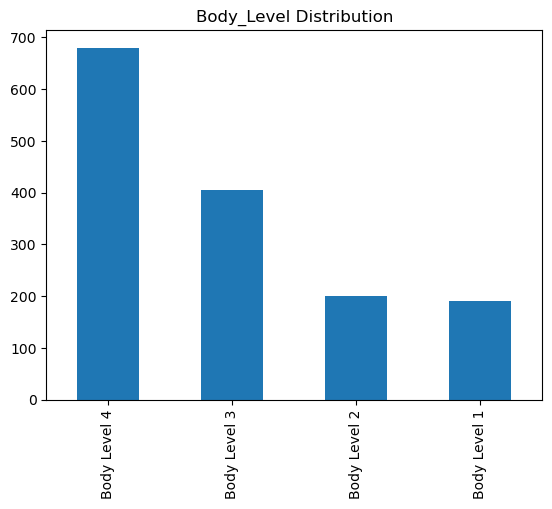

In [138]:
ax = df["Body_Level"].value_counts() \
     .plot(kind='bar', title='Body_Level Distribution')
plt.show()

In [139]:
df["Gender"].value_counts()

Male      746
Female    731
Name: Gender, dtype: int64

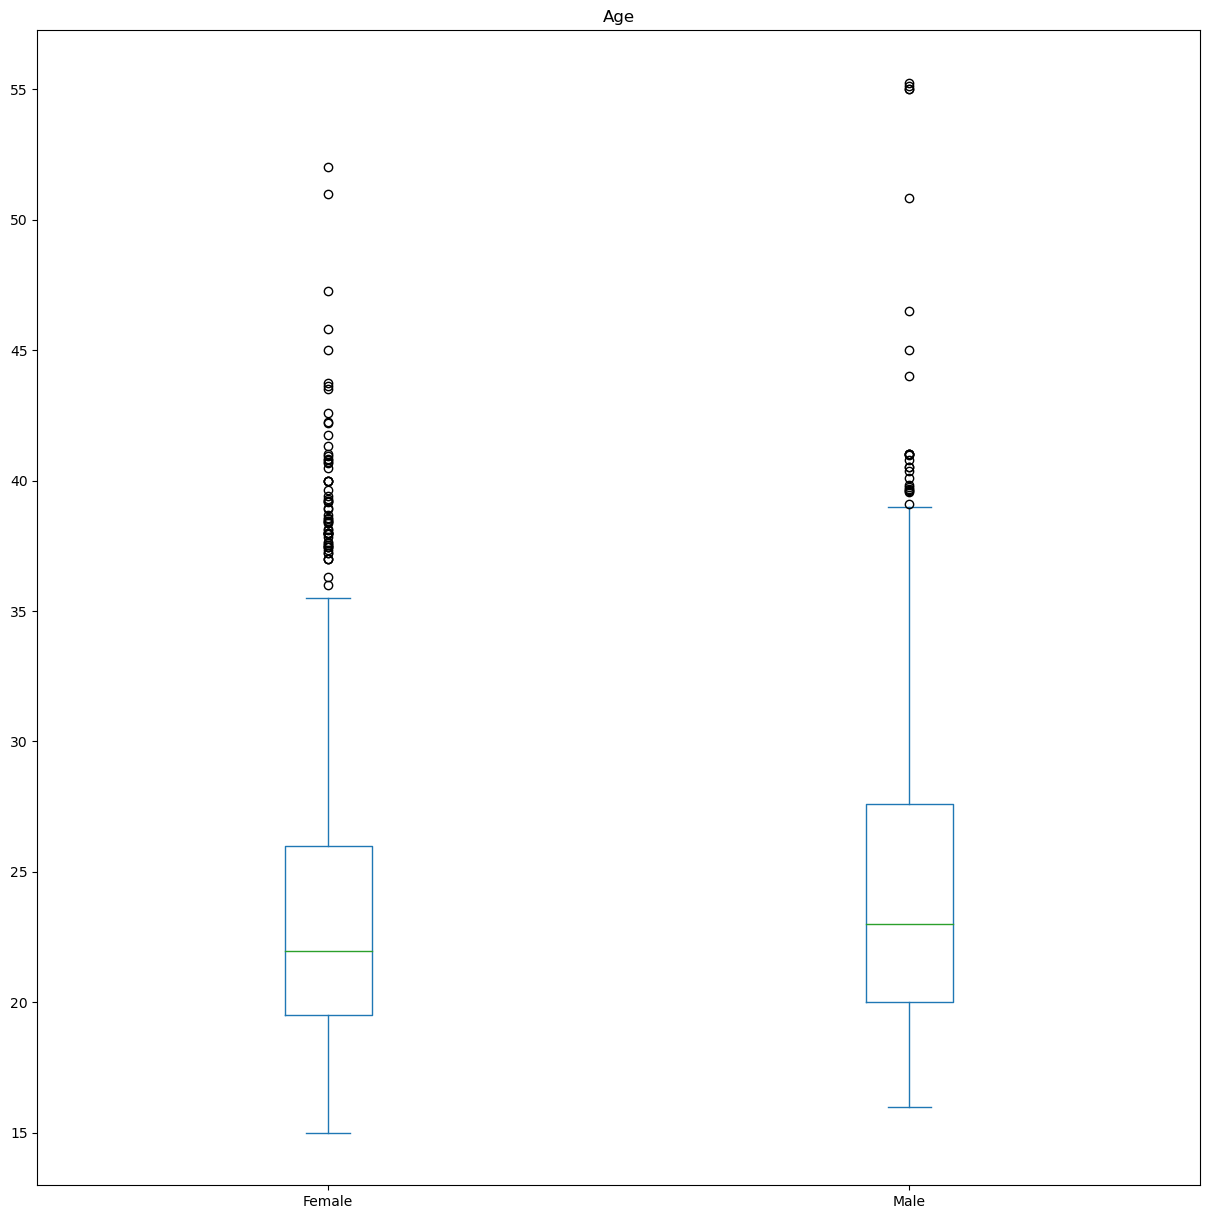

In [140]:
ax = df.plot.box(column='Age', by='Gender', figsize=(15,15))
plt.show()

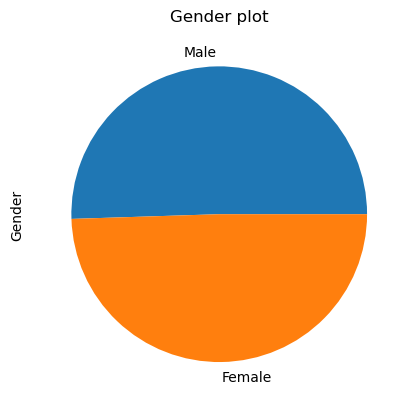

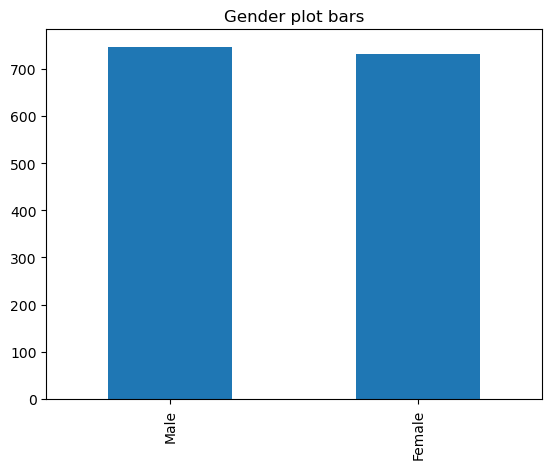

####################################################################
####################################################################


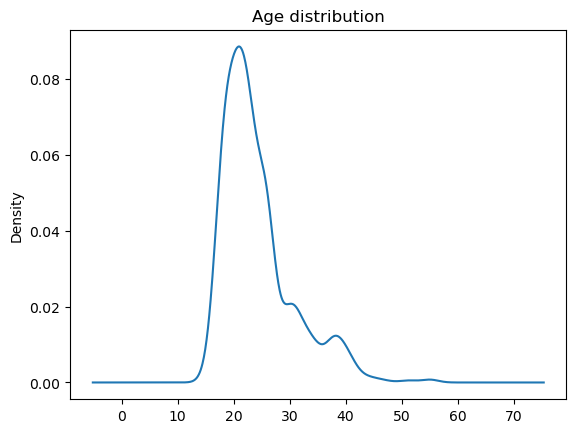

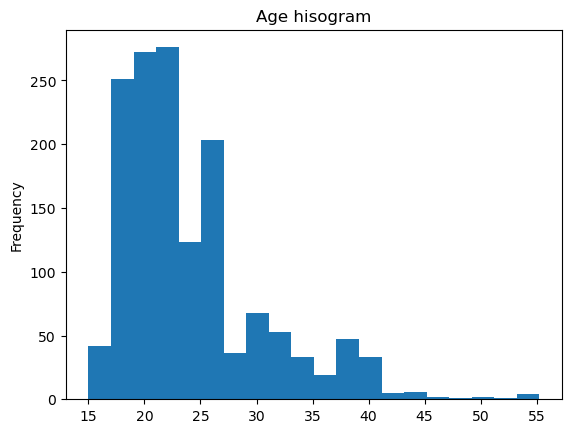

####################################################################
####################################################################


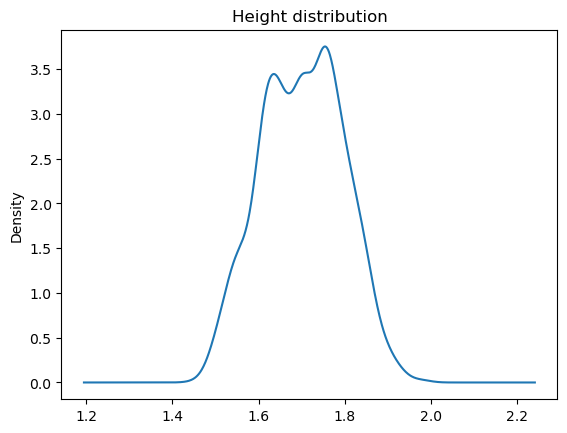

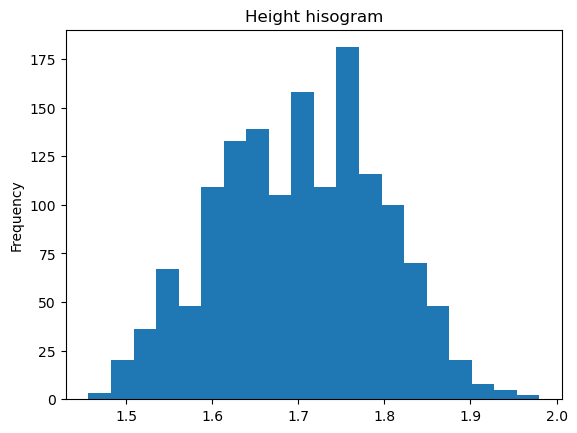

####################################################################
####################################################################


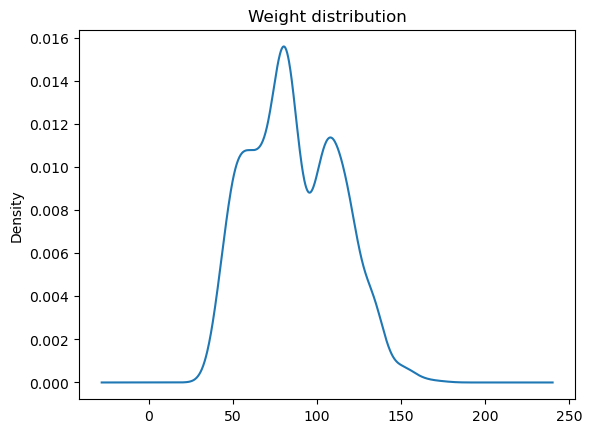

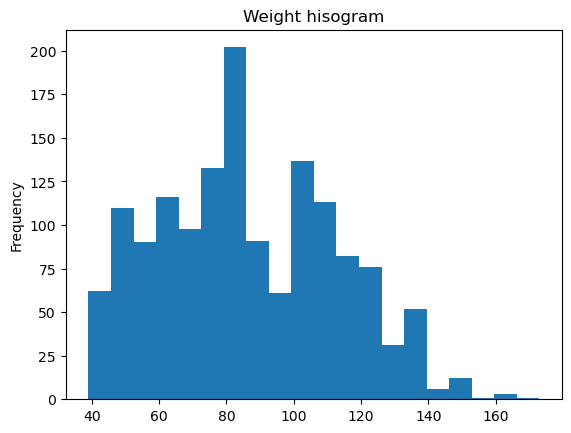

####################################################################
####################################################################


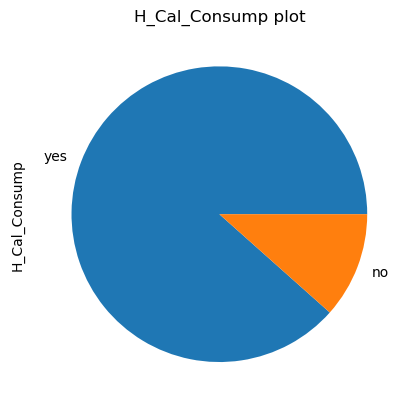

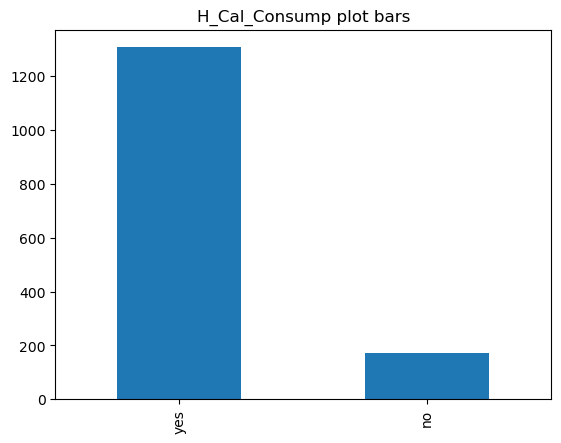

####################################################################
####################################################################


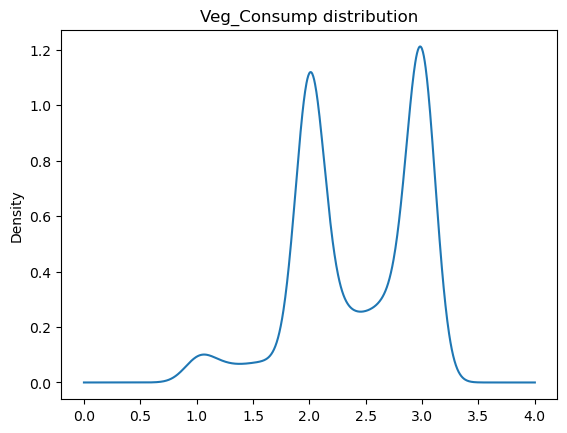

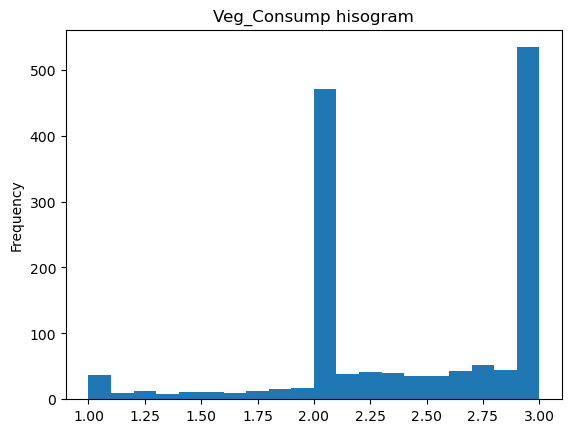

####################################################################
####################################################################


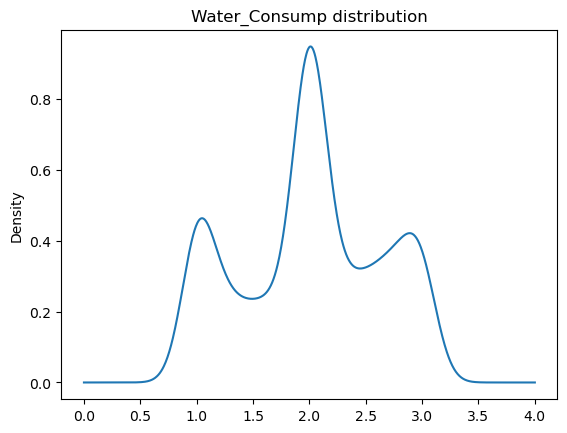

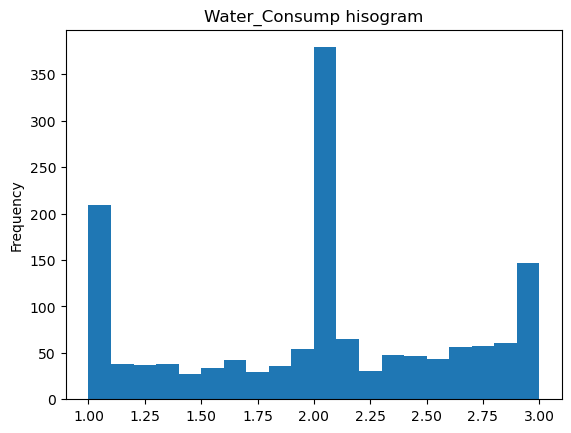

####################################################################
####################################################################


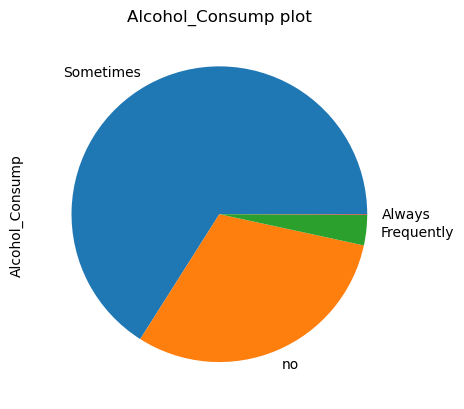

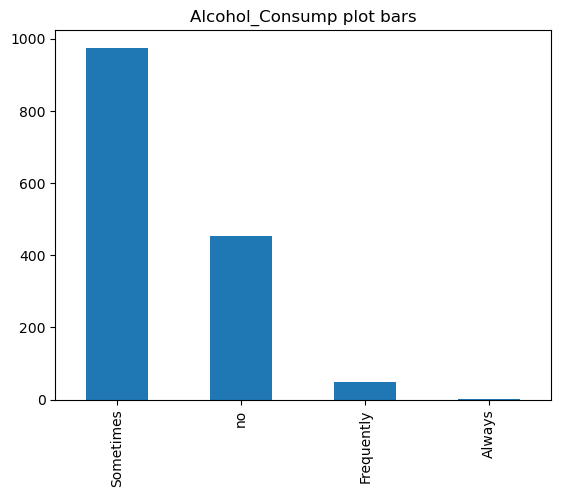

####################################################################
####################################################################


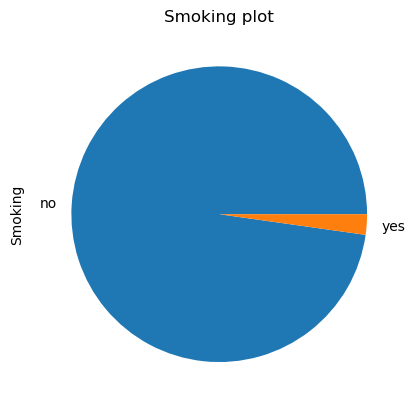

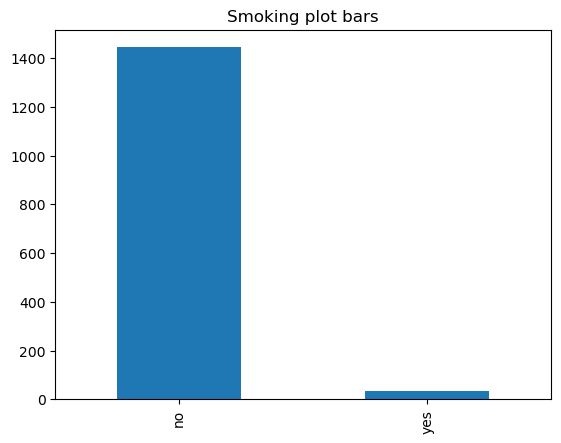

####################################################################
####################################################################


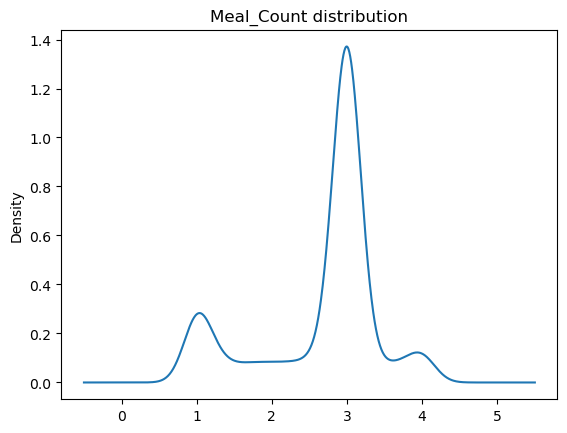

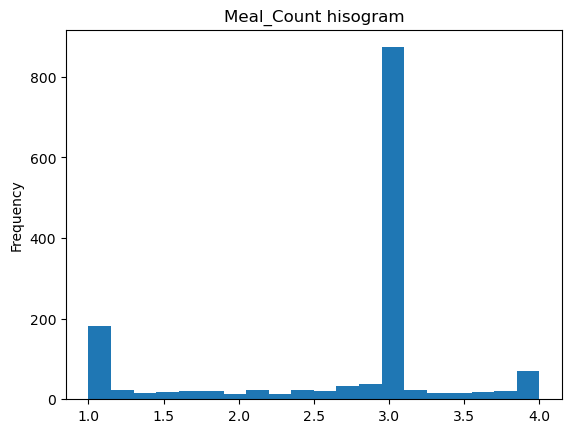

####################################################################
####################################################################


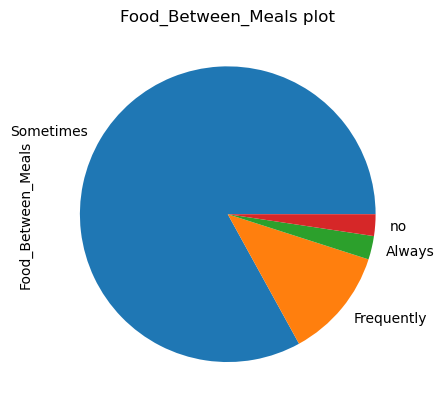

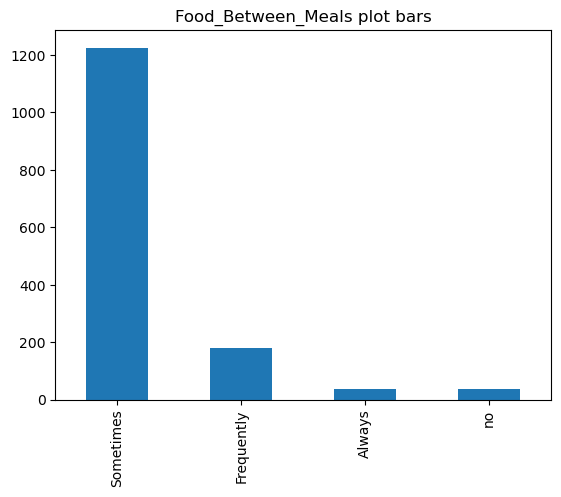

####################################################################
####################################################################


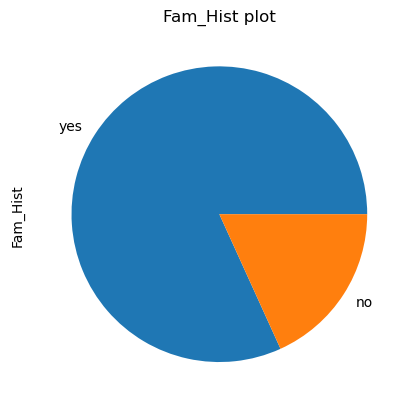

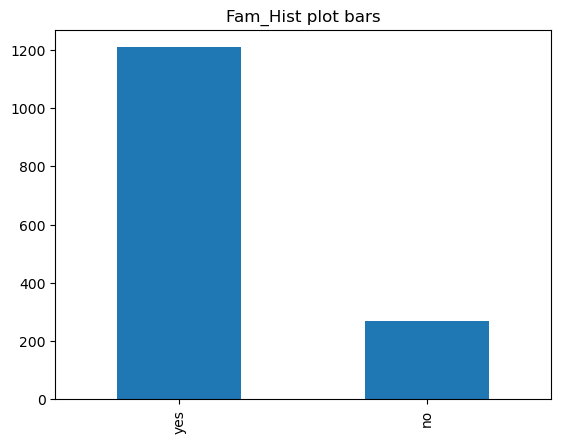

####################################################################
####################################################################


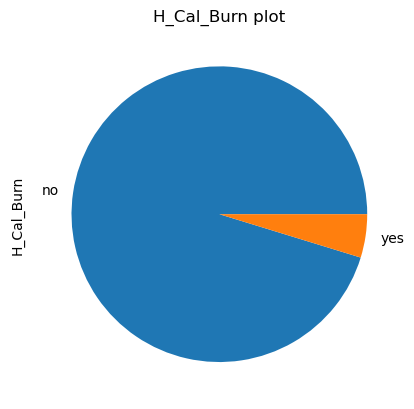

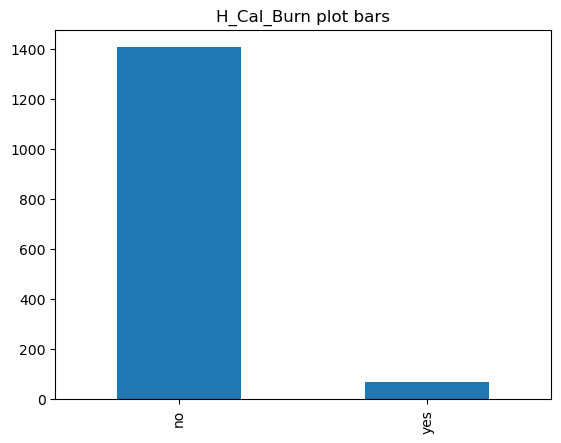

####################################################################
####################################################################


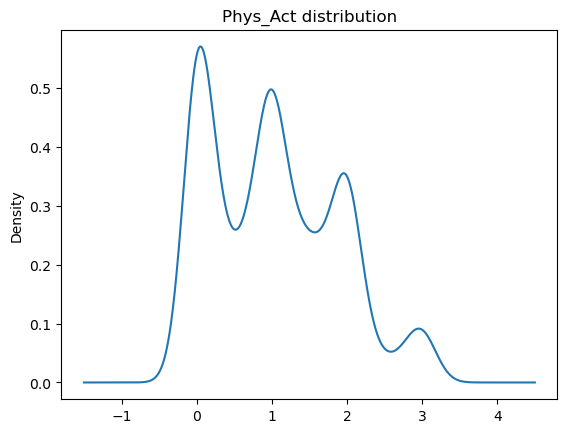

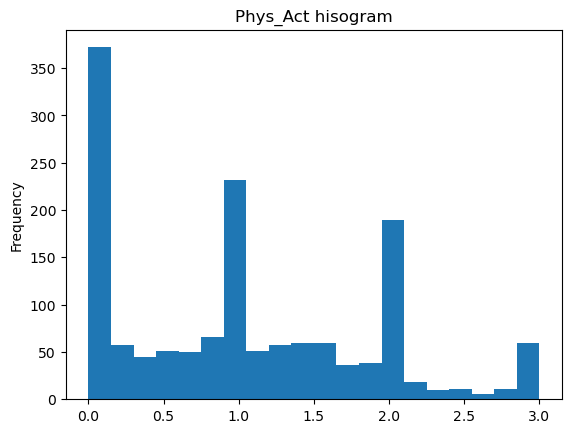

####################################################################
####################################################################


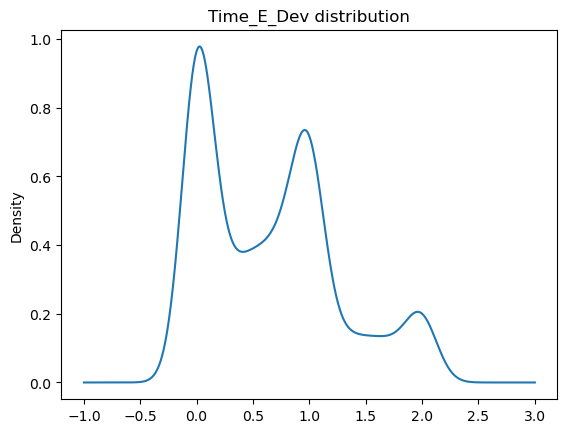

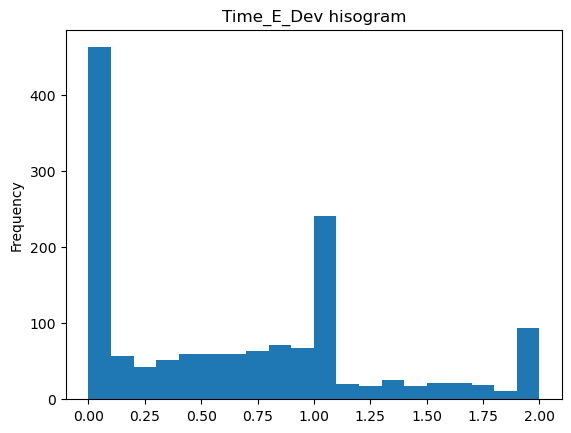

####################################################################
####################################################################


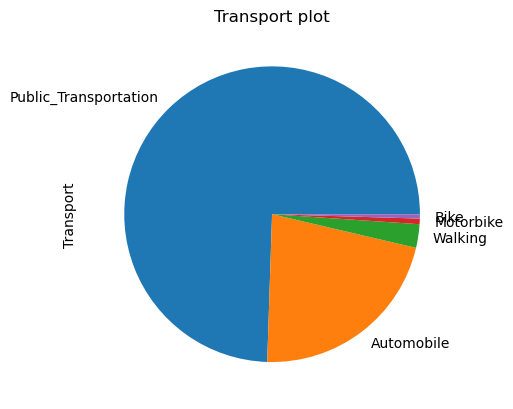

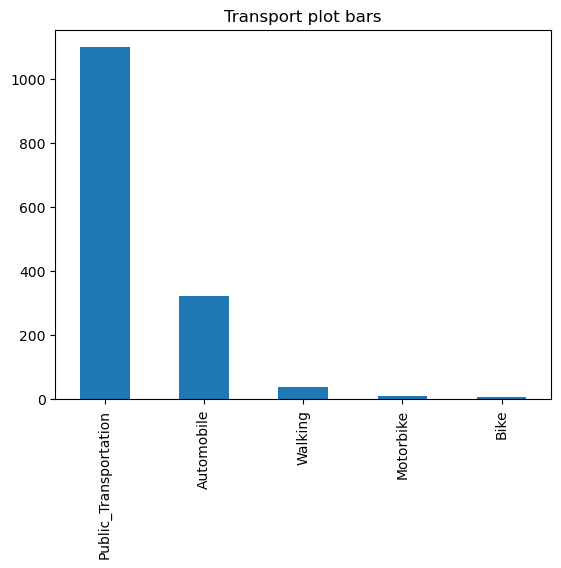

####################################################################
####################################################################


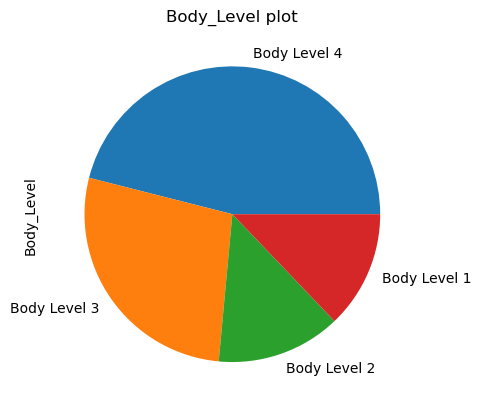

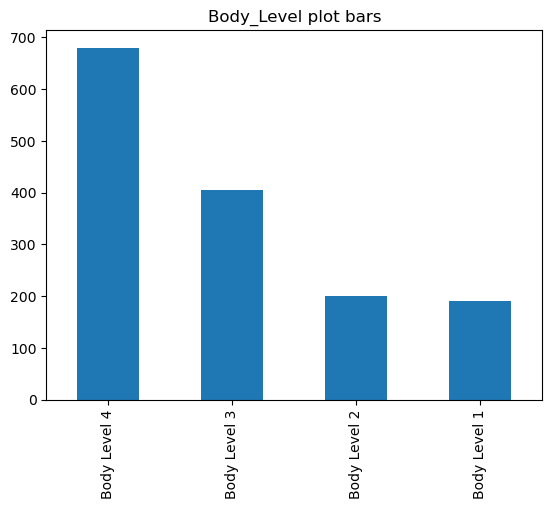

####################################################################
####################################################################


In [141]:
for i in df.columns : 
    if df[i].dtype.name == 'object':
        df[i].value_counts().plot(kind="pie",title=f"{i} plot")
        plt.show()
        df[i].value_counts().plot(kind='bar',title=f"{i} plot bars")
        
    else :
        df[i].plot(kind='kde' , title=f"{i} distribution")
        plt.show()
        df[i].plot(kind='hist', bins=20, title=f"{i} hisogram")
    
    plt.show()
    
    print("####################################################################")
    print("####################################################################")

## Data cleaing and preparing for the Training 

### initially I thought in Alcohol_Consump as one hot vector but I found that we can consider it as ordinal field according to "severity" but you should try make them one hot enconding and see the difference in the results 

In [237]:
def cleaning_data(df):
    copy_df = df.copy()
    print(copy_df.shape)
    # converting the categorical data to numeric data . 
    # in H_cal_consump we don't need one hot vector it just one or zero
    copy_df["H_Cal_Consump"].replace(["yes","no"],[1,0], inplace=True)
    copy_df["Gender"].replace(['Male',"Female"],[1,0], inplace=True)
    copy_df["Alcohol_Consump"].replace(["no","Sometimes","Frequently","Always"],[0,1,2,3],inplace=True)
    copy_df["Smoking"].replace(["yes","no"],[1,0], inplace=True)
    copy_df=pd.concat([copy_df,pd.get_dummies(copy_df['Food_Between_Meals'],prefix="FBM_")],axis=1)
    copy_df.drop(['Food_Between_Meals'],axis=1,inplace=True)
    copy_df['Fam_Hist'].replace(['yes','no'],[1,0],inplace=True)
    copy_df['H_Cal_Burn'].replace(['yes','no'],[1,0],inplace=True)
    copy_df = pd.concat([copy_df,pd.get_dummies(copy_df["Transport"])],axis=1)
    copy_df.drop(['Transport'],axis=1,inplace=True)
    copy_df["Body_Level"].replace(["Body Level 1","Body Level 2","Body Level 3","Body Level 4"],
                              [0,1,2,3],inplace=True)
    
    
    return copy_df
    
    
    

## dealing with imbalancies 
 - oversampling 
  

In [238]:
df["Body_Level"].value_counts()

Body Level 4    680
Body Level 3    406
Body Level 2    201
Body Level 1    190
Name: Body_Level, dtype: int64

In [239]:
df_original= cleaning_data(df).copy()

(1477, 17)


## Applying all the models before applying any Technique that  can help in the imbalancies 

In [240]:

X_train=df_original.drop(["Body_Level"],axis=1).to_numpy()
Y_train=df_original["Body_Level"].to_numpy()

In [241]:
pipe = Pipeline([('scaler',preprocessing.StandardScaler()),
                 ('RF',DecisionTreeClassifier(criterion='entropy'))])

In [242]:
_scoring = ['accuracy']

In [243]:
results = cross_validate(estimator=pipe,
                               X=X_train,
                               y=Y_train,
                               cv=7,
                               scoring=_scoring,
                               return_train_score=True)

In [244]:
results["train_accuracy"].mean()*100

100.0

In [245]:
results["test_accuracy"].mean()*100

95.4637779282329

In [246]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train
                                                    , Y_train, test_size=0.3, random_state=42)

In [247]:
scaler =preprocessing.StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)

In [248]:
reg_model = LogisticRegression(random_state=42,max_iter=1000).fit(X_train,Y_train)

In [249]:
Y_train_pred=reg_model.predict(X_train)

In [250]:
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       141
           1       0.93      0.73      0.82       129
           2       0.92      0.98      0.95       286
           3       1.00      0.99      1.00       477

    accuracy                           0.96      1033
   macro avg       0.94      0.92      0.93      1033
weighted avg       0.96      0.96      0.95      1033



In [251]:
X_test=scaler.transform(X_test)
Y_test_pred=reg_model.predict(X_test)

In [252]:
print(classification_report(Y_test,Y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89        49
           1       0.86      0.71      0.78        72
           2       0.90      0.92      0.91       120
           3       0.99      0.99      0.99       203

    accuracy                           0.92       444
   macro avg       0.89      0.90      0.89       444
weighted avg       0.92      0.92      0.92       444



In [253]:
rand_forest_model = RandomForestClassifier(max_depth=40,random_state=42).fit(X_train,Y_train)

In [254]:
Y_train_pred=rand_forest_model.predict(X_train)

In [255]:
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       129
           2       1.00      1.00      1.00       286
           3       1.00      1.00      1.00       477

    accuracy                           1.00      1033
   macro avg       1.00      1.00      1.00      1033
weighted avg       1.00      1.00      1.00      1033



In [256]:
Y_test_pred=rand_forest_model.predict(X_test)

In [257]:
print(classification_report(Y_test,Y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94        49
           1       0.80      0.89      0.84        72
           2       0.92      0.91      0.91       120
           3       0.99      0.98      0.98       203

    accuracy                           0.93       444
   macro avg       0.92      0.92      0.92       444
weighted avg       0.94      0.93      0.94       444



In [258]:
X_val, X_test, Y_val, Y_test = train_test_split(X_test
                                                    , Y_test, test_size=0.5, random_state=42)

In [268]:
print(X_test.shape)

(222, 23)


In [269]:
mc = ModelCheckpoint('Best_Logistic_before_over_Sampling_after_editing_.h5', monitor='val_accuracy', mode='max'
                     , verbose=1, save_best_only=True)



model_NN=keras.Sequential([keras.Input(shape=(23)),
                        layers.Dense(4,activation='softmax')])





In [270]:
model_NN.compile(loss=SparseCategoricalFocalLoss(from_logits=False,gamma=2),
              optimizer=keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy"])



In [271]:
history = model_NN.fit(X_train,Y_train,validation_data=[X_val,Y_val] 
             ,batch_size=32, epochs=300 , verbose =1, callbacks=[mc])


Epoch 1/300
26/33 [======================>.......] - ETA: 0s - loss: 0.8816 - accuracy: 0.4663 
Epoch 1: val_accuracy improved from -inf to 0.56757, saving model to Best_Logistic_before_over_Sampling_after_editing_.h5
33/33 [==============================] - 1s 9ms/step - loss: 0.8282 - accuracy: 0.4850 - val_loss: 0.5787 - val_accuracy: 0.5676
Epoch 2/300
27/33 [=======================>......] - ETA: 0s - loss: 0.4761 - accuracy: 0.5949
Epoch 2: val_accuracy improved from 0.56757 to 0.63964, saving model to Best_Logistic_before_over_Sampling_after_editing_.h5
33/33 [==============================] - 0s 4ms/step - loss: 0.4498 - accuracy: 0.6108 - val_loss: 0.4151 - val_accuracy: 0.6396
Epoch 3/300
18/33 [===============>..............] - ETA: 0s - loss: 0.3606 - accuracy: 0.6510
Epoch 3: val_accuracy improved from 0.63964 to 0.66216, saving model to Best_Logistic_before_over_Sampling_after_editing_.h5
33/33 [==============================] - 0s 4ms/step - loss: 0.3452 - accuracy: 0.66

31/33 [===========================>..] - ETA: 0s - loss: 0.1054 - accuracy: 0.9224
Epoch 26: val_accuracy did not improve from 0.87838
33/33 [==============================] - 0s 3ms/step - loss: 0.1059 - accuracy: 0.9206 - val_loss: 0.1399 - val_accuracy: 0.8604
Epoch 27/300
26/33 [======================>.......] - ETA: 0s - loss: 0.1059 - accuracy: 0.9075
Epoch 27: val_accuracy improved from 0.87838 to 0.88739, saving model to Best_Logistic_before_over_Sampling_after_editing_.h5
33/33 [==============================] - 0s 4ms/step - loss: 0.1040 - accuracy: 0.9138 - val_loss: 0.1329 - val_accuracy: 0.8874
Epoch 28/300
27/33 [=======================>......] - ETA: 0s - loss: 0.1034 - accuracy: 0.9155
Epoch 28: val_accuracy did not improve from 0.88739
33/33 [==============================] - 0s 3ms/step - loss: 0.1018 - accuracy: 0.9177 - val_loss: 0.1319 - val_accuracy: 0.8829
Epoch 29/300
33/33 [==============================] - ETA: 0s - loss: 0.0985 - accuracy: 0.9216
Epoch 29: va

32/33 [============================>.] - ETA: 0s - loss: 0.0610 - accuracy: 0.9492
Epoch 54: val_accuracy did not improve from 0.92793
33/33 [==============================] - 0s 3ms/step - loss: 0.0616 - accuracy: 0.9477 - val_loss: 0.0860 - val_accuracy: 0.9054
Epoch 55/300
30/33 [==========================>...] - ETA: 0s - loss: 0.0601 - accuracy: 0.9458
Epoch 55: val_accuracy did not improve from 0.92793
33/33 [==============================] - 0s 3ms/step - loss: 0.0599 - accuracy: 0.9468 - val_loss: 0.0799 - val_accuracy: 0.9234
Epoch 56/300
29/33 [=========================>....] - ETA: 0s - loss: 0.0584 - accuracy: 0.9558
Epoch 56: val_accuracy did not improve from 0.92793
33/33 [==============================] - 0s 3ms/step - loss: 0.0587 - accuracy: 0.9545 - val_loss: 0.0794 - val_accuracy: 0.9144
Epoch 57/300
33/33 [==============================] - ETA: 0s - loss: 0.0573 - accuracy: 0.9506
Epoch 57: val_accuracy did not improve from 0.92793
33/33 [===========================

33/33 [==============================] - 0s 3ms/step - loss: 0.0426 - accuracy: 0.9632 - val_loss: 0.0578 - val_accuracy: 0.9550
Epoch 83/300
29/33 [=========================>....] - ETA: 0s - loss: 0.0431 - accuracy: 0.9677
Epoch 83: val_accuracy did not improve from 0.95495
33/33 [==============================] - 0s 3ms/step - loss: 0.0415 - accuracy: 0.9700 - val_loss: 0.0555 - val_accuracy: 0.9505
Epoch 84/300
32/33 [============================>.] - ETA: 0s - loss: 0.0412 - accuracy: 0.9648
Epoch 84: val_accuracy did not improve from 0.95495
33/33 [==============================] - 0s 3ms/step - loss: 0.0411 - accuracy: 0.9652 - val_loss: 0.0561 - val_accuracy: 0.9550
Epoch 85/300
33/33 [==============================] - ETA: 0s - loss: 0.0410 - accuracy: 0.9593
Epoch 85: val_accuracy did not improve from 0.95495
33/33 [==============================] - 0s 3ms/step - loss: 0.0410 - accuracy: 0.9593 - val_loss: 0.0532 - val_accuracy: 0.9550
Epoch 86/300
32/33 [====================

33/33 [==============================] - 0s 2ms/step - loss: 0.0323 - accuracy: 0.9729 - val_loss: 0.0429 - val_accuracy: 0.9550
Epoch 112/300
 1/33 [..............................] - ETA: 0s - loss: 0.0374 - accuracy: 0.9375
Epoch 112: val_accuracy did not improve from 0.96396
33/33 [==============================] - 0s 3ms/step - loss: 0.0313 - accuracy: 0.9719 - val_loss: 0.0444 - val_accuracy: 0.9595
Epoch 113/300
29/33 [=========================>....] - ETA: 0s - loss: 0.0312 - accuracy: 0.9731
Epoch 113: val_accuracy did not improve from 0.96396
33/33 [==============================] - 0s 3ms/step - loss: 0.0319 - accuracy: 0.9719 - val_loss: 0.0407 - val_accuracy: 0.9640
Epoch 114/300
26/33 [======================>.......] - ETA: 0s - loss: 0.0319 - accuracy: 0.9712
Epoch 114: val_accuracy did not improve from 0.96396
33/33 [==============================] - 0s 4ms/step - loss: 0.0311 - accuracy: 0.9719 - val_loss: 0.0422 - val_accuracy: 0.9595
Epoch 115/300
27/33 [=============

30/33 [==========================>...] - ETA: 0s - loss: 0.0257 - accuracy: 0.9740
Epoch 140: val_accuracy did not improve from 0.97748
33/33 [==============================] - 0s 3ms/step - loss: 0.0256 - accuracy: 0.9748 - val_loss: 0.0337 - val_accuracy: 0.9685
Epoch 141/300
30/33 [==========================>...] - ETA: 0s - loss: 0.0251 - accuracy: 0.9750
Epoch 141: val_accuracy did not improve from 0.97748
33/33 [==============================] - 0s 3ms/step - loss: 0.0251 - accuracy: 0.9748 - val_loss: 0.0341 - val_accuracy: 0.9730
Epoch 142/300
30/33 [==========================>...] - ETA: 0s - loss: 0.0247 - accuracy: 0.9771
Epoch 142: val_accuracy improved from 0.97748 to 0.98198, saving model to Best_Logistic_before_over_Sampling_after_editing_.h5
33/33 [==============================] - 0s 4ms/step - loss: 0.0247 - accuracy: 0.9758 - val_loss: 0.0320 - val_accuracy: 0.9820
Epoch 143/300
25/33 [=====================>........] - ETA: 0s - loss: 0.0232 - accuracy: 0.9837
Epoch 

31/33 [===========================>..] - ETA: 0s - loss: 0.0199 - accuracy: 0.9829
Epoch 169: val_accuracy did not improve from 0.98198
33/33 [==============================] - 0s 3ms/step - loss: 0.0198 - accuracy: 0.9835 - val_loss: 0.0283 - val_accuracy: 0.9775
Epoch 170/300
29/33 [=========================>....] - ETA: 0s - loss: 0.0196 - accuracy: 0.9838
Epoch 170: val_accuracy did not improve from 0.98198
33/33 [==============================] - 0s 3ms/step - loss: 0.0198 - accuracy: 0.9835 - val_loss: 0.0291 - val_accuracy: 0.9775
Epoch 171/300
31/33 [===========================>..] - ETA: 0s - loss: 0.0204 - accuracy: 0.9788
Epoch 171: val_accuracy did not improve from 0.98198
33/33 [==============================] - 0s 3ms/step - loss: 0.0203 - accuracy: 0.9787 - val_loss: 0.0310 - val_accuracy: 0.9685
Epoch 172/300
31/33 [===========================>..] - ETA: 0s - loss: 0.0206 - accuracy: 0.9808
Epoch 172: val_accuracy did not improve from 0.98198
33/33 [====================

33/33 [==============================] - 0s 3ms/step - loss: 0.0177 - accuracy: 0.9835 - val_loss: 0.0253 - val_accuracy: 0.9820
Epoch 199/300
32/33 [============================>.] - ETA: 0s - loss: 0.0171 - accuracy: 0.9844
Epoch 199: val_accuracy did not improve from 0.98198
33/33 [==============================] - 0s 3ms/step - loss: 0.0172 - accuracy: 0.9835 - val_loss: 0.0260 - val_accuracy: 0.9775
Epoch 200/300
31/33 [===========================>..] - ETA: 0s - loss: 0.0182 - accuracy: 0.9798
Epoch 200: val_accuracy did not improve from 0.98198
33/33 [==============================] - 0s 3ms/step - loss: 0.0180 - accuracy: 0.9797 - val_loss: 0.0255 - val_accuracy: 0.9730
Epoch 201/300
25/33 [=====================>........] - ETA: 0s - loss: 0.0179 - accuracy: 0.9812
Epoch 201: val_accuracy did not improve from 0.98198
33/33 [==============================] - 0s 4ms/step - loss: 0.0187 - accuracy: 0.9777 - val_loss: 0.0262 - val_accuracy: 0.9775
Epoch 202/300
24/33 [=============

Epoch 228/300
27/33 [=======================>......] - ETA: 0s - loss: 0.0145 - accuracy: 0.9861
Epoch 228: val_accuracy did not improve from 0.98198
33/33 [==============================] - 0s 3ms/step - loss: 0.0147 - accuracy: 0.9864 - val_loss: 0.0234 - val_accuracy: 0.9775
Epoch 229/300
29/33 [=========================>....] - ETA: 0s - loss: 0.0147 - accuracy: 0.9849
Epoch 229: val_accuracy did not improve from 0.98198
33/33 [==============================] - 0s 3ms/step - loss: 0.0146 - accuracy: 0.9855 - val_loss: 0.0246 - val_accuracy: 0.9730
Epoch 230/300
30/33 [==========================>...] - ETA: 0s - loss: 0.0147 - accuracy: 0.9865
Epoch 230: val_accuracy did not improve from 0.98198
33/33 [==============================] - 0s 3ms/step - loss: 0.0150 - accuracy: 0.9855 - val_loss: 0.0228 - val_accuracy: 0.9730
Epoch 231/300
31/33 [===========================>..] - ETA: 0s - loss: 0.0143 - accuracy: 0.9879
Epoch 231: val_accuracy did not improve from 0.98198
33/33 [======

33/33 [==============================] - 0s 3ms/step - loss: 0.0132 - accuracy: 0.9874 - val_loss: 0.0203 - val_accuracy: 0.9820
Epoch 258/300
33/33 [==============================] - ETA: 0s - loss: 0.0129 - accuracy: 0.9903
Epoch 258: val_accuracy did not improve from 0.98198
33/33 [==============================] - 0s 3ms/step - loss: 0.0129 - accuracy: 0.9903 - val_loss: 0.0218 - val_accuracy: 0.9775
Epoch 259/300
 1/33 [..............................] - ETA: 0s - loss: 0.0179 - accuracy: 0.9688
Epoch 259: val_accuracy improved from 0.98198 to 0.98649, saving model to Best_Logistic_before_over_Sampling_after_editing_.h5
33/33 [==============================] - 0s 3ms/step - loss: 0.0139 - accuracy: 0.9835 - val_loss: 0.0199 - val_accuracy: 0.9865
Epoch 260/300
 1/33 [..............................] - ETA: 0s - loss: 0.0033 - accuracy: 1.0000
Epoch 260: val_accuracy did not improve from 0.98649
33/33 [==============================] - 0s 2ms/step - loss: 0.0130 - accuracy: 0.9864 - 

Epoch 287/300
 1/33 [..............................] - ETA: 0s - loss: 0.0131 - accuracy: 0.9688
Epoch 287: val_accuracy did not improve from 0.98649
33/33 [==============================] - 0s 3ms/step - loss: 0.0116 - accuracy: 0.9903 - val_loss: 0.0210 - val_accuracy: 0.9730
Epoch 288/300
29/33 [=========================>....] - ETA: 0s - loss: 0.0104 - accuracy: 0.9914
Epoch 288: val_accuracy did not improve from 0.98649
33/33 [==============================] - 0s 3ms/step - loss: 0.0112 - accuracy: 0.9913 - val_loss: 0.0194 - val_accuracy: 0.9820
Epoch 289/300
25/33 [=====================>........] - ETA: 0s - loss: 0.0139 - accuracy: 0.9925
Epoch 289: val_accuracy did not improve from 0.98649
33/33 [==============================] - 0s 4ms/step - loss: 0.0135 - accuracy: 0.9923 - val_loss: 0.0235 - val_accuracy: 0.9685
Epoch 290/300
26/33 [======================>.......] - ETA: 0s - loss: 0.0124 - accuracy: 0.9844
Epoch 290: val_accuracy did not improve from 0.98649
33/33 [======

In [272]:
model = keras.models.load_model("Best_Logistic_before_over_Sampling_after_editing_.h5")

In [273]:
Y_train_pred=model.predict(X_train)
Y_train_pred = np.argmax(Y_train_pred,axis=1)
print(Y_train_pred)

33/33 [==============================] - 0s 1ms/step
[2 0 2 ... 3 3 3]


In [274]:
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       141
           1       0.98      0.98      0.98       129
           2       1.00      1.00      1.00       286
           3       1.00      1.00      1.00       477

    accuracy                           1.00      1033
   macro avg       0.99      0.99      0.99      1033
weighted avg       1.00      1.00      1.00      1033



In [277]:
Y_test_pred=model.predict(X_val)
Y_test_pred = np.argmax(Y_test_pred,axis=1)

7/7 [==============================] - 0s 1ms/step


In [289]:
print(classification_report(Y_val, Y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.97      0.97      0.97        40
           2       0.98      0.97      0.98        66
           3       0.99      1.00      0.99        93

    accuracy                           0.99       222
   macro avg       0.99      0.99      0.99       222
weighted avg       0.99      0.99      0.99       222



In [311]:
class_0=df_original[df_original["Body_Level"]==0]
class_1=df_original[df_original["Body_Level"]==1]
class_2=df_original[df_original["Body_Level"]==2]
class_3=df_original[df_original["Body_Level"]==3]

class_0_test =class_0.iloc[0:int(class_0.shape[0] * (1/3))]
class_0_train=class_0.iloc[int(class_0.shape[0]*(1/3)):]

class_1_test =class_1.iloc[0:int(class_1.shape[0] * (1/3))]
class_1_train=class_1.iloc[int(class_1.shape[0]*(1/3)):]


class_2_test =class_2.iloc[0:int(class_2.shape[0] * (1/3))]
class_2_train=class_2.iloc[int(class_2.shape[0]*(1/3)):]

class_3_test =class_3.iloc[0:int(class_3.shape[0] * (1/3))]
class_3_train=class_3.iloc[int(class_3.shape[0]*(1/3)):]

print(class_0_train.shape)
print(class_1_train.shape)
print(class_2_train.shape)
print(class_3_train.shape)

all_class_test=pd.concat([class_0_test,class_1_test,class_2_test,class_3_test],axis=0)
all_class_train=pd.concat([class_0_train,class_1_train,class_2_train,class_3_train],axis=0)

X_train_original = df_original.drop(["Body_Level"],axis=1).to_numpy()
Y_train_original= df_original["Body_Level"].to_numpy()

(127, 24)
(134, 24)
(271, 24)
(454, 24)


In [312]:
X_train_new = all_class_train.drop(["Body_Level"],axis=1).to_numpy()
Y_train_new = all_class_train["Body_Level"].to_numpy()

In [313]:
df_ = all_class_train[all_class_train["Body_Level"]==3]
for i in range(3):
    df_minority = all_class_train[all_class_train["Body_Level"]==i]
    print(454-df_minority.shape[0])
    df_minority_upsample = resample(df_minority , replace =True ,
                                    n_samples=int(0.5*(454-df_minority.shape[0])),
                                    random_state=42)
    print(df_minority_upsample.shape[0])
    
    df_ = pd.concat([df_,df_minority_upsample,df_minority], axis=0,)

oversampled=df_

327
163
320
160
183
91


In [314]:
X_train_new = oversampled.drop(["Body_Level"],axis=1).to_numpy()
Y_train_new = oversampled["Body_Level"].to_numpy()

In [315]:
X_test_new = all_class_test.drop(["Body_Level"],axis=1).to_numpy()
Y_test_new = all_class_test["Body_Level"].to_numpy()

In [316]:
scaler = preprocessing.StandardScaler().fit(X_train_new)
X_train_new=scaler.transform(X_train_new)

In [317]:
X_val, X_test, Y_val, Y_test = train_test_split(X_test_new
                                                     , Y_test_new, test_size=0.5, random_state=42)

In [318]:
X_val=scaler.transform(X_val)
X_test=scaler.transform(X_test)

In [340]:
mc = ModelCheckpoint('Best_Logistic_after_over_Sampling_after_editing_.h5', monitor='val_accuracy', mode='max'
                     , verbose=1, save_best_only=False)



model_NN=keras.Sequential([keras.Input(shape=(23)),
                        layers.Dense(4,activation='softmax')])


In [341]:
model_NN.compile(loss=SparseCategoricalFocalLoss(from_logits=False,gamma=2),
              optimizer=keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy"])



In [342]:
history = model_NN.fit(X_train_new,Y_train_new,validation_data=[X_val,Y_val] 
             ,batch_size=32, epochs=300 , verbose =1, callbacks=[mc])


Epoch 1/300
32/44 [====================>.........] - ETA: 0s - loss: 1.2230 - accuracy: 0.3369 
Epoch 1: saving model to Best_Logistic_after_over_Sampling_after_editing_.h5
44/44 [==============================] - 1s 6ms/step - loss: 1.0876 - accuracy: 0.3707 - val_loss: 0.5253 - val_accuracy: 0.5306
Epoch 2/300
26/44 [================>.............] - ETA: 0s - loss: 0.5185 - accuracy: 0.5493
Epoch 2: saving model to Best_Logistic_after_over_Sampling_after_editing_.h5
44/44 [==============================] - 0s 4ms/step - loss: 0.4804 - accuracy: 0.5636 - val_loss: 0.3589 - val_accuracy: 0.6286
Epoch 3/300
27/44 [=================>............] - ETA: 0s - loss: 0.3841 - accuracy: 0.6273
Epoch 3: saving model to Best_Logistic_after_over_Sampling_after_editing_.h5
44/44 [==============================] - 0s 4ms/step - loss: 0.3640 - accuracy: 0.6450 - val_loss: 0.3137 - val_accuracy: 0.7020
Epoch 4/300
27/44 [=================>............] - ETA: 0s - loss: 0.3187 - accuracy: 0.6840
E

24/44 [===============>..............] - ETA: 0s - loss: 0.1000 - accuracy: 0.9284
Epoch 28: saving model to Best_Logistic_after_over_Sampling_after_editing_.h5
44/44 [==============================] - 0s 3ms/step - loss: 0.1009 - accuracy: 0.9236 - val_loss: 0.1057 - val_accuracy: 0.9184
Epoch 29/300
28/44 [==================>...........] - ETA: 0s - loss: 0.0979 - accuracy: 0.9241
Epoch 29: saving model to Best_Logistic_after_over_Sampling_after_editing_.h5
44/44 [==============================] - 0s 3ms/step - loss: 0.0989 - accuracy: 0.9193 - val_loss: 0.0990 - val_accuracy: 0.9510
Epoch 30/300
27/44 [=================>............] - ETA: 0s - loss: 0.0980 - accuracy: 0.9167
Epoch 30: saving model to Best_Logistic_after_over_Sampling_after_editing_.h5
44/44 [==============================] - 0s 3ms/step - loss: 0.0982 - accuracy: 0.9164 - val_loss: 0.0961 - val_accuracy: 0.9510
Epoch 31/300
30/44 [===================>..........] - ETA: 0s - loss: 0.0946 - accuracy: 0.9198
Epoch 31

27/44 [=================>............] - ETA: 0s - loss: 0.0564 - accuracy: 0.9502
Epoch 55: saving model to Best_Logistic_after_over_Sampling_after_editing_.h5
44/44 [==============================] - 0s 3ms/step - loss: 0.0577 - accuracy: 0.9550 - val_loss: 0.0593 - val_accuracy: 0.9673
Epoch 56/300
25/44 [================>.............] - ETA: 0s - loss: 0.0539 - accuracy: 0.9600
Epoch 56: saving model to Best_Logistic_after_over_Sampling_after_editing_.h5
44/44 [==============================] - 0s 3ms/step - loss: 0.0548 - accuracy: 0.9600 - val_loss: 0.0561 - val_accuracy: 0.9673
Epoch 57/300
27/44 [=================>............] - ETA: 0s - loss: 0.0547 - accuracy: 0.9560
Epoch 57: saving model to Best_Logistic_after_over_Sampling_after_editing_.h5
44/44 [==============================] - 0s 3ms/step - loss: 0.0533 - accuracy: 0.9600 - val_loss: 0.0573 - val_accuracy: 0.9714
Epoch 58/300
27/44 [=================>............] - ETA: 0s - loss: 0.0536 - accuracy: 0.9630
Epoch 58

24/44 [===============>..............] - ETA: 0s - loss: 0.0395 - accuracy: 0.9688
Epoch 82: saving model to Best_Logistic_after_over_Sampling_after_editing_.h5
44/44 [==============================] - 0s 3ms/step - loss: 0.0374 - accuracy: 0.9736 - val_loss: 0.0408 - val_accuracy: 0.9837
Epoch 83/300
27/44 [=================>............] - ETA: 0s - loss: 0.0365 - accuracy: 0.9734
Epoch 83: saving model to Best_Logistic_after_over_Sampling_after_editing_.h5
44/44 [==============================] - 0s 3ms/step - loss: 0.0368 - accuracy: 0.9721 - val_loss: 0.0386 - val_accuracy: 0.9837
Epoch 84/300
28/44 [==================>...........] - ETA: 0s - loss: 0.0370 - accuracy: 0.9732
Epoch 84: saving model to Best_Logistic_after_over_Sampling_after_editing_.h5
44/44 [==============================] - 0s 3ms/step - loss: 0.0361 - accuracy: 0.9764 - val_loss: 0.0404 - val_accuracy: 0.9796
Epoch 85/300
28/44 [==================>...........] - ETA: 0s - loss: 0.0372 - accuracy: 0.9743
Epoch 85

23/44 [==============>...............] - ETA: 0s - loss: 0.0264 - accuracy: 0.9851
Epoch 109: saving model to Best_Logistic_after_over_Sampling_after_editing_.h5
44/44 [==============================] - 0s 4ms/step - loss: 0.0277 - accuracy: 0.9764 - val_loss: 0.0320 - val_accuracy: 0.9796
Epoch 110/300
26/44 [================>.............] - ETA: 0s - loss: 0.0284 - accuracy: 0.9736
Epoch 110: saving model to Best_Logistic_after_over_Sampling_after_editing_.h5
44/44 [==============================] - 0s 3ms/step - loss: 0.0284 - accuracy: 0.9736 - val_loss: 0.0304 - val_accuracy: 0.9755
Epoch 111/300
29/44 [==================>...........] - ETA: 0s - loss: 0.0283 - accuracy: 0.9795
Epoch 111: saving model to Best_Logistic_after_over_Sampling_after_editing_.h5
44/44 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.9821 - val_loss: 0.0296 - val_accuracy: 0.9796
Epoch 112/300
25/44 [================>.............] - ETA: 0s - loss: 0.0258 - accuracy: 0.9750
Ep

Epoch 136/300
29/44 [==================>...........] - ETA: 0s - loss: 0.0227 - accuracy: 0.9784
Epoch 136: saving model to Best_Logistic_after_over_Sampling_after_editing_.h5
44/44 [==============================] - 0s 3ms/step - loss: 0.0228 - accuracy: 0.9750 - val_loss: 0.0269 - val_accuracy: 0.9837
Epoch 137/300
27/44 [=================>............] - ETA: 0s - loss: 0.0208 - accuracy: 0.9769
Epoch 137: saving model to Best_Logistic_after_over_Sampling_after_editing_.h5
44/44 [==============================] - 0s 3ms/step - loss: 0.0221 - accuracy: 0.9800 - val_loss: 0.0262 - val_accuracy: 0.9837
Epoch 138/300
27/44 [=================>............] - ETA: 0s - loss: 0.0230 - accuracy: 0.9780
Epoch 138: saving model to Best_Logistic_after_over_Sampling_after_editing_.h5
44/44 [==============================] - 0s 3ms/step - loss: 0.0229 - accuracy: 0.9793 - val_loss: 0.0262 - val_accuracy: 0.9796
Epoch 139/300
31/44 [====================>.........] - ETA: 0s - loss: 0.0207 - accur

Epoch 163/300
24/44 [===============>..............] - ETA: 0s - loss: 0.0175 - accuracy: 0.9831
Epoch 163: saving model to Best_Logistic_after_over_Sampling_after_editing_.h5
44/44 [==============================] - 0s 3ms/step - loss: 0.0185 - accuracy: 0.9814 - val_loss: 0.0216 - val_accuracy: 0.9796
Epoch 164/300
30/44 [===================>..........] - ETA: 0s - loss: 0.0168 - accuracy: 0.9854
Epoch 164: saving model to Best_Logistic_after_over_Sampling_after_editing_.h5
44/44 [==============================] - 0s 3ms/step - loss: 0.0178 - accuracy: 0.9843 - val_loss: 0.0236 - val_accuracy: 0.9837
Epoch 165/300
28/44 [==================>...........] - ETA: 0s - loss: 0.0171 - accuracy: 0.9866
Epoch 165: saving model to Best_Logistic_after_over_Sampling_after_editing_.h5
44/44 [==============================] - 0s 3ms/step - loss: 0.0179 - accuracy: 0.9829 - val_loss: 0.0223 - val_accuracy: 0.9796
Epoch 166/300
28/44 [==================>...........] - ETA: 0s - loss: 0.0170 - accur

Epoch 190/300
30/44 [===================>..........] - ETA: 0s - loss: 0.0168 - accuracy: 0.9812
Epoch 190: saving model to Best_Logistic_after_over_Sampling_after_editing_.h5
44/44 [==============================] - 0s 3ms/step - loss: 0.0161 - accuracy: 0.9836 - val_loss: 0.0204 - val_accuracy: 0.9796
Epoch 191/300
25/44 [================>.............] - ETA: 0s - loss: 0.0158 - accuracy: 0.9862
Epoch 191: saving model to Best_Logistic_after_over_Sampling_after_editing_.h5
44/44 [==============================] - 0s 3ms/step - loss: 0.0160 - accuracy: 0.9843 - val_loss: 0.0216 - val_accuracy: 0.9837
Epoch 192/300
26/44 [================>.............] - ETA: 0s - loss: 0.0143 - accuracy: 0.9844
Epoch 192: saving model to Best_Logistic_after_over_Sampling_after_editing_.h5
44/44 [==============================] - 0s 3ms/step - loss: 0.0154 - accuracy: 0.9843 - val_loss: 0.0228 - val_accuracy: 0.9837
Epoch 193/300
28/44 [==================>...........] - ETA: 0s - loss: 0.0141 - accur

Epoch 217/300
25/44 [================>.............] - ETA: 0s - loss: 0.0146 - accuracy: 0.9875
Epoch 217: saving model to Best_Logistic_after_over_Sampling_after_editing_.h5
44/44 [==============================] - 0s 3ms/step - loss: 0.0139 - accuracy: 0.9886 - val_loss: 0.0186 - val_accuracy: 0.9796
Epoch 218/300
31/44 [====================>.........] - ETA: 0s - loss: 0.0146 - accuracy: 0.9849
Epoch 218: saving model to Best_Logistic_after_over_Sampling_after_editing_.h5
44/44 [==============================] - 0s 3ms/step - loss: 0.0142 - accuracy: 0.9850 - val_loss: 0.0209 - val_accuracy: 0.9796
Epoch 219/300
27/44 [=================>............] - ETA: 0s - loss: 0.0122 - accuracy: 0.9919
Epoch 219: saving model to Best_Logistic_after_over_Sampling_after_editing_.h5
44/44 [==============================] - 0s 3ms/step - loss: 0.0140 - accuracy: 0.9871 - val_loss: 0.0209 - val_accuracy: 0.9837
Epoch 220/300
28/44 [==================>...........] - ETA: 0s - loss: 0.0134 - accur

Epoch 244/300
28/44 [==================>...........] - ETA: 0s - loss: 0.0139 - accuracy: 0.9844
Epoch 244: saving model to Best_Logistic_after_over_Sampling_after_editing_.h5
44/44 [==============================] - 0s 3ms/step - loss: 0.0135 - accuracy: 0.9857 - val_loss: 0.0200 - val_accuracy: 0.9796
Epoch 245/300
29/44 [==================>...........] - ETA: 0s - loss: 0.0133 - accuracy: 0.9838
Epoch 245: saving model to Best_Logistic_after_over_Sampling_after_editing_.h5
44/44 [==============================] - 0s 3ms/step - loss: 0.0124 - accuracy: 0.9864 - val_loss: 0.0202 - val_accuracy: 0.9837
Epoch 246/300
31/44 [====================>.........] - ETA: 0s - loss: 0.0130 - accuracy: 0.9879
Epoch 246: saving model to Best_Logistic_after_over_Sampling_after_editing_.h5
44/44 [==============================] - 0s 3ms/step - loss: 0.0128 - accuracy: 0.9879 - val_loss: 0.0187 - val_accuracy: 0.9796
Epoch 247/300
32/44 [====================>.........] - ETA: 0s - loss: 0.0121 - accur

Epoch 271/300
42/44 [===========================>..] - ETA: 0s - loss: 0.0118 - accuracy: 0.9903
Epoch 271: saving model to Best_Logistic_after_over_Sampling_after_editing_.h5
44/44 [==============================] - 0s 4ms/step - loss: 0.0116 - accuracy: 0.9907 - val_loss: 0.0172 - val_accuracy: 0.9837
Epoch 272/300
25/44 [================>.............] - ETA: 0s - loss: 0.0108 - accuracy: 0.9937
Epoch 272: saving model to Best_Logistic_after_over_Sampling_after_editing_.h5
44/44 [==============================] - 0s 3ms/step - loss: 0.0114 - accuracy: 0.9900 - val_loss: 0.0188 - val_accuracy: 0.9837
Epoch 273/300
28/44 [==================>...........] - ETA: 0s - loss: 0.0119 - accuracy: 0.9855
Epoch 273: saving model to Best_Logistic_after_over_Sampling_after_editing_.h5
44/44 [==============================] - 0s 4ms/step - loss: 0.0122 - accuracy: 0.9857 - val_loss: 0.0184 - val_accuracy: 0.9796
Epoch 274/300
30/44 [===================>..........] - ETA: 0s - loss: 0.0120 - accur

Epoch 298/300
27/44 [=================>............] - ETA: 0s - loss: 0.0117 - accuracy: 0.9861
Epoch 298: saving model to Best_Logistic_after_over_Sampling_after_editing_.h5
44/44 [==============================] - 0s 3ms/step - loss: 0.0106 - accuracy: 0.9886 - val_loss: 0.0168 - val_accuracy: 0.9837
Epoch 299/300
28/44 [==================>...........] - ETA: 0s - loss: 0.0119 - accuracy: 0.9877
Epoch 299: saving model to Best_Logistic_after_over_Sampling_after_editing_.h5
44/44 [==============================] - 0s 3ms/step - loss: 0.0108 - accuracy: 0.9879 - val_loss: 0.0178 - val_accuracy: 0.9796
Epoch 300/300
28/44 [==================>...........] - ETA: 0s - loss: 0.0094 - accuracy: 0.9933
Epoch 300: saving model to Best_Logistic_after_over_Sampling_after_editing_.h5
44/44 [==============================] - 0s 3ms/step - loss: 0.0107 - accuracy: 0.9921 - val_loss: 0.0193 - val_accuracy: 0.9837


In [353]:
np.argmax(history.history["accuracy"])

265

In [355]:
history.history["val_accuracy"][265]

0.9795918464660645

In [346]:
model = keras.models.load_model("Best_Logistic_after_over_Sampling_after_editing_.h5")

In [347]:
Y_train_pred=model.predict(X_train_new)
Y_train_pred = np.argmax(Y_train_pred,axis=1)
print(Y_train_pred)

44/44 [==============================] - 0s 1ms/step
[3 3 3 ... 2 2 2]


In [348]:
print(classification_report(Y_train_new, Y_train_pred))
'''

       precision    recall  f1-score   support

           0       0.98      1.00      0.99       290
           1       1.00      0.98      0.99       294
           2       1.00      1.00      1.00       362
           3       1.00      1.00      1.00       454

    accuracy                           0.99      1400
   macro avg       0.99      0.99      0.99      1400
weighted avg       0.99      0.99      0.99      1400




'''

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       290
           1       1.00      0.98      0.99       294
           2       1.00      1.00      1.00       362
           3       1.00      1.00      1.00       454

    accuracy                           0.99      1400
   macro avg       0.99      0.99      0.99      1400
weighted avg       0.99      0.99      0.99      1400



In [349]:
Y_train_pred=model.predict(X_val)
Y_train_pred = np.argmax(Y_train_pred,axis=1)
print(Y_train_pred)

8/8 [==============================] - 0s 2ms/step
[1 2 2 2 2 0 1 3 1 3 1 3 1 2 2 3 1 3 1 2 2 2 3 3 3 3 3 3 1 3 2 3 2 1 3 3 3
 3 3 3 3 3 3 1 2 3 3 3 3 3 2 3 2 2 2 2 2 1 1 3 2 3 3 1 3 3 1 3 3 2 3 0 3 2
 3 1 2 2 2 0 0 0 2 2 3 3 2 1 0 2 3 3 2 0 3 2 3 2 2 0 2 3 1 2 3 2 2 1 3 2 0
 0 0 3 3 2 3 0 3 2 2 3 2 3 2 0 2 1 3 0 3 3 1 3 0 2 0 3 3 3 2 3 3 3 3 2 2 2
 3 3 2 3 3 3 3 3 2 2 0 2 3 2 3 2 1 0 3 0 3 2 0 1 2 0 2 3 1 3 3 0 3 2 2 0 3
 1 3 3 2 3 3 2 3 3 3 2 0 3 0 3 2 3 2 3 2 2 0 0 3 2 2 0 3 3 2 3 3 2 3 3 3 3
 2 3 3 2 2 3 1 3 1 3 3 2 3 1 3 0 2 1 1 3 3 3 1]


In [350]:
print(classification_report(Y_val, Y_train_pred))

'''
     precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      0.97      0.98        31
           2       0.96      0.99      0.97        73
           3       0.99      0.98      0.99       112

    accuracy                           0.98       245
   macro avg       0.99      0.98      0.99       245
weighted avg       0.98      0.98      0.98       245



'''

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      0.97      0.98        31
           2       0.96      0.99      0.97        73
           3       0.99      0.98      0.99       112

    accuracy                           0.98       245
   macro avg       0.99      0.98      0.99       245
weighted avg       0.98      0.98      0.98       245



In [351]:
Y_train_pred=model.predict(X_test)
Y_train_pred = np.argmax(Y_train_pred,axis=1)
print(Y_train_pred)

8/8 [==============================] - 0s 1ms/step
[3 1 3 3 3 3 0 2 3 2 1 1 3 2 3 1 3 3 3 2 1 2 3 0 1 1 2 3 3 3 1 1 3 3 0 1 0
 0 2 2 3 3 3 2 1 2 0 3 3 3 3 0 2 3 2 1 3 1 3 2 3 3 1 3 3 3 1 2 3 3 3 1 3 3
 3 1 3 3 1 2 3 3 3 3 1 3 1 1 3 0 2 3 0 3 3 0 3 3 3 2 3 3 3 0 3 2 3 3 0 2 2
 3 2 3 3 3 2 3 0 3 0 0 1 3 3 2 2 0 2 0 0 2 1 2 2 1 3 3 0 2 3 3 0 1 0 0 3 3
 0 3 3 0 1 3 3 0 2 2 0 1 3 1 0 2 3 1 1 2 2 2 3 3 2 2 3 3 2 3 1 2 2 3 3 2 1
 3 2 3 2 2 2 1 3 2 2 2 1 3 3 2 1 3 3 3 3 3 2 2 3 3 0 2 2 3 3 3 3 0 0 3 3 0
 3 3 3 2 2 2 3 2 3 0 3 1 1 0 3 2 3 3 3 2 3 2 2 2]


In [352]:
print(classification_report(Y_test, Y_train_pred))

'''
  precision    recall  f1-score   support

           0       0.97      0.94      0.96        34
           1       0.95      0.97      0.96        36
           2       1.00      1.00      1.00        62
           3       1.00      1.00      1.00       114

    accuracy                           0.99       246
   macro avg       0.98      0.98      0.98       246
weighted avg       0.99      0.99      0.99       246



'''

              precision    recall  f1-score   support

           0       0.97      0.94      0.96        34
           1       0.95      0.97      0.96        36
           2       1.00      1.00      1.00        62
           3       1.00      1.00      1.00       114

    accuracy                           0.99       246
   macro avg       0.98      0.98      0.98       246
weighted avg       0.99      0.99      0.99       246



In [164]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train_scaled
                                                     , Y_train, test_size=0.3, random_state=42)

In [15]:
reg_model = LogisticRegression(random_state=42,max_iter=1000).fit(X_train,Y_train)

In [16]:
Y_train_pred=reg_model.predict(X_train)

In [17]:
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       141
           1       0.93      0.73      0.82       129
           2       0.92      0.98      0.95       286
           3       1.00      0.99      1.00       477

    accuracy                           0.96      1033
   macro avg       0.94      0.92      0.93      1033
weighted avg       0.96      0.96      0.95      1033



In [18]:
Y_test_pred=reg_model.predict(X_test)

In [19]:
print(classification_report(Y_test,Y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89        49
           1       0.86      0.71      0.78        72
           2       0.90      0.92      0.91       120
           3       0.99      0.99      0.99       203

    accuracy                           0.92       444
   macro avg       0.89      0.90      0.89       444
weighted avg       0.92      0.92      0.92       444



In [20]:
rand_forest_model = RandomForestClassifier(max_depth=40,random_state=42).fit(X_train,Y_train)

In [21]:
Y_train_pred=rand_forest_model.predict(X_train)

In [22]:
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       129
           2       1.00      1.00      1.00       286
           3       1.00      1.00      1.00       477

    accuracy                           1.00      1033
   macro avg       1.00      1.00      1.00      1033
weighted avg       1.00      1.00      1.00      1033



In [23]:
Y_test_pred=rand_forest_model.predict(X_test)

In [24]:
print(classification_report(Y_test,Y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93        49
           1       0.81      0.88      0.84        72
           2       0.92      0.92      0.92       120
           3       0.99      0.98      0.98       203

    accuracy                           0.93       444
   macro avg       0.92      0.92      0.92       444
weighted avg       0.94      0.93      0.94       444



In [25]:
svm_model = SVC(gamma='auto').fit(X_train,Y_train)

In [26]:
Y_train_pred=svm_model.predict(X_train)

In [27]:
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       141
           1       0.85      0.78      0.81       129
           2       0.93      0.95      0.94       286
           3       0.99      1.00      0.99       477

    accuracy                           0.95      1033
   macro avg       0.93      0.92      0.92      1033
weighted avg       0.95      0.95      0.95      1033



In [28]:
Y_test_pred=svm_model.predict(X_test)

In [29]:
print(classification_report(Y_test,Y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        49
           1       0.66      0.72      0.69        72
           2       0.84      0.82      0.83       120
           3       0.97      0.96      0.97       203

    accuracy                           0.87       444
   macro avg       0.84      0.84      0.84       444
weighted avg       0.88      0.87      0.88       444



In [114]:
mc = ModelCheckpoint('Best_Logistic_before_over_Sampling_.h5', monitor='val_accuracy', mode='max'
                     , verbose=1, save_best_only=True)



model_NN=keras.Sequential([keras.Input(shape=(23)),
                        layers.Dense(4,activation='softmax')])

model_NN.compile(loss=SparseCategoricalFocalLoss(from_logits=False,gamma=2),
              optimizer=keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy"])

history = model_NN.fit(X_train,Y_train,validation_data=[X_test,Y_test] 
             ,batch_size=32, epochs=300 , verbose =1)

Epoch 1/300
33/33 [==============================] - 1s 9ms/step - loss: 0.7805 - accuracy: 0.5353 - val_loss: 0.5269 - val_accuracy: 0.6239
Epoch 2/300
33/33 [==============================] - 0s 4ms/step - loss: 0.4106 - accuracy: 0.6796 - val_loss: 0.3715 - val_accuracy: 0.6892
Epoch 3/300
33/33 [==============================] - 0s 4ms/step - loss: 0.3079 - accuracy: 0.7502 - val_loss: 0.3120 - val_accuracy: 0.7365
Epoch 4/300
33/33 [==============================] - 0s 3ms/step - loss: 0.2649 - accuracy: 0.7890 - val_loss: 0.2802 - val_accuracy: 0.7815
Epoch 5/300
33/33 [==============================] - 0s 4ms/step - loss: 0.2376 - accuracy: 0.8151 - val_loss: 0.2561 - val_accuracy: 0.8131
Epoch 6/300
33/33 [==============================] - 0s 4ms/step - loss: 0.2174 - accuracy: 0.8432 - val_loss: 0.2401 - val_accuracy: 0.8311
Epoch 7/300
33/33 [==============================] - 0s 4ms/step - loss: 0.2003 - accuracy: 0.8490 - val_loss: 0.2252 - val_accuracy: 0.8198
Epoch 8/300
3

Epoch 59/300
33/33 [==============================] - 0s 3ms/step - loss: 0.0488 - accuracy: 0.9564 - val_loss: 0.0611 - val_accuracy: 0.9482
Epoch 60/300
33/33 [==============================] - 0s 2ms/step - loss: 0.0487 - accuracy: 0.9584 - val_loss: 0.0608 - val_accuracy: 0.9527
Epoch 61/300
33/33 [==============================] - 0s 2ms/step - loss: 0.0482 - accuracy: 0.9603 - val_loss: 0.0632 - val_accuracy: 0.9459
Epoch 62/300
33/33 [==============================] - 0s 3ms/step - loss: 0.0478 - accuracy: 0.9593 - val_loss: 0.0618 - val_accuracy: 0.9392
Epoch 63/300
33/33 [==============================] - 0s 4ms/step - loss: 0.0463 - accuracy: 0.9632 - val_loss: 0.0587 - val_accuracy: 0.9572
Epoch 64/300
33/33 [==============================] - 0s 3ms/step - loss: 0.0462 - accuracy: 0.9652 - val_loss: 0.0599 - val_accuracy: 0.9414
Epoch 65/300
33/33 [==============================] - 0s 4ms/step - loss: 0.0459 - accuracy: 0.9622 - val_loss: 0.0589 - val_accuracy: 0.9414
Epoch 

33/33 [==============================] - 0s 4ms/step - loss: 0.0181 - accuracy: 0.9826 - val_loss: 0.0347 - val_accuracy: 0.9662
Epoch 174/300
33/33 [==============================] - 0s 3ms/step - loss: 0.0179 - accuracy: 0.9835 - val_loss: 0.0338 - val_accuracy: 0.9662
Epoch 175/300
33/33 [==============================] - 0s 3ms/step - loss: 0.0185 - accuracy: 0.9787 - val_loss: 0.0351 - val_accuracy: 0.9685
Epoch 176/300
33/33 [==============================] - 0s 3ms/step - loss: 0.0184 - accuracy: 0.9835 - val_loss: 0.0362 - val_accuracy: 0.9662
Epoch 177/300
33/33 [==============================] - 0s 3ms/step - loss: 0.0181 - accuracy: 0.9806 - val_loss: 0.0361 - val_accuracy: 0.9617
Epoch 178/300
33/33 [==============================] - 0s 3ms/step - loss: 0.0201 - accuracy: 0.9826 - val_loss: 0.0380 - val_accuracy: 0.9640
Epoch 179/300
33/33 [==============================] - 0s 3ms/step - loss: 0.0192 - accuracy: 0.9835 - val_loss: 0.0326 - val_accuracy: 0.9707
Epoch 180/300

33/33 [==============================] - 0s 3ms/step - loss: 0.0110 - accuracy: 0.9903 - val_loss: 0.0390 - val_accuracy: 0.9640
Epoch 288/300
33/33 [==============================] - 0s 3ms/step - loss: 0.0110 - accuracy: 0.9894 - val_loss: 0.0357 - val_accuracy: 0.9730
Epoch 289/300
33/33 [==============================] - 0s 3ms/step - loss: 0.0111 - accuracy: 0.9884 - val_loss: 0.0372 - val_accuracy: 0.9730
Epoch 290/300
33/33 [==============================] - 0s 3ms/step - loss: 0.0112 - accuracy: 0.9903 - val_loss: 0.0356 - val_accuracy: 0.9730
Epoch 291/300
33/33 [==============================] - 0s 3ms/step - loss: 0.0113 - accuracy: 0.9894 - val_loss: 0.0368 - val_accuracy: 0.9730
Epoch 292/300
33/33 [==============================] - 0s 3ms/step - loss: 0.0118 - accuracy: 0.9884 - val_loss: 0.0390 - val_accuracy: 0.9617
Epoch 293/300
33/33 [==============================] - 0s 2ms/step - loss: 0.0125 - accuracy: 0.9874 - val_loss: 0.0337 - val_accuracy: 0.9707
Epoch 294/300

In [32]:
model_NN.compile(loss=SparseCategoricalFocalLoss(from_logits=False,gamma=2),
              optimizer=keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy"])

In [33]:

history = model_NN.fit(X_train,Y_train,validation_data=[X_test,Y_test] 
             ,batch_size=32, epochs=200 , verbose =1, callbacks=[mc])

Epoch 1/200
23/33 [===================>..........] - ETA: 0s - loss: 0.9877 - accuracy: 0.3438  
Epoch 1: val_accuracy improved from -inf to 0.57658, saving model to Best_Logistic_before_over_Sampling_.h5
33/33 [==============================] - 2s 14ms/step - loss: 0.8718 - accuracy: 0.4143 - val_loss: 0.5468 - val_accuracy: 0.5766
Epoch 2/200
24/33 [====================>.........] - ETA: 0s - loss: 0.4695 - accuracy: 0.6341
Epoch 2: val_accuracy improved from 0.57658 to 0.64640, saving model to Best_Logistic_before_over_Sampling_.h5
33/33 [==============================] - 0s 4ms/step - loss: 0.4515 - accuracy: 0.6302 - val_loss: 0.3990 - val_accuracy: 0.6464
Epoch 3/200
27/33 [=======================>......] - ETA: 0s - loss: 0.3650 - accuracy: 0.6678
Epoch 3: val_accuracy improved from 0.64640 to 0.70946, saving model to Best_Logistic_before_over_Sampling_.h5
33/33 [==============================] - 0s 4ms/step - loss: 0.3517 - accuracy: 0.6805 - val_loss: 0.3437 - val_accuracy: 0.

27/33 [=======================>......] - ETA: 0s - loss: 0.0657 - accuracy: 0.9491
Epoch 55: val_accuracy did not improve from 0.93018
33/33 [==============================] - 0s 4ms/step - loss: 0.0654 - accuracy: 0.9487 - val_loss: 0.0812 - val_accuracy: 0.9257
Epoch 56/200
27/33 [=======================>......] - ETA: 0s - loss: 0.0649 - accuracy: 0.9398
Epoch 56: val_accuracy improved from 0.93018 to 0.94144, saving model to Best_Logistic_before_over_Sampling_.h5
33/33 [==============================] - 0s 4ms/step - loss: 0.0647 - accuracy: 0.9448 - val_loss: 0.0799 - val_accuracy: 0.9414
Epoch 57/200
32/33 [============================>.] - ETA: 0s - loss: 0.0634 - accuracy: 0.9463
Epoch 57: val_accuracy did not improve from 0.94144
33/33 [==============================] - 0s 3ms/step - loss: 0.0633 - accuracy: 0.9468 - val_loss: 0.0798 - val_accuracy: 0.9414
Epoch 58/200
29/33 [=========================>....] - ETA: 0s - loss: 0.0620 - accuracy: 0.9461
Epoch 58: val_accuracy did

Epoch 84/200
33/33 [==============================] - ETA: 0s - loss: 0.0454 - accuracy: 0.9613
Epoch 84: val_accuracy did not improve from 0.95946
33/33 [==============================] - 0s 3ms/step - loss: 0.0454 - accuracy: 0.9613 - val_loss: 0.0574 - val_accuracy: 0.9505
Epoch 85/200
24/33 [====================>.........] - ETA: 0s - loss: 0.0404 - accuracy: 0.9753
Epoch 85: val_accuracy did not improve from 0.95946
33/33 [==============================] - 0s 4ms/step - loss: 0.0437 - accuracy: 0.9642 - val_loss: 0.0564 - val_accuracy: 0.9550
Epoch 86/200
25/33 [=====================>........] - ETA: 0s - loss: 0.0419 - accuracy: 0.9675
Epoch 86: val_accuracy did not improve from 0.95946
33/33 [==============================] - 0s 4ms/step - loss: 0.0431 - accuracy: 0.9681 - val_loss: 0.0573 - val_accuracy: 0.9482
Epoch 87/200
29/33 [=========================>....] - ETA: 0s - loss: 0.0433 - accuracy: 0.9655
Epoch 87: val_accuracy did not improve from 0.95946
33/33 [==============

Epoch 142/200
29/33 [=========================>....] - ETA: 0s - loss: 0.0244 - accuracy: 0.9828
Epoch 142: val_accuracy improved from 0.97072 to 0.97297, saving model to Best_Logistic_before_over_Sampling_.h5
33/33 [==============================] - 0s 4ms/step - loss: 0.0258 - accuracy: 0.9797 - val_loss: 0.0375 - val_accuracy: 0.9730
Epoch 143/200
28/33 [========================>.....] - ETA: 0s - loss: 0.0269 - accuracy: 0.9777
Epoch 143: val_accuracy did not improve from 0.97297
33/33 [==============================] - 0s 4ms/step - loss: 0.0263 - accuracy: 0.9768 - val_loss: 0.0379 - val_accuracy: 0.9662
Epoch 144/200
28/33 [========================>.....] - ETA: 0s - loss: 0.0246 - accuracy: 0.9777
Epoch 144: val_accuracy did not improve from 0.97297
33/33 [==============================] - 0s 3ms/step - loss: 0.0259 - accuracy: 0.9748 - val_loss: 0.0387 - val_accuracy: 0.9640
Epoch 145/200
29/33 [=========================>....] - ETA: 0s - loss: 0.0247 - accuracy: 0.9817
Epoch 

Epoch 171/200
25/33 [=====================>........] - ETA: 0s - loss: 0.0225 - accuracy: 0.9775
Epoch 171: val_accuracy did not improve from 0.97523
33/33 [==============================] - 0s 4ms/step - loss: 0.0220 - accuracy: 0.9806 - val_loss: 0.0391 - val_accuracy: 0.9595
Epoch 172/200
20/33 [=================>............] - ETA: 0s - loss: 0.0191 - accuracy: 0.9875
Epoch 172: val_accuracy did not improve from 0.97523
33/33 [==============================] - 0s 5ms/step - loss: 0.0214 - accuracy: 0.9835 - val_loss: 0.0350 - val_accuracy: 0.9707
Epoch 173/200
26/33 [======================>.......] - ETA: 0s - loss: 0.0210 - accuracy: 0.9784
Epoch 173: val_accuracy did not improve from 0.97523
33/33 [==============================] - 0s 4ms/step - loss: 0.0213 - accuracy: 0.9787 - val_loss: 0.0331 - val_accuracy: 0.9707
Epoch 174/200
30/33 [==========================>...] - ETA: 0s - loss: 0.0215 - accuracy: 0.9781
Epoch 174: val_accuracy did not improve from 0.97523
33/33 [======

33/33 [==============================] - 0s 2ms/step - loss: 0.0189 - accuracy: 0.9826 - val_loss: 0.0337 - val_accuracy: 0.9617


In [34]:
Y_train_pred= model_NN.predict(X_train)
Y_train_pred = np.argmax(Y_train_pred,axis=1)
print(classification_report(Y_train, Y_train_pred))

'''          precision    recall  f1-score   support

           0       0.95      0.99      0.97       141
           1       0.96      0.87      0.91       129
           2       0.96      0.98      0.97       286
           3       1.00      0.99      1.00       477

    accuracy                           0.97      1033
   macro avg       0.97      0.96      0.96      1033
weighted avg       0.97      0.97      0.97      1033

'''


33/33 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       141
           1       0.97      0.91      0.94       129
           2       0.98      0.99      0.99       286
           3       1.00      1.00      1.00       477

    accuracy                           0.98      1033
   macro avg       0.98      0.97      0.97      1033
weighted avg       0.98      0.98      0.98      1033



'          precision    recall  f1-score   support\n\n           0       0.95      0.99      0.97       141\n           1       0.96      0.87      0.91       129\n           2       0.96      0.98      0.97       286\n           3       1.00      0.99      1.00       477\n\n    accuracy                           0.97      1033\n   macro avg       0.97      0.96      0.96      1033\nweighted avg       0.97      0.97      0.97      1033\n\n'

In [35]:
Y_test_pred= model_NN.predict(X_test)
Y_test_pred = np.argmax(Y_test_pred,axis=1)
print(classification_report(Y_test, Y_test_pred))

'''
      precision    recall  f1-score   support

           0       0.89      1.00      0.94        49
           1       0.92      0.83      0.88        72
           2       0.93      0.95      0.94       120
           3       1.00      0.99      0.99       203

    accuracy                           0.95       444
   macro avg       0.94      0.94      0.94       444
weighted avg       0.96      0.95      0.95       444
'''



14/14 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        49
           1       0.94      0.86      0.90        72
           2       0.95      0.96      0.95       120
           3       1.00      0.99      0.99       203

    accuracy                           0.96       444
   macro avg       0.94      0.95      0.95       444
weighted avg       0.96      0.96      0.96       444



'\n      precision    recall  f1-score   support\n\n           0       0.89      1.00      0.94        49\n           1       0.92      0.83      0.88        72\n           2       0.93      0.95      0.94       120\n           3       1.00      0.99      0.99       203\n\n    accuracy                           0.95       444\n   macro avg       0.94      0.94      0.94       444\nweighted avg       0.96      0.95      0.95       444\n'

**I have saved the report, you should see that it is more accurate that the Random Forest which is the**

In [36]:
accuracy = history.history["accuracy"]
val_accuracy=history.history["val_accuracy"]

In [37]:
epochs = np.arange(1,201)

In [38]:
epochs

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

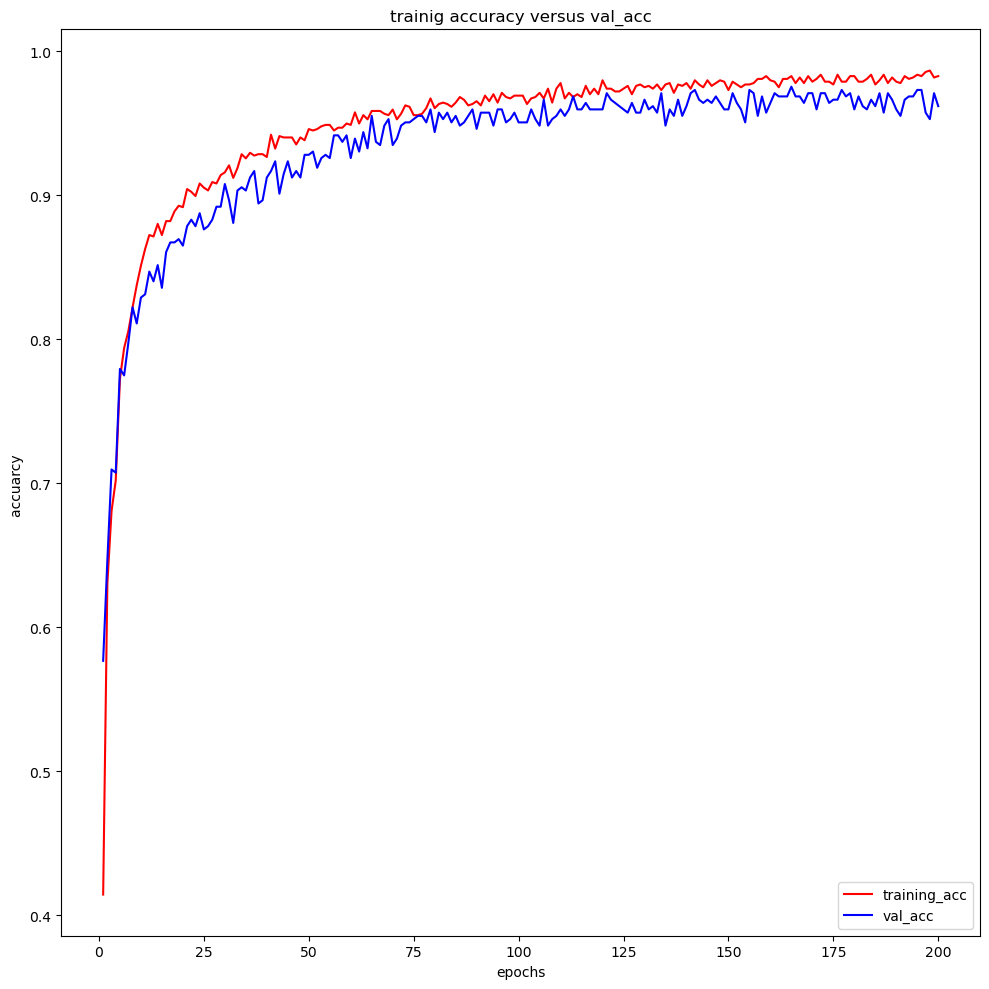

In [39]:
plt.figure(figsize=(10,10))

plt.plot(epochs , accuracy , color='#ff0000' , label='training_acc')
plt.plot(epochs , val_accuracy , color='#0000FF',label='val_acc')
plt.legend(loc='lower right')
plt.title('trainig accuracy versus val_acc')
plt.xlabel('epochs')
plt.ylabel('accuarcy ')
plt.tight_layout()


In [148]:
mc = ModelCheckpoint('Best_Logistic_before_over_Sampling_Stochastic.h5', 
                     monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)



model_NN=keras.Sequential([keras.Input(shape=(23)),
                        layers.Dense(4,activation='softmax')])


model_NN.compile(loss=SparseCategoricalFocalLoss(from_logits=False,gamma=2),
              optimizer=keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy"])

history = model_NN.fit(X_train,Y_train,validation_data=[X_test,Y_test] 
          ,  batch_size=1 , epochs=200 , verbose =1, callbacks=[mc])

Epoch 1/200
1031/1033 [============================>.] - ETA: 0s - loss: 0.4228 - accuracy: 0.6984
Epoch 1: val_accuracy improved from -inf to 0.79505, saving model to Best_Logistic_before_over_Sampling_Stochastic.h5
1033/1033 [==============================] - 3s 2ms/step - loss: 0.4223 - accuracy: 0.6989 - val_loss: 0.2678 - val_accuracy: 0.7950
Epoch 2/200
1013/1033 [============================>.] - ETA: 0s - loss: 0.2115 - accuracy: 0.8342
Epoch 2: val_accuracy improved from 0.79505 to 0.86937, saving model to Best_Logistic_before_over_Sampling_Stochastic.h5
1033/1033 [==============================] - 2s 2ms/step - loss: 0.2124 - accuracy: 0.8316 - val_loss: 0.1610 - val_accuracy: 0.8694
Epoch 3/200
1020/1033 [============================>.] - ETA: 0s - loss: 0.1521 - accuracy: 0.8686
Epoch 3: val_accuracy did not improve from 0.86937
1033/1033 [==============================] - 2s 2ms/step - loss: 0.1512 - accuracy: 0.8693 - val_loss: 0.1831 - val_accuracy: 0.8356
Epoch 4/200
10

Epoch 28/200
1029/1033 [============================>.] - ETA: 0s - loss: 0.0366 - accuracy: 0.9602
Epoch 28: val_accuracy did not improve from 0.94820
1033/1033 [==============================] - 2s 2ms/step - loss: 0.0364 - accuracy: 0.9603 - val_loss: 0.1084 - val_accuracy: 0.9167
Epoch 29/200
1003/1033 [============================>.] - ETA: 0s - loss: 0.0490 - accuracy: 0.9452
Epoch 29: val_accuracy did not improve from 0.94820
1033/1033 [==============================] - 2s 2ms/step - loss: 0.0501 - accuracy: 0.9458 - val_loss: 0.0611 - val_accuracy: 0.9212
Epoch 30/200
1008/1033 [============================>.] - ETA: 0s - loss: 0.0442 - accuracy: 0.9544
Epoch 30: val_accuracy did not improve from 0.94820
1033/1033 [==============================] - 2s 2ms/step - loss: 0.0435 - accuracy: 0.9545 - val_loss: 0.0520 - val_accuracy: 0.9414
Epoch 31/200
1017/1033 [============================>.] - ETA: 0s - loss: 0.0465 - accuracy: 0.9479
Epoch 31: val_accuracy did not improve from 0

Epoch 85/200
1025/1033 [============================>.] - ETA: 0s - loss: 0.0364 - accuracy: 0.9590
Epoch 85: val_accuracy did not improve from 0.96622
1033/1033 [==============================] - 2s 2ms/step - loss: 0.0362 - accuracy: 0.9593 - val_loss: 0.0525 - val_accuracy: 0.9617
Epoch 86/200
1005/1033 [============================>.] - ETA: 0s - loss: 0.0230 - accuracy: 0.9662
Epoch 86: val_accuracy did not improve from 0.96622
1033/1033 [==============================] - 2s 2ms/step - loss: 0.0225 - accuracy: 0.9671 - val_loss: 0.0658 - val_accuracy: 0.9617
Epoch 87/200
1033/1033 [==============================] - ETA: 0s - loss: 0.0294 - accuracy: 0.9642
Epoch 87: val_accuracy did not improve from 0.96622
1033/1033 [==============================] - 2s 2ms/step - loss: 0.0294 - accuracy: 0.9642 - val_loss: 0.0628 - val_accuracy: 0.9505
Epoch 88/200
1002/1033 [============================>.] - ETA: 0s - loss: 0.0352 - accuracy: 0.9711
Epoch 88: val_accuracy did not improve from 0

Epoch 114/200
1008/1033 [============================>.] - ETA: 0s - loss: 0.0212 - accuracy: 0.9762
Epoch 114: val_accuracy did not improve from 0.96622
1033/1033 [==============================] - 2s 2ms/step - loss: 0.0242 - accuracy: 0.9739 - val_loss: 0.0734 - val_accuracy: 0.9459
Epoch 115/200
1003/1033 [============================>.] - ETA: 0s - loss: 0.0213 - accuracy: 0.9751
Epoch 115: val_accuracy did not improve from 0.96622
1033/1033 [==============================] - 2s 2ms/step - loss: 0.0209 - accuracy: 0.9758 - val_loss: 0.0903 - val_accuracy: 0.9437
Epoch 116/200
1011/1033 [============================>.] - ETA: 0s - loss: 0.0197 - accuracy: 0.9802
Epoch 116: val_accuracy did not improve from 0.96622
1033/1033 [==============================] - 2s 2ms/step - loss: 0.0202 - accuracy: 0.9787 - val_loss: 0.0594 - val_accuracy: 0.9640
Epoch 117/200
1031/1033 [============================>.] - ETA: 0s - loss: 0.0261 - accuracy: 0.9690
Epoch 117: val_accuracy did not improv

Epoch 171/200
1006/1033 [============================>.] - ETA: 0s - loss: 0.0201 - accuracy: 0.9732
Epoch 171: val_accuracy did not improve from 0.97297
1033/1033 [==============================] - 2s 2ms/step - loss: 0.0196 - accuracy: 0.9739 - val_loss: 0.0691 - val_accuracy: 0.9662
Epoch 172/200
1020/1033 [============================>.] - ETA: 0s - loss: 0.0382 - accuracy: 0.9676
Epoch 172: val_accuracy did not improve from 0.97297
1033/1033 [==============================] - 2s 2ms/step - loss: 0.0378 - accuracy: 0.9681 - val_loss: 0.0613 - val_accuracy: 0.9662
Epoch 173/200
 999/1033 [============================>.] - ETA: 0s - loss: 0.0129 - accuracy: 0.9790
Epoch 173: val_accuracy did not improve from 0.97297
1033/1033 [==============================] - 2s 2ms/step - loss: 0.0148 - accuracy: 0.9777 - val_loss: 0.0738 - val_accuracy: 0.9595
Epoch 174/200
1027/1033 [============================>.] - ETA: 0s - loss: 0.0188 - accuracy: 0.9805
Epoch 174: val_accuracy did not improv

Epoch 200/200
1006/1033 [============================>.] - ETA: 0s - loss: 0.0246 - accuracy: 0.9761
Epoch 200: val_accuracy did not improve from 0.97297
1033/1033 [==============================] - 2s 2ms/step - loss: 0.0251 - accuracy: 0.9748 - val_loss: 0.1138 - val_accuracy: 0.9437


In [149]:
accuracy = history.history["accuracy"]
val_accuracy=history.history["val_accuracy"]

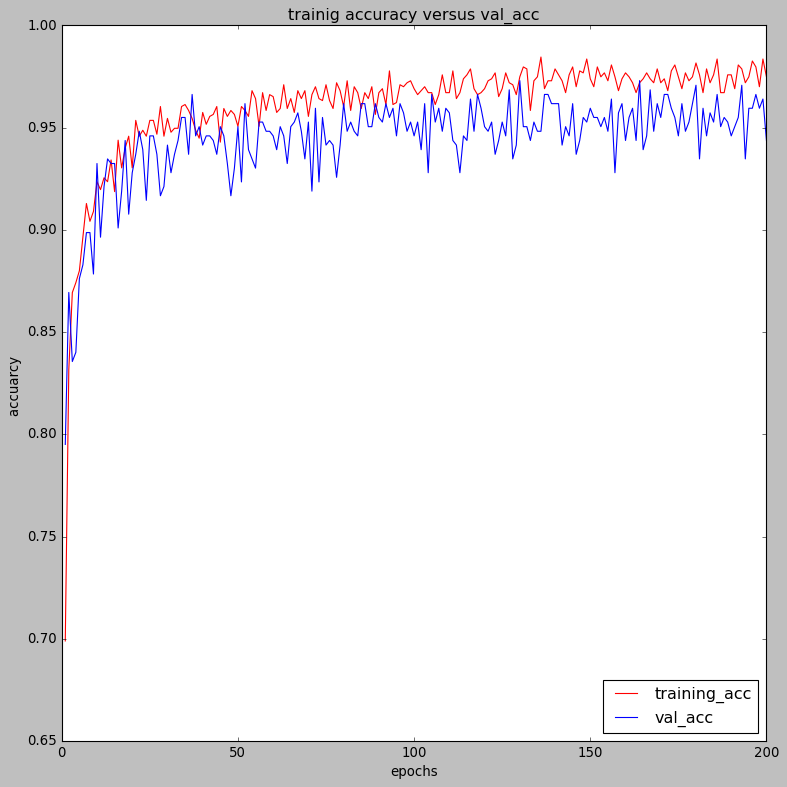

In [150]:
plt.figure(figsize=(10,10))

plt.plot(epochs , accuracy , color='#ff0000' , label='training_acc')
plt.plot(epochs , val_accuracy , color='#0000FF',label='val_acc')
plt.legend(loc='lower right')
plt.title('trainig accuracy versus val_acc')
plt.xlabel('epochs')
plt.ylabel('accuarcy ')
plt.tight_layout()

In [163]:
mc = ModelCheckpoint('Best_Logistic_before_over_Sampling_Batch.h5', 
                     monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)



model_NN=keras.Sequential([keras.Input(shape=(23)),
                        layers.Dense(4,activation='softmax')])


model_NN.compile(loss=SparseCategoricalFocalLoss(from_logits=False,gamma=2),
              optimizer=keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy"])

history = model_NN.fit(X_train,Y_train,validation_data=[X_test,Y_test] 
          ,  batch_size=X_train.shape[0] , epochs=5000 , verbose =1, callbacks=[mc])

Epoch 1/5000
1/1 [==============================] - ETA: 0s - loss: 1.3236 - accuracy: 0.3127
Epoch 1: val_accuracy improved from -inf to 0.32883, saving model to Best_Logistic_before_over_Sampling_Batch.h5
1/1 [==============================] - 1s 830ms/step - loss: 1.3236 - accuracy: 0.3127 - val_loss: 1.2454 - val_accuracy: 0.3288
Epoch 2/5000
1/1 [==============================] - ETA: 0s - loss: 1.2537 - accuracy: 0.3224
Epoch 2: val_accuracy improved from 0.32883 to 0.34009, saving model to Best_Logistic_before_over_Sampling_Batch.h5
1/1 [==============================] - 0s 54ms/step - loss: 1.2537 - accuracy: 0.3224 - val_loss: 1.1843 - val_accuracy: 0.3401
Epoch 3/5000
1/1 [==============================] - ETA: 0s - loss: 1.1873 - accuracy: 0.3379
Epoch 3: val_accuracy improved from 0.34009 to 0.34910, saving model to Best_Logistic_before_over_Sampling_Batch.h5
1/1 [==============================] - 0s 62ms/step - loss: 1.1873 - accuracy: 0.3379 - val_loss: 1.1266 - val_accur

1/1 [==============================] - ETA: 0s - loss: 0.2967 - accuracy: 0.7551
Epoch 52: val_accuracy did not improve from 0.73649
1/1 [==============================] - 0s 38ms/step - loss: 0.2967 - accuracy: 0.7551 - val_loss: 0.3154 - val_accuracy: 0.7365
Epoch 53/5000
1/1 [==============================] - ETA: 0s - loss: 0.2945 - accuracy: 0.7531
Epoch 53: val_accuracy did not improve from 0.73649
1/1 [==============================] - 0s 45ms/step - loss: 0.2945 - accuracy: 0.7531 - val_loss: 0.3137 - val_accuracy: 0.7365
Epoch 54/5000
1/1 [==============================] - ETA: 0s - loss: 0.2925 - accuracy: 0.7609
Epoch 54: val_accuracy improved from 0.73649 to 0.74324, saving model to Best_Logistic_before_over_Sampling_Batch.h5
1/1 [==============================] - 0s 51ms/step - loss: 0.2925 - accuracy: 0.7609 - val_loss: 0.3120 - val_accuracy: 0.7432
Epoch 55/5000
1/1 [==============================] - ETA: 0s - loss: 0.2905 - accuracy: 0.7648
Epoch 55: val_accuracy did no

1/1 [==============================] - 0s 40ms/step - loss: 0.2303 - accuracy: 0.8267 - val_loss: 0.2563 - val_accuracy: 0.8108
Epoch 107/5000
1/1 [==============================] - ETA: 0s - loss: 0.2295 - accuracy: 0.8258
Epoch 107: val_accuracy did not improve from 0.81081
1/1 [==============================] - 0s 47ms/step - loss: 0.2295 - accuracy: 0.8258 - val_loss: 0.2557 - val_accuracy: 0.8108
Epoch 108/5000
1/1 [==============================] - ETA: 0s - loss: 0.2288 - accuracy: 0.8267
Epoch 108: val_accuracy did not improve from 0.81081
1/1 [==============================] - 0s 46ms/step - loss: 0.2288 - accuracy: 0.8267 - val_loss: 0.2550 - val_accuracy: 0.8108
Epoch 109/5000
1/1 [==============================] - ETA: 0s - loss: 0.2280 - accuracy: 0.8267
Epoch 109: val_accuracy did not improve from 0.81081
1/1 [==============================] - 0s 47ms/step - loss: 0.2280 - accuracy: 0.8267 - val_loss: 0.2544 - val_accuracy: 0.8108
Epoch 110/5000
1/1 [=====================

1/1 [==============================] - 0s 56ms/step - loss: 0.2109 - accuracy: 0.8412 - val_loss: 0.2395 - val_accuracy: 0.8176
Epoch 136/5000
1/1 [==============================] - ETA: 0s - loss: 0.2103 - accuracy: 0.8412
Epoch 136: val_accuracy did not improve from 0.81757
1/1 [==============================] - 0s 47ms/step - loss: 0.2103 - accuracy: 0.8412 - val_loss: 0.2390 - val_accuracy: 0.8176
Epoch 137/5000
1/1 [==============================] - ETA: 0s - loss: 0.2097 - accuracy: 0.8412
Epoch 137: val_accuracy did not improve from 0.81757
1/1 [==============================] - 0s 42ms/step - loss: 0.2097 - accuracy: 0.8412 - val_loss: 0.2385 - val_accuracy: 0.8176
Epoch 138/5000
1/1 [==============================] - ETA: 0s - loss: 0.2091 - accuracy: 0.8412
Epoch 138: val_accuracy did not improve from 0.81757
1/1 [==============================] - 0s 48ms/step - loss: 0.2091 - accuracy: 0.8412 - val_loss: 0.2380 - val_accuracy: 0.8176
Epoch 139/5000
1/1 [=====================

1/1 [==============================] - 0s 45ms/step - loss: 0.1955 - accuracy: 0.8538 - val_loss: 0.2257 - val_accuracy: 0.8243
Epoch 165/5000
1/1 [==============================] - ETA: 0s - loss: 0.1950 - accuracy: 0.8538
Epoch 165: val_accuracy did not improve from 0.82432
1/1 [==============================] - 0s 46ms/step - loss: 0.1950 - accuracy: 0.8538 - val_loss: 0.2253 - val_accuracy: 0.8243
Epoch 166/5000
1/1 [==============================] - ETA: 0s - loss: 0.1946 - accuracy: 0.8538
Epoch 166: val_accuracy did not improve from 0.82432
1/1 [==============================] - 0s 41ms/step - loss: 0.1946 - accuracy: 0.8538 - val_loss: 0.2248 - val_accuracy: 0.8221
Epoch 167/5000
1/1 [==============================] - ETA: 0s - loss: 0.1941 - accuracy: 0.8538
Epoch 167: val_accuracy did not improve from 0.82432
1/1 [==============================] - 0s 37ms/step - loss: 0.1941 - accuracy: 0.8538 - val_loss: 0.2244 - val_accuracy: 0.8221
Epoch 168/5000
1/1 [=====================

1/1 [==============================] - 0s 54ms/step - loss: 0.1827 - accuracy: 0.8596 - val_loss: 0.2139 - val_accuracy: 0.8311
Epoch 194/5000
1/1 [==============================] - ETA: 0s - loss: 0.1823 - accuracy: 0.8596
Epoch 194: val_accuracy did not improve from 0.83108
1/1 [==============================] - 0s 49ms/step - loss: 0.1823 - accuracy: 0.8596 - val_loss: 0.2136 - val_accuracy: 0.8311
Epoch 195/5000
1/1 [==============================] - ETA: 0s - loss: 0.1819 - accuracy: 0.8606
Epoch 195: val_accuracy did not improve from 0.83108
1/1 [==============================] - 0s 47ms/step - loss: 0.1819 - accuracy: 0.8606 - val_loss: 0.2132 - val_accuracy: 0.8311
Epoch 196/5000
1/1 [==============================] - ETA: 0s - loss: 0.1815 - accuracy: 0.8606
Epoch 196: val_accuracy did not improve from 0.83108
1/1 [==============================] - 0s 46ms/step - loss: 0.1815 - accuracy: 0.8606 - val_loss: 0.2128 - val_accuracy: 0.8311
Epoch 197/5000
1/1 [=====================

Epoch 223/5000
1/1 [==============================] - ETA: 0s - loss: 0.1714 - accuracy: 0.8625
Epoch 223: val_accuracy did not improve from 0.83333
1/1 [==============================] - 0s 42ms/step - loss: 0.1714 - accuracy: 0.8625 - val_loss: 0.2033 - val_accuracy: 0.8333
Epoch 224/5000
1/1 [==============================] - ETA: 0s - loss: 0.1711 - accuracy: 0.8625
Epoch 224: val_accuracy did not improve from 0.83333
1/1 [==============================] - 0s 42ms/step - loss: 0.1711 - accuracy: 0.8625 - val_loss: 0.2030 - val_accuracy: 0.8333
Epoch 225/5000
1/1 [==============================] - ETA: 0s - loss: 0.1707 - accuracy: 0.8625
Epoch 225: val_accuracy improved from 0.83333 to 0.83559, saving model to Best_Logistic_before_over_Sampling_Batch.h5
1/1 [==============================] - 0s 59ms/step - loss: 0.1707 - accuracy: 0.8625 - val_loss: 0.2026 - val_accuracy: 0.8356
Epoch 226/5000
1/1 [==============================] - ETA: 0s - loss: 0.1704 - accuracy: 0.8654
Epoch 22

1/1 [==============================] - 0s 36ms/step - loss: 0.1622 - accuracy: 0.8693 - val_loss: 0.1945 - val_accuracy: 0.8446
Epoch 252/5000
1/1 [==============================] - ETA: 0s - loss: 0.1619 - accuracy: 0.8693
Epoch 252: val_accuracy did not improve from 0.84459
1/1 [==============================] - 0s 37ms/step - loss: 0.1619 - accuracy: 0.8693 - val_loss: 0.1942 - val_accuracy: 0.8446
Epoch 253/5000
1/1 [==============================] - ETA: 0s - loss: 0.1616 - accuracy: 0.8703
Epoch 253: val_accuracy did not improve from 0.84459
1/1 [==============================] - 0s 55ms/step - loss: 0.1616 - accuracy: 0.8703 - val_loss: 0.1939 - val_accuracy: 0.8446
Epoch 254/5000
1/1 [==============================] - ETA: 0s - loss: 0.1613 - accuracy: 0.8712
Epoch 254: val_accuracy improved from 0.84459 to 0.84685, saving model to Best_Logistic_before_over_Sampling_Batch.h5
1/1 [==============================] - 0s 60ms/step - loss: 0.1613 - accuracy: 0.8712 - val_loss: 0.1936

1/1 [==============================] - 0s 38ms/step - loss: 0.1537 - accuracy: 0.8819 - val_loss: 0.1862 - val_accuracy: 0.8514
Epoch 281/5000
1/1 [==============================] - ETA: 0s - loss: 0.1534 - accuracy: 0.8819
Epoch 281: val_accuracy did not improve from 0.85135
1/1 [==============================] - 0s 40ms/step - loss: 0.1534 - accuracy: 0.8819 - val_loss: 0.1859 - val_accuracy: 0.8514
Epoch 282/5000
1/1 [==============================] - ETA: 0s - loss: 0.1532 - accuracy: 0.8819
Epoch 282: val_accuracy did not improve from 0.85135
1/1 [==============================] - 0s 39ms/step - loss: 0.1532 - accuracy: 0.8819 - val_loss: 0.1857 - val_accuracy: 0.8514
Epoch 283/5000
1/1 [==============================] - ETA: 0s - loss: 0.1529 - accuracy: 0.8819
Epoch 283: val_accuracy did not improve from 0.85135
1/1 [==============================] - 0s 39ms/step - loss: 0.1529 - accuracy: 0.8819 - val_loss: 0.1854 - val_accuracy: 0.8514
Epoch 284/5000
1/1 [=====================

1/1 [==============================] - 0s 57ms/step - loss: 0.1461 - accuracy: 0.8858 - val_loss: 0.1787 - val_accuracy: 0.8581
Epoch 310/5000
1/1 [==============================] - ETA: 0s - loss: 0.1458 - accuracy: 0.8867
Epoch 310: val_accuracy did not improve from 0.85811
1/1 [==============================] - 0s 54ms/step - loss: 0.1458 - accuracy: 0.8867 - val_loss: 0.1784 - val_accuracy: 0.8581
Epoch 311/5000
1/1 [==============================] - ETA: 0s - loss: 0.1456 - accuracy: 0.8867
Epoch 311: val_accuracy did not improve from 0.85811
1/1 [==============================] - 0s 40ms/step - loss: 0.1456 - accuracy: 0.8867 - val_loss: 0.1782 - val_accuracy: 0.8581
Epoch 312/5000
1/1 [==============================] - ETA: 0s - loss: 0.1453 - accuracy: 0.8867
Epoch 312: val_accuracy did not improve from 0.85811
1/1 [==============================] - 0s 52ms/step - loss: 0.1453 - accuracy: 0.8867 - val_loss: 0.1779 - val_accuracy: 0.8581
Epoch 313/5000
1/1 [=====================

1/1 [==============================] - 0s 43ms/step - loss: 0.1329 - accuracy: 0.8984 - val_loss: 0.1653 - val_accuracy: 0.8694
Epoch 368/5000
1/1 [==============================] - ETA: 0s - loss: 0.1327 - accuracy: 0.8993
Epoch 368: val_accuracy did not improve from 0.86937
1/1 [==============================] - 0s 47ms/step - loss: 0.1327 - accuracy: 0.8993 - val_loss: 0.1651 - val_accuracy: 0.8694
Epoch 369/5000
1/1 [==============================] - ETA: 0s - loss: 0.1325 - accuracy: 0.8993
Epoch 369: val_accuracy improved from 0.86937 to 0.87162, saving model to Best_Logistic_before_over_Sampling_Batch.h5
1/1 [==============================] - 0s 54ms/step - loss: 0.1325 - accuracy: 0.8993 - val_loss: 0.1649 - val_accuracy: 0.8716
Epoch 370/5000
1/1 [==============================] - ETA: 0s - loss: 0.1323 - accuracy: 0.8993
Epoch 370: val_accuracy did not improve from 0.87162
1/1 [==============================] - 0s 43ms/step - loss: 0.1323 - accuracy: 0.8993 - val_loss: 0.1647

Epoch 397/5000
1/1 [==============================] - ETA: 0s - loss: 0.1270 - accuracy: 0.9051
Epoch 397: val_accuracy did not improve from 0.87387
1/1 [==============================] - 0s 42ms/step - loss: 0.1270 - accuracy: 0.9051 - val_loss: 0.1592 - val_accuracy: 0.8739
Epoch 398/5000
1/1 [==============================] - ETA: 0s - loss: 0.1268 - accuracy: 0.9051
Epoch 398: val_accuracy did not improve from 0.87387
1/1 [==============================] - 0s 40ms/step - loss: 0.1268 - accuracy: 0.9051 - val_loss: 0.1590 - val_accuracy: 0.8739
Epoch 399/5000
1/1 [==============================] - ETA: 0s - loss: 0.1266 - accuracy: 0.9051
Epoch 399: val_accuracy did not improve from 0.87387
1/1 [==============================] - 0s 45ms/step - loss: 0.1266 - accuracy: 0.9051 - val_loss: 0.1588 - val_accuracy: 0.8739
Epoch 400/5000
1/1 [==============================] - ETA: 0s - loss: 0.1264 - accuracy: 0.9051
Epoch 400: val_accuracy did not improve from 0.87387
1/1 [===============

Epoch 455/5000
1/1 [==============================] - ETA: 0s - loss: 0.1169 - accuracy: 0.9061
Epoch 455: val_accuracy did not improve from 0.88514
1/1 [==============================] - 0s 41ms/step - loss: 0.1169 - accuracy: 0.9061 - val_loss: 0.1484 - val_accuracy: 0.8851
Epoch 456/5000
1/1 [==============================] - ETA: 0s - loss: 0.1167 - accuracy: 0.9071
Epoch 456: val_accuracy did not improve from 0.88514
1/1 [==============================] - 0s 49ms/step - loss: 0.1167 - accuracy: 0.9071 - val_loss: 0.1483 - val_accuracy: 0.8851
Epoch 457/5000
1/1 [==============================] - ETA: 0s - loss: 0.1166 - accuracy: 0.9071
Epoch 457: val_accuracy did not improve from 0.88514
1/1 [==============================] - 0s 52ms/step - loss: 0.1166 - accuracy: 0.9071 - val_loss: 0.1481 - val_accuracy: 0.8851
Epoch 458/5000
1/1 [==============================] - ETA: 0s - loss: 0.1164 - accuracy: 0.9071
Epoch 458: val_accuracy did not improve from 0.88514
1/1 [===============

Epoch 484/5000
1/1 [==============================] - ETA: 0s - loss: 0.1124 - accuracy: 0.9109
Epoch 484: val_accuracy did not improve from 0.89189
1/1 [==============================] - 0s 48ms/step - loss: 0.1124 - accuracy: 0.9109 - val_loss: 0.1435 - val_accuracy: 0.8919
Epoch 485/5000
1/1 [==============================] - ETA: 0s - loss: 0.1122 - accuracy: 0.9109
Epoch 485: val_accuracy did not improve from 0.89189
1/1 [==============================] - 0s 51ms/step - loss: 0.1122 - accuracy: 0.9109 - val_loss: 0.1434 - val_accuracy: 0.8919
Epoch 486/5000
1/1 [==============================] - ETA: 0s - loss: 0.1121 - accuracy: 0.9109
Epoch 486: val_accuracy did not improve from 0.89189
1/1 [==============================] - 0s 49ms/step - loss: 0.1121 - accuracy: 0.9109 - val_loss: 0.1432 - val_accuracy: 0.8919
Epoch 487/5000
1/1 [==============================] - ETA: 0s - loss: 0.1119 - accuracy: 0.9109
Epoch 487: val_accuracy did not improve from 0.89189
1/1 [===============

1/1 [==============================] - 0s 83ms/step - loss: 0.1044 - accuracy: 0.9158 - val_loss: 0.1346 - val_accuracy: 0.8986
Epoch 543/5000
1/1 [==============================] - ETA: 0s - loss: 0.1042 - accuracy: 0.9158
Epoch 543: val_accuracy improved from 0.89865 to 0.90090, saving model to Best_Logistic_before_over_Sampling_Batch.h5
1/1 [==============================] - 0s 134ms/step - loss: 0.1042 - accuracy: 0.9158 - val_loss: 0.1345 - val_accuracy: 0.9009
Epoch 544/5000
1/1 [==============================] - ETA: 0s - loss: 0.1041 - accuracy: 0.9158
Epoch 544: val_accuracy did not improve from 0.90090
1/1 [==============================] - 0s 48ms/step - loss: 0.1041 - accuracy: 0.9158 - val_loss: 0.1343 - val_accuracy: 0.9009
Epoch 545/5000
1/1 [==============================] - ETA: 0s - loss: 0.1040 - accuracy: 0.9177
Epoch 545: val_accuracy did not improve from 0.90090
1/1 [==============================] - 0s 41ms/step - loss: 0.1040 - accuracy: 0.9177 - val_loss: 0.134

Epoch 572/5000
1/1 [==============================] - ETA: 0s - loss: 0.1006 - accuracy: 0.9197
Epoch 572: val_accuracy did not improve from 0.90090
1/1 [==============================] - 0s 43ms/step - loss: 0.1006 - accuracy: 0.9197 - val_loss: 0.1304 - val_accuracy: 0.9009
Epoch 573/5000
1/1 [==============================] - ETA: 0s - loss: 0.1005 - accuracy: 0.9197
Epoch 573: val_accuracy did not improve from 0.90090
1/1 [==============================] - 0s 40ms/step - loss: 0.1005 - accuracy: 0.9197 - val_loss: 0.1302 - val_accuracy: 0.9009
Epoch 574/5000
1/1 [==============================] - ETA: 0s - loss: 0.1004 - accuracy: 0.9197
Epoch 574: val_accuracy did not improve from 0.90090
1/1 [==============================] - 0s 39ms/step - loss: 0.1004 - accuracy: 0.9197 - val_loss: 0.1301 - val_accuracy: 0.9009
Epoch 575/5000
1/1 [==============================] - ETA: 0s - loss: 0.1003 - accuracy: 0.9197
Epoch 575: val_accuracy did not improve from 0.90090
1/1 [===============

1/1 [==============================] - ETA: 0s - loss: 0.0941 - accuracy: 0.9226
Epoch 630: val_accuracy did not improve from 0.90991
1/1 [==============================] - 0s 45ms/step - loss: 0.0941 - accuracy: 0.9226 - val_loss: 0.1228 - val_accuracy: 0.9099
Epoch 631/5000
1/1 [==============================] - ETA: 0s - loss: 0.0940 - accuracy: 0.9226
Epoch 631: val_accuracy did not improve from 0.90991
1/1 [==============================] - 0s 48ms/step - loss: 0.0940 - accuracy: 0.9226 - val_loss: 0.1227 - val_accuracy: 0.9099
Epoch 632/5000
1/1 [==============================] - ETA: 0s - loss: 0.0939 - accuracy: 0.9226
Epoch 632: val_accuracy did not improve from 0.90991
1/1 [==============================] - 0s 43ms/step - loss: 0.0939 - accuracy: 0.9226 - val_loss: 0.1226 - val_accuracy: 0.9099
Epoch 633/5000
1/1 [==============================] - ETA: 0s - loss: 0.0937 - accuracy: 0.9226
Epoch 633: val_accuracy did not improve from 0.90991
1/1 [==============================

1/1 [==============================] - 0s 46ms/step - loss: 0.0911 - accuracy: 0.9255 - val_loss: 0.1193 - val_accuracy: 0.9122
Epoch 660/5000
1/1 [==============================] - ETA: 0s - loss: 0.0910 - accuracy: 0.9255
Epoch 660: val_accuracy did not improve from 0.91216
1/1 [==============================] - 0s 45ms/step - loss: 0.0910 - accuracy: 0.9255 - val_loss: 0.1192 - val_accuracy: 0.9122
Epoch 661/5000
1/1 [==============================] - ETA: 0s - loss: 0.0909 - accuracy: 0.9255
Epoch 661: val_accuracy did not improve from 0.91216
1/1 [==============================] - 0s 50ms/step - loss: 0.0909 - accuracy: 0.9255 - val_loss: 0.1191 - val_accuracy: 0.9122
Epoch 662/5000
1/1 [==============================] - ETA: 0s - loss: 0.0908 - accuracy: 0.9255
Epoch 662: val_accuracy did not improve from 0.91216
1/1 [==============================] - 0s 60ms/step - loss: 0.0908 - accuracy: 0.9255 - val_loss: 0.1190 - val_accuracy: 0.9122
Epoch 663/5000
1/1 [=====================

1/1 [==============================] - 0s 59ms/step - loss: 0.0856 - accuracy: 0.9284 - val_loss: 0.1128 - val_accuracy: 0.9144
Epoch 719/5000
1/1 [==============================] - ETA: 0s - loss: 0.0855 - accuracy: 0.9284
Epoch 719: val_accuracy did not improve from 0.91441
1/1 [==============================] - 0s 46ms/step - loss: 0.0855 - accuracy: 0.9284 - val_loss: 0.1127 - val_accuracy: 0.9144
Epoch 720/5000
1/1 [==============================] - ETA: 0s - loss: 0.0854 - accuracy: 0.9284
Epoch 720: val_accuracy did not improve from 0.91441
1/1 [==============================] - 0s 46ms/step - loss: 0.0854 - accuracy: 0.9284 - val_loss: 0.1126 - val_accuracy: 0.9144
Epoch 721/5000
1/1 [==============================] - ETA: 0s - loss: 0.0853 - accuracy: 0.9293
Epoch 721: val_accuracy did not improve from 0.91441
1/1 [==============================] - 0s 50ms/step - loss: 0.0853 - accuracy: 0.9293 - val_loss: 0.1125 - val_accuracy: 0.9144
Epoch 722/5000
1/1 [=====================

Epoch 748/5000
1/1 [==============================] - ETA: 0s - loss: 0.0830 - accuracy: 0.9313
Epoch 748: val_accuracy did not improve from 0.91892
1/1 [==============================] - 0s 49ms/step - loss: 0.0830 - accuracy: 0.9313 - val_loss: 0.1097 - val_accuracy: 0.9189
Epoch 749/5000
1/1 [==============================] - ETA: 0s - loss: 0.0829 - accuracy: 0.9313
Epoch 749: val_accuracy did not improve from 0.91892
1/1 [==============================] - 0s 48ms/step - loss: 0.0829 - accuracy: 0.9313 - val_loss: 0.1096 - val_accuracy: 0.9189
Epoch 750/5000
1/1 [==============================] - ETA: 0s - loss: 0.0828 - accuracy: 0.9313
Epoch 750: val_accuracy did not improve from 0.91892
1/1 [==============================] - 0s 59ms/step - loss: 0.0828 - accuracy: 0.9313 - val_loss: 0.1095 - val_accuracy: 0.9189
Epoch 751/5000
1/1 [==============================] - ETA: 0s - loss: 0.0827 - accuracy: 0.9313
Epoch 751: val_accuracy did not improve from 0.91892
1/1 [===============

Epoch 807/5000
1/1 [==============================] - ETA: 0s - loss: 0.0783 - accuracy: 0.9361
Epoch 807: val_accuracy did not improve from 0.92342
1/1 [==============================] - 0s 49ms/step - loss: 0.0783 - accuracy: 0.9361 - val_loss: 0.1041 - val_accuracy: 0.9234
Epoch 808/5000
1/1 [==============================] - ETA: 0s - loss: 0.0782 - accuracy: 0.9361
Epoch 808: val_accuracy did not improve from 0.92342
1/1 [==============================] - 0s 52ms/step - loss: 0.0782 - accuracy: 0.9361 - val_loss: 0.1040 - val_accuracy: 0.9234
Epoch 809/5000
1/1 [==============================] - ETA: 0s - loss: 0.0782 - accuracy: 0.9361
Epoch 809: val_accuracy did not improve from 0.92342
1/1 [==============================] - 0s 46ms/step - loss: 0.0782 - accuracy: 0.9361 - val_loss: 0.1039 - val_accuracy: 0.9234
Epoch 810/5000
1/1 [==============================] - ETA: 0s - loss: 0.0781 - accuracy: 0.9361
Epoch 810: val_accuracy did not improve from 0.92342
1/1 [===============

Epoch 866/5000
1/1 [==============================] - ETA: 0s - loss: 0.0741 - accuracy: 0.9409
Epoch 866: val_accuracy did not improve from 0.92568
1/1 [==============================] - 0s 36ms/step - loss: 0.0741 - accuracy: 0.9409 - val_loss: 0.0990 - val_accuracy: 0.9212
Epoch 867/5000
1/1 [==============================] - ETA: 0s - loss: 0.0740 - accuracy: 0.9409
Epoch 867: val_accuracy did not improve from 0.92568
1/1 [==============================] - 0s 33ms/step - loss: 0.0740 - accuracy: 0.9409 - val_loss: 0.0989 - val_accuracy: 0.9212
Epoch 868/5000
1/1 [==============================] - ETA: 0s - loss: 0.0740 - accuracy: 0.9409
Epoch 868: val_accuracy did not improve from 0.92568
1/1 [==============================] - 0s 29ms/step - loss: 0.0740 - accuracy: 0.9409 - val_loss: 0.0988 - val_accuracy: 0.9212
Epoch 869/5000
1/1 [==============================] - ETA: 0s - loss: 0.0739 - accuracy: 0.9409
Epoch 869: val_accuracy did not improve from 0.92568
1/1 [===============

Epoch 896/5000
1/1 [==============================] - ETA: 0s - loss: 0.0721 - accuracy: 0.9468
Epoch 896: val_accuracy did not improve from 0.92568
1/1 [==============================] - 0s 44ms/step - loss: 0.0721 - accuracy: 0.9468 - val_loss: 0.0966 - val_accuracy: 0.9234
Epoch 897/5000
1/1 [==============================] - ETA: 0s - loss: 0.0721 - accuracy: 0.9468
Epoch 897: val_accuracy did not improve from 0.92568
1/1 [==============================] - 0s 40ms/step - loss: 0.0721 - accuracy: 0.9468 - val_loss: 0.0965 - val_accuracy: 0.9234
Epoch 898/5000
1/1 [==============================] - ETA: 0s - loss: 0.0720 - accuracy: 0.9468
Epoch 898: val_accuracy did not improve from 0.92568
1/1 [==============================] - 0s 46ms/step - loss: 0.0720 - accuracy: 0.9468 - val_loss: 0.0964 - val_accuracy: 0.9234
Epoch 899/5000
1/1 [==============================] - ETA: 0s - loss: 0.0719 - accuracy: 0.9468
Epoch 899: val_accuracy did not improve from 0.92568
1/1 [===============

Epoch 926/5000
1/1 [==============================] - ETA: 0s - loss: 0.0703 - accuracy: 0.9477
Epoch 926: val_accuracy did not improve from 0.92568
1/1 [==============================] - 0s 45ms/step - loss: 0.0703 - accuracy: 0.9477 - val_loss: 0.0943 - val_accuracy: 0.9234
Epoch 927/5000
1/1 [==============================] - ETA: 0s - loss: 0.0702 - accuracy: 0.9477
Epoch 927: val_accuracy did not improve from 0.92568
1/1 [==============================] - 0s 46ms/step - loss: 0.0702 - accuracy: 0.9477 - val_loss: 0.0942 - val_accuracy: 0.9234
Epoch 928/5000
1/1 [==============================] - ETA: 0s - loss: 0.0701 - accuracy: 0.9477
Epoch 928: val_accuracy did not improve from 0.92568
1/1 [==============================] - 0s 45ms/step - loss: 0.0701 - accuracy: 0.9477 - val_loss: 0.0941 - val_accuracy: 0.9234
Epoch 929/5000
1/1 [==============================] - ETA: 0s - loss: 0.0701 - accuracy: 0.9477
Epoch 929: val_accuracy did not improve from 0.92568
1/1 [===============

Epoch 956/5000
1/1 [==============================] - ETA: 0s - loss: 0.0685 - accuracy: 0.9497
Epoch 956: val_accuracy did not improve from 0.92568
1/1 [==============================] - 0s 30ms/step - loss: 0.0685 - accuracy: 0.9497 - val_loss: 0.0921 - val_accuracy: 0.9234
Epoch 957/5000
1/1 [==============================] - ETA: 0s - loss: 0.0684 - accuracy: 0.9497
Epoch 957: val_accuracy did not improve from 0.92568
1/1 [==============================] - 0s 36ms/step - loss: 0.0684 - accuracy: 0.9497 - val_loss: 0.0920 - val_accuracy: 0.9234
Epoch 958/5000
1/1 [==============================] - ETA: 0s - loss: 0.0683 - accuracy: 0.9497
Epoch 958: val_accuracy did not improve from 0.92568
1/1 [==============================] - 0s 33ms/step - loss: 0.0683 - accuracy: 0.9497 - val_loss: 0.0919 - val_accuracy: 0.9234
Epoch 959/5000
1/1 [==============================] - ETA: 0s - loss: 0.0683 - accuracy: 0.9497
Epoch 959: val_accuracy did not improve from 0.92568
1/1 [===============

1/1 [==============================] - 0s 41ms/step - loss: 0.0652 - accuracy: 0.9516 - val_loss: 0.0881 - val_accuracy: 0.9279
Epoch 1015/5000
1/1 [==============================] - ETA: 0s - loss: 0.0652 - accuracy: 0.9516
Epoch 1015: val_accuracy did not improve from 0.92793
1/1 [==============================] - 0s 45ms/step - loss: 0.0652 - accuracy: 0.9516 - val_loss: 0.0880 - val_accuracy: 0.9279
Epoch 1016/5000
1/1 [==============================] - ETA: 0s - loss: 0.0651 - accuracy: 0.9516
Epoch 1016: val_accuracy did not improve from 0.92793
1/1 [==============================] - 0s 41ms/step - loss: 0.0651 - accuracy: 0.9516 - val_loss: 0.0879 - val_accuracy: 0.9279
Epoch 1017/5000
1/1 [==============================] - ETA: 0s - loss: 0.0651 - accuracy: 0.9516
Epoch 1017: val_accuracy did not improve from 0.92793
1/1 [==============================] - 0s 46ms/step - loss: 0.0651 - accuracy: 0.9516 - val_loss: 0.0879 - val_accuracy: 0.9279
Epoch 1018/5000
1/1 [==============

Epoch 1044/5000
1/1 [==============================] - ETA: 0s - loss: 0.0637 - accuracy: 0.9526
Epoch 1044: val_accuracy did not improve from 0.92793
1/1 [==============================] - 0s 50ms/step - loss: 0.0637 - accuracy: 0.9526 - val_loss: 0.0861 - val_accuracy: 0.9279
Epoch 1045/5000
1/1 [==============================] - ETA: 0s - loss: 0.0636 - accuracy: 0.9526
Epoch 1045: val_accuracy did not improve from 0.92793
1/1 [==============================] - 0s 46ms/step - loss: 0.0636 - accuracy: 0.9526 - val_loss: 0.0861 - val_accuracy: 0.9279
Epoch 1046/5000
1/1 [==============================] - ETA: 0s - loss: 0.0636 - accuracy: 0.9526
Epoch 1046: val_accuracy did not improve from 0.92793
1/1 [==============================] - 0s 44ms/step - loss: 0.0636 - accuracy: 0.9526 - val_loss: 0.0860 - val_accuracy: 0.9279
Epoch 1047/5000
1/1 [==============================] - ETA: 0s - loss: 0.0635 - accuracy: 0.9526
Epoch 1047: val_accuracy did not improve from 0.92793
1/1 [=======

1/1 [==============================] - 0s 44ms/step - loss: 0.0622 - accuracy: 0.9535 - val_loss: 0.0843 - val_accuracy: 0.9279
Epoch 1074/5000
1/1 [==============================] - ETA: 0s - loss: 0.0622 - accuracy: 0.9535
Epoch 1074: val_accuracy did not improve from 0.92793
1/1 [==============================] - 0s 40ms/step - loss: 0.0622 - accuracy: 0.9535 - val_loss: 0.0843 - val_accuracy: 0.9279
Epoch 1075/5000
1/1 [==============================] - ETA: 0s - loss: 0.0621 - accuracy: 0.9535
Epoch 1075: val_accuracy did not improve from 0.92793
1/1 [==============================] - 0s 42ms/step - loss: 0.0621 - accuracy: 0.9535 - val_loss: 0.0842 - val_accuracy: 0.9279
Epoch 1076/5000
1/1 [==============================] - ETA: 0s - loss: 0.0621 - accuracy: 0.9535
Epoch 1076: val_accuracy did not improve from 0.92793
1/1 [==============================] - 0s 40ms/step - loss: 0.0621 - accuracy: 0.9535 - val_loss: 0.0841 - val_accuracy: 0.9279
Epoch 1077/5000
1/1 [==============

Epoch 1103/5000
1/1 [==============================] - ETA: 0s - loss: 0.0608 - accuracy: 0.9535
Epoch 1103: val_accuracy improved from 0.92793 to 0.93018, saving model to Best_Logistic_before_over_Sampling_Batch.h5
1/1 [==============================] - 0s 59ms/step - loss: 0.0608 - accuracy: 0.9535 - val_loss: 0.0825 - val_accuracy: 0.9302
Epoch 1104/5000
1/1 [==============================] - ETA: 0s - loss: 0.0607 - accuracy: 0.9535
Epoch 1104: val_accuracy did not improve from 0.93018
1/1 [==============================] - 0s 42ms/step - loss: 0.0607 - accuracy: 0.9535 - val_loss: 0.0825 - val_accuracy: 0.9302
Epoch 1105/5000
1/1 [==============================] - ETA: 0s - loss: 0.0607 - accuracy: 0.9535
Epoch 1105: val_accuracy did not improve from 0.93018
1/1 [==============================] - 0s 46ms/step - loss: 0.0607 - accuracy: 0.9535 - val_loss: 0.0824 - val_accuracy: 0.9302
Epoch 1106/5000
1/1 [==============================] - ETA: 0s - loss: 0.0606 - accuracy: 0.9535
E

Epoch 1132/5000
1/1 [==============================] - ETA: 0s - loss: 0.0594 - accuracy: 0.9564
Epoch 1132: val_accuracy did not improve from 0.93468
1/1 [==============================] - 0s 67ms/step - loss: 0.0594 - accuracy: 0.9564 - val_loss: 0.0809 - val_accuracy: 0.9347
Epoch 1133/5000
1/1 [==============================] - ETA: 0s - loss: 0.0594 - accuracy: 0.9564
Epoch 1133: val_accuracy did not improve from 0.93468
1/1 [==============================] - 0s 67ms/step - loss: 0.0594 - accuracy: 0.9564 - val_loss: 0.0808 - val_accuracy: 0.9347
Epoch 1134/5000
1/1 [==============================] - ETA: 0s - loss: 0.0593 - accuracy: 0.9564
Epoch 1134: val_accuracy did not improve from 0.93468
1/1 [==============================] - 0s 44ms/step - loss: 0.0593 - accuracy: 0.9564 - val_loss: 0.0808 - val_accuracy: 0.9347
Epoch 1135/5000
1/1 [==============================] - ETA: 0s - loss: 0.0593 - accuracy: 0.9564
Epoch 1135: val_accuracy did not improve from 0.93468
1/1 [=======

1/1 [==============================] - 0s 46ms/step - loss: 0.0581 - accuracy: 0.9574 - val_loss: 0.0793 - val_accuracy: 0.9347
Epoch 1162/5000
1/1 [==============================] - ETA: 0s - loss: 0.0581 - accuracy: 0.9574
Epoch 1162: val_accuracy did not improve from 0.93468
1/1 [==============================] - 0s 42ms/step - loss: 0.0581 - accuracy: 0.9574 - val_loss: 0.0792 - val_accuracy: 0.9347
Epoch 1163/5000
1/1 [==============================] - ETA: 0s - loss: 0.0581 - accuracy: 0.9574
Epoch 1163: val_accuracy did not improve from 0.93468
1/1 [==============================] - 0s 53ms/step - loss: 0.0581 - accuracy: 0.9574 - val_loss: 0.0792 - val_accuracy: 0.9347
Epoch 1164/5000
1/1 [==============================] - ETA: 0s - loss: 0.0580 - accuracy: 0.9574
Epoch 1164: val_accuracy improved from 0.93468 to 0.93694, saving model to Best_Logistic_before_over_Sampling_Batch.h5
1/1 [==============================] - 0s 59ms/step - loss: 0.0580 - accuracy: 0.9574 - val_loss: 

Epoch 1191/5000
1/1 [==============================] - ETA: 0s - loss: 0.0569 - accuracy: 0.9584
Epoch 1191: val_accuracy did not improve from 0.93694
1/1 [==============================] - 0s 33ms/step - loss: 0.0569 - accuracy: 0.9584 - val_loss: 0.0777 - val_accuracy: 0.9369
Epoch 1192/5000
1/1 [==============================] - ETA: 0s - loss: 0.0568 - accuracy: 0.9584
Epoch 1192: val_accuracy did not improve from 0.93694
1/1 [==============================] - 0s 35ms/step - loss: 0.0568 - accuracy: 0.9584 - val_loss: 0.0776 - val_accuracy: 0.9369
Epoch 1193/5000
1/1 [==============================] - ETA: 0s - loss: 0.0568 - accuracy: 0.9584
Epoch 1193: val_accuracy did not improve from 0.93694
1/1 [==============================] - 0s 34ms/step - loss: 0.0568 - accuracy: 0.9584 - val_loss: 0.0776 - val_accuracy: 0.9369
Epoch 1194/5000
1/1 [==============================] - ETA: 0s - loss: 0.0567 - accuracy: 0.9584
Epoch 1194: val_accuracy did not improve from 0.93694
1/1 [=======

1/1 [==============================] - ETA: 0s - loss: 0.0545 - accuracy: 0.9613
Epoch 1249: val_accuracy did not improve from 0.94144
1/1 [==============================] - 0s 49ms/step - loss: 0.0545 - accuracy: 0.9613 - val_loss: 0.0748 - val_accuracy: 0.9414
Epoch 1250/5000
1/1 [==============================] - ETA: 0s - loss: 0.0545 - accuracy: 0.9613
Epoch 1250: val_accuracy did not improve from 0.94144
1/1 [==============================] - 0s 45ms/step - loss: 0.0545 - accuracy: 0.9613 - val_loss: 0.0748 - val_accuracy: 0.9414
Epoch 1251/5000
1/1 [==============================] - ETA: 0s - loss: 0.0545 - accuracy: 0.9613
Epoch 1251: val_accuracy did not improve from 0.94144
1/1 [==============================] - 0s 52ms/step - loss: 0.0545 - accuracy: 0.9613 - val_loss: 0.0747 - val_accuracy: 0.9414
Epoch 1252/5000
1/1 [==============================] - ETA: 0s - loss: 0.0544 - accuracy: 0.9613
Epoch 1252: val_accuracy did not improve from 0.94144
1/1 [=======================

1/1 [==============================] - ETA: 0s - loss: 0.0524 - accuracy: 0.9613
Epoch 1307: val_accuracy did not improve from 0.94595
1/1 [==============================] - 0s 39ms/step - loss: 0.0524 - accuracy: 0.9613 - val_loss: 0.0721 - val_accuracy: 0.9459
Epoch 1308/5000
1/1 [==============================] - ETA: 0s - loss: 0.0523 - accuracy: 0.9613
Epoch 1308: val_accuracy did not improve from 0.94595
1/1 [==============================] - 0s 31ms/step - loss: 0.0523 - accuracy: 0.9613 - val_loss: 0.0721 - val_accuracy: 0.9459
Epoch 1309/5000
1/1 [==============================] - ETA: 0s - loss: 0.0523 - accuracy: 0.9613
Epoch 1309: val_accuracy did not improve from 0.94595
1/1 [==============================] - 0s 31ms/step - loss: 0.0523 - accuracy: 0.9613 - val_loss: 0.0720 - val_accuracy: 0.9459
Epoch 1310/5000
1/1 [==============================] - ETA: 0s - loss: 0.0523 - accuracy: 0.9613
Epoch 1310: val_accuracy did not improve from 0.94595
1/1 [=======================

1/1 [==============================] - 0s 47ms/step - loss: 0.0514 - accuracy: 0.9652 - val_loss: 0.0708 - val_accuracy: 0.9459
Epoch 1337/5000
1/1 [==============================] - ETA: 0s - loss: 0.0513 - accuracy: 0.9652
Epoch 1337: val_accuracy did not improve from 0.94595
1/1 [==============================] - 0s 44ms/step - loss: 0.0513 - accuracy: 0.9652 - val_loss: 0.0708 - val_accuracy: 0.9459
Epoch 1338/5000
1/1 [==============================] - ETA: 0s - loss: 0.0513 - accuracy: 0.9652
Epoch 1338: val_accuracy did not improve from 0.94595
1/1 [==============================] - 0s 44ms/step - loss: 0.0513 - accuracy: 0.9652 - val_loss: 0.0708 - val_accuracy: 0.9459
Epoch 1339/5000
1/1 [==============================] - ETA: 0s - loss: 0.0512 - accuracy: 0.9652
Epoch 1339: val_accuracy did not improve from 0.94595
1/1 [==============================] - 0s 45ms/step - loss: 0.0512 - accuracy: 0.9652 - val_loss: 0.0707 - val_accuracy: 0.9459
Epoch 1340/5000
1/1 [==============

Epoch 1366/5000
1/1 [==============================] - ETA: 0s - loss: 0.0503 - accuracy: 0.9652
Epoch 1366: val_accuracy did not improve from 0.94820
1/1 [==============================] - 0s 45ms/step - loss: 0.0503 - accuracy: 0.9652 - val_loss: 0.0696 - val_accuracy: 0.9482
Epoch 1367/5000
1/1 [==============================] - ETA: 0s - loss: 0.0503 - accuracy: 0.9652
Epoch 1367: val_accuracy did not improve from 0.94820
1/1 [==============================] - 0s 40ms/step - loss: 0.0503 - accuracy: 0.9652 - val_loss: 0.0695 - val_accuracy: 0.9482
Epoch 1368/5000
1/1 [==============================] - ETA: 0s - loss: 0.0503 - accuracy: 0.9652
Epoch 1368: val_accuracy did not improve from 0.94820
1/1 [==============================] - 0s 43ms/step - loss: 0.0503 - accuracy: 0.9652 - val_loss: 0.0695 - val_accuracy: 0.9482
Epoch 1369/5000
1/1 [==============================] - ETA: 0s - loss: 0.0502 - accuracy: 0.9652
Epoch 1369: val_accuracy did not improve from 0.94820
1/1 [=======

1/1 [==============================] - 0s 43ms/step - loss: 0.0494 - accuracy: 0.9661 - val_loss: 0.0684 - val_accuracy: 0.9482
Epoch 1396/5000
1/1 [==============================] - ETA: 0s - loss: 0.0493 - accuracy: 0.9661
Epoch 1396: val_accuracy did not improve from 0.94820
1/1 [==============================] - 0s 40ms/step - loss: 0.0493 - accuracy: 0.9661 - val_loss: 0.0684 - val_accuracy: 0.9482
Epoch 1397/5000
1/1 [==============================] - ETA: 0s - loss: 0.0493 - accuracy: 0.9661
Epoch 1397: val_accuracy did not improve from 0.94820
1/1 [==============================] - 0s 34ms/step - loss: 0.0493 - accuracy: 0.9661 - val_loss: 0.0683 - val_accuracy: 0.9482
Epoch 1398/5000
1/1 [==============================] - ETA: 0s - loss: 0.0493 - accuracy: 0.9661
Epoch 1398: val_accuracy did not improve from 0.94820
1/1 [==============================] - 0s 32ms/step - loss: 0.0493 - accuracy: 0.9661 - val_loss: 0.0683 - val_accuracy: 0.9482
Epoch 1399/5000
1/1 [==============

Epoch 1425/5000
1/1 [==============================] - ETA: 0s - loss: 0.0484 - accuracy: 0.9671
Epoch 1425: val_accuracy did not improve from 0.95045
1/1 [==============================] - 0s 41ms/step - loss: 0.0484 - accuracy: 0.9671 - val_loss: 0.0672 - val_accuracy: 0.9505
Epoch 1426/5000
1/1 [==============================] - ETA: 0s - loss: 0.0484 - accuracy: 0.9671
Epoch 1426: val_accuracy did not improve from 0.95045
1/1 [==============================] - 0s 45ms/step - loss: 0.0484 - accuracy: 0.9671 - val_loss: 0.0672 - val_accuracy: 0.9505
Epoch 1427/5000
1/1 [==============================] - ETA: 0s - loss: 0.0484 - accuracy: 0.9681
Epoch 1427: val_accuracy did not improve from 0.95045
1/1 [==============================] - 0s 44ms/step - loss: 0.0484 - accuracy: 0.9681 - val_loss: 0.0671 - val_accuracy: 0.9505
Epoch 1428/5000
1/1 [==============================] - ETA: 0s - loss: 0.0483 - accuracy: 0.9690
Epoch 1428: val_accuracy did not improve from 0.95045
1/1 [=======

1/1 [==============================] - 0s 47ms/step - loss: 0.0475 - accuracy: 0.9690 - val_loss: 0.0661 - val_accuracy: 0.9505
Epoch 1455/5000
1/1 [==============================] - ETA: 0s - loss: 0.0475 - accuracy: 0.9690
Epoch 1455: val_accuracy did not improve from 0.95045
1/1 [==============================] - 0s 46ms/step - loss: 0.0475 - accuracy: 0.9690 - val_loss: 0.0661 - val_accuracy: 0.9505
Epoch 1456/5000
1/1 [==============================] - ETA: 0s - loss: 0.0475 - accuracy: 0.9690
Epoch 1456: val_accuracy did not improve from 0.95045
1/1 [==============================] - 0s 50ms/step - loss: 0.0475 - accuracy: 0.9690 - val_loss: 0.0660 - val_accuracy: 0.9505
Epoch 1457/5000
1/1 [==============================] - ETA: 0s - loss: 0.0474 - accuracy: 0.9690
Epoch 1457: val_accuracy did not improve from 0.95045
1/1 [==============================] - 0s 51ms/step - loss: 0.0474 - accuracy: 0.9690 - val_loss: 0.0660 - val_accuracy: 0.9505
Epoch 1458/5000
1/1 [==============

Epoch 1484/5000
1/1 [==============================] - ETA: 0s - loss: 0.0466 - accuracy: 0.9700
Epoch 1484: val_accuracy did not improve from 0.95045
1/1 [==============================] - 0s 36ms/step - loss: 0.0466 - accuracy: 0.9700 - val_loss: 0.0650 - val_accuracy: 0.9505
Epoch 1485/5000
1/1 [==============================] - ETA: 0s - loss: 0.0466 - accuracy: 0.9700
Epoch 1485: val_accuracy did not improve from 0.95045
1/1 [==============================] - 0s 30ms/step - loss: 0.0466 - accuracy: 0.9700 - val_loss: 0.0650 - val_accuracy: 0.9505
Epoch 1486/5000
1/1 [==============================] - ETA: 0s - loss: 0.0466 - accuracy: 0.9700
Epoch 1486: val_accuracy did not improve from 0.95045
1/1 [==============================] - 0s 31ms/step - loss: 0.0466 - accuracy: 0.9700 - val_loss: 0.0649 - val_accuracy: 0.9505
Epoch 1487/5000
1/1 [==============================] - ETA: 0s - loss: 0.0465 - accuracy: 0.9700
Epoch 1487: val_accuracy did not improve from 0.95045
1/1 [=======

1/1 [==============================] - 0s 44ms/step - loss: 0.0458 - accuracy: 0.9700 - val_loss: 0.0640 - val_accuracy: 0.9482
Epoch 1514/5000
1/1 [==============================] - ETA: 0s - loss: 0.0458 - accuracy: 0.9700
Epoch 1514: val_accuracy did not improve from 0.95045
1/1 [==============================] - 0s 42ms/step - loss: 0.0458 - accuracy: 0.9700 - val_loss: 0.0639 - val_accuracy: 0.9482
Epoch 1515/5000
1/1 [==============================] - ETA: 0s - loss: 0.0457 - accuracy: 0.9700
Epoch 1515: val_accuracy did not improve from 0.95045
1/1 [==============================] - 0s 39ms/step - loss: 0.0457 - accuracy: 0.9700 - val_loss: 0.0639 - val_accuracy: 0.9482
Epoch 1516/5000
1/1 [==============================] - ETA: 0s - loss: 0.0457 - accuracy: 0.9700
Epoch 1516: val_accuracy did not improve from 0.95045
1/1 [==============================] - 0s 45ms/step - loss: 0.0457 - accuracy: 0.9700 - val_loss: 0.0639 - val_accuracy: 0.9482
Epoch 1517/5000
1/1 [==============

Epoch 1543/5000
1/1 [==============================] - ETA: 0s - loss: 0.0449 - accuracy: 0.9700
Epoch 1543: val_accuracy did not improve from 0.95045
1/1 [==============================] - 0s 43ms/step - loss: 0.0449 - accuracy: 0.9700 - val_loss: 0.0629 - val_accuracy: 0.9482
Epoch 1544/5000
1/1 [==============================] - ETA: 0s - loss: 0.0449 - accuracy: 0.9700
Epoch 1544: val_accuracy did not improve from 0.95045
1/1 [==============================] - 0s 41ms/step - loss: 0.0449 - accuracy: 0.9700 - val_loss: 0.0629 - val_accuracy: 0.9482
Epoch 1545/5000
1/1 [==============================] - ETA: 0s - loss: 0.0449 - accuracy: 0.9700
Epoch 1545: val_accuracy did not improve from 0.95045
1/1 [==============================] - 0s 41ms/step - loss: 0.0449 - accuracy: 0.9700 - val_loss: 0.0629 - val_accuracy: 0.9482
Epoch 1546/5000
1/1 [==============================] - ETA: 0s - loss: 0.0449 - accuracy: 0.9700
Epoch 1546: val_accuracy did not improve from 0.95045
1/1 [=======

1/1 [==============================] - 0s 44ms/step - loss: 0.0442 - accuracy: 0.9700 - val_loss: 0.0620 - val_accuracy: 0.9482
Epoch 1573/5000
1/1 [==============================] - ETA: 0s - loss: 0.0441 - accuracy: 0.9700
Epoch 1573: val_accuracy did not improve from 0.95045
1/1 [==============================] - 0s 39ms/step - loss: 0.0441 - accuracy: 0.9700 - val_loss: 0.0620 - val_accuracy: 0.9482
Epoch 1574/5000
1/1 [==============================] - ETA: 0s - loss: 0.0441 - accuracy: 0.9700
Epoch 1574: val_accuracy did not improve from 0.95045
1/1 [==============================] - 0s 37ms/step - loss: 0.0441 - accuracy: 0.9700 - val_loss: 0.0619 - val_accuracy: 0.9482
Epoch 1575/5000
1/1 [==============================] - ETA: 0s - loss: 0.0441 - accuracy: 0.9700
Epoch 1575: val_accuracy did not improve from 0.95045
1/1 [==============================] - 0s 33ms/step - loss: 0.0441 - accuracy: 0.9700 - val_loss: 0.0619 - val_accuracy: 0.9482
Epoch 1576/5000
1/1 [==============

Epoch 1602/5000
1/1 [==============================] - ETA: 0s - loss: 0.0434 - accuracy: 0.9719
Epoch 1602: val_accuracy did not improve from 0.95045
1/1 [==============================] - 0s 57ms/step - loss: 0.0434 - accuracy: 0.9719 - val_loss: 0.0610 - val_accuracy: 0.9482
Epoch 1603/5000
1/1 [==============================] - ETA: 0s - loss: 0.0433 - accuracy: 0.9719
Epoch 1603: val_accuracy did not improve from 0.95045
1/1 [==============================] - 0s 53ms/step - loss: 0.0433 - accuracy: 0.9719 - val_loss: 0.0610 - val_accuracy: 0.9482
Epoch 1604/5000
1/1 [==============================] - ETA: 0s - loss: 0.0433 - accuracy: 0.9719
Epoch 1604: val_accuracy did not improve from 0.95045
1/1 [==============================] - 0s 54ms/step - loss: 0.0433 - accuracy: 0.9719 - val_loss: 0.0610 - val_accuracy: 0.9482
Epoch 1605/5000
1/1 [==============================] - ETA: 0s - loss: 0.0433 - accuracy: 0.9719
Epoch 1605: val_accuracy did not improve from 0.95045
1/1 [=======

1/1 [==============================] - 0s 41ms/step - loss: 0.0426 - accuracy: 0.9729 - val_loss: 0.0601 - val_accuracy: 0.9482
Epoch 1632/5000
1/1 [==============================] - ETA: 0s - loss: 0.0426 - accuracy: 0.9729
Epoch 1632: val_accuracy did not improve from 0.95045
1/1 [==============================] - 0s 42ms/step - loss: 0.0426 - accuracy: 0.9729 - val_loss: 0.0601 - val_accuracy: 0.9482
Epoch 1633/5000
1/1 [==============================] - ETA: 0s - loss: 0.0426 - accuracy: 0.9729
Epoch 1633: val_accuracy did not improve from 0.95045
1/1 [==============================] - 0s 45ms/step - loss: 0.0426 - accuracy: 0.9729 - val_loss: 0.0601 - val_accuracy: 0.9482
Epoch 1634/5000
1/1 [==============================] - ETA: 0s - loss: 0.0426 - accuracy: 0.9729
Epoch 1634: val_accuracy did not improve from 0.95045
1/1 [==============================] - 0s 42ms/step - loss: 0.0426 - accuracy: 0.9729 - val_loss: 0.0600 - val_accuracy: 0.9482
Epoch 1635/5000
1/1 [==============

Epoch 1661/5000
1/1 [==============================] - ETA: 0s - loss: 0.0419 - accuracy: 0.9729
Epoch 1661: val_accuracy did not improve from 0.95045
1/1 [==============================] - 0s 68ms/step - loss: 0.0419 - accuracy: 0.9729 - val_loss: 0.0592 - val_accuracy: 0.9482
Epoch 1662/5000
1/1 [==============================] - ETA: 0s - loss: 0.0419 - accuracy: 0.9729
Epoch 1662: val_accuracy did not improve from 0.95045
1/1 [==============================] - 0s 52ms/step - loss: 0.0419 - accuracy: 0.9729 - val_loss: 0.0592 - val_accuracy: 0.9482
Epoch 1663/5000
1/1 [==============================] - ETA: 0s - loss: 0.0418 - accuracy: 0.9729
Epoch 1663: val_accuracy did not improve from 0.95045
1/1 [==============================] - 0s 50ms/step - loss: 0.0418 - accuracy: 0.9729 - val_loss: 0.0591 - val_accuracy: 0.9482
Epoch 1664/5000
1/1 [==============================] - ETA: 0s - loss: 0.0418 - accuracy: 0.9729
Epoch 1664: val_accuracy did not improve from 0.95045
1/1 [=======

1/1 [==============================] - 0s 47ms/step - loss: 0.0405 - accuracy: 0.9729 - val_loss: 0.0576 - val_accuracy: 0.9527
Epoch 1720/5000
1/1 [==============================] - ETA: 0s - loss: 0.0405 - accuracy: 0.9729
Epoch 1720: val_accuracy did not improve from 0.95270
1/1 [==============================] - 0s 76ms/step - loss: 0.0405 - accuracy: 0.9729 - val_loss: 0.0575 - val_accuracy: 0.9527
Epoch 1721/5000
1/1 [==============================] - ETA: 0s - loss: 0.0405 - accuracy: 0.9729
Epoch 1721: val_accuracy did not improve from 0.95270
1/1 [==============================] - 0s 71ms/step - loss: 0.0405 - accuracy: 0.9729 - val_loss: 0.0575 - val_accuracy: 0.9527
Epoch 1722/5000
1/1 [==============================] - ETA: 0s - loss: 0.0404 - accuracy: 0.9729
Epoch 1722: val_accuracy did not improve from 0.95270
1/1 [==============================] - 0s 53ms/step - loss: 0.0404 - accuracy: 0.9729 - val_loss: 0.0575 - val_accuracy: 0.9527
Epoch 1723/5000
1/1 [==============

Epoch 1749/5000
1/1 [==============================] - ETA: 0s - loss: 0.0398 - accuracy: 0.9729
Epoch 1749: val_accuracy did not improve from 0.95270
1/1 [==============================] - 0s 51ms/step - loss: 0.0398 - accuracy: 0.9729 - val_loss: 0.0567 - val_accuracy: 0.9527
Epoch 1750/5000
1/1 [==============================] - ETA: 0s - loss: 0.0398 - accuracy: 0.9739
Epoch 1750: val_accuracy did not improve from 0.95270
1/1 [==============================] - 0s 49ms/step - loss: 0.0398 - accuracy: 0.9739 - val_loss: 0.0567 - val_accuracy: 0.9527
Epoch 1751/5000
1/1 [==============================] - ETA: 0s - loss: 0.0398 - accuracy: 0.9739
Epoch 1751: val_accuracy did not improve from 0.95270
1/1 [==============================] - 0s 43ms/step - loss: 0.0398 - accuracy: 0.9739 - val_loss: 0.0567 - val_accuracy: 0.9527
Epoch 1752/5000
1/1 [==============================] - ETA: 0s - loss: 0.0398 - accuracy: 0.9739
Epoch 1752: val_accuracy did not improve from 0.95270
1/1 [=======

1/1 [==============================] - 0s 48ms/step - loss: 0.0392 - accuracy: 0.9739 - val_loss: 0.0560 - val_accuracy: 0.9527
Epoch 1779/5000
1/1 [==============================] - ETA: 0s - loss: 0.0392 - accuracy: 0.9739
Epoch 1779: val_accuracy did not improve from 0.95270
1/1 [==============================] - 0s 33ms/step - loss: 0.0392 - accuracy: 0.9739 - val_loss: 0.0559 - val_accuracy: 0.9527
Epoch 1780/5000
1/1 [==============================] - ETA: 0s - loss: 0.0392 - accuracy: 0.9739
Epoch 1780: val_accuracy did not improve from 0.95270
1/1 [==============================] - 0s 44ms/step - loss: 0.0392 - accuracy: 0.9739 - val_loss: 0.0559 - val_accuracy: 0.9527
Epoch 1781/5000
1/1 [==============================] - ETA: 0s - loss: 0.0391 - accuracy: 0.9739
Epoch 1781: val_accuracy did not improve from 0.95270
1/1 [==============================] - 0s 40ms/step - loss: 0.0391 - accuracy: 0.9739 - val_loss: 0.0559 - val_accuracy: 0.9527
Epoch 1782/5000
1/1 [==============

Epoch 1808/5000
1/1 [==============================] - ETA: 0s - loss: 0.0386 - accuracy: 0.9739
Epoch 1808: val_accuracy did not improve from 0.95270
1/1 [==============================] - 0s 54ms/step - loss: 0.0386 - accuracy: 0.9739 - val_loss: 0.0552 - val_accuracy: 0.9527
Epoch 1809/5000
1/1 [==============================] - ETA: 0s - loss: 0.0385 - accuracy: 0.9739
Epoch 1809: val_accuracy did not improve from 0.95270
1/1 [==============================] - 0s 57ms/step - loss: 0.0385 - accuracy: 0.9739 - val_loss: 0.0552 - val_accuracy: 0.9527
Epoch 1810/5000
1/1 [==============================] - ETA: 0s - loss: 0.0385 - accuracy: 0.9739
Epoch 1810: val_accuracy did not improve from 0.95270
1/1 [==============================] - 0s 64ms/step - loss: 0.0385 - accuracy: 0.9739 - val_loss: 0.0551 - val_accuracy: 0.9527
Epoch 1811/5000
1/1 [==============================] - ETA: 0s - loss: 0.0385 - accuracy: 0.9739
Epoch 1811: val_accuracy did not improve from 0.95270
1/1 [=======

1/1 [==============================] - 0s 50ms/step - loss: 0.0379 - accuracy: 0.9739 - val_loss: 0.0545 - val_accuracy: 0.9527
Epoch 1838/5000
1/1 [==============================] - ETA: 0s - loss: 0.0379 - accuracy: 0.9739
Epoch 1838: val_accuracy did not improve from 0.95270
1/1 [==============================] - 0s 51ms/step - loss: 0.0379 - accuracy: 0.9739 - val_loss: 0.0544 - val_accuracy: 0.9527
Epoch 1839/5000
1/1 [==============================] - ETA: 0s - loss: 0.0379 - accuracy: 0.9739
Epoch 1839: val_accuracy did not improve from 0.95270
1/1 [==============================] - 0s 51ms/step - loss: 0.0379 - accuracy: 0.9739 - val_loss: 0.0544 - val_accuracy: 0.9527
Epoch 1840/5000
1/1 [==============================] - ETA: 0s - loss: 0.0379 - accuracy: 0.9748
Epoch 1840: val_accuracy did not improve from 0.95270
1/1 [==============================] - 0s 56ms/step - loss: 0.0379 - accuracy: 0.9748 - val_loss: 0.0544 - val_accuracy: 0.9527
Epoch 1841/5000
1/1 [==============

Epoch 1867/5000
1/1 [==============================] - ETA: 0s - loss: 0.0373 - accuracy: 0.9748
Epoch 1867: val_accuracy did not improve from 0.95270
1/1 [==============================] - 0s 44ms/step - loss: 0.0373 - accuracy: 0.9748 - val_loss: 0.0537 - val_accuracy: 0.9527
Epoch 1868/5000
1/1 [==============================] - ETA: 0s - loss: 0.0373 - accuracy: 0.9748
Epoch 1868: val_accuracy did not improve from 0.95270
1/1 [==============================] - 0s 43ms/step - loss: 0.0373 - accuracy: 0.9748 - val_loss: 0.0537 - val_accuracy: 0.9527
Epoch 1869/5000
1/1 [==============================] - ETA: 0s - loss: 0.0373 - accuracy: 0.9748
Epoch 1869: val_accuracy did not improve from 0.95270
1/1 [==============================] - 0s 44ms/step - loss: 0.0373 - accuracy: 0.9748 - val_loss: 0.0537 - val_accuracy: 0.9527
Epoch 1870/5000
1/1 [==============================] - ETA: 0s - loss: 0.0373 - accuracy: 0.9748
Epoch 1870: val_accuracy did not improve from 0.95270
1/1 [=======

1/1 [==============================] - 0s 58ms/step - loss: 0.0368 - accuracy: 0.9758 - val_loss: 0.0531 - val_accuracy: 0.9527
Epoch 1897/5000
1/1 [==============================] - ETA: 0s - loss: 0.0367 - accuracy: 0.9758
Epoch 1897: val_accuracy did not improve from 0.95270
1/1 [==============================] - 0s 49ms/step - loss: 0.0367 - accuracy: 0.9758 - val_loss: 0.0530 - val_accuracy: 0.9527
Epoch 1898/5000
1/1 [==============================] - ETA: 0s - loss: 0.0367 - accuracy: 0.9758
Epoch 1898: val_accuracy did not improve from 0.95270
1/1 [==============================] - 0s 52ms/step - loss: 0.0367 - accuracy: 0.9758 - val_loss: 0.0530 - val_accuracy: 0.9527
Epoch 1899/5000
1/1 [==============================] - ETA: 0s - loss: 0.0367 - accuracy: 0.9758
Epoch 1899: val_accuracy did not improve from 0.95270
1/1 [==============================] - 0s 50ms/step - loss: 0.0367 - accuracy: 0.9758 - val_loss: 0.0530 - val_accuracy: 0.9527
Epoch 1900/5000
1/1 [==============

Epoch 1926/5000
1/1 [==============================] - ETA: 0s - loss: 0.0362 - accuracy: 0.9758
Epoch 1926: val_accuracy did not improve from 0.95270
1/1 [==============================] - 0s 54ms/step - loss: 0.0362 - accuracy: 0.9758 - val_loss: 0.0524 - val_accuracy: 0.9527
Epoch 1927/5000
1/1 [==============================] - ETA: 0s - loss: 0.0362 - accuracy: 0.9758
Epoch 1927: val_accuracy did not improve from 0.95270
1/1 [==============================] - 0s 54ms/step - loss: 0.0362 - accuracy: 0.9758 - val_loss: 0.0524 - val_accuracy: 0.9527
Epoch 1928/5000
1/1 [==============================] - ETA: 0s - loss: 0.0361 - accuracy: 0.9758
Epoch 1928: val_accuracy did not improve from 0.95270
1/1 [==============================] - 0s 59ms/step - loss: 0.0361 - accuracy: 0.9758 - val_loss: 0.0523 - val_accuracy: 0.9527
Epoch 1929/5000
1/1 [==============================] - ETA: 0s - loss: 0.0361 - accuracy: 0.9758
Epoch 1929: val_accuracy did not improve from 0.95270
1/1 [=======

1/1 [==============================] - 0s 43ms/step - loss: 0.0356 - accuracy: 0.9758 - val_loss: 0.0517 - val_accuracy: 0.9527
Epoch 1956/5000
1/1 [==============================] - ETA: 0s - loss: 0.0356 - accuracy: 0.9758
Epoch 1956: val_accuracy did not improve from 0.95270
1/1 [==============================] - 0s 45ms/step - loss: 0.0356 - accuracy: 0.9758 - val_loss: 0.0517 - val_accuracy: 0.9527
Epoch 1957/5000
1/1 [==============================] - ETA: 0s - loss: 0.0356 - accuracy: 0.9758
Epoch 1957: val_accuracy did not improve from 0.95270
1/1 [==============================] - 0s 45ms/step - loss: 0.0356 - accuracy: 0.9758 - val_loss: 0.0517 - val_accuracy: 0.9527
Epoch 1958/5000
1/1 [==============================] - ETA: 0s - loss: 0.0356 - accuracy: 0.9758
Epoch 1958: val_accuracy did not improve from 0.95270
1/1 [==============================] - 0s 42ms/step - loss: 0.0356 - accuracy: 0.9758 - val_loss: 0.0517 - val_accuracy: 0.9527
Epoch 1959/5000
1/1 [==============

Epoch 1985/5000
1/1 [==============================] - ETA: 0s - loss: 0.0351 - accuracy: 0.9768
Epoch 1985: val_accuracy did not improve from 0.95270
1/1 [==============================] - 0s 42ms/step - loss: 0.0351 - accuracy: 0.9768 - val_loss: 0.0511 - val_accuracy: 0.9527
Epoch 1986/5000
1/1 [==============================] - ETA: 0s - loss: 0.0351 - accuracy: 0.9768
Epoch 1986: val_accuracy did not improve from 0.95270
1/1 [==============================] - 0s 44ms/step - loss: 0.0351 - accuracy: 0.9768 - val_loss: 0.0511 - val_accuracy: 0.9527
Epoch 1987/5000
1/1 [==============================] - ETA: 0s - loss: 0.0351 - accuracy: 0.9768
Epoch 1987: val_accuracy did not improve from 0.95270
1/1 [==============================] - 0s 41ms/step - loss: 0.0351 - accuracy: 0.9768 - val_loss: 0.0510 - val_accuracy: 0.9527
Epoch 1988/5000
1/1 [==============================] - ETA: 0s - loss: 0.0350 - accuracy: 0.9768
Epoch 1988: val_accuracy did not improve from 0.95270
1/1 [=======

1/1 [==============================] - 0s 44ms/step - loss: 0.0346 - accuracy: 0.9768 - val_loss: 0.0505 - val_accuracy: 0.9527
Epoch 2015/5000
1/1 [==============================] - ETA: 0s - loss: 0.0346 - accuracy: 0.9768
Epoch 2015: val_accuracy did not improve from 0.95270
1/1 [==============================] - 0s 42ms/step - loss: 0.0346 - accuracy: 0.9768 - val_loss: 0.0505 - val_accuracy: 0.9527
Epoch 2016/5000
1/1 [==============================] - ETA: 0s - loss: 0.0345 - accuracy: 0.9768
Epoch 2016: val_accuracy did not improve from 0.95270
1/1 [==============================] - 0s 39ms/step - loss: 0.0345 - accuracy: 0.9768 - val_loss: 0.0504 - val_accuracy: 0.9527
Epoch 2017/5000
1/1 [==============================] - ETA: 0s - loss: 0.0345 - accuracy: 0.9768
Epoch 2017: val_accuracy did not improve from 0.95270
1/1 [==============================] - 0s 41ms/step - loss: 0.0345 - accuracy: 0.9768 - val_loss: 0.0504 - val_accuracy: 0.9527
Epoch 2018/5000
1/1 [==============

Epoch 2044/5000
1/1 [==============================] - ETA: 0s - loss: 0.0341 - accuracy: 0.9758
Epoch 2044: val_accuracy did not improve from 0.95270
1/1 [==============================] - 0s 51ms/step - loss: 0.0341 - accuracy: 0.9758 - val_loss: 0.0499 - val_accuracy: 0.9527
Epoch 2045/5000
1/1 [==============================] - ETA: 0s - loss: 0.0340 - accuracy: 0.9758
Epoch 2045: val_accuracy did not improve from 0.95270
1/1 [==============================] - 0s 43ms/step - loss: 0.0340 - accuracy: 0.9758 - val_loss: 0.0499 - val_accuracy: 0.9527
Epoch 2046/5000
1/1 [==============================] - ETA: 0s - loss: 0.0340 - accuracy: 0.9758
Epoch 2046: val_accuracy did not improve from 0.95270
1/1 [==============================] - 0s 41ms/step - loss: 0.0340 - accuracy: 0.9758 - val_loss: 0.0498 - val_accuracy: 0.9527
Epoch 2047/5000
1/1 [==============================] - ETA: 0s - loss: 0.0340 - accuracy: 0.9758
Epoch 2047: val_accuracy did not improve from 0.95270
1/1 [=======

1/1 [==============================] - 0s 46ms/step - loss: 0.0336 - accuracy: 0.9768 - val_loss: 0.0493 - val_accuracy: 0.9527
Epoch 2074/5000
1/1 [==============================] - ETA: 0s - loss: 0.0335 - accuracy: 0.9768
Epoch 2074: val_accuracy did not improve from 0.95270
1/1 [==============================] - 0s 43ms/step - loss: 0.0335 - accuracy: 0.9768 - val_loss: 0.0493 - val_accuracy: 0.9527
Epoch 2075/5000
1/1 [==============================] - ETA: 0s - loss: 0.0335 - accuracy: 0.9768
Epoch 2075: val_accuracy did not improve from 0.95270
1/1 [==============================] - 0s 45ms/step - loss: 0.0335 - accuracy: 0.9768 - val_loss: 0.0493 - val_accuracy: 0.9527
Epoch 2076/5000
1/1 [==============================] - ETA: 0s - loss: 0.0335 - accuracy: 0.9768
Epoch 2076: val_accuracy did not improve from 0.95270
1/1 [==============================] - 0s 43ms/step - loss: 0.0335 - accuracy: 0.9768 - val_loss: 0.0492 - val_accuracy: 0.9527
Epoch 2077/5000
1/1 [==============

Epoch 2103/5000
1/1 [==============================] - ETA: 0s - loss: 0.0331 - accuracy: 0.9768
Epoch 2103: val_accuracy did not improve from 0.95495
1/1 [==============================] - 0s 48ms/step - loss: 0.0331 - accuracy: 0.9768 - val_loss: 0.0487 - val_accuracy: 0.9550
Epoch 2104/5000
1/1 [==============================] - ETA: 0s - loss: 0.0330 - accuracy: 0.9768
Epoch 2104: val_accuracy did not improve from 0.95495
1/1 [==============================] - 0s 53ms/step - loss: 0.0330 - accuracy: 0.9768 - val_loss: 0.0487 - val_accuracy: 0.9550
Epoch 2105/5000
1/1 [==============================] - ETA: 0s - loss: 0.0330 - accuracy: 0.9768
Epoch 2105: val_accuracy did not improve from 0.95495
1/1 [==============================] - 0s 47ms/step - loss: 0.0330 - accuracy: 0.9768 - val_loss: 0.0487 - val_accuracy: 0.9550
Epoch 2106/5000
1/1 [==============================] - ETA: 0s - loss: 0.0330 - accuracy: 0.9768
Epoch 2106: val_accuracy did not improve from 0.95495
1/1 [=======

1/1 [==============================] - 0s 49ms/step - loss: 0.0326 - accuracy: 0.9777 - val_loss: 0.0482 - val_accuracy: 0.9550
Epoch 2133/5000
1/1 [==============================] - ETA: 0s - loss: 0.0326 - accuracy: 0.9777
Epoch 2133: val_accuracy did not improve from 0.95495
1/1 [==============================] - 0s 43ms/step - loss: 0.0326 - accuracy: 0.9777 - val_loss: 0.0482 - val_accuracy: 0.9550
Epoch 2134/5000
1/1 [==============================] - ETA: 0s - loss: 0.0326 - accuracy: 0.9777
Epoch 2134: val_accuracy did not improve from 0.95495
1/1 [==============================] - 0s 40ms/step - loss: 0.0326 - accuracy: 0.9777 - val_loss: 0.0481 - val_accuracy: 0.9550
Epoch 2135/5000
1/1 [==============================] - ETA: 0s - loss: 0.0325 - accuracy: 0.9777
Epoch 2135: val_accuracy did not improve from 0.95495
1/1 [==============================] - 0s 38ms/step - loss: 0.0325 - accuracy: 0.9777 - val_loss: 0.0481 - val_accuracy: 0.9550
Epoch 2136/5000
1/1 [==============

Epoch 2162/5000
1/1 [==============================] - ETA: 0s - loss: 0.0321 - accuracy: 0.9777
Epoch 2162: val_accuracy did not improve from 0.95495
1/1 [==============================] - 0s 44ms/step - loss: 0.0321 - accuracy: 0.9777 - val_loss: 0.0476 - val_accuracy: 0.9550
Epoch 2163/5000
1/1 [==============================] - ETA: 0s - loss: 0.0321 - accuracy: 0.9777
Epoch 2163: val_accuracy did not improve from 0.95495
1/1 [==============================] - 0s 48ms/step - loss: 0.0321 - accuracy: 0.9777 - val_loss: 0.0476 - val_accuracy: 0.9550
Epoch 2164/5000
1/1 [==============================] - ETA: 0s - loss: 0.0321 - accuracy: 0.9777
Epoch 2164: val_accuracy did not improve from 0.95495
1/1 [==============================] - 0s 39ms/step - loss: 0.0321 - accuracy: 0.9777 - val_loss: 0.0476 - val_accuracy: 0.9550
Epoch 2165/5000
1/1 [==============================] - ETA: 0s - loss: 0.0321 - accuracy: 0.9777
Epoch 2165: val_accuracy did not improve from 0.95495
1/1 [=======

1/1 [==============================] - 0s 42ms/step - loss: 0.0317 - accuracy: 0.9777 - val_loss: 0.0471 - val_accuracy: 0.9550
Epoch 2192/5000
1/1 [==============================] - ETA: 0s - loss: 0.0317 - accuracy: 0.9777
Epoch 2192: val_accuracy did not improve from 0.95495
1/1 [==============================] - 0s 45ms/step - loss: 0.0317 - accuracy: 0.9777 - val_loss: 0.0471 - val_accuracy: 0.9550
Epoch 2193/5000
1/1 [==============================] - ETA: 0s - loss: 0.0316 - accuracy: 0.9777
Epoch 2193: val_accuracy did not improve from 0.95495
1/1 [==============================] - 0s 47ms/step - loss: 0.0316 - accuracy: 0.9777 - val_loss: 0.0471 - val_accuracy: 0.9550
Epoch 2194/5000
1/1 [==============================] - ETA: 0s - loss: 0.0316 - accuracy: 0.9777
Epoch 2194: val_accuracy did not improve from 0.95495
1/1 [==============================] - 0s 44ms/step - loss: 0.0316 - accuracy: 0.9777 - val_loss: 0.0471 - val_accuracy: 0.9550
Epoch 2195/5000
1/1 [==============

Epoch 2221/5000
1/1 [==============================] - ETA: 0s - loss: 0.0312 - accuracy: 0.9777
Epoch 2221: val_accuracy did not improve from 0.95721
1/1 [==============================] - 0s 43ms/step - loss: 0.0312 - accuracy: 0.9777 - val_loss: 0.0466 - val_accuracy: 0.9572
Epoch 2222/5000
1/1 [==============================] - ETA: 0s - loss: 0.0312 - accuracy: 0.9777
Epoch 2222: val_accuracy did not improve from 0.95721
1/1 [==============================] - 0s 44ms/step - loss: 0.0312 - accuracy: 0.9777 - val_loss: 0.0466 - val_accuracy: 0.9572
Epoch 2223/5000
1/1 [==============================] - ETA: 0s - loss: 0.0312 - accuracy: 0.9777
Epoch 2223: val_accuracy did not improve from 0.95721
1/1 [==============================] - 0s 50ms/step - loss: 0.0312 - accuracy: 0.9777 - val_loss: 0.0466 - val_accuracy: 0.9572
Epoch 2224/5000
1/1 [==============================] - ETA: 0s - loss: 0.0312 - accuracy: 0.9777
Epoch 2224: val_accuracy did not improve from 0.95721
1/1 [=======

1/1 [==============================] - 0s 42ms/step - loss: 0.0308 - accuracy: 0.9777 - val_loss: 0.0461 - val_accuracy: 0.9572
Epoch 2251/5000
1/1 [==============================] - ETA: 0s - loss: 0.0308 - accuracy: 0.9777
Epoch 2251: val_accuracy did not improve from 0.95721
1/1 [==============================] - 0s 42ms/step - loss: 0.0308 - accuracy: 0.9777 - val_loss: 0.0461 - val_accuracy: 0.9572
Epoch 2252/5000
1/1 [==============================] - ETA: 0s - loss: 0.0308 - accuracy: 0.9777
Epoch 2252: val_accuracy did not improve from 0.95721
1/1 [==============================] - 0s 43ms/step - loss: 0.0308 - accuracy: 0.9777 - val_loss: 0.0461 - val_accuracy: 0.9572
Epoch 2253/5000
1/1 [==============================] - ETA: 0s - loss: 0.0308 - accuracy: 0.9777
Epoch 2253: val_accuracy did not improve from 0.95721
1/1 [==============================] - 0s 50ms/step - loss: 0.0308 - accuracy: 0.9777 - val_loss: 0.0461 - val_accuracy: 0.9572
Epoch 2254/5000
1/1 [==============

Epoch 2280/5000
1/1 [==============================] - ETA: 0s - loss: 0.0304 - accuracy: 0.9787
Epoch 2280: val_accuracy did not improve from 0.95721
1/1 [==============================] - 0s 51ms/step - loss: 0.0304 - accuracy: 0.9787 - val_loss: 0.0456 - val_accuracy: 0.9572
Epoch 2281/5000
1/1 [==============================] - ETA: 0s - loss: 0.0304 - accuracy: 0.9787
Epoch 2281: val_accuracy did not improve from 0.95721
1/1 [==============================] - 0s 43ms/step - loss: 0.0304 - accuracy: 0.9787 - val_loss: 0.0456 - val_accuracy: 0.9572
Epoch 2282/5000
1/1 [==============================] - ETA: 0s - loss: 0.0303 - accuracy: 0.9787
Epoch 2282: val_accuracy did not improve from 0.95721
1/1 [==============================] - 0s 44ms/step - loss: 0.0303 - accuracy: 0.9787 - val_loss: 0.0456 - val_accuracy: 0.9572
Epoch 2283/5000
1/1 [==============================] - ETA: 0s - loss: 0.0303 - accuracy: 0.9787
Epoch 2283: val_accuracy did not improve from 0.95721
1/1 [=======

1/1 [==============================] - 0s 41ms/step - loss: 0.0300 - accuracy: 0.9787 - val_loss: 0.0452 - val_accuracy: 0.9572
Epoch 2310/5000
1/1 [==============================] - ETA: 0s - loss: 0.0299 - accuracy: 0.9787
Epoch 2310: val_accuracy did not improve from 0.95721
1/1 [==============================] - 0s 40ms/step - loss: 0.0299 - accuracy: 0.9787 - val_loss: 0.0452 - val_accuracy: 0.9572
Epoch 2311/5000
1/1 [==============================] - ETA: 0s - loss: 0.0299 - accuracy: 0.9787
Epoch 2311: val_accuracy did not improve from 0.95721
1/1 [==============================] - 0s 40ms/step - loss: 0.0299 - accuracy: 0.9787 - val_loss: 0.0451 - val_accuracy: 0.9572
Epoch 2312/5000
1/1 [==============================] - ETA: 0s - loss: 0.0299 - accuracy: 0.9787
Epoch 2312: val_accuracy did not improve from 0.95721
1/1 [==============================] - 0s 45ms/step - loss: 0.0299 - accuracy: 0.9787 - val_loss: 0.0451 - val_accuracy: 0.9572
Epoch 2313/5000
1/1 [==============

Epoch 2339/5000
1/1 [==============================] - ETA: 0s - loss: 0.0296 - accuracy: 0.9787
Epoch 2339: val_accuracy did not improve from 0.95721
1/1 [==============================] - 0s 49ms/step - loss: 0.0296 - accuracy: 0.9787 - val_loss: 0.0447 - val_accuracy: 0.9572
Epoch 2340/5000
1/1 [==============================] - ETA: 0s - loss: 0.0295 - accuracy: 0.9787
Epoch 2340: val_accuracy did not improve from 0.95721
1/1 [==============================] - 0s 37ms/step - loss: 0.0295 - accuracy: 0.9787 - val_loss: 0.0447 - val_accuracy: 0.9572
Epoch 2341/5000
1/1 [==============================] - ETA: 0s - loss: 0.0295 - accuracy: 0.9787
Epoch 2341: val_accuracy did not improve from 0.95721
1/1 [==============================] - 0s 40ms/step - loss: 0.0295 - accuracy: 0.9787 - val_loss: 0.0447 - val_accuracy: 0.9572
Epoch 2342/5000
1/1 [==============================] - ETA: 0s - loss: 0.0295 - accuracy: 0.9787
Epoch 2342: val_accuracy did not improve from 0.95721
1/1 [=======

1/1 [==============================] - 0s 51ms/step - loss: 0.0292 - accuracy: 0.9787 - val_loss: 0.0443 - val_accuracy: 0.9572
Epoch 2369/5000
1/1 [==============================] - ETA: 0s - loss: 0.0291 - accuracy: 0.9787
Epoch 2369: val_accuracy did not improve from 0.95721
1/1 [==============================] - 0s 50ms/step - loss: 0.0291 - accuracy: 0.9787 - val_loss: 0.0443 - val_accuracy: 0.9572
Epoch 2370/5000
1/1 [==============================] - ETA: 0s - loss: 0.0291 - accuracy: 0.9787
Epoch 2370: val_accuracy did not improve from 0.95721
1/1 [==============================] - 0s 41ms/step - loss: 0.0291 - accuracy: 0.9787 - val_loss: 0.0442 - val_accuracy: 0.9572
Epoch 2371/5000
1/1 [==============================] - ETA: 0s - loss: 0.0291 - accuracy: 0.9787
Epoch 2371: val_accuracy did not improve from 0.95721
1/1 [==============================] - 0s 40ms/step - loss: 0.0291 - accuracy: 0.9787 - val_loss: 0.0442 - val_accuracy: 0.9572
Epoch 2372/5000
1/1 [==============

Epoch 2398/5000
1/1 [==============================] - ETA: 0s - loss: 0.0288 - accuracy: 0.9797
Epoch 2398: val_accuracy improved from 0.95721 to 0.95946, saving model to Best_Logistic_before_over_Sampling_Batch.h5
1/1 [==============================] - 0s 79ms/step - loss: 0.0288 - accuracy: 0.9797 - val_loss: 0.0438 - val_accuracy: 0.9595
Epoch 2399/5000
1/1 [==============================] - ETA: 0s - loss: 0.0288 - accuracy: 0.9797
Epoch 2399: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 55ms/step - loss: 0.0288 - accuracy: 0.9797 - val_loss: 0.0438 - val_accuracy: 0.9595
Epoch 2400/5000
1/1 [==============================] - ETA: 0s - loss: 0.0287 - accuracy: 0.9797
Epoch 2400: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 46ms/step - loss: 0.0287 - accuracy: 0.9797 - val_loss: 0.0438 - val_accuracy: 0.9595
Epoch 2401/5000
1/1 [==============================] - ETA: 0s - loss: 0.0287 - accuracy: 0.9797
E

1/1 [==============================] - 0s 54ms/step - loss: 0.0280 - accuracy: 0.9806 - val_loss: 0.0430 - val_accuracy: 0.9595
Epoch 2457/5000
1/1 [==============================] - ETA: 0s - loss: 0.0280 - accuracy: 0.9806
Epoch 2457: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 61ms/step - loss: 0.0280 - accuracy: 0.9806 - val_loss: 0.0430 - val_accuracy: 0.9595
Epoch 2458/5000
1/1 [==============================] - ETA: 0s - loss: 0.0280 - accuracy: 0.9806
Epoch 2458: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 44ms/step - loss: 0.0280 - accuracy: 0.9806 - val_loss: 0.0430 - val_accuracy: 0.9595
Epoch 2459/5000
1/1 [==============================] - ETA: 0s - loss: 0.0280 - accuracy: 0.9806
Epoch 2459: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 44ms/step - loss: 0.0280 - accuracy: 0.9806 - val_loss: 0.0430 - val_accuracy: 0.9595
Epoch 2460/5000
1/1 [==============

Epoch 2486/5000
1/1 [==============================] - ETA: 0s - loss: 0.0277 - accuracy: 0.9806
Epoch 2486: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 48ms/step - loss: 0.0277 - accuracy: 0.9806 - val_loss: 0.0426 - val_accuracy: 0.9595
Epoch 2487/5000
1/1 [==============================] - ETA: 0s - loss: 0.0276 - accuracy: 0.9806
Epoch 2487: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 59ms/step - loss: 0.0276 - accuracy: 0.9806 - val_loss: 0.0426 - val_accuracy: 0.9595
Epoch 2488/5000
1/1 [==============================] - ETA: 0s - loss: 0.0276 - accuracy: 0.9806
Epoch 2488: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 60ms/step - loss: 0.0276 - accuracy: 0.9806 - val_loss: 0.0426 - val_accuracy: 0.9595
Epoch 2489/5000
1/1 [==============================] - ETA: 0s - loss: 0.0276 - accuracy: 0.9806
Epoch 2489: val_accuracy did not improve from 0.95946
1/1 [=======

1/1 [==============================] - 0s 48ms/step - loss: 0.0273 - accuracy: 0.9806 - val_loss: 0.0422 - val_accuracy: 0.9595
Epoch 2516/5000
1/1 [==============================] - ETA: 0s - loss: 0.0273 - accuracy: 0.9806
Epoch 2516: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 49ms/step - loss: 0.0273 - accuracy: 0.9806 - val_loss: 0.0422 - val_accuracy: 0.9595
Epoch 2517/5000
1/1 [==============================] - ETA: 0s - loss: 0.0273 - accuracy: 0.9806
Epoch 2517: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 42ms/step - loss: 0.0273 - accuracy: 0.9806 - val_loss: 0.0422 - val_accuracy: 0.9595
Epoch 2518/5000
1/1 [==============================] - ETA: 0s - loss: 0.0273 - accuracy: 0.9806
Epoch 2518: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 40ms/step - loss: 0.0273 - accuracy: 0.9806 - val_loss: 0.0422 - val_accuracy: 0.9595
Epoch 2519/5000
1/1 [==============

Epoch 2545/5000
1/1 [==============================] - ETA: 0s - loss: 0.0270 - accuracy: 0.9806
Epoch 2545: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 52ms/step - loss: 0.0270 - accuracy: 0.9806 - val_loss: 0.0418 - val_accuracy: 0.9595
Epoch 2546/5000
1/1 [==============================] - ETA: 0s - loss: 0.0269 - accuracy: 0.9806
Epoch 2546: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 53ms/step - loss: 0.0269 - accuracy: 0.9806 - val_loss: 0.0418 - val_accuracy: 0.9595
Epoch 2547/5000
1/1 [==============================] - ETA: 0s - loss: 0.0269 - accuracy: 0.9806
Epoch 2547: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 56ms/step - loss: 0.0269 - accuracy: 0.9806 - val_loss: 0.0418 - val_accuracy: 0.9595
Epoch 2548/5000
1/1 [==============================] - ETA: 0s - loss: 0.0269 - accuracy: 0.9806
Epoch 2548: val_accuracy did not improve from 0.95946
1/1 [=======

1/1 [==============================] - 0s 44ms/step - loss: 0.0266 - accuracy: 0.9806 - val_loss: 0.0415 - val_accuracy: 0.9595
Epoch 2575/5000
1/1 [==============================] - ETA: 0s - loss: 0.0266 - accuracy: 0.9806
Epoch 2575: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 48ms/step - loss: 0.0266 - accuracy: 0.9806 - val_loss: 0.0414 - val_accuracy: 0.9595
Epoch 2576/5000
1/1 [==============================] - ETA: 0s - loss: 0.0266 - accuracy: 0.9806
Epoch 2576: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 51ms/step - loss: 0.0266 - accuracy: 0.9806 - val_loss: 0.0414 - val_accuracy: 0.9595
Epoch 2577/5000
1/1 [==============================] - ETA: 0s - loss: 0.0266 - accuracy: 0.9806
Epoch 2577: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 37ms/step - loss: 0.0266 - accuracy: 0.9806 - val_loss: 0.0414 - val_accuracy: 0.9595
Epoch 2578/5000
1/1 [==============

Epoch 2604/5000
1/1 [==============================] - ETA: 0s - loss: 0.0263 - accuracy: 0.9816
Epoch 2604: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 43ms/step - loss: 0.0263 - accuracy: 0.9816 - val_loss: 0.0411 - val_accuracy: 0.9595
Epoch 2605/5000
1/1 [==============================] - ETA: 0s - loss: 0.0263 - accuracy: 0.9816
Epoch 2605: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 40ms/step - loss: 0.0263 - accuracy: 0.9816 - val_loss: 0.0411 - val_accuracy: 0.9595
Epoch 2606/5000
1/1 [==============================] - ETA: 0s - loss: 0.0263 - accuracy: 0.9816
Epoch 2606: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 40ms/step - loss: 0.0263 - accuracy: 0.9816 - val_loss: 0.0411 - val_accuracy: 0.9595
Epoch 2607/5000
1/1 [==============================] - ETA: 0s - loss: 0.0262 - accuracy: 0.9816
Epoch 2607: val_accuracy did not improve from 0.95946
1/1 [=======

1/1 [==============================] - 0s 46ms/step - loss: 0.0260 - accuracy: 0.9816 - val_loss: 0.0407 - val_accuracy: 0.9595
Epoch 2634/5000
1/1 [==============================] - ETA: 0s - loss: 0.0259 - accuracy: 0.9816
Epoch 2634: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 47ms/step - loss: 0.0259 - accuracy: 0.9816 - val_loss: 0.0407 - val_accuracy: 0.9595
Epoch 2635/5000
1/1 [==============================] - ETA: 0s - loss: 0.0259 - accuracy: 0.9816
Epoch 2635: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 51ms/step - loss: 0.0259 - accuracy: 0.9816 - val_loss: 0.0407 - val_accuracy: 0.9595
Epoch 2636/5000
1/1 [==============================] - ETA: 0s - loss: 0.0259 - accuracy: 0.9816
Epoch 2636: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 53ms/step - loss: 0.0259 - accuracy: 0.9816 - val_loss: 0.0407 - val_accuracy: 0.9595
Epoch 2637/5000
1/1 [==============

Epoch 2663/5000
1/1 [==============================] - ETA: 0s - loss: 0.0256 - accuracy: 0.9826
Epoch 2663: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 47ms/step - loss: 0.0256 - accuracy: 0.9826 - val_loss: 0.0404 - val_accuracy: 0.9595
Epoch 2664/5000
1/1 [==============================] - ETA: 0s - loss: 0.0256 - accuracy: 0.9826
Epoch 2664: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 46ms/step - loss: 0.0256 - accuracy: 0.9826 - val_loss: 0.0404 - val_accuracy: 0.9595
Epoch 2665/5000
1/1 [==============================] - ETA: 0s - loss: 0.0256 - accuracy: 0.9826
Epoch 2665: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 49ms/step - loss: 0.0256 - accuracy: 0.9826 - val_loss: 0.0404 - val_accuracy: 0.9595
Epoch 2666/5000
1/1 [==============================] - ETA: 0s - loss: 0.0256 - accuracy: 0.9826
Epoch 2666: val_accuracy did not improve from 0.95946
1/1 [=======

1/1 [==============================] - 0s 52ms/step - loss: 0.0253 - accuracy: 0.9826 - val_loss: 0.0401 - val_accuracy: 0.9595
Epoch 2693/5000
1/1 [==============================] - ETA: 0s - loss: 0.0253 - accuracy: 0.9826
Epoch 2693: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 48ms/step - loss: 0.0253 - accuracy: 0.9826 - val_loss: 0.0401 - val_accuracy: 0.9595
Epoch 2694/5000
1/1 [==============================] - ETA: 0s - loss: 0.0253 - accuracy: 0.9826
Epoch 2694: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 49ms/step - loss: 0.0253 - accuracy: 0.9826 - val_loss: 0.0400 - val_accuracy: 0.9595
Epoch 2695/5000
1/1 [==============================] - ETA: 0s - loss: 0.0253 - accuracy: 0.9826
Epoch 2695: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 41ms/step - loss: 0.0253 - accuracy: 0.9826 - val_loss: 0.0400 - val_accuracy: 0.9595
Epoch 2696/5000
1/1 [==============

Epoch 2722/5000
1/1 [==============================] - ETA: 0s - loss: 0.0250 - accuracy: 0.9826
Epoch 2722: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 53ms/step - loss: 0.0250 - accuracy: 0.9826 - val_loss: 0.0397 - val_accuracy: 0.9595
Epoch 2723/5000
1/1 [==============================] - ETA: 0s - loss: 0.0250 - accuracy: 0.9826
Epoch 2723: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 47ms/step - loss: 0.0250 - accuracy: 0.9826 - val_loss: 0.0397 - val_accuracy: 0.9595
Epoch 2724/5000
1/1 [==============================] - ETA: 0s - loss: 0.0250 - accuracy: 0.9826
Epoch 2724: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 46ms/step - loss: 0.0250 - accuracy: 0.9826 - val_loss: 0.0397 - val_accuracy: 0.9595
Epoch 2725/5000
1/1 [==============================] - ETA: 0s - loss: 0.0250 - accuracy: 0.9826
Epoch 2725: val_accuracy did not improve from 0.95946
1/1 [=======

1/1 [==============================] - 0s 54ms/step - loss: 0.0247 - accuracy: 0.9826 - val_loss: 0.0394 - val_accuracy: 0.9595
Epoch 2752/5000
1/1 [==============================] - ETA: 0s - loss: 0.0247 - accuracy: 0.9826
Epoch 2752: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 69ms/step - loss: 0.0247 - accuracy: 0.9826 - val_loss: 0.0394 - val_accuracy: 0.9595
Epoch 2753/5000
1/1 [==============================] - ETA: 0s - loss: 0.0247 - accuracy: 0.9826
Epoch 2753: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 70ms/step - loss: 0.0247 - accuracy: 0.9826 - val_loss: 0.0394 - val_accuracy: 0.9595
Epoch 2754/5000
1/1 [==============================] - ETA: 0s - loss: 0.0247 - accuracy: 0.9826
Epoch 2754: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 62ms/step - loss: 0.0247 - accuracy: 0.9826 - val_loss: 0.0394 - val_accuracy: 0.9595
Epoch 2755/5000
1/1 [==============

Epoch 2781/5000
1/1 [==============================] - ETA: 0s - loss: 0.0244 - accuracy: 0.9826
Epoch 2781: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 44ms/step - loss: 0.0244 - accuracy: 0.9826 - val_loss: 0.0391 - val_accuracy: 0.9595
Epoch 2782/5000
1/1 [==============================] - ETA: 0s - loss: 0.0244 - accuracy: 0.9826
Epoch 2782: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 40ms/step - loss: 0.0244 - accuracy: 0.9826 - val_loss: 0.0391 - val_accuracy: 0.9595
Epoch 2783/5000
1/1 [==============================] - ETA: 0s - loss: 0.0244 - accuracy: 0.9826
Epoch 2783: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 42ms/step - loss: 0.0244 - accuracy: 0.9826 - val_loss: 0.0391 - val_accuracy: 0.9595
Epoch 2784/5000
1/1 [==============================] - ETA: 0s - loss: 0.0244 - accuracy: 0.9826
Epoch 2784: val_accuracy did not improve from 0.95946
1/1 [=======

1/1 [==============================] - 0s 53ms/step - loss: 0.0241 - accuracy: 0.9826 - val_loss: 0.0388 - val_accuracy: 0.9595
Epoch 2811/5000
1/1 [==============================] - ETA: 0s - loss: 0.0241 - accuracy: 0.9826
Epoch 2811: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 57ms/step - loss: 0.0241 - accuracy: 0.9826 - val_loss: 0.0388 - val_accuracy: 0.9595
Epoch 2812/5000
1/1 [==============================] - ETA: 0s - loss: 0.0241 - accuracy: 0.9826
Epoch 2812: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 62ms/step - loss: 0.0241 - accuracy: 0.9826 - val_loss: 0.0388 - val_accuracy: 0.9595
Epoch 2813/5000
1/1 [==============================] - ETA: 0s - loss: 0.0241 - accuracy: 0.9826
Epoch 2813: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 52ms/step - loss: 0.0241 - accuracy: 0.9826 - val_loss: 0.0388 - val_accuracy: 0.9595
Epoch 2814/5000
1/1 [==============

Epoch 2840/5000
1/1 [==============================] - ETA: 0s - loss: 0.0238 - accuracy: 0.9826
Epoch 2840: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 46ms/step - loss: 0.0238 - accuracy: 0.9826 - val_loss: 0.0385 - val_accuracy: 0.9595
Epoch 2841/5000
1/1 [==============================] - ETA: 0s - loss: 0.0238 - accuracy: 0.9826
Epoch 2841: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 59ms/step - loss: 0.0238 - accuracy: 0.9826 - val_loss: 0.0385 - val_accuracy: 0.9595
Epoch 2842/5000
1/1 [==============================] - ETA: 0s - loss: 0.0238 - accuracy: 0.9826
Epoch 2842: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 41ms/step - loss: 0.0238 - accuracy: 0.9826 - val_loss: 0.0385 - val_accuracy: 0.9595
Epoch 2843/5000
1/1 [==============================] - ETA: 0s - loss: 0.0238 - accuracy: 0.9826
Epoch 2843: val_accuracy did not improve from 0.95946
1/1 [=======

1/1 [==============================] - 0s 52ms/step - loss: 0.0236 - accuracy: 0.9835 - val_loss: 0.0382 - val_accuracy: 0.9595
Epoch 2870/5000
1/1 [==============================] - ETA: 0s - loss: 0.0235 - accuracy: 0.9835
Epoch 2870: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 44ms/step - loss: 0.0235 - accuracy: 0.9835 - val_loss: 0.0382 - val_accuracy: 0.9595
Epoch 2871/5000
1/1 [==============================] - ETA: 0s - loss: 0.0235 - accuracy: 0.9835
Epoch 2871: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 42ms/step - loss: 0.0235 - accuracy: 0.9835 - val_loss: 0.0382 - val_accuracy: 0.9595
Epoch 2872/5000
1/1 [==============================] - ETA: 0s - loss: 0.0235 - accuracy: 0.9835
Epoch 2872: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 46ms/step - loss: 0.0235 - accuracy: 0.9835 - val_loss: 0.0382 - val_accuracy: 0.9595
Epoch 2873/5000
1/1 [==============

Epoch 2899/5000
1/1 [==============================] - ETA: 0s - loss: 0.0233 - accuracy: 0.9835
Epoch 2899: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 49ms/step - loss: 0.0233 - accuracy: 0.9835 - val_loss: 0.0379 - val_accuracy: 0.9595
Epoch 2900/5000
1/1 [==============================] - ETA: 0s - loss: 0.0233 - accuracy: 0.9835
Epoch 2900: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 51ms/step - loss: 0.0233 - accuracy: 0.9835 - val_loss: 0.0379 - val_accuracy: 0.9595
Epoch 2901/5000
1/1 [==============================] - ETA: 0s - loss: 0.0233 - accuracy: 0.9835
Epoch 2901: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 55ms/step - loss: 0.0233 - accuracy: 0.9835 - val_loss: 0.0379 - val_accuracy: 0.9595
Epoch 2902/5000
1/1 [==============================] - ETA: 0s - loss: 0.0233 - accuracy: 0.9835
Epoch 2902: val_accuracy did not improve from 0.95946
1/1 [=======

1/1 [==============================] - 0s 43ms/step - loss: 0.0230 - accuracy: 0.9835 - val_loss: 0.0377 - val_accuracy: 0.9595
Epoch 2929/5000
1/1 [==============================] - ETA: 0s - loss: 0.0230 - accuracy: 0.9835
Epoch 2929: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 53ms/step - loss: 0.0230 - accuracy: 0.9835 - val_loss: 0.0376 - val_accuracy: 0.9595
Epoch 2930/5000
1/1 [==============================] - ETA: 0s - loss: 0.0230 - accuracy: 0.9835
Epoch 2930: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 59ms/step - loss: 0.0230 - accuracy: 0.9835 - val_loss: 0.0376 - val_accuracy: 0.9595
Epoch 2931/5000
1/1 [==============================] - ETA: 0s - loss: 0.0230 - accuracy: 0.9835
Epoch 2931: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 51ms/step - loss: 0.0230 - accuracy: 0.9835 - val_loss: 0.0376 - val_accuracy: 0.9595
Epoch 2932/5000
1/1 [==============

Epoch 2958/5000
1/1 [==============================] - ETA: 0s - loss: 0.0227 - accuracy: 0.9835
Epoch 2958: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 60ms/step - loss: 0.0227 - accuracy: 0.9835 - val_loss: 0.0374 - val_accuracy: 0.9595
Epoch 2959/5000
1/1 [==============================] - ETA: 0s - loss: 0.0227 - accuracy: 0.9835
Epoch 2959: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 67ms/step - loss: 0.0227 - accuracy: 0.9835 - val_loss: 0.0374 - val_accuracy: 0.9595
Epoch 2960/5000
1/1 [==============================] - ETA: 0s - loss: 0.0227 - accuracy: 0.9835
Epoch 2960: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 62ms/step - loss: 0.0227 - accuracy: 0.9835 - val_loss: 0.0374 - val_accuracy: 0.9595
Epoch 2961/5000
1/1 [==============================] - ETA: 0s - loss: 0.0227 - accuracy: 0.9835
Epoch 2961: val_accuracy did not improve from 0.95946
1/1 [=======

1/1 [==============================] - 0s 63ms/step - loss: 0.0225 - accuracy: 0.9845 - val_loss: 0.0371 - val_accuracy: 0.9595
Epoch 2988/5000
1/1 [==============================] - ETA: 0s - loss: 0.0225 - accuracy: 0.9845
Epoch 2988: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 55ms/step - loss: 0.0225 - accuracy: 0.9845 - val_loss: 0.0371 - val_accuracy: 0.9595
Epoch 2989/5000
1/1 [==============================] - ETA: 0s - loss: 0.0225 - accuracy: 0.9845
Epoch 2989: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 46ms/step - loss: 0.0225 - accuracy: 0.9845 - val_loss: 0.0371 - val_accuracy: 0.9595
Epoch 2990/5000
1/1 [==============================] - ETA: 0s - loss: 0.0225 - accuracy: 0.9845
Epoch 2990: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 42ms/step - loss: 0.0225 - accuracy: 0.9845 - val_loss: 0.0371 - val_accuracy: 0.9595
Epoch 2991/5000
1/1 [==============

Epoch 3017/5000
1/1 [==============================] - ETA: 0s - loss: 0.0222 - accuracy: 0.9845
Epoch 3017: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 48ms/step - loss: 0.0222 - accuracy: 0.9845 - val_loss: 0.0369 - val_accuracy: 0.9595
Epoch 3018/5000
1/1 [==============================] - ETA: 0s - loss: 0.0222 - accuracy: 0.9845
Epoch 3018: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 50ms/step - loss: 0.0222 - accuracy: 0.9845 - val_loss: 0.0369 - val_accuracy: 0.9595
Epoch 3019/5000
1/1 [==============================] - ETA: 0s - loss: 0.0222 - accuracy: 0.9845
Epoch 3019: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 44ms/step - loss: 0.0222 - accuracy: 0.9845 - val_loss: 0.0368 - val_accuracy: 0.9595
Epoch 3020/5000
1/1 [==============================] - ETA: 0s - loss: 0.0222 - accuracy: 0.9845
Epoch 3020: val_accuracy did not improve from 0.95946
1/1 [=======

1/1 [==============================] - 0s 36ms/step - loss: 0.0220 - accuracy: 0.9845 - val_loss: 0.0366 - val_accuracy: 0.9595
Epoch 3047/5000
1/1 [==============================] - ETA: 0s - loss: 0.0220 - accuracy: 0.9845
Epoch 3047: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 41ms/step - loss: 0.0220 - accuracy: 0.9845 - val_loss: 0.0366 - val_accuracy: 0.9595
Epoch 3048/5000
1/1 [==============================] - ETA: 0s - loss: 0.0220 - accuracy: 0.9845
Epoch 3048: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 43ms/step - loss: 0.0220 - accuracy: 0.9845 - val_loss: 0.0366 - val_accuracy: 0.9595
Epoch 3049/5000
1/1 [==============================] - ETA: 0s - loss: 0.0220 - accuracy: 0.9845
Epoch 3049: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 47ms/step - loss: 0.0220 - accuracy: 0.9845 - val_loss: 0.0366 - val_accuracy: 0.9595
Epoch 3050/5000
1/1 [==============

Epoch 3076/5000
1/1 [==============================] - ETA: 0s - loss: 0.0217 - accuracy: 0.9845
Epoch 3076: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 61ms/step - loss: 0.0217 - accuracy: 0.9845 - val_loss: 0.0364 - val_accuracy: 0.9595
Epoch 3077/5000
1/1 [==============================] - ETA: 0s - loss: 0.0217 - accuracy: 0.9845
Epoch 3077: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 50ms/step - loss: 0.0217 - accuracy: 0.9845 - val_loss: 0.0364 - val_accuracy: 0.9595
Epoch 3078/5000
1/1 [==============================] - ETA: 0s - loss: 0.0217 - accuracy: 0.9845
Epoch 3078: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 47ms/step - loss: 0.0217 - accuracy: 0.9845 - val_loss: 0.0363 - val_accuracy: 0.9595
Epoch 3079/5000
1/1 [==============================] - ETA: 0s - loss: 0.0217 - accuracy: 0.9845
Epoch 3079: val_accuracy did not improve from 0.95946
1/1 [=======

1/1 [==============================] - 0s 55ms/step - loss: 0.0215 - accuracy: 0.9845 - val_loss: 0.0361 - val_accuracy: 0.9595
Epoch 3106/5000
1/1 [==============================] - ETA: 0s - loss: 0.0215 - accuracy: 0.9845
Epoch 3106: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 51ms/step - loss: 0.0215 - accuracy: 0.9845 - val_loss: 0.0361 - val_accuracy: 0.9595
Epoch 3107/5000
1/1 [==============================] - ETA: 0s - loss: 0.0215 - accuracy: 0.9845
Epoch 3107: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 54ms/step - loss: 0.0215 - accuracy: 0.9845 - val_loss: 0.0361 - val_accuracy: 0.9595
Epoch 3108/5000
1/1 [==============================] - ETA: 0s - loss: 0.0215 - accuracy: 0.9845
Epoch 3108: val_accuracy did not improve from 0.95946
1/1 [==============================] - 0s 47ms/step - loss: 0.0215 - accuracy: 0.9845 - val_loss: 0.0361 - val_accuracy: 0.9595
Epoch 3109/5000
1/1 [==============

Epoch 3135/5000
1/1 [==============================] - ETA: 0s - loss: 0.0213 - accuracy: 0.9845
Epoch 3135: val_accuracy did not improve from 0.96171
1/1 [==============================] - 0s 48ms/step - loss: 0.0213 - accuracy: 0.9845 - val_loss: 0.0359 - val_accuracy: 0.9617
Epoch 3136/5000
1/1 [==============================] - ETA: 0s - loss: 0.0212 - accuracy: 0.9845
Epoch 3136: val_accuracy did not improve from 0.96171
1/1 [==============================] - 0s 48ms/step - loss: 0.0212 - accuracy: 0.9845 - val_loss: 0.0359 - val_accuracy: 0.9617
Epoch 3137/5000
1/1 [==============================] - ETA: 0s - loss: 0.0212 - accuracy: 0.9845
Epoch 3137: val_accuracy did not improve from 0.96171
1/1 [==============================] - 0s 48ms/step - loss: 0.0212 - accuracy: 0.9845 - val_loss: 0.0359 - val_accuracy: 0.9617
Epoch 3138/5000
1/1 [==============================] - ETA: 0s - loss: 0.0212 - accuracy: 0.9845
Epoch 3138: val_accuracy did not improve from 0.96171
1/1 [=======

1/1 [==============================] - 0s 59ms/step - loss: 0.0208 - accuracy: 0.9845 - val_loss: 0.0355 - val_accuracy: 0.9640
Epoch 3194/5000
1/1 [==============================] - ETA: 0s - loss: 0.0208 - accuracy: 0.9845
Epoch 3194: val_accuracy did not improve from 0.96396
1/1 [==============================] - 0s 53ms/step - loss: 0.0208 - accuracy: 0.9845 - val_loss: 0.0354 - val_accuracy: 0.9640
Epoch 3195/5000
1/1 [==============================] - ETA: 0s - loss: 0.0208 - accuracy: 0.9845
Epoch 3195: val_accuracy did not improve from 0.96396
1/1 [==============================] - 0s 64ms/step - loss: 0.0208 - accuracy: 0.9845 - val_loss: 0.0354 - val_accuracy: 0.9640
Epoch 3196/5000
1/1 [==============================] - ETA: 0s - loss: 0.0208 - accuracy: 0.9845
Epoch 3196: val_accuracy did not improve from 0.96396
1/1 [==============================] - 0s 51ms/step - loss: 0.0208 - accuracy: 0.9845 - val_loss: 0.0354 - val_accuracy: 0.9640
Epoch 3197/5000
1/1 [==============

Epoch 3223/5000
1/1 [==============================] - ETA: 0s - loss: 0.0206 - accuracy: 0.9855
Epoch 3223: val_accuracy did not improve from 0.96396
1/1 [==============================] - 0s 55ms/step - loss: 0.0206 - accuracy: 0.9855 - val_loss: 0.0352 - val_accuracy: 0.9640
Epoch 3224/5000
1/1 [==============================] - ETA: 0s - loss: 0.0206 - accuracy: 0.9855
Epoch 3224: val_accuracy did not improve from 0.96396
1/1 [==============================] - 0s 50ms/step - loss: 0.0206 - accuracy: 0.9855 - val_loss: 0.0352 - val_accuracy: 0.9640
Epoch 3225/5000
1/1 [==============================] - ETA: 0s - loss: 0.0206 - accuracy: 0.9855
Epoch 3225: val_accuracy did not improve from 0.96396
1/1 [==============================] - 0s 54ms/step - loss: 0.0206 - accuracy: 0.9855 - val_loss: 0.0352 - val_accuracy: 0.9640
Epoch 3226/5000
1/1 [==============================] - ETA: 0s - loss: 0.0205 - accuracy: 0.9855
Epoch 3226: val_accuracy did not improve from 0.96396
1/1 [=======

1/1 [==============================] - 0s 48ms/step - loss: 0.0203 - accuracy: 0.9855 - val_loss: 0.0350 - val_accuracy: 0.9640
Epoch 3253/5000
1/1 [==============================] - ETA: 0s - loss: 0.0203 - accuracy: 0.9855
Epoch 3253: val_accuracy did not improve from 0.96396
1/1 [==============================] - 0s 43ms/step - loss: 0.0203 - accuracy: 0.9855 - val_loss: 0.0350 - val_accuracy: 0.9640
Epoch 3254/5000
1/1 [==============================] - ETA: 0s - loss: 0.0203 - accuracy: 0.9855
Epoch 3254: val_accuracy did not improve from 0.96396
1/1 [==============================] - 0s 41ms/step - loss: 0.0203 - accuracy: 0.9855 - val_loss: 0.0350 - val_accuracy: 0.9640
Epoch 3255/5000
1/1 [==============================] - ETA: 0s - loss: 0.0203 - accuracy: 0.9855
Epoch 3255: val_accuracy did not improve from 0.96396
1/1 [==============================] - 0s 44ms/step - loss: 0.0203 - accuracy: 0.9855 - val_loss: 0.0350 - val_accuracy: 0.9640
Epoch 3256/5000
1/1 [==============

Epoch 3282/5000
1/1 [==============================] - ETA: 0s - loss: 0.0201 - accuracy: 0.9855
Epoch 3282: val_accuracy did not improve from 0.96622
1/1 [==============================] - 0s 43ms/step - loss: 0.0201 - accuracy: 0.9855 - val_loss: 0.0348 - val_accuracy: 0.9662
Epoch 3283/5000
1/1 [==============================] - ETA: 0s - loss: 0.0201 - accuracy: 0.9855
Epoch 3283: val_accuracy did not improve from 0.96622
1/1 [==============================] - 0s 43ms/step - loss: 0.0201 - accuracy: 0.9855 - val_loss: 0.0348 - val_accuracy: 0.9662
Epoch 3284/5000
1/1 [==============================] - ETA: 0s - loss: 0.0201 - accuracy: 0.9855
Epoch 3284: val_accuracy did not improve from 0.96622
1/1 [==============================] - 0s 44ms/step - loss: 0.0201 - accuracy: 0.9855 - val_loss: 0.0348 - val_accuracy: 0.9662
Epoch 3285/5000
1/1 [==============================] - ETA: 0s - loss: 0.0201 - accuracy: 0.9855
Epoch 3285: val_accuracy did not improve from 0.96622
1/1 [=======

1/1 [==============================] - 0s 38ms/step - loss: 0.0199 - accuracy: 0.9855 - val_loss: 0.0346 - val_accuracy: 0.9662
Epoch 3312/5000
1/1 [==============================] - ETA: 0s - loss: 0.0199 - accuracy: 0.9855
Epoch 3312: val_accuracy did not improve from 0.96622
1/1 [==============================] - 0s 37ms/step - loss: 0.0199 - accuracy: 0.9855 - val_loss: 0.0346 - val_accuracy: 0.9662
Epoch 3313/5000
1/1 [==============================] - ETA: 0s - loss: 0.0199 - accuracy: 0.9855
Epoch 3313: val_accuracy did not improve from 0.96622
1/1 [==============================] - 0s 38ms/step - loss: 0.0199 - accuracy: 0.9855 - val_loss: 0.0346 - val_accuracy: 0.9662
Epoch 3314/5000
1/1 [==============================] - ETA: 0s - loss: 0.0199 - accuracy: 0.9855
Epoch 3314: val_accuracy did not improve from 0.96622
1/1 [==============================] - 0s 41ms/step - loss: 0.0199 - accuracy: 0.9855 - val_loss: 0.0346 - val_accuracy: 0.9662
Epoch 3315/5000
1/1 [==============

Epoch 3341/5000
1/1 [==============================] - ETA: 0s - loss: 0.0197 - accuracy: 0.9874
Epoch 3341: val_accuracy did not improve from 0.96622
1/1 [==============================] - 0s 57ms/step - loss: 0.0197 - accuracy: 0.9874 - val_loss: 0.0344 - val_accuracy: 0.9662
Epoch 3342/5000
1/1 [==============================] - ETA: 0s - loss: 0.0197 - accuracy: 0.9874
Epoch 3342: val_accuracy did not improve from 0.96622
1/1 [==============================] - 0s 42ms/step - loss: 0.0197 - accuracy: 0.9874 - val_loss: 0.0344 - val_accuracy: 0.9662
Epoch 3343/5000
1/1 [==============================] - ETA: 0s - loss: 0.0197 - accuracy: 0.9874
Epoch 3343: val_accuracy did not improve from 0.96622
1/1 [==============================] - 0s 49ms/step - loss: 0.0197 - accuracy: 0.9874 - val_loss: 0.0344 - val_accuracy: 0.9662
Epoch 3344/5000
1/1 [==============================] - ETA: 0s - loss: 0.0197 - accuracy: 0.9874
Epoch 3344: val_accuracy did not improve from 0.96622
1/1 [=======

1/1 [==============================] - 0s 55ms/step - loss: 0.0195 - accuracy: 0.9874 - val_loss: 0.0342 - val_accuracy: 0.9662
Epoch 3371/5000
1/1 [==============================] - ETA: 0s - loss: 0.0195 - accuracy: 0.9874
Epoch 3371: val_accuracy did not improve from 0.96622
1/1 [==============================] - 0s 59ms/step - loss: 0.0195 - accuracy: 0.9874 - val_loss: 0.0342 - val_accuracy: 0.9662
Epoch 3372/5000
1/1 [==============================] - ETA: 0s - loss: 0.0195 - accuracy: 0.9874
Epoch 3372: val_accuracy did not improve from 0.96622
1/1 [==============================] - 0s 56ms/step - loss: 0.0195 - accuracy: 0.9874 - val_loss: 0.0342 - val_accuracy: 0.9662
Epoch 3373/5000
1/1 [==============================] - ETA: 0s - loss: 0.0195 - accuracy: 0.9874
Epoch 3373: val_accuracy did not improve from 0.96622
1/1 [==============================] - 0s 61ms/step - loss: 0.0195 - accuracy: 0.9874 - val_loss: 0.0342 - val_accuracy: 0.9662
Epoch 3374/5000
1/1 [==============

Epoch 3400/5000
1/1 [==============================] - ETA: 0s - loss: 0.0193 - accuracy: 0.9874
Epoch 3400: val_accuracy did not improve from 0.96622
1/1 [==============================] - 0s 46ms/step - loss: 0.0193 - accuracy: 0.9874 - val_loss: 0.0340 - val_accuracy: 0.9662
Epoch 3401/5000
1/1 [==============================] - ETA: 0s - loss: 0.0193 - accuracy: 0.9874
Epoch 3401: val_accuracy did not improve from 0.96622
1/1 [==============================] - 0s 44ms/step - loss: 0.0193 - accuracy: 0.9874 - val_loss: 0.0340 - val_accuracy: 0.9662
Epoch 3402/5000
1/1 [==============================] - ETA: 0s - loss: 0.0193 - accuracy: 0.9874
Epoch 3402: val_accuracy did not improve from 0.96622
1/1 [==============================] - 0s 42ms/step - loss: 0.0193 - accuracy: 0.9874 - val_loss: 0.0340 - val_accuracy: 0.9662
Epoch 3403/5000
1/1 [==============================] - ETA: 0s - loss: 0.0193 - accuracy: 0.9874
Epoch 3403: val_accuracy did not improve from 0.96622
1/1 [=======

1/1 [==============================] - ETA: 0s - loss: 0.0189 - accuracy: 0.9874
Epoch 3458: val_accuracy did not improve from 0.97072
1/1 [==============================] - 0s 44ms/step - loss: 0.0189 - accuracy: 0.9874 - val_loss: 0.0337 - val_accuracy: 0.9707
Epoch 3459/5000
1/1 [==============================] - ETA: 0s - loss: 0.0189 - accuracy: 0.9874
Epoch 3459: val_accuracy did not improve from 0.97072
1/1 [==============================] - 0s 45ms/step - loss: 0.0189 - accuracy: 0.9874 - val_loss: 0.0337 - val_accuracy: 0.9707
Epoch 3460/5000
1/1 [==============================] - ETA: 0s - loss: 0.0189 - accuracy: 0.9874
Epoch 3460: val_accuracy did not improve from 0.97072
1/1 [==============================] - 0s 48ms/step - loss: 0.0189 - accuracy: 0.9874 - val_loss: 0.0337 - val_accuracy: 0.9707
Epoch 3461/5000
1/1 [==============================] - ETA: 0s - loss: 0.0189 - accuracy: 0.9874
Epoch 3461: val_accuracy did not improve from 0.97072
1/1 [=======================

1/1 [==============================] - 0s 51ms/step - loss: 0.0185 - accuracy: 0.9874 - val_loss: 0.0334 - val_accuracy: 0.9730
Epoch 3517/5000
1/1 [==============================] - ETA: 0s - loss: 0.0185 - accuracy: 0.9874
Epoch 3517: val_accuracy did not improve from 0.97297
1/1 [==============================] - 0s 55ms/step - loss: 0.0185 - accuracy: 0.9874 - val_loss: 0.0334 - val_accuracy: 0.9730
Epoch 3518/5000
1/1 [==============================] - ETA: 0s - loss: 0.0185 - accuracy: 0.9874
Epoch 3518: val_accuracy did not improve from 0.97297
1/1 [==============================] - 0s 57ms/step - loss: 0.0185 - accuracy: 0.9874 - val_loss: 0.0334 - val_accuracy: 0.9730
Epoch 3519/5000
1/1 [==============================] - ETA: 0s - loss: 0.0185 - accuracy: 0.9874
Epoch 3519: val_accuracy did not improve from 0.97297
1/1 [==============================] - 0s 55ms/step - loss: 0.0185 - accuracy: 0.9874 - val_loss: 0.0333 - val_accuracy: 0.9730
Epoch 3520/5000
1/1 [==============

Epoch 3546/5000
1/1 [==============================] - ETA: 0s - loss: 0.0183 - accuracy: 0.9874
Epoch 3546: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 44ms/step - loss: 0.0183 - accuracy: 0.9874 - val_loss: 0.0332 - val_accuracy: 0.9752
Epoch 3547/5000
1/1 [==============================] - ETA: 0s - loss: 0.0183 - accuracy: 0.9874
Epoch 3547: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 45ms/step - loss: 0.0183 - accuracy: 0.9874 - val_loss: 0.0332 - val_accuracy: 0.9752
Epoch 3548/5000
1/1 [==============================] - ETA: 0s - loss: 0.0183 - accuracy: 0.9874
Epoch 3548: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 50ms/step - loss: 0.0183 - accuracy: 0.9874 - val_loss: 0.0332 - val_accuracy: 0.9752
Epoch 3549/5000
1/1 [==============================] - ETA: 0s - loss: 0.0183 - accuracy: 0.9874
Epoch 3549: val_accuracy did not improve from 0.97523
1/1 [=======

1/1 [==============================] - 0s 45ms/step - loss: 0.0181 - accuracy: 0.9874 - val_loss: 0.0330 - val_accuracy: 0.9752
Epoch 3576/5000
1/1 [==============================] - ETA: 0s - loss: 0.0181 - accuracy: 0.9864
Epoch 3576: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 47ms/step - loss: 0.0181 - accuracy: 0.9864 - val_loss: 0.0330 - val_accuracy: 0.9752
Epoch 3577/5000
1/1 [==============================] - ETA: 0s - loss: 0.0181 - accuracy: 0.9864
Epoch 3577: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 43ms/step - loss: 0.0181 - accuracy: 0.9864 - val_loss: 0.0330 - val_accuracy: 0.9752
Epoch 3578/5000
1/1 [==============================] - ETA: 0s - loss: 0.0181 - accuracy: 0.9864
Epoch 3578: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 45ms/step - loss: 0.0181 - accuracy: 0.9864 - val_loss: 0.0330 - val_accuracy: 0.9752
Epoch 3579/5000
1/1 [==============

Epoch 3605/5000
1/1 [==============================] - ETA: 0s - loss: 0.0180 - accuracy: 0.9864
Epoch 3605: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 46ms/step - loss: 0.0180 - accuracy: 0.9864 - val_loss: 0.0329 - val_accuracy: 0.9752
Epoch 3606/5000
1/1 [==============================] - ETA: 0s - loss: 0.0180 - accuracy: 0.9864
Epoch 3606: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 52ms/step - loss: 0.0180 - accuracy: 0.9864 - val_loss: 0.0329 - val_accuracy: 0.9752
Epoch 3607/5000
1/1 [==============================] - ETA: 0s - loss: 0.0179 - accuracy: 0.9864
Epoch 3607: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 51ms/step - loss: 0.0179 - accuracy: 0.9864 - val_loss: 0.0329 - val_accuracy: 0.9752
Epoch 3608/5000
1/1 [==============================] - ETA: 0s - loss: 0.0179 - accuracy: 0.9864
Epoch 3608: val_accuracy did not improve from 0.97523
1/1 [=======

1/1 [==============================] - 0s 49ms/step - loss: 0.0178 - accuracy: 0.9864 - val_loss: 0.0327 - val_accuracy: 0.9752
Epoch 3635/5000
1/1 [==============================] - ETA: 0s - loss: 0.0178 - accuracy: 0.9864
Epoch 3635: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 47ms/step - loss: 0.0178 - accuracy: 0.9864 - val_loss: 0.0327 - val_accuracy: 0.9752
Epoch 3636/5000
1/1 [==============================] - ETA: 0s - loss: 0.0178 - accuracy: 0.9864
Epoch 3636: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 48ms/step - loss: 0.0178 - accuracy: 0.9864 - val_loss: 0.0327 - val_accuracy: 0.9752
Epoch 3637/5000
1/1 [==============================] - ETA: 0s - loss: 0.0178 - accuracy: 0.9864
Epoch 3637: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 48ms/step - loss: 0.0178 - accuracy: 0.9864 - val_loss: 0.0327 - val_accuracy: 0.9752
Epoch 3638/5000
1/1 [==============

Epoch 3664/5000
1/1 [==============================] - ETA: 0s - loss: 0.0176 - accuracy: 0.9864
Epoch 3664: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 49ms/step - loss: 0.0176 - accuracy: 0.9864 - val_loss: 0.0326 - val_accuracy: 0.9752
Epoch 3665/5000
1/1 [==============================] - ETA: 0s - loss: 0.0176 - accuracy: 0.9864
Epoch 3665: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 43ms/step - loss: 0.0176 - accuracy: 0.9864 - val_loss: 0.0326 - val_accuracy: 0.9752
Epoch 3666/5000
1/1 [==============================] - ETA: 0s - loss: 0.0176 - accuracy: 0.9864
Epoch 3666: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 37ms/step - loss: 0.0176 - accuracy: 0.9864 - val_loss: 0.0326 - val_accuracy: 0.9752
Epoch 3667/5000
1/1 [==============================] - ETA: 0s - loss: 0.0176 - accuracy: 0.9864
Epoch 3667: val_accuracy did not improve from 0.97523
1/1 [=======

1/1 [==============================] - 0s 51ms/step - loss: 0.0174 - accuracy: 0.9864 - val_loss: 0.0324 - val_accuracy: 0.9752
Epoch 3694/5000
1/1 [==============================] - ETA: 0s - loss: 0.0174 - accuracy: 0.9864
Epoch 3694: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 52ms/step - loss: 0.0174 - accuracy: 0.9864 - val_loss: 0.0324 - val_accuracy: 0.9752
Epoch 3695/5000
1/1 [==============================] - ETA: 0s - loss: 0.0174 - accuracy: 0.9864
Epoch 3695: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 56ms/step - loss: 0.0174 - accuracy: 0.9864 - val_loss: 0.0324 - val_accuracy: 0.9752
Epoch 3696/5000
1/1 [==============================] - ETA: 0s - loss: 0.0174 - accuracy: 0.9864
Epoch 3696: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 45ms/step - loss: 0.0174 - accuracy: 0.9864 - val_loss: 0.0324 - val_accuracy: 0.9752
Epoch 3697/5000
1/1 [==============

Epoch 3723/5000
1/1 [==============================] - ETA: 0s - loss: 0.0173 - accuracy: 0.9864
Epoch 3723: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 52ms/step - loss: 0.0173 - accuracy: 0.9864 - val_loss: 0.0323 - val_accuracy: 0.9752
Epoch 3724/5000
1/1 [==============================] - ETA: 0s - loss: 0.0172 - accuracy: 0.9864
Epoch 3724: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 49ms/step - loss: 0.0172 - accuracy: 0.9864 - val_loss: 0.0323 - val_accuracy: 0.9752
Epoch 3725/5000
1/1 [==============================] - ETA: 0s - loss: 0.0172 - accuracy: 0.9864
Epoch 3725: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 49ms/step - loss: 0.0172 - accuracy: 0.9864 - val_loss: 0.0323 - val_accuracy: 0.9752
Epoch 3726/5000
1/1 [==============================] - ETA: 0s - loss: 0.0172 - accuracy: 0.9864
Epoch 3726: val_accuracy did not improve from 0.97523
1/1 [=======

1/1 [==============================] - 0s 41ms/step - loss: 0.0171 - accuracy: 0.9864 - val_loss: 0.0322 - val_accuracy: 0.9752
Epoch 3753/5000
1/1 [==============================] - ETA: 0s - loss: 0.0171 - accuracy: 0.9864
Epoch 3753: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 43ms/step - loss: 0.0171 - accuracy: 0.9864 - val_loss: 0.0322 - val_accuracy: 0.9752
Epoch 3754/5000
1/1 [==============================] - ETA: 0s - loss: 0.0171 - accuracy: 0.9864
Epoch 3754: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 47ms/step - loss: 0.0171 - accuracy: 0.9864 - val_loss: 0.0322 - val_accuracy: 0.9752
Epoch 3755/5000
1/1 [==============================] - ETA: 0s - loss: 0.0171 - accuracy: 0.9864
Epoch 3755: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 47ms/step - loss: 0.0171 - accuracy: 0.9864 - val_loss: 0.0322 - val_accuracy: 0.9752
Epoch 3756/5000
1/1 [==============

Epoch 3782/5000
1/1 [==============================] - ETA: 0s - loss: 0.0169 - accuracy: 0.9874
Epoch 3782: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 54ms/step - loss: 0.0169 - accuracy: 0.9874 - val_loss: 0.0320 - val_accuracy: 0.9752
Epoch 3783/5000
1/1 [==============================] - ETA: 0s - loss: 0.0169 - accuracy: 0.9874
Epoch 3783: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 47ms/step - loss: 0.0169 - accuracy: 0.9874 - val_loss: 0.0320 - val_accuracy: 0.9752
Epoch 3784/5000
1/1 [==============================] - ETA: 0s - loss: 0.0169 - accuracy: 0.9874
Epoch 3784: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 45ms/step - loss: 0.0169 - accuracy: 0.9874 - val_loss: 0.0320 - val_accuracy: 0.9752
Epoch 3785/5000
1/1 [==============================] - ETA: 0s - loss: 0.0169 - accuracy: 0.9874
Epoch 3785: val_accuracy did not improve from 0.97523
1/1 [=======

1/1 [==============================] - 0s 43ms/step - loss: 0.0168 - accuracy: 0.9874 - val_loss: 0.0319 - val_accuracy: 0.9752
Epoch 3812/5000
1/1 [==============================] - ETA: 0s - loss: 0.0167 - accuracy: 0.9874
Epoch 3812: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 45ms/step - loss: 0.0167 - accuracy: 0.9874 - val_loss: 0.0319 - val_accuracy: 0.9752
Epoch 3813/5000
1/1 [==============================] - ETA: 0s - loss: 0.0167 - accuracy: 0.9874
Epoch 3813: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 46ms/step - loss: 0.0167 - accuracy: 0.9874 - val_loss: 0.0319 - val_accuracy: 0.9752
Epoch 3814/5000
1/1 [==============================] - ETA: 0s - loss: 0.0167 - accuracy: 0.9874
Epoch 3814: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 45ms/step - loss: 0.0167 - accuracy: 0.9874 - val_loss: 0.0319 - val_accuracy: 0.9752
Epoch 3815/5000
1/1 [==============

Epoch 3841/5000
1/1 [==============================] - ETA: 0s - loss: 0.0166 - accuracy: 0.9874
Epoch 3841: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 76ms/step - loss: 0.0166 - accuracy: 0.9874 - val_loss: 0.0318 - val_accuracy: 0.9752
Epoch 3842/5000
1/1 [==============================] - ETA: 0s - loss: 0.0166 - accuracy: 0.9874
Epoch 3842: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 66ms/step - loss: 0.0166 - accuracy: 0.9874 - val_loss: 0.0318 - val_accuracy: 0.9752
Epoch 3843/5000
1/1 [==============================] - ETA: 0s - loss: 0.0166 - accuracy: 0.9874
Epoch 3843: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 64ms/step - loss: 0.0166 - accuracy: 0.9874 - val_loss: 0.0318 - val_accuracy: 0.9752
Epoch 3844/5000
1/1 [==============================] - ETA: 0s - loss: 0.0166 - accuracy: 0.9874
Epoch 3844: val_accuracy did not improve from 0.97523
1/1 [=======

1/1 [==============================] - 0s 50ms/step - loss: 0.0164 - accuracy: 0.9884 - val_loss: 0.0317 - val_accuracy: 0.9752
Epoch 3871/5000
1/1 [==============================] - ETA: 0s - loss: 0.0164 - accuracy: 0.9884
Epoch 3871: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 55ms/step - loss: 0.0164 - accuracy: 0.9884 - val_loss: 0.0317 - val_accuracy: 0.9752
Epoch 3872/5000
1/1 [==============================] - ETA: 0s - loss: 0.0164 - accuracy: 0.9884
Epoch 3872: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 48ms/step - loss: 0.0164 - accuracy: 0.9884 - val_loss: 0.0317 - val_accuracy: 0.9752
Epoch 3873/5000
1/1 [==============================] - ETA: 0s - loss: 0.0164 - accuracy: 0.9884
Epoch 3873: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 50ms/step - loss: 0.0164 - accuracy: 0.9884 - val_loss: 0.0317 - val_accuracy: 0.9752
Epoch 3874/5000
1/1 [==============

Epoch 3900/5000
1/1 [==============================] - ETA: 0s - loss: 0.0163 - accuracy: 0.9884
Epoch 3900: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 45ms/step - loss: 0.0163 - accuracy: 0.9884 - val_loss: 0.0315 - val_accuracy: 0.9752
Epoch 3901/5000
1/1 [==============================] - ETA: 0s - loss: 0.0163 - accuracy: 0.9884
Epoch 3901: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 49ms/step - loss: 0.0163 - accuracy: 0.9884 - val_loss: 0.0315 - val_accuracy: 0.9752
Epoch 3902/5000
1/1 [==============================] - ETA: 0s - loss: 0.0163 - accuracy: 0.9884
Epoch 3902: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 51ms/step - loss: 0.0163 - accuracy: 0.9884 - val_loss: 0.0315 - val_accuracy: 0.9752
Epoch 3903/5000
1/1 [==============================] - ETA: 0s - loss: 0.0163 - accuracy: 0.9884
Epoch 3903: val_accuracy did not improve from 0.97523
1/1 [=======

1/1 [==============================] - 0s 44ms/step - loss: 0.0161 - accuracy: 0.9884 - val_loss: 0.0314 - val_accuracy: 0.9752
Epoch 3930/5000
1/1 [==============================] - ETA: 0s - loss: 0.0161 - accuracy: 0.9884
Epoch 3930: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 51ms/step - loss: 0.0161 - accuracy: 0.9884 - val_loss: 0.0314 - val_accuracy: 0.9752
Epoch 3931/5000
1/1 [==============================] - ETA: 0s - loss: 0.0161 - accuracy: 0.9884
Epoch 3931: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 44ms/step - loss: 0.0161 - accuracy: 0.9884 - val_loss: 0.0314 - val_accuracy: 0.9752
Epoch 3932/5000
1/1 [==============================] - ETA: 0s - loss: 0.0161 - accuracy: 0.9884
Epoch 3932: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 39ms/step - loss: 0.0161 - accuracy: 0.9884 - val_loss: 0.0314 - val_accuracy: 0.9752
Epoch 3933/5000
1/1 [==============

Epoch 3959/5000
1/1 [==============================] - ETA: 0s - loss: 0.0160 - accuracy: 0.9884
Epoch 3959: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 58ms/step - loss: 0.0160 - accuracy: 0.9884 - val_loss: 0.0313 - val_accuracy: 0.9752
Epoch 3960/5000
1/1 [==============================] - ETA: 0s - loss: 0.0160 - accuracy: 0.9884
Epoch 3960: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 61ms/step - loss: 0.0160 - accuracy: 0.9884 - val_loss: 0.0313 - val_accuracy: 0.9752
Epoch 3961/5000
1/1 [==============================] - ETA: 0s - loss: 0.0160 - accuracy: 0.9884
Epoch 3961: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 59ms/step - loss: 0.0160 - accuracy: 0.9884 - val_loss: 0.0313 - val_accuracy: 0.9752
Epoch 3962/5000
1/1 [==============================] - ETA: 0s - loss: 0.0159 - accuracy: 0.9884
Epoch 3962: val_accuracy did not improve from 0.97523
1/1 [=======

1/1 [==============================] - 0s 61ms/step - loss: 0.0158 - accuracy: 0.9884 - val_loss: 0.0312 - val_accuracy: 0.9752
Epoch 3989/5000
1/1 [==============================] - ETA: 0s - loss: 0.0158 - accuracy: 0.9884
Epoch 3989: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 56ms/step - loss: 0.0158 - accuracy: 0.9884 - val_loss: 0.0312 - val_accuracy: 0.9752
Epoch 3990/5000
1/1 [==============================] - ETA: 0s - loss: 0.0158 - accuracy: 0.9884
Epoch 3990: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 51ms/step - loss: 0.0158 - accuracy: 0.9884 - val_loss: 0.0312 - val_accuracy: 0.9752
Epoch 3991/5000
1/1 [==============================] - ETA: 0s - loss: 0.0158 - accuracy: 0.9884
Epoch 3991: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 48ms/step - loss: 0.0158 - accuracy: 0.9884 - val_loss: 0.0312 - val_accuracy: 0.9752
Epoch 3992/5000
1/1 [==============

Epoch 4018/5000
1/1 [==============================] - ETA: 0s - loss: 0.0157 - accuracy: 0.9884
Epoch 4018: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 59ms/step - loss: 0.0157 - accuracy: 0.9884 - val_loss: 0.0311 - val_accuracy: 0.9752
Epoch 4019/5000
1/1 [==============================] - ETA: 0s - loss: 0.0157 - accuracy: 0.9884
Epoch 4019: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 52ms/step - loss: 0.0157 - accuracy: 0.9884 - val_loss: 0.0311 - val_accuracy: 0.9752
Epoch 4020/5000
1/1 [==============================] - ETA: 0s - loss: 0.0157 - accuracy: 0.9884
Epoch 4020: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 54ms/step - loss: 0.0157 - accuracy: 0.9884 - val_loss: 0.0311 - val_accuracy: 0.9752
Epoch 4021/5000
1/1 [==============================] - ETA: 0s - loss: 0.0156 - accuracy: 0.9884
Epoch 4021: val_accuracy did not improve from 0.97523
1/1 [=======

1/1 [==============================] - 0s 42ms/step - loss: 0.0155 - accuracy: 0.9894 - val_loss: 0.0310 - val_accuracy: 0.9752
Epoch 4048/5000
1/1 [==============================] - ETA: 0s - loss: 0.0155 - accuracy: 0.9894
Epoch 4048: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 41ms/step - loss: 0.0155 - accuracy: 0.9894 - val_loss: 0.0310 - val_accuracy: 0.9752
Epoch 4049/5000
1/1 [==============================] - ETA: 0s - loss: 0.0155 - accuracy: 0.9894
Epoch 4049: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 41ms/step - loss: 0.0155 - accuracy: 0.9894 - val_loss: 0.0310 - val_accuracy: 0.9752
Epoch 4050/5000
1/1 [==============================] - ETA: 0s - loss: 0.0155 - accuracy: 0.9894
Epoch 4050: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 45ms/step - loss: 0.0155 - accuracy: 0.9894 - val_loss: 0.0310 - val_accuracy: 0.9752
Epoch 4051/5000
1/1 [==============

Epoch 4077/5000
1/1 [==============================] - ETA: 0s - loss: 0.0154 - accuracy: 0.9894
Epoch 4077: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 41ms/step - loss: 0.0154 - accuracy: 0.9894 - val_loss: 0.0309 - val_accuracy: 0.9752
Epoch 4078/5000
1/1 [==============================] - ETA: 0s - loss: 0.0154 - accuracy: 0.9894
Epoch 4078: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 46ms/step - loss: 0.0154 - accuracy: 0.9894 - val_loss: 0.0309 - val_accuracy: 0.9752
Epoch 4079/5000
1/1 [==============================] - ETA: 0s - loss: 0.0154 - accuracy: 0.9894
Epoch 4079: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 44ms/step - loss: 0.0154 - accuracy: 0.9894 - val_loss: 0.0309 - val_accuracy: 0.9752
Epoch 4080/5000
1/1 [==============================] - ETA: 0s - loss: 0.0154 - accuracy: 0.9894
Epoch 4080: val_accuracy did not improve from 0.97523
1/1 [=======

1/1 [==============================] - 0s 46ms/step - loss: 0.0152 - accuracy: 0.9894 - val_loss: 0.0308 - val_accuracy: 0.9752
Epoch 4107/5000
1/1 [==============================] - ETA: 0s - loss: 0.0152 - accuracy: 0.9894
Epoch 4107: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 42ms/step - loss: 0.0152 - accuracy: 0.9894 - val_loss: 0.0308 - val_accuracy: 0.9752
Epoch 4108/5000
1/1 [==============================] - ETA: 0s - loss: 0.0152 - accuracy: 0.9894
Epoch 4108: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 43ms/step - loss: 0.0152 - accuracy: 0.9894 - val_loss: 0.0308 - val_accuracy: 0.9752
Epoch 4109/5000
1/1 [==============================] - ETA: 0s - loss: 0.0152 - accuracy: 0.9894
Epoch 4109: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 44ms/step - loss: 0.0152 - accuracy: 0.9894 - val_loss: 0.0308 - val_accuracy: 0.9752
Epoch 4110/5000
1/1 [==============

Epoch 4136/5000
1/1 [==============================] - ETA: 0s - loss: 0.0151 - accuracy: 0.9894
Epoch 4136: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 43ms/step - loss: 0.0151 - accuracy: 0.9894 - val_loss: 0.0307 - val_accuracy: 0.9752
Epoch 4137/5000
1/1 [==============================] - ETA: 0s - loss: 0.0151 - accuracy: 0.9894
Epoch 4137: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 43ms/step - loss: 0.0151 - accuracy: 0.9894 - val_loss: 0.0307 - val_accuracy: 0.9752
Epoch 4138/5000
1/1 [==============================] - ETA: 0s - loss: 0.0151 - accuracy: 0.9894
Epoch 4138: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 48ms/step - loss: 0.0151 - accuracy: 0.9894 - val_loss: 0.0307 - val_accuracy: 0.9752
Epoch 4139/5000
1/1 [==============================] - ETA: 0s - loss: 0.0151 - accuracy: 0.9894
Epoch 4139: val_accuracy did not improve from 0.97523
1/1 [=======

1/1 [==============================] - 0s 44ms/step - loss: 0.0150 - accuracy: 0.9903 - val_loss: 0.0306 - val_accuracy: 0.9752
Epoch 4166/5000
1/1 [==============================] - ETA: 0s - loss: 0.0149 - accuracy: 0.9903
Epoch 4166: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 45ms/step - loss: 0.0149 - accuracy: 0.9903 - val_loss: 0.0306 - val_accuracy: 0.9752
Epoch 4167/5000
1/1 [==============================] - ETA: 0s - loss: 0.0149 - accuracy: 0.9903
Epoch 4167: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 41ms/step - loss: 0.0149 - accuracy: 0.9903 - val_loss: 0.0306 - val_accuracy: 0.9752
Epoch 4168/5000
1/1 [==============================] - ETA: 0s - loss: 0.0149 - accuracy: 0.9903
Epoch 4168: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 44ms/step - loss: 0.0149 - accuracy: 0.9903 - val_loss: 0.0306 - val_accuracy: 0.9752
Epoch 4169/5000
1/1 [==============

Epoch 4195/5000
1/1 [==============================] - ETA: 0s - loss: 0.0148 - accuracy: 0.9903
Epoch 4195: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 46ms/step - loss: 0.0148 - accuracy: 0.9903 - val_loss: 0.0306 - val_accuracy: 0.9752
Epoch 4196/5000
1/1 [==============================] - ETA: 0s - loss: 0.0148 - accuracy: 0.9903
Epoch 4196: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 47ms/step - loss: 0.0148 - accuracy: 0.9903 - val_loss: 0.0305 - val_accuracy: 0.9752
Epoch 4197/5000
1/1 [==============================] - ETA: 0s - loss: 0.0148 - accuracy: 0.9903
Epoch 4197: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 48ms/step - loss: 0.0148 - accuracy: 0.9903 - val_loss: 0.0306 - val_accuracy: 0.9752
Epoch 4198/5000
1/1 [==============================] - ETA: 0s - loss: 0.0148 - accuracy: 0.9903
Epoch 4198: val_accuracy did not improve from 0.97523
1/1 [=======

1/1 [==============================] - 0s 47ms/step - loss: 0.0147 - accuracy: 0.9903 - val_loss: 0.0305 - val_accuracy: 0.9752
Epoch 4225/5000
1/1 [==============================] - ETA: 0s - loss: 0.0147 - accuracy: 0.9903
Epoch 4225: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 47ms/step - loss: 0.0147 - accuracy: 0.9903 - val_loss: 0.0305 - val_accuracy: 0.9752
Epoch 4226/5000
1/1 [==============================] - ETA: 0s - loss: 0.0147 - accuracy: 0.9903
Epoch 4226: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 39ms/step - loss: 0.0147 - accuracy: 0.9903 - val_loss: 0.0305 - val_accuracy: 0.9752
Epoch 4227/5000
1/1 [==============================] - ETA: 0s - loss: 0.0147 - accuracy: 0.9903
Epoch 4227: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 43ms/step - loss: 0.0147 - accuracy: 0.9903 - val_loss: 0.0305 - val_accuracy: 0.9752
Epoch 4228/5000
1/1 [==============

Epoch 4254/5000
1/1 [==============================] - ETA: 0s - loss: 0.0145 - accuracy: 0.9903
Epoch 4254: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 41ms/step - loss: 0.0145 - accuracy: 0.9903 - val_loss: 0.0304 - val_accuracy: 0.9752
Epoch 4255/5000
1/1 [==============================] - ETA: 0s - loss: 0.0145 - accuracy: 0.9903
Epoch 4255: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 44ms/step - loss: 0.0145 - accuracy: 0.9903 - val_loss: 0.0304 - val_accuracy: 0.9752
Epoch 4256/5000
1/1 [==============================] - ETA: 0s - loss: 0.0145 - accuracy: 0.9903
Epoch 4256: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 46ms/step - loss: 0.0145 - accuracy: 0.9903 - val_loss: 0.0304 - val_accuracy: 0.9752
Epoch 4257/5000
1/1 [==============================] - ETA: 0s - loss: 0.0145 - accuracy: 0.9903
Epoch 4257: val_accuracy did not improve from 0.97523
1/1 [=======

1/1 [==============================] - 0s 41ms/step - loss: 0.0144 - accuracy: 0.9903 - val_loss: 0.0303 - val_accuracy: 0.9752
Epoch 4284/5000
1/1 [==============================] - ETA: 0s - loss: 0.0144 - accuracy: 0.9903
Epoch 4284: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 44ms/step - loss: 0.0144 - accuracy: 0.9903 - val_loss: 0.0303 - val_accuracy: 0.9752
Epoch 4285/5000
1/1 [==============================] - ETA: 0s - loss: 0.0144 - accuracy: 0.9903
Epoch 4285: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 45ms/step - loss: 0.0144 - accuracy: 0.9903 - val_loss: 0.0303 - val_accuracy: 0.9752
Epoch 4286/5000
1/1 [==============================] - ETA: 0s - loss: 0.0144 - accuracy: 0.9903
Epoch 4286: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 44ms/step - loss: 0.0144 - accuracy: 0.9903 - val_loss: 0.0303 - val_accuracy: 0.9752
Epoch 4287/5000
1/1 [==============

Epoch 4313/5000
1/1 [==============================] - ETA: 0s - loss: 0.0143 - accuracy: 0.9903
Epoch 4313: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 43ms/step - loss: 0.0143 - accuracy: 0.9903 - val_loss: 0.0302 - val_accuracy: 0.9752
Epoch 4314/5000
1/1 [==============================] - ETA: 0s - loss: 0.0143 - accuracy: 0.9903
Epoch 4314: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 46ms/step - loss: 0.0143 - accuracy: 0.9903 - val_loss: 0.0302 - val_accuracy: 0.9752
Epoch 4315/5000
1/1 [==============================] - ETA: 0s - loss: 0.0143 - accuracy: 0.9903
Epoch 4315: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 47ms/step - loss: 0.0143 - accuracy: 0.9903 - val_loss: 0.0302 - val_accuracy: 0.9752
Epoch 4316/5000
1/1 [==============================] - ETA: 0s - loss: 0.0143 - accuracy: 0.9903
Epoch 4316: val_accuracy did not improve from 0.97523
1/1 [=======

1/1 [==============================] - 0s 43ms/step - loss: 0.0142 - accuracy: 0.9903 - val_loss: 0.0302 - val_accuracy: 0.9752
Epoch 4343/5000
1/1 [==============================] - ETA: 0s - loss: 0.0142 - accuracy: 0.9903
Epoch 4343: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 37ms/step - loss: 0.0142 - accuracy: 0.9903 - val_loss: 0.0302 - val_accuracy: 0.9752
Epoch 4344/5000
1/1 [==============================] - ETA: 0s - loss: 0.0141 - accuracy: 0.9903
Epoch 4344: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 41ms/step - loss: 0.0141 - accuracy: 0.9903 - val_loss: 0.0302 - val_accuracy: 0.9752
Epoch 4345/5000
1/1 [==============================] - ETA: 0s - loss: 0.0141 - accuracy: 0.9903
Epoch 4345: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 37ms/step - loss: 0.0141 - accuracy: 0.9903 - val_loss: 0.0302 - val_accuracy: 0.9752
Epoch 4346/5000
1/1 [==============

Epoch 4372/5000
1/1 [==============================] - ETA: 0s - loss: 0.0140 - accuracy: 0.9903
Epoch 4372: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 47ms/step - loss: 0.0140 - accuracy: 0.9903 - val_loss: 0.0301 - val_accuracy: 0.9752
Epoch 4373/5000
1/1 [==============================] - ETA: 0s - loss: 0.0140 - accuracy: 0.9903
Epoch 4373: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 44ms/step - loss: 0.0140 - accuracy: 0.9903 - val_loss: 0.0301 - val_accuracy: 0.9752
Epoch 4374/5000
1/1 [==============================] - ETA: 0s - loss: 0.0140 - accuracy: 0.9903
Epoch 4374: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 43ms/step - loss: 0.0140 - accuracy: 0.9903 - val_loss: 0.0301 - val_accuracy: 0.9752
Epoch 4375/5000
1/1 [==============================] - ETA: 0s - loss: 0.0140 - accuracy: 0.9903
Epoch 4375: val_accuracy did not improve from 0.97523
1/1 [=======

1/1 [==============================] - 0s 43ms/step - loss: 0.0139 - accuracy: 0.9903 - val_loss: 0.0300 - val_accuracy: 0.9752
Epoch 4402/5000
1/1 [==============================] - ETA: 0s - loss: 0.0139 - accuracy: 0.9903
Epoch 4402: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 43ms/step - loss: 0.0139 - accuracy: 0.9903 - val_loss: 0.0300 - val_accuracy: 0.9752
Epoch 4403/5000
1/1 [==============================] - ETA: 0s - loss: 0.0139 - accuracy: 0.9903
Epoch 4403: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 45ms/step - loss: 0.0139 - accuracy: 0.9903 - val_loss: 0.0300 - val_accuracy: 0.9752
Epoch 4404/5000
1/1 [==============================] - ETA: 0s - loss: 0.0139 - accuracy: 0.9903
Epoch 4404: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 45ms/step - loss: 0.0139 - accuracy: 0.9903 - val_loss: 0.0300 - val_accuracy: 0.9752
Epoch 4405/5000
1/1 [==============

Epoch 4431/5000
1/1 [==============================] - ETA: 0s - loss: 0.0138 - accuracy: 0.9903
Epoch 4431: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 40ms/step - loss: 0.0138 - accuracy: 0.9903 - val_loss: 0.0300 - val_accuracy: 0.9752
Epoch 4432/5000
1/1 [==============================] - ETA: 0s - loss: 0.0138 - accuracy: 0.9903
Epoch 4432: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 38ms/step - loss: 0.0138 - accuracy: 0.9903 - val_loss: 0.0300 - val_accuracy: 0.9752
Epoch 4433/5000
1/1 [==============================] - ETA: 0s - loss: 0.0138 - accuracy: 0.9903
Epoch 4433: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 40ms/step - loss: 0.0138 - accuracy: 0.9903 - val_loss: 0.0300 - val_accuracy: 0.9752
Epoch 4434/5000
1/1 [==============================] - ETA: 0s - loss: 0.0138 - accuracy: 0.9903
Epoch 4434: val_accuracy did not improve from 0.97523
1/1 [=======

1/1 [==============================] - 0s 47ms/step - loss: 0.0137 - accuracy: 0.9903 - val_loss: 0.0299 - val_accuracy: 0.9752
Epoch 4461/5000
1/1 [==============================] - ETA: 0s - loss: 0.0137 - accuracy: 0.9903
Epoch 4461: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 47ms/step - loss: 0.0137 - accuracy: 0.9903 - val_loss: 0.0299 - val_accuracy: 0.9752
Epoch 4462/5000
1/1 [==============================] - ETA: 0s - loss: 0.0137 - accuracy: 0.9903
Epoch 4462: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 44ms/step - loss: 0.0137 - accuracy: 0.9903 - val_loss: 0.0299 - val_accuracy: 0.9752
Epoch 4463/5000
1/1 [==============================] - ETA: 0s - loss: 0.0136 - accuracy: 0.9903
Epoch 4463: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 44ms/step - loss: 0.0136 - accuracy: 0.9903 - val_loss: 0.0299 - val_accuracy: 0.9752
Epoch 4464/5000
1/1 [==============

Epoch 4490/5000
1/1 [==============================] - ETA: 0s - loss: 0.0135 - accuracy: 0.9903
Epoch 4490: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 41ms/step - loss: 0.0135 - accuracy: 0.9903 - val_loss: 0.0298 - val_accuracy: 0.9752
Epoch 4491/5000
1/1 [==============================] - ETA: 0s - loss: 0.0135 - accuracy: 0.9903
Epoch 4491: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 43ms/step - loss: 0.0135 - accuracy: 0.9903 - val_loss: 0.0298 - val_accuracy: 0.9752
Epoch 4492/5000
1/1 [==============================] - ETA: 0s - loss: 0.0135 - accuracy: 0.9903
Epoch 4492: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 40ms/step - loss: 0.0135 - accuracy: 0.9903 - val_loss: 0.0298 - val_accuracy: 0.9752
Epoch 4493/5000
1/1 [==============================] - ETA: 0s - loss: 0.0135 - accuracy: 0.9903
Epoch 4493: val_accuracy did not improve from 0.97523
1/1 [=======

1/1 [==============================] - 0s 41ms/step - loss: 0.0134 - accuracy: 0.9903 - val_loss: 0.0298 - val_accuracy: 0.9752
Epoch 4520/5000
1/1 [==============================] - ETA: 0s - loss: 0.0134 - accuracy: 0.9903
Epoch 4520: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 39ms/step - loss: 0.0134 - accuracy: 0.9903 - val_loss: 0.0298 - val_accuracy: 0.9752
Epoch 4521/5000
1/1 [==============================] - ETA: 0s - loss: 0.0134 - accuracy: 0.9903
Epoch 4521: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 40ms/step - loss: 0.0134 - accuracy: 0.9903 - val_loss: 0.0298 - val_accuracy: 0.9752
Epoch 4522/5000
1/1 [==============================] - ETA: 0s - loss: 0.0134 - accuracy: 0.9903
Epoch 4522: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 40ms/step - loss: 0.0134 - accuracy: 0.9903 - val_loss: 0.0298 - val_accuracy: 0.9752
Epoch 4523/5000
1/1 [==============

Epoch 4549/5000
1/1 [==============================] - ETA: 0s - loss: 0.0133 - accuracy: 0.9903
Epoch 4549: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 42ms/step - loss: 0.0133 - accuracy: 0.9903 - val_loss: 0.0297 - val_accuracy: 0.9752
Epoch 4550/5000
1/1 [==============================] - ETA: 0s - loss: 0.0133 - accuracy: 0.9903
Epoch 4550: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 41ms/step - loss: 0.0133 - accuracy: 0.9903 - val_loss: 0.0297 - val_accuracy: 0.9752
Epoch 4551/5000
1/1 [==============================] - ETA: 0s - loss: 0.0133 - accuracy: 0.9903
Epoch 4551: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 43ms/step - loss: 0.0133 - accuracy: 0.9903 - val_loss: 0.0297 - val_accuracy: 0.9752
Epoch 4552/5000
1/1 [==============================] - ETA: 0s - loss: 0.0133 - accuracy: 0.9903
Epoch 4552: val_accuracy did not improve from 0.97523
1/1 [=======

1/1 [==============================] - 0s 47ms/step - loss: 0.0132 - accuracy: 0.9903 - val_loss: 0.0297 - val_accuracy: 0.9752
Epoch 4579/5000
1/1 [==============================] - ETA: 0s - loss: 0.0132 - accuracy: 0.9903
Epoch 4579: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 44ms/step - loss: 0.0132 - accuracy: 0.9903 - val_loss: 0.0297 - val_accuracy: 0.9752
Epoch 4580/5000
1/1 [==============================] - ETA: 0s - loss: 0.0132 - accuracy: 0.9903
Epoch 4580: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 44ms/step - loss: 0.0132 - accuracy: 0.9903 - val_loss: 0.0297 - val_accuracy: 0.9752
Epoch 4581/5000
1/1 [==============================] - ETA: 0s - loss: 0.0132 - accuracy: 0.9903
Epoch 4581: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 42ms/step - loss: 0.0132 - accuracy: 0.9903 - val_loss: 0.0297 - val_accuracy: 0.9752
Epoch 4582/5000
1/1 [==============

Epoch 4608/5000
1/1 [==============================] - ETA: 0s - loss: 0.0131 - accuracy: 0.9903
Epoch 4608: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 48ms/step - loss: 0.0131 - accuracy: 0.9903 - val_loss: 0.0296 - val_accuracy: 0.9752
Epoch 4609/5000
1/1 [==============================] - ETA: 0s - loss: 0.0131 - accuracy: 0.9903
Epoch 4609: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 51ms/step - loss: 0.0131 - accuracy: 0.9903 - val_loss: 0.0296 - val_accuracy: 0.9752
Epoch 4610/5000
1/1 [==============================] - ETA: 0s - loss: 0.0131 - accuracy: 0.9903
Epoch 4610: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 49ms/step - loss: 0.0131 - accuracy: 0.9903 - val_loss: 0.0296 - val_accuracy: 0.9752
Epoch 4611/5000
1/1 [==============================] - ETA: 0s - loss: 0.0131 - accuracy: 0.9903
Epoch 4611: val_accuracy did not improve from 0.97523
1/1 [=======

1/1 [==============================] - 0s 58ms/step - loss: 0.0130 - accuracy: 0.9903 - val_loss: 0.0296 - val_accuracy: 0.9752
Epoch 4638/5000
1/1 [==============================] - ETA: 0s - loss: 0.0130 - accuracy: 0.9903
Epoch 4638: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 57ms/step - loss: 0.0130 - accuracy: 0.9903 - val_loss: 0.0296 - val_accuracy: 0.9752
Epoch 4639/5000
1/1 [==============================] - ETA: 0s - loss: 0.0130 - accuracy: 0.9903
Epoch 4639: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 54ms/step - loss: 0.0130 - accuracy: 0.9903 - val_loss: 0.0296 - val_accuracy: 0.9752
Epoch 4640/5000
1/1 [==============================] - ETA: 0s - loss: 0.0130 - accuracy: 0.9903
Epoch 4640: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 55ms/step - loss: 0.0130 - accuracy: 0.9903 - val_loss: 0.0296 - val_accuracy: 0.9752
Epoch 4641/5000
1/1 [==============

Epoch 4667/5000
1/1 [==============================] - ETA: 0s - loss: 0.0128 - accuracy: 0.9903
Epoch 4667: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 46ms/step - loss: 0.0128 - accuracy: 0.9903 - val_loss: 0.0295 - val_accuracy: 0.9752
Epoch 4668/5000
1/1 [==============================] - ETA: 0s - loss: 0.0128 - accuracy: 0.9903
Epoch 4668: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 56ms/step - loss: 0.0128 - accuracy: 0.9903 - val_loss: 0.0295 - val_accuracy: 0.9752
Epoch 4669/5000
1/1 [==============================] - ETA: 0s - loss: 0.0128 - accuracy: 0.9903
Epoch 4669: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 54ms/step - loss: 0.0128 - accuracy: 0.9903 - val_loss: 0.0295 - val_accuracy: 0.9752
Epoch 4670/5000
1/1 [==============================] - ETA: 0s - loss: 0.0128 - accuracy: 0.9903
Epoch 4670: val_accuracy did not improve from 0.97523
1/1 [=======

1/1 [==============================] - 0s 45ms/step - loss: 0.0127 - accuracy: 0.9913 - val_loss: 0.0295 - val_accuracy: 0.9752
Epoch 4697/5000
1/1 [==============================] - ETA: 0s - loss: 0.0127 - accuracy: 0.9913
Epoch 4697: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 43ms/step - loss: 0.0127 - accuracy: 0.9913 - val_loss: 0.0295 - val_accuracy: 0.9752
Epoch 4698/5000
1/1 [==============================] - ETA: 0s - loss: 0.0127 - accuracy: 0.9913
Epoch 4698: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 43ms/step - loss: 0.0127 - accuracy: 0.9913 - val_loss: 0.0295 - val_accuracy: 0.9752
Epoch 4699/5000
1/1 [==============================] - ETA: 0s - loss: 0.0127 - accuracy: 0.9913
Epoch 4699: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 44ms/step - loss: 0.0127 - accuracy: 0.9913 - val_loss: 0.0295 - val_accuracy: 0.9752
Epoch 4700/5000
1/1 [==============

Epoch 4726/5000
1/1 [==============================] - ETA: 0s - loss: 0.0126 - accuracy: 0.9913
Epoch 4726: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 55ms/step - loss: 0.0126 - accuracy: 0.9913 - val_loss: 0.0295 - val_accuracy: 0.9752
Epoch 4727/5000
1/1 [==============================] - ETA: 0s - loss: 0.0126 - accuracy: 0.9913
Epoch 4727: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 43ms/step - loss: 0.0126 - accuracy: 0.9913 - val_loss: 0.0295 - val_accuracy: 0.9752
Epoch 4728/5000
1/1 [==============================] - ETA: 0s - loss: 0.0126 - accuracy: 0.9913
Epoch 4728: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 44ms/step - loss: 0.0126 - accuracy: 0.9913 - val_loss: 0.0295 - val_accuracy: 0.9752
Epoch 4729/5000
1/1 [==============================] - ETA: 0s - loss: 0.0126 - accuracy: 0.9913
Epoch 4729: val_accuracy did not improve from 0.97523
1/1 [=======

1/1 [==============================] - 0s 46ms/step - loss: 0.0125 - accuracy: 0.9913 - val_loss: 0.0294 - val_accuracy: 0.9752
Epoch 4756/5000
1/1 [==============================] - ETA: 0s - loss: 0.0125 - accuracy: 0.9913
Epoch 4756: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 46ms/step - loss: 0.0125 - accuracy: 0.9913 - val_loss: 0.0294 - val_accuracy: 0.9752
Epoch 4757/5000
1/1 [==============================] - ETA: 0s - loss: 0.0125 - accuracy: 0.9913
Epoch 4757: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 44ms/step - loss: 0.0125 - accuracy: 0.9913 - val_loss: 0.0294 - val_accuracy: 0.9752
Epoch 4758/5000
1/1 [==============================] - ETA: 0s - loss: 0.0125 - accuracy: 0.9913
Epoch 4758: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 47ms/step - loss: 0.0125 - accuracy: 0.9913 - val_loss: 0.0294 - val_accuracy: 0.9752
Epoch 4759/5000
1/1 [==============

Epoch 4785/5000
1/1 [==============================] - ETA: 0s - loss: 0.0124 - accuracy: 0.9913
Epoch 4785: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 47ms/step - loss: 0.0124 - accuracy: 0.9913 - val_loss: 0.0294 - val_accuracy: 0.9752
Epoch 4786/5000
1/1 [==============================] - ETA: 0s - loss: 0.0124 - accuracy: 0.9913
Epoch 4786: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 48ms/step - loss: 0.0124 - accuracy: 0.9913 - val_loss: 0.0294 - val_accuracy: 0.9752
Epoch 4787/5000
1/1 [==============================] - ETA: 0s - loss: 0.0124 - accuracy: 0.9913
Epoch 4787: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 48ms/step - loss: 0.0124 - accuracy: 0.9913 - val_loss: 0.0294 - val_accuracy: 0.9752
Epoch 4788/5000
1/1 [==============================] - ETA: 0s - loss: 0.0124 - accuracy: 0.9913
Epoch 4788: val_accuracy did not improve from 0.97523
1/1 [=======

1/1 [==============================] - 0s 44ms/step - loss: 0.0123 - accuracy: 0.9923 - val_loss: 0.0293 - val_accuracy: 0.9752
Epoch 4815/5000
1/1 [==============================] - ETA: 0s - loss: 0.0123 - accuracy: 0.9923
Epoch 4815: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 46ms/step - loss: 0.0123 - accuracy: 0.9923 - val_loss: 0.0293 - val_accuracy: 0.9752
Epoch 4816/5000
1/1 [==============================] - ETA: 0s - loss: 0.0123 - accuracy: 0.9923
Epoch 4816: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 42ms/step - loss: 0.0123 - accuracy: 0.9923 - val_loss: 0.0293 - val_accuracy: 0.9752
Epoch 4817/5000
1/1 [==============================] - ETA: 0s - loss: 0.0123 - accuracy: 0.9923
Epoch 4817: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 47ms/step - loss: 0.0123 - accuracy: 0.9923 - val_loss: 0.0293 - val_accuracy: 0.9752
Epoch 4818/5000
1/1 [==============

Epoch 4844/5000
1/1 [==============================] - ETA: 0s - loss: 0.0122 - accuracy: 0.9923
Epoch 4844: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 42ms/step - loss: 0.0122 - accuracy: 0.9923 - val_loss: 0.0293 - val_accuracy: 0.9752
Epoch 4845/5000
1/1 [==============================] - ETA: 0s - loss: 0.0122 - accuracy: 0.9923
Epoch 4845: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 40ms/step - loss: 0.0122 - accuracy: 0.9923 - val_loss: 0.0293 - val_accuracy: 0.9752
Epoch 4846/5000
1/1 [==============================] - ETA: 0s - loss: 0.0122 - accuracy: 0.9923
Epoch 4846: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 52ms/step - loss: 0.0122 - accuracy: 0.9923 - val_loss: 0.0293 - val_accuracy: 0.9752
Epoch 4847/5000
1/1 [==============================] - ETA: 0s - loss: 0.0122 - accuracy: 0.9923
Epoch 4847: val_accuracy did not improve from 0.97523
1/1 [=======

1/1 [==============================] - 0s 44ms/step - loss: 0.0121 - accuracy: 0.9923 - val_loss: 0.0293 - val_accuracy: 0.9752
Epoch 4874/5000
1/1 [==============================] - ETA: 0s - loss: 0.0121 - accuracy: 0.9923
Epoch 4874: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 47ms/step - loss: 0.0121 - accuracy: 0.9923 - val_loss: 0.0293 - val_accuracy: 0.9752
Epoch 4875/5000
1/1 [==============================] - ETA: 0s - loss: 0.0121 - accuracy: 0.9923
Epoch 4875: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 45ms/step - loss: 0.0121 - accuracy: 0.9923 - val_loss: 0.0293 - val_accuracy: 0.9752
Epoch 4876/5000
1/1 [==============================] - ETA: 0s - loss: 0.0121 - accuracy: 0.9923
Epoch 4876: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 43ms/step - loss: 0.0121 - accuracy: 0.9923 - val_loss: 0.0293 - val_accuracy: 0.9752
Epoch 4877/5000
1/1 [==============

Epoch 4903/5000
1/1 [==============================] - ETA: 0s - loss: 0.0120 - accuracy: 0.9923
Epoch 4903: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 44ms/step - loss: 0.0120 - accuracy: 0.9923 - val_loss: 0.0293 - val_accuracy: 0.9752
Epoch 4904/5000
1/1 [==============================] - ETA: 0s - loss: 0.0120 - accuracy: 0.9923
Epoch 4904: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 43ms/step - loss: 0.0120 - accuracy: 0.9923 - val_loss: 0.0293 - val_accuracy: 0.9752
Epoch 4905/5000
1/1 [==============================] - ETA: 0s - loss: 0.0120 - accuracy: 0.9923
Epoch 4905: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 40ms/step - loss: 0.0120 - accuracy: 0.9923 - val_loss: 0.0293 - val_accuracy: 0.9752
Epoch 4906/5000
1/1 [==============================] - ETA: 0s - loss: 0.0120 - accuracy: 0.9923
Epoch 4906: val_accuracy did not improve from 0.97523
1/1 [=======

1/1 [==============================] - 0s 50ms/step - loss: 0.0119 - accuracy: 0.9923 - val_loss: 0.0292 - val_accuracy: 0.9752
Epoch 4933/5000
1/1 [==============================] - ETA: 0s - loss: 0.0119 - accuracy: 0.9923
Epoch 4933: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 47ms/step - loss: 0.0119 - accuracy: 0.9923 - val_loss: 0.0292 - val_accuracy: 0.9752
Epoch 4934/5000
1/1 [==============================] - ETA: 0s - loss: 0.0119 - accuracy: 0.9923
Epoch 4934: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 46ms/step - loss: 0.0119 - accuracy: 0.9923 - val_loss: 0.0292 - val_accuracy: 0.9752
Epoch 4935/5000
1/1 [==============================] - ETA: 0s - loss: 0.0119 - accuracy: 0.9923
Epoch 4935: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 49ms/step - loss: 0.0119 - accuracy: 0.9923 - val_loss: 0.0292 - val_accuracy: 0.9752
Epoch 4936/5000
1/1 [==============

Epoch 4962/5000
1/1 [==============================] - ETA: 0s - loss: 0.0118 - accuracy: 0.9923
Epoch 4962: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 46ms/step - loss: 0.0118 - accuracy: 0.9923 - val_loss: 0.0292 - val_accuracy: 0.9752
Epoch 4963/5000
1/1 [==============================] - ETA: 0s - loss: 0.0118 - accuracy: 0.9923
Epoch 4963: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 46ms/step - loss: 0.0118 - accuracy: 0.9923 - val_loss: 0.0292 - val_accuracy: 0.9752
Epoch 4964/5000
1/1 [==============================] - ETA: 0s - loss: 0.0118 - accuracy: 0.9923
Epoch 4964: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 46ms/step - loss: 0.0118 - accuracy: 0.9923 - val_loss: 0.0292 - val_accuracy: 0.9752
Epoch 4965/5000
1/1 [==============================] - ETA: 0s - loss: 0.0118 - accuracy: 0.9923
Epoch 4965: val_accuracy did not improve from 0.97523
1/1 [=======

1/1 [==============================] - 0s 49ms/step - loss: 0.0117 - accuracy: 0.9923 - val_loss: 0.0292 - val_accuracy: 0.9752
Epoch 4992/5000
1/1 [==============================] - ETA: 0s - loss: 0.0117 - accuracy: 0.9923
Epoch 4992: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 43ms/step - loss: 0.0117 - accuracy: 0.9923 - val_loss: 0.0292 - val_accuracy: 0.9752
Epoch 4993/5000
1/1 [==============================] - ETA: 0s - loss: 0.0117 - accuracy: 0.9923
Epoch 4993: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 44ms/step - loss: 0.0117 - accuracy: 0.9923 - val_loss: 0.0292 - val_accuracy: 0.9752
Epoch 4994/5000
1/1 [==============================] - ETA: 0s - loss: 0.0117 - accuracy: 0.9923
Epoch 4994: val_accuracy did not improve from 0.97523
1/1 [==============================] - 0s 43ms/step - loss: 0.0117 - accuracy: 0.9923 - val_loss: 0.0292 - val_accuracy: 0.9752
Epoch 4995/5000
1/1 [==============

In [164]:
accuracy = history.history["accuracy"]
val_accuracy=history.history["val_accuracy"]

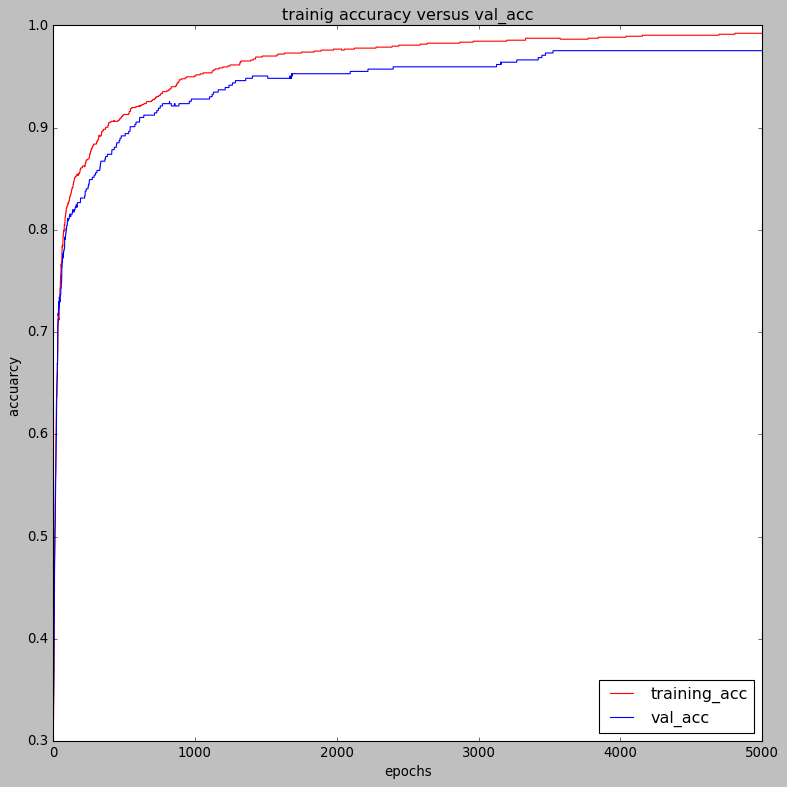

In [165]:
epochs=np.arange(1,5001)
plt.figure(figsize=(10,10))

plt.plot(epochs , accuracy , color='#ff0000' , label='training_acc')
plt.plot(epochs , val_accuracy , color='#0000FF',label='val_acc')
plt.legend(loc='lower right')
plt.title('trainig accuracy versus val_acc')
plt.xlabel('epochs')
plt.ylabel('accuarcy ')
plt.tight_layout()

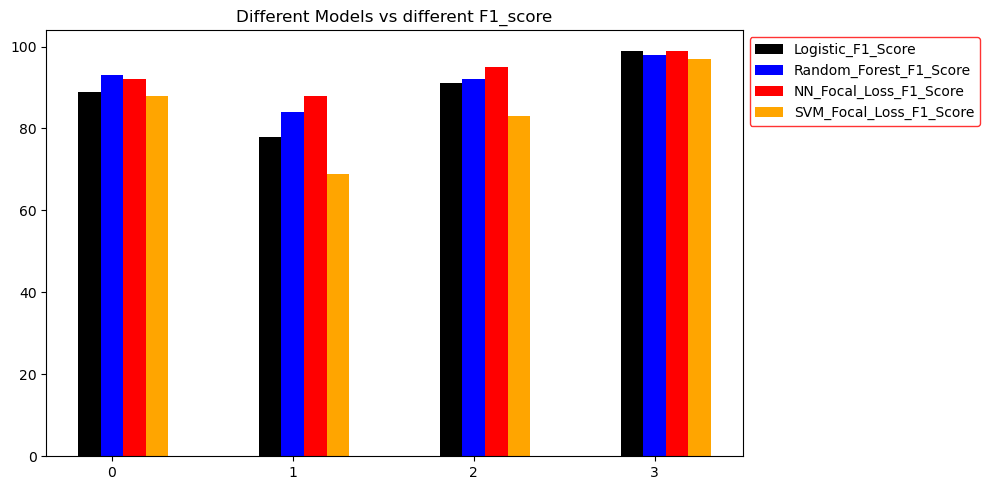

In [40]:
classes=[0,1,2,3]
reg_f1_score_training=[95,82,95,100]
reg_f1_score_val     =[89,78,91,99]

RF_f1_score_training =[100,100,100,100]
RF_f1_score_val      =[93,84,92,98]


SVM_f1_score_training =[95,81,94,99]
SVM_f1_score_val      =[88,69,83,97]


NN_f1_score_training =[98,94,98,100]
NN_f1_score_val      =[92,88,95,99]

x_indexes = np.arange(len(classes))
width=0.125 # you can change it 

plt.figure(figsize=(10,5))
plt.bar(x_indexes-width,reg_f1_score_val,
        color="black",label="Logistic_F1_Score",width=width)

plt.bar(x_indexes,RF_f1_score_val
        ,color="blue",label="Random_Forest_F1_Score",width=width)

plt.bar(x_indexes+width,NN_f1_score_val,
        color="red",label="NN_Focal_Loss_F1_Score",width=width)
plt.bar(x_indexes+2*width,SVM_f1_score_val,
        color="orange",label="SVM_Focal_Loss_F1_Score",width=width)



plt.xticks(ticks=x_indexes,labels=classes)

plt.title("Different Models vs different F1_score")


plt.use_sticky_edges = False

   

leg = plt.legend(bbox_to_anchor=(1,1))
leg.get_frame().set_edgecolor('r')

leg.get_frame().set_linewidth(1.0)
plt.tight_layout()
plt.savefig("F1_Score_For_Different_Models_before_applying_anything.png")
plt.show()












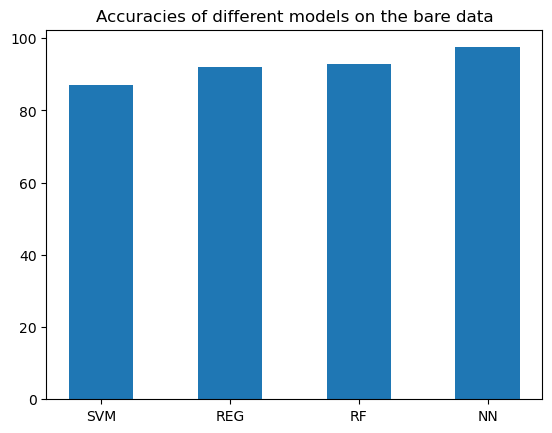

In [47]:
bars=["SVM","REG","RF","NN"]
accuracies= [87,92,93,97.5]

y_pos = np.arange(len(bars))

plt.bar(y_pos,accuracies,width=.5)

plt.xticks(y_pos,bars)
plt.title("Accuracies of different models on the bare data")
plt.grid(False)
plt.savefig("Accuracies of different models on the bare data.png")
plt.show()

## applying the different oversampling techniques.

**I have tought a little and I see that I should make the scaling on the actual data , because the mean and the variance will surely be different after oversampling , i dont mean to add the effect of the added data on the mean and the variance because we you recieve another new element you will need to scale it to the actual mean and variance of the actual distribution of the data**

In [416]:
class_0=df_original[df_original["Body_Level"]==0]
class_1=df_original[df_original["Body_Level"]==1]
class_2=df_original[df_original["Body_Level"]==2]
class_3=df_original[df_original["Body_Level"]==3]

class_0_test =class_0.iloc[0:int(class_0.shape[0] * (1/3))]
class_0_train=class_0.iloc[int(class_0.shape[0]*(1/3)):]

class_1_test =class_1.iloc[0:int(class_1.shape[0] * (1/3))]
class_1_train=class_1.iloc[int(class_1.shape[0]*(1/3)):]


class_2_test =class_2.iloc[0:int(class_2.shape[0] * (1/3))]
class_2_train=class_2.iloc[int(class_2.shape[0]*(1/3)):]

class_3_test =class_3.iloc[0:int(class_3.shape[0] * (1/3))]
class_3_train=class_3.iloc[int(class_3.shape[0]*(1/3)):]

print(class_0_train.shape)
print(class_1_train.shape)
print(class_2_train.shape)
print(class_3_train.shape)

all_class_test=pd.concat([class_0_test,class_1_test,class_2_test,class_3_test],axis=0)
all_class_train=pd.concat([class_0_train,class_1_train,class_2_train,class_3_train],axis=0)

X_train_original = df_original.drop(["Body_Level"],axis=1).to_numpy()
Y_train_original= df_original["Body_Level"].to_numpy()

(127, 24)
(134, 24)
(271, 24)
(454, 24)


In [417]:
all_class_train["Body_Level"].value_counts()

3    454
2    271
1    134
0    127
Name: Body_Level, dtype: int64

In [418]:
df_ = all_class_train[all_class_train["Body_Level"]==3]
for i in range(3):
    df_minority = all_class_train[all_class_train["Body_Level"]==i]
    print(454-df_minority.shape[0])
    df_minority_upsample = resample(df_minority , replace =True ,
                                    n_samples=int(0.5*(454-df_minority.shape[0])),
                                    random_state=42)
    print(df_minority_upsample.shape[0])
    
    df_ = pd.concat([df_,df_minority_upsample,df_minority], axis=0,)

oversampled=df_

327
163
320
160
183
91


In [419]:
oversampled["Body_Level"].value_counts()

3    454
2    362
1    294
0    290
Name: Body_Level, dtype: int64

In [420]:
X_train=oversampled.drop(["Body_Level"],axis=1).to_numpy()
Y_train=oversampled["Body_Level"].to_numpy()

In [421]:
X_test=all_class_test.drop(["Body_Level"],axis=1).to_numpy()
Y_test=all_class_test["Body_Level"].to_numpy()

In [422]:
scaler = preprocessing.StandardScaler().fit(X_train_original)
X_train_scaled=scaler.transform(X_train)
X_train=X_train_scaled
X_test_scaled=scaler.transform(X_test)
X_test=X_test_scaled

In [423]:
#  X_train, X_test, Y_train, Y_test = train_test_split(X_train_scaled
#                                                      , Y_train, test_size=0.3, random_state=42)
    
# _ , X_test_original, _ , Y_test_original=train_test_split(X_train_original_scaled
#                                                      , Y_train_original, test_size=0.3, random_state=42)

# X_test_original.shape

In [424]:
reg_model = LogisticRegression(random_state=42,max_iter=1000).fit(X_train,Y_train)

In [425]:
Y_train_pred=reg_model.predict(X_train)

In [426]:
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       290
           1       0.97      0.84      0.90       294
           2       0.93      0.98      0.95       362
           3       1.00      0.99      1.00       454

    accuracy                           0.96      1400
   macro avg       0.96      0.95      0.95      1400
weighted avg       0.96      0.96      0.96      1400



In [427]:
Y_test_pred=reg_model.predict(X_test)

In [428]:
print(classification_report(Y_test,Y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95        63
           1       0.93      0.81      0.86        67
           2       0.92      0.98      0.95       135
           3       1.00      0.98      0.99       226

    accuracy                           0.96       491
   macro avg       0.94      0.93      0.94       491
weighted avg       0.96      0.96      0.95       491



In [429]:
rand_forest_model = RandomForestClassifier(max_depth=40,random_state=42).fit(X_train,Y_train)

In [430]:
Y_train_pred=rand_forest_model.predict(X_train)

In [431]:
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       290
           1       1.00      1.00      1.00       294
           2       1.00      1.00      1.00       362
           3       1.00      1.00      1.00       454

    accuracy                           1.00      1400
   macro avg       1.00      1.00      1.00      1400
weighted avg       1.00      1.00      1.00      1400



In [432]:
Y_test_pred=rand_forest_model.predict(X_test)

In [433]:
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        63
           1       0.79      0.84      0.81        67
           2       0.90      0.92      0.91       135
           3       0.98      0.97      0.98       226

    accuracy                           0.93       491
   macro avg       0.91      0.91      0.91       491
weighted avg       0.93      0.93      0.93       491



In [434]:
svm_model = SVC(gamma='auto').fit(X_train,Y_train)


In [435]:
Y_train_pred=svm_model.predict(X_train)


In [436]:
print(classification_report(Y_train, Y_train_pred))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       290
           1       0.96      0.92      0.94       294
           2       0.94      0.97      0.96       362
           3       0.99      0.99      0.99       454

    accuracy                           0.97      1400
   macro avg       0.97      0.97      0.97      1400
weighted avg       0.97      0.97      0.97      1400



In [437]:
Y_test_pred=svm_model.predict(X_test)


In [438]:
print(classification_report(Y_test,Y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89        63
           1       0.62      0.75      0.68        67
           2       0.89      0.87      0.88       135
           3       0.99      0.95      0.97       226

    accuracy                           0.89       491
   macro avg       0.85      0.86      0.85       491
weighted avg       0.90      0.89      0.89       491



In [443]:
mc = ModelCheckpoint('Best_Logistic_after_over_Sampling_Batch_split_.h5',
                     monitor='val_accuracy', mode='max'
                     , verbose=1, save_best_only=True)



model_NN=keras.Sequential([keras.Input(shape=(23)),
                        layers.Dense(4,activation='softmax')])



In [444]:
model_NN.compile(loss=SparseCategoricalFocalLoss(from_logits=False,gamma=2),
              optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["accuracy"])



In [446]:
history = model_NN.fit(X_train,Y_train,validation_data=[X_test,Y_test] 
             ,batch_size=32, epochs=1500 , verbose =1, callbacks=[mc])

Epoch 1/1500
27/44 [=================>............] - ETA: 0s - loss: 0.0888 - accuracy: 0.9375
Epoch 1: val_accuracy improved from 0.93075 to 0.93279, saving model to Best_Logistic_after_over_Sampling_Batch_split_.h5
44/44 [==============================] - 0s 4ms/step - loss: 0.0882 - accuracy: 0.9336 - val_loss: 0.1168 - val_accuracy: 0.9328
Epoch 2/1500
31/44 [====================>.........] - ETA: 0s - loss: 0.0872 - accuracy: 0.9385
Epoch 2: val_accuracy did not improve from 0.93279
44/44 [==============================] - 0s 3ms/step - loss: 0.0881 - accuracy: 0.9336 - val_loss: 0.1167 - val_accuracy: 0.9308
Epoch 3/1500
25/44 [================>.............] - ETA: 0s - loss: 0.0886 - accuracy: 0.9225
Epoch 3: val_accuracy did not improve from 0.93279
44/44 [==============================] - 0s 4ms/step - loss: 0.0881 - accuracy: 0.9329 - val_loss: 0.1167 - val_accuracy: 0.9328
Epoch 4/1500
24/44 [===============>..............] - ETA: 0s - loss: 0.0878 - accuracy: 0.9323
Epoch

24/44 [===============>..............] - ETA: 0s - loss: 0.0843 - accuracy: 0.9401
Epoch 30: val_accuracy did not improve from 0.93483
44/44 [==============================] - 0s 4ms/step - loss: 0.0867 - accuracy: 0.9364 - val_loss: 0.1156 - val_accuracy: 0.9348
Epoch 31/1500
44/44 [==============================] - ETA: 0s - loss: 0.0866 - accuracy: 0.9364
Epoch 31: val_accuracy did not improve from 0.93483
44/44 [==============================] - 0s 4ms/step - loss: 0.0866 - accuracy: 0.9364 - val_loss: 0.1155 - val_accuracy: 0.9348
Epoch 32/1500
27/44 [=================>............] - ETA: 0s - loss: 0.0848 - accuracy: 0.9363
Epoch 32: val_accuracy did not improve from 0.93483
44/44 [==============================] - 0s 3ms/step - loss: 0.0866 - accuracy: 0.9364 - val_loss: 0.1155 - val_accuracy: 0.9348
Epoch 33/1500
30/44 [===================>..........] - ETA: 0s - loss: 0.0868 - accuracy: 0.9406
Epoch 33: val_accuracy did not improve from 0.93483
44/44 [========================

44/44 [==============================] - 0s 4ms/step - loss: 0.0852 - accuracy: 0.9386 - val_loss: 0.1145 - val_accuracy: 0.9348
Epoch 60/1500
25/44 [================>.............] - ETA: 0s - loss: 0.0812 - accuracy: 0.9488
Epoch 60: val_accuracy did not improve from 0.93483
44/44 [==============================] - 0s 3ms/step - loss: 0.0851 - accuracy: 0.9393 - val_loss: 0.1145 - val_accuracy: 0.9348
Epoch 61/1500
31/44 [====================>.........] - ETA: 0s - loss: 0.0830 - accuracy: 0.9435
Epoch 61: val_accuracy did not improve from 0.93483
44/44 [==============================] - 0s 3ms/step - loss: 0.0851 - accuracy: 0.9386 - val_loss: 0.1144 - val_accuracy: 0.9348
Epoch 62/1500
31/44 [====================>.........] - ETA: 0s - loss: 0.0841 - accuracy: 0.9385
Epoch 62: val_accuracy did not improve from 0.93483
44/44 [==============================] - 0s 3ms/step - loss: 0.0850 - accuracy: 0.9393 - val_loss: 0.1144 - val_accuracy: 0.9348
Epoch 63/1500
26/44 [================

Epoch 89/1500
25/44 [================>.............] - ETA: 0s - loss: 0.0838 - accuracy: 0.9400
Epoch 89: val_accuracy did not improve from 0.93686
44/44 [==============================] - 0s 3ms/step - loss: 0.0837 - accuracy: 0.9400 - val_loss: 0.1135 - val_accuracy: 0.9369
Epoch 90/1500
31/44 [====================>.........] - ETA: 0s - loss: 0.0819 - accuracy: 0.9395
Epoch 90: val_accuracy did not improve from 0.93686
44/44 [==============================] - 0s 3ms/step - loss: 0.0836 - accuracy: 0.9393 - val_loss: 0.1135 - val_accuracy: 0.9348
Epoch 91/1500
28/44 [==================>...........] - ETA: 0s - loss: 0.0838 - accuracy: 0.9408
Epoch 91: val_accuracy did not improve from 0.93686
44/44 [==============================] - 0s 4ms/step - loss: 0.0836 - accuracy: 0.9400 - val_loss: 0.1134 - val_accuracy: 0.9369
Epoch 92/1500
28/44 [==================>...........] - ETA: 0s - loss: 0.0847 - accuracy: 0.9408
Epoch 92: val_accuracy did not improve from 0.93686
44/44 [==========

43/44 [============================>.] - ETA: 0s - loss: 0.0806 - accuracy: 0.9411
Epoch 147: val_accuracy did not improve from 0.93890
44/44 [==============================] - 0s 4ms/step - loss: 0.0809 - accuracy: 0.9407 - val_loss: 0.1116 - val_accuracy: 0.9389
Epoch 148/1500
33/44 [=====================>........] - ETA: 0s - loss: 0.0807 - accuracy: 0.9413
Epoch 148: val_accuracy did not improve from 0.93890
44/44 [==============================] - 0s 3ms/step - loss: 0.0809 - accuracy: 0.9414 - val_loss: 0.1115 - val_accuracy: 0.9389
Epoch 149/1500
31/44 [====================>.........] - ETA: 0s - loss: 0.0749 - accuracy: 0.9476
Epoch 149: val_accuracy did not improve from 0.93890
44/44 [==============================] - 0s 3ms/step - loss: 0.0808 - accuracy: 0.9400 - val_loss: 0.1115 - val_accuracy: 0.9389
Epoch 150/1500
31/44 [====================>.........] - ETA: 0s - loss: 0.0840 - accuracy: 0.9365
Epoch 150: val_accuracy did not improve from 0.93890
44/44 [=================

Epoch 176/1500
31/44 [====================>.........] - ETA: 0s - loss: 0.0771 - accuracy: 0.9446
Epoch 176: val_accuracy did not improve from 0.94297
44/44 [==============================] - 0s 3ms/step - loss: 0.0796 - accuracy: 0.9443 - val_loss: 0.1106 - val_accuracy: 0.9430
Epoch 177/1500
31/44 [====================>.........] - ETA: 0s - loss: 0.0794 - accuracy: 0.9425
Epoch 177: val_accuracy did not improve from 0.94297
44/44 [==============================] - 0s 3ms/step - loss: 0.0795 - accuracy: 0.9443 - val_loss: 0.1106 - val_accuracy: 0.9430
Epoch 178/1500
29/44 [==================>...........] - ETA: 0s - loss: 0.0805 - accuracy: 0.9472
Epoch 178: val_accuracy did not improve from 0.94297
44/44 [==============================] - 0s 3ms/step - loss: 0.0795 - accuracy: 0.9443 - val_loss: 0.1106 - val_accuracy: 0.9430
Epoch 179/1500
30/44 [===================>..........] - ETA: 0s - loss: 0.0750 - accuracy: 0.9458
Epoch 179: val_accuracy did not improve from 0.94297
44/44 [==

43/44 [============================>.] - ETA: 0s - loss: 0.0770 - accuracy: 0.9448
Epoch 234: val_accuracy did not improve from 0.94297
44/44 [==============================] - 0s 4ms/step - loss: 0.0770 - accuracy: 0.9450 - val_loss: 0.1089 - val_accuracy: 0.9430
Epoch 235/1500
33/44 [=====================>........] - ETA: 0s - loss: 0.0774 - accuracy: 0.9413
Epoch 235: val_accuracy did not improve from 0.94297
44/44 [==============================] - 0s 3ms/step - loss: 0.0770 - accuracy: 0.9450 - val_loss: 0.1089 - val_accuracy: 0.9430
Epoch 236/1500
 1/44 [..............................] - ETA: 0s - loss: 0.0685 - accuracy: 0.9688
Epoch 236: val_accuracy did not improve from 0.94297
44/44 [==============================] - 0s 2ms/step - loss: 0.0770 - accuracy: 0.9457 - val_loss: 0.1088 - val_accuracy: 0.9430
Epoch 237/1500
 1/44 [..............................] - ETA: 0s - loss: 0.0502 - accuracy: 0.9688
Epoch 237: val_accuracy did not improve from 0.94297
44/44 [=================

33/44 [=====================>........] - ETA: 0s - loss: 0.0733 - accuracy: 0.9460
Epoch 292: val_accuracy did not improve from 0.94297
44/44 [==============================] - 0s 3ms/step - loss: 0.0747 - accuracy: 0.9471 - val_loss: 0.1074 - val_accuracy: 0.9430
Epoch 293/1500
32/44 [====================>.........] - ETA: 0s - loss: 0.0776 - accuracy: 0.9463
Epoch 293: val_accuracy did not improve from 0.94297
44/44 [==============================] - 0s 3ms/step - loss: 0.0746 - accuracy: 0.9464 - val_loss: 0.1073 - val_accuracy: 0.9430
Epoch 294/1500
30/44 [===================>..........] - ETA: 0s - loss: 0.0788 - accuracy: 0.9354
Epoch 294: val_accuracy did not improve from 0.94297
44/44 [==============================] - 0s 3ms/step - loss: 0.0746 - accuracy: 0.9471 - val_loss: 0.1073 - val_accuracy: 0.9430
Epoch 295/1500
32/44 [====================>.........] - ETA: 0s - loss: 0.0748 - accuracy: 0.9434
Epoch 295: val_accuracy did not improve from 0.94297
44/44 [=================

30/44 [===================>..........] - ETA: 0s - loss: 0.0715 - accuracy: 0.9500
Epoch 350: val_accuracy did not improve from 0.94297
44/44 [==============================] - 0s 3ms/step - loss: 0.0724 - accuracy: 0.9471 - val_loss: 0.1059 - val_accuracy: 0.9430
Epoch 351/1500
31/44 [====================>.........] - ETA: 0s - loss: 0.0705 - accuracy: 0.9486
Epoch 351: val_accuracy did not improve from 0.94297
44/44 [==============================] - 0s 3ms/step - loss: 0.0724 - accuracy: 0.9471 - val_loss: 0.1059 - val_accuracy: 0.9430
Epoch 352/1500
34/44 [======================>.......] - ETA: 0s - loss: 0.0737 - accuracy: 0.9384
Epoch 352: val_accuracy did not improve from 0.94297
44/44 [==============================] - 0s 3ms/step - loss: 0.0723 - accuracy: 0.9471 - val_loss: 0.1059 - val_accuracy: 0.9430
Epoch 353/1500
30/44 [===================>..........] - ETA: 0s - loss: 0.0711 - accuracy: 0.9490
Epoch 353: val_accuracy improved from 0.94297 to 0.94501, saving model to Bes

Epoch 379/1500
 1/44 [..............................] - ETA: 0s - loss: 0.0892 - accuracy: 0.9688
Epoch 379: val_accuracy did not improve from 0.94705
44/44 [==============================] - 0s 2ms/step - loss: 0.0713 - accuracy: 0.9471 - val_loss: 0.1053 - val_accuracy: 0.9470
Epoch 380/1500
35/44 [======================>.......] - ETA: 0s - loss: 0.0716 - accuracy: 0.9491
Epoch 380: val_accuracy did not improve from 0.94705
44/44 [==============================] - 0s 3ms/step - loss: 0.0713 - accuracy: 0.9471 - val_loss: 0.1053 - val_accuracy: 0.9470
Epoch 381/1500
28/44 [==================>...........] - ETA: 0s - loss: 0.0742 - accuracy: 0.9386
Epoch 381: val_accuracy did not improve from 0.94705
44/44 [==============================] - 0s 3ms/step - loss: 0.0712 - accuracy: 0.9471 - val_loss: 0.1053 - val_accuracy: 0.9470
Epoch 382/1500
26/44 [================>.............] - ETA: 0s - loss: 0.0696 - accuracy: 0.9495
Epoch 382: val_accuracy did not improve from 0.94705
44/44 [==

30/44 [===================>..........] - ETA: 0s - loss: 0.0703 - accuracy: 0.9448
Epoch 437: val_accuracy did not improve from 0.94705
44/44 [==============================] - 0s 3ms/step - loss: 0.0692 - accuracy: 0.9471 - val_loss: 0.1040 - val_accuracy: 0.9470
Epoch 438/1500
30/44 [===================>..........] - ETA: 0s - loss: 0.0679 - accuracy: 0.9479
Epoch 438: val_accuracy did not improve from 0.94705
44/44 [==============================] - 0s 3ms/step - loss: 0.0692 - accuracy: 0.9471 - val_loss: 0.1040 - val_accuracy: 0.9470
Epoch 439/1500
35/44 [======================>.......] - ETA: 0s - loss: 0.0700 - accuracy: 0.9464
Epoch 439: val_accuracy did not improve from 0.94705
44/44 [==============================] - 0s 2ms/step - loss: 0.0692 - accuracy: 0.9471 - val_loss: 0.1039 - val_accuracy: 0.9470
Epoch 440/1500
 1/44 [..............................] - ETA: 0s - loss: 0.0775 - accuracy: 0.9062
Epoch 440: val_accuracy did not improve from 0.94705
44/44 [=================

30/44 [===================>..........] - ETA: 0s - loss: 0.0653 - accuracy: 0.9542
Epoch 495: val_accuracy did not improve from 0.94908
44/44 [==============================] - 0s 3ms/step - loss: 0.0673 - accuracy: 0.9493 - val_loss: 0.1029 - val_accuracy: 0.9491
Epoch 496/1500
32/44 [====================>.........] - ETA: 0s - loss: 0.0673 - accuracy: 0.9482
Epoch 496: val_accuracy did not improve from 0.94908
44/44 [==============================] - 0s 3ms/step - loss: 0.0673 - accuracy: 0.9493 - val_loss: 0.1029 - val_accuracy: 0.9491
Epoch 497/1500
31/44 [====================>.........] - ETA: 0s - loss: 0.0660 - accuracy: 0.9516
Epoch 497: val_accuracy did not improve from 0.94908
44/44 [==============================] - 0s 3ms/step - loss: 0.0672 - accuracy: 0.9500 - val_loss: 0.1028 - val_accuracy: 0.9491
Epoch 498/1500
31/44 [====================>.........] - ETA: 0s - loss: 0.0659 - accuracy: 0.9556
Epoch 498: val_accuracy did not improve from 0.94908
44/44 [=================

30/44 [===================>..........] - ETA: 0s - loss: 0.0658 - accuracy: 0.9469
Epoch 553: val_accuracy did not improve from 0.94908
44/44 [==============================] - 0s 3ms/step - loss: 0.0654 - accuracy: 0.9507 - val_loss: 0.1018 - val_accuracy: 0.9491
Epoch 554/1500
32/44 [====================>.........] - ETA: 0s - loss: 0.0665 - accuracy: 0.9502
Epoch 554: val_accuracy did not improve from 0.94908
44/44 [==============================] - 0s 3ms/step - loss: 0.0654 - accuracy: 0.9507 - val_loss: 0.1018 - val_accuracy: 0.9491
Epoch 555/1500
31/44 [====================>.........] - ETA: 0s - loss: 0.0659 - accuracy: 0.9546
Epoch 555: val_accuracy did not improve from 0.94908
44/44 [==============================] - 0s 3ms/step - loss: 0.0654 - accuracy: 0.9507 - val_loss: 0.1017 - val_accuracy: 0.9491
Epoch 556/1500
30/44 [===================>..........] - ETA: 0s - loss: 0.0632 - accuracy: 0.9563
Epoch 556: val_accuracy did not improve from 0.94908
44/44 [=================

30/44 [===================>..........] - ETA: 0s - loss: 0.0650 - accuracy: 0.9469
Epoch 611: val_accuracy did not improve from 0.94908
44/44 [==============================] - 0s 3ms/step - loss: 0.0637 - accuracy: 0.9507 - val_loss: 0.1008 - val_accuracy: 0.9491
Epoch 612/1500
 1/44 [..............................] - ETA: 0s - loss: 0.0620 - accuracy: 1.0000
Epoch 612: val_accuracy did not improve from 0.94908
44/44 [==============================] - 0s 2ms/step - loss: 0.0636 - accuracy: 0.9507 - val_loss: 0.1008 - val_accuracy: 0.9491
Epoch 613/1500
 1/44 [..............................] - ETA: 0s - loss: 0.0820 - accuracy: 0.9062
Epoch 613: val_accuracy did not improve from 0.94908
44/44 [==============================] - 0s 2ms/step - loss: 0.0636 - accuracy: 0.9507 - val_loss: 0.1008 - val_accuracy: 0.9491
Epoch 614/1500
 1/44 [..............................] - ETA: 0s - loss: 0.0964 - accuracy: 0.8438
Epoch 614: val_accuracy did not improve from 0.94908
44/44 [=================

30/44 [===================>..........] - ETA: 0s - loss: 0.0633 - accuracy: 0.9521
Epoch 669: val_accuracy did not improve from 0.94908
44/44 [==============================] - 0s 3ms/step - loss: 0.0620 - accuracy: 0.9529 - val_loss: 0.0999 - val_accuracy: 0.9491
Epoch 670/1500
32/44 [====================>.........] - ETA: 0s - loss: 0.0632 - accuracy: 0.9512
Epoch 670: val_accuracy did not improve from 0.94908
44/44 [==============================] - 0s 3ms/step - loss: 0.0619 - accuracy: 0.9514 - val_loss: 0.0999 - val_accuracy: 0.9491
Epoch 671/1500
31/44 [====================>.........] - ETA: 0s - loss: 0.0614 - accuracy: 0.9506
Epoch 671: val_accuracy did not improve from 0.94908
44/44 [==============================] - 0s 3ms/step - loss: 0.0619 - accuracy: 0.9529 - val_loss: 0.0999 - val_accuracy: 0.9491
Epoch 672/1500
31/44 [====================>.........] - ETA: 0s - loss: 0.0641 - accuracy: 0.9476
Epoch 672: val_accuracy did not improve from 0.94908
44/44 [=================

32/44 [====================>.........] - ETA: 0s - loss: 0.0573 - accuracy: 0.9629
Epoch 727: val_accuracy did not improve from 0.94908
44/44 [==============================] - 0s 3ms/step - loss: 0.0604 - accuracy: 0.9564 - val_loss: 0.0984 - val_accuracy: 0.9491
Epoch 728/1500
30/44 [===================>..........] - ETA: 0s - loss: 0.0599 - accuracy: 0.9521
Epoch 728: val_accuracy did not improve from 0.94908
44/44 [==============================] - 0s 3ms/step - loss: 0.0604 - accuracy: 0.9564 - val_loss: 0.0983 - val_accuracy: 0.9491
Epoch 729/1500
31/44 [====================>.........] - ETA: 0s - loss: 0.0580 - accuracy: 0.9556
Epoch 729: val_accuracy did not improve from 0.94908
44/44 [==============================] - 0s 3ms/step - loss: 0.0603 - accuracy: 0.9564 - val_loss: 0.0984 - val_accuracy: 0.9491
Epoch 730/1500
30/44 [===================>..........] - ETA: 0s - loss: 0.0580 - accuracy: 0.9615
Epoch 730: val_accuracy did not improve from 0.94908
44/44 [=================

 1/44 [..............................] - ETA: 0s - loss: 0.0653 - accuracy: 0.9688
Epoch 785: val_accuracy did not improve from 0.94908
44/44 [==============================] - 0s 2ms/step - loss: 0.0589 - accuracy: 0.9564 - val_loss: 0.0969 - val_accuracy: 0.9491
Epoch 786/1500
35/44 [======================>.......] - ETA: 0s - loss: 0.0573 - accuracy: 0.9625
Epoch 786: val_accuracy did not improve from 0.94908
44/44 [==============================] - 0s 3ms/step - loss: 0.0588 - accuracy: 0.9564 - val_loss: 0.0969 - val_accuracy: 0.9491
Epoch 787/1500
29/44 [==================>...........] - ETA: 0s - loss: 0.0592 - accuracy: 0.9547
Epoch 787: val_accuracy did not improve from 0.94908
44/44 [==============================] - 0s 3ms/step - loss: 0.0588 - accuracy: 0.9564 - val_loss: 0.0969 - val_accuracy: 0.9491
Epoch 788/1500
30/44 [===================>..........] - ETA: 0s - loss: 0.0557 - accuracy: 0.9656
Epoch 788: val_accuracy did not improve from 0.94908
44/44 [=================

29/44 [==================>...........] - ETA: 0s - loss: 0.0575 - accuracy: 0.9591
Epoch 843: val_accuracy did not improve from 0.95112
44/44 [==============================] - 0s 3ms/step - loss: 0.0574 - accuracy: 0.9579 - val_loss: 0.0956 - val_accuracy: 0.9511
Epoch 844/1500
31/44 [====================>.........] - ETA: 0s - loss: 0.0542 - accuracy: 0.9607
Epoch 844: val_accuracy did not improve from 0.95112
44/44 [==============================] - 0s 3ms/step - loss: 0.0574 - accuracy: 0.9579 - val_loss: 0.0955 - val_accuracy: 0.9511
Epoch 845/1500
30/44 [===================>..........] - ETA: 0s - loss: 0.0604 - accuracy: 0.9552
Epoch 845: val_accuracy did not improve from 0.95112
44/44 [==============================] - 0s 3ms/step - loss: 0.0574 - accuracy: 0.9579 - val_loss: 0.0955 - val_accuracy: 0.9511
Epoch 846/1500
39/44 [=========================>....] - ETA: 0s - loss: 0.0573 - accuracy: 0.9575
Epoch 846: val_accuracy did not improve from 0.95112
44/44 [=================

32/44 [====================>.........] - ETA: 0s - loss: 0.0568 - accuracy: 0.9551
Epoch 901: val_accuracy did not improve from 0.95112
44/44 [==============================] - 0s 3ms/step - loss: 0.0560 - accuracy: 0.9579 - val_loss: 0.0942 - val_accuracy: 0.9511
Epoch 902/1500
30/44 [===================>..........] - ETA: 0s - loss: 0.0548 - accuracy: 0.9615
Epoch 902: val_accuracy did not improve from 0.95112
44/44 [==============================] - 0s 3ms/step - loss: 0.0560 - accuracy: 0.9579 - val_loss: 0.0942 - val_accuracy: 0.9511
Epoch 903/1500
31/44 [====================>.........] - ETA: 0s - loss: 0.0581 - accuracy: 0.9546
Epoch 903: val_accuracy did not improve from 0.95112
44/44 [==============================] - 0s 3ms/step - loss: 0.0560 - accuracy: 0.9579 - val_loss: 0.0942 - val_accuracy: 0.9511
Epoch 904/1500
30/44 [===================>..........] - ETA: 0s - loss: 0.0554 - accuracy: 0.9552
Epoch 904: val_accuracy did not improve from 0.95112
44/44 [=================

29/44 [==================>...........] - ETA: 0s - loss: 0.0535 - accuracy: 0.9612
Epoch 959: val_accuracy did not improve from 0.95112
44/44 [==============================] - 0s 3ms/step - loss: 0.0547 - accuracy: 0.9579 - val_loss: 0.0930 - val_accuracy: 0.9511
Epoch 960/1500
31/44 [====================>.........] - ETA: 0s - loss: 0.0551 - accuracy: 0.9546
Epoch 960: val_accuracy did not improve from 0.95112
44/44 [==============================] - 0s 3ms/step - loss: 0.0547 - accuracy: 0.9579 - val_loss: 0.0930 - val_accuracy: 0.9511
Epoch 961/1500
31/44 [====================>.........] - ETA: 0s - loss: 0.0547 - accuracy: 0.9577
Epoch 961: val_accuracy did not improve from 0.95112
44/44 [==============================] - 0s 3ms/step - loss: 0.0547 - accuracy: 0.9579 - val_loss: 0.0930 - val_accuracy: 0.9511
Epoch 962/1500
29/44 [==================>...........] - ETA: 0s - loss: 0.0527 - accuracy: 0.9612
Epoch 962: val_accuracy did not improve from 0.95112
44/44 [=================

40/44 [==========================>...] - ETA: 0s - loss: 0.0534 - accuracy: 0.9641
Epoch 1017: val_accuracy did not improve from 0.95316
44/44 [==============================] - 0s 2ms/step - loss: 0.0535 - accuracy: 0.9621 - val_loss: 0.0918 - val_accuracy: 0.9532
Epoch 1018/1500
 1/44 [..............................] - ETA: 0s - loss: 0.0500 - accuracy: 1.0000
Epoch 1018: val_accuracy did not improve from 0.95316
44/44 [==============================] - 0s 2ms/step - loss: 0.0535 - accuracy: 0.9621 - val_loss: 0.0918 - val_accuracy: 0.9532
Epoch 1019/1500
42/44 [===========================>..] - ETA: 0s - loss: 0.0536 - accuracy: 0.9628
Epoch 1019: val_accuracy did not improve from 0.95316
44/44 [==============================] - 0s 2ms/step - loss: 0.0534 - accuracy: 0.9621 - val_loss: 0.0918 - val_accuracy: 0.9532
Epoch 1020/1500
28/44 [==================>...........] - ETA: 0s - loss: 0.0541 - accuracy: 0.9609
Epoch 1020: val_accuracy did not improve from 0.95316
44/44 [==========

29/44 [==================>...........] - ETA: 0s - loss: 0.0545 - accuracy: 0.9601
Epoch 1075: val_accuracy did not improve from 0.95316
44/44 [==============================] - 0s 3ms/step - loss: 0.0523 - accuracy: 0.9629 - val_loss: 0.0907 - val_accuracy: 0.9532
Epoch 1076/1500
30/44 [===================>..........] - ETA: 0s - loss: 0.0519 - accuracy: 0.9667
Epoch 1076: val_accuracy did not improve from 0.95316
44/44 [==============================] - 0s 3ms/step - loss: 0.0523 - accuracy: 0.9629 - val_loss: 0.0906 - val_accuracy: 0.9532
Epoch 1077/1500
32/44 [====================>.........] - ETA: 0s - loss: 0.0528 - accuracy: 0.9609
Epoch 1077: val_accuracy did not improve from 0.95316
44/44 [==============================] - 0s 3ms/step - loss: 0.0523 - accuracy: 0.9629 - val_loss: 0.0906 - val_accuracy: 0.9532
Epoch 1078/1500
30/44 [===================>..........] - ETA: 0s - loss: 0.0529 - accuracy: 0.9625
Epoch 1078: val_accuracy did not improve from 0.95316
44/44 [==========

28/44 [==================>...........] - ETA: 0s - loss: 0.0514 - accuracy: 0.9609
Epoch 1133: val_accuracy did not improve from 0.95316
44/44 [==============================] - 0s 3ms/step - loss: 0.0511 - accuracy: 0.9629 - val_loss: 0.0896 - val_accuracy: 0.9532
Epoch 1134/1500
28/44 [==================>...........] - ETA: 0s - loss: 0.0509 - accuracy: 0.9676
Epoch 1134: val_accuracy did not improve from 0.95316
44/44 [==============================] - 0s 3ms/step - loss: 0.0511 - accuracy: 0.9629 - val_loss: 0.0896 - val_accuracy: 0.9532
Epoch 1135/1500
31/44 [====================>.........] - ETA: 0s - loss: 0.0519 - accuracy: 0.9627
Epoch 1135: val_accuracy did not improve from 0.95316
44/44 [==============================] - 0s 3ms/step - loss: 0.0511 - accuracy: 0.9629 - val_loss: 0.0896 - val_accuracy: 0.9532
Epoch 1136/1500
24/44 [===============>..............] - ETA: 0s - loss: 0.0517 - accuracy: 0.9583
Epoch 1136: val_accuracy did not improve from 0.95316
44/44 [==========

 1/44 [..............................] - ETA: 0s - loss: 0.0524 - accuracy: 0.9688
Epoch 1191: val_accuracy did not improve from 0.95316
44/44 [==============================] - 0s 2ms/step - loss: 0.0501 - accuracy: 0.9643 - val_loss: 0.0886 - val_accuracy: 0.9511
Epoch 1192/1500
44/44 [==============================] - ETA: 0s - loss: 0.0500 - accuracy: 0.9629
Epoch 1192: val_accuracy did not improve from 0.95316
44/44 [==============================] - 0s 2ms/step - loss: 0.0500 - accuracy: 0.9629 - val_loss: 0.0886 - val_accuracy: 0.9511
Epoch 1193/1500
 1/44 [..............................] - ETA: 0s - loss: 0.0659 - accuracy: 0.9375
Epoch 1193: val_accuracy did not improve from 0.95316
44/44 [==============================] - 0s 2ms/step - loss: 0.0500 - accuracy: 0.9629 - val_loss: 0.0886 - val_accuracy: 0.9511
Epoch 1194/1500
35/44 [======================>.......] - ETA: 0s - loss: 0.0513 - accuracy: 0.9616
Epoch 1194: val_accuracy did not improve from 0.95316
44/44 [==========

Epoch 1220/1500
33/44 [=====================>........] - ETA: 0s - loss: 0.0494 - accuracy: 0.9640
Epoch 1220: val_accuracy did not improve from 0.95519
44/44 [==============================] - 0s 3ms/step - loss: 0.0495 - accuracy: 0.9650 - val_loss: 0.0881 - val_accuracy: 0.9552
Epoch 1221/1500
30/44 [===================>..........] - ETA: 0s - loss: 0.0477 - accuracy: 0.9708
Epoch 1221: val_accuracy did not improve from 0.95519
44/44 [==============================] - 0s 3ms/step - loss: 0.0495 - accuracy: 0.9664 - val_loss: 0.0881 - val_accuracy: 0.9552
Epoch 1222/1500
29/44 [==================>...........] - ETA: 0s - loss: 0.0481 - accuracy: 0.9677
Epoch 1222: val_accuracy did not improve from 0.95519
44/44 [==============================] - 0s 3ms/step - loss: 0.0495 - accuracy: 0.9664 - val_loss: 0.0881 - val_accuracy: 0.9552
Epoch 1223/1500
31/44 [====================>.........] - ETA: 0s - loss: 0.0492 - accuracy: 0.9627
Epoch 1223: val_accuracy did not improve from 0.95519
4

30/44 [===================>..........] - ETA: 0s - loss: 0.0481 - accuracy: 0.9688
Epoch 1249: val_accuracy did not improve from 0.95519
44/44 [==============================] - 0s 3ms/step - loss: 0.0490 - accuracy: 0.9650 - val_loss: 0.0877 - val_accuracy: 0.9552
Epoch 1250/1500
35/44 [======================>.......] - ETA: 0s - loss: 0.0506 - accuracy: 0.9625
Epoch 1250: val_accuracy did not improve from 0.95519
44/44 [==============================] - 0s 3ms/step - loss: 0.0490 - accuracy: 0.9664 - val_loss: 0.0877 - val_accuracy: 0.9552
Epoch 1251/1500
36/44 [=======================>......] - ETA: 0s - loss: 0.0486 - accuracy: 0.9696
Epoch 1251: val_accuracy did not improve from 0.95519
44/44 [==============================] - 0s 3ms/step - loss: 0.0490 - accuracy: 0.9664 - val_loss: 0.0876 - val_accuracy: 0.9552
Epoch 1252/1500
34/44 [======================>.......] - ETA: 0s - loss: 0.0494 - accuracy: 0.9632
Epoch 1252: val_accuracy did not improve from 0.95519
44/44 [==========

 1/44 [..............................] - ETA: 0s - loss: 0.0537 - accuracy: 0.9062
Epoch 1307: val_accuracy did not improve from 0.95519
44/44 [==============================] - 0s 2ms/step - loss: 0.0480 - accuracy: 0.9679 - val_loss: 0.0867 - val_accuracy: 0.9552
Epoch 1308/1500
 1/44 [..............................] - ETA: 0s - loss: 0.0764 - accuracy: 0.9375
Epoch 1308: val_accuracy improved from 0.95519 to 0.95723, saving model to Best_Logistic_after_over_Sampling_Batch_split_.h5
44/44 [==============================] - 0s 2ms/step - loss: 0.0480 - accuracy: 0.9679 - val_loss: 0.0867 - val_accuracy: 0.9572
Epoch 1309/1500
29/44 [==================>...........] - ETA: 0s - loss: 0.0452 - accuracy: 0.9731
Epoch 1309: val_accuracy did not improve from 0.95723
44/44 [==============================] - 0s 3ms/step - loss: 0.0480 - accuracy: 0.9657 - val_loss: 0.0867 - val_accuracy: 0.9552
Epoch 1310/1500
28/44 [==================>...........] - ETA: 0s - loss: 0.0504 - accuracy: 0.9621


Epoch 1336/1500
30/44 [===================>..........] - ETA: 0s - loss: 0.0469 - accuracy: 0.9729
Epoch 1336: val_accuracy did not improve from 0.95723
44/44 [==============================] - 0s 3ms/step - loss: 0.0475 - accuracy: 0.9686 - val_loss: 0.0863 - val_accuracy: 0.9572
Epoch 1337/1500
30/44 [===================>..........] - ETA: 0s - loss: 0.0484 - accuracy: 0.9677
Epoch 1337: val_accuracy did not improve from 0.95723
44/44 [==============================] - 0s 3ms/step - loss: 0.0475 - accuracy: 0.9679 - val_loss: 0.0863 - val_accuracy: 0.9572
Epoch 1338/1500
34/44 [======================>.......] - ETA: 0s - loss: 0.0476 - accuracy: 0.9642
Epoch 1338: val_accuracy did not improve from 0.95723
44/44 [==============================] - 0s 2ms/step - loss: 0.0475 - accuracy: 0.9686 - val_loss: 0.0863 - val_accuracy: 0.9572
Epoch 1339/1500
 1/44 [..............................] - ETA: 0s - loss: 0.0515 - accuracy: 0.9375
Epoch 1339: val_accuracy did not improve from 0.95723
4

Epoch 1365/1500
31/44 [====================>.........] - ETA: 0s - loss: 0.0483 - accuracy: 0.9657
Epoch 1365: val_accuracy did not improve from 0.95927
44/44 [==============================] - 0s 3ms/step - loss: 0.0471 - accuracy: 0.9686 - val_loss: 0.0859 - val_accuracy: 0.9593
Epoch 1366/1500
33/44 [=====================>........] - ETA: 0s - loss: 0.0484 - accuracy: 0.9678
Epoch 1366: val_accuracy did not improve from 0.95927
44/44 [==============================] - 0s 3ms/step - loss: 0.0470 - accuracy: 0.9686 - val_loss: 0.0859 - val_accuracy: 0.9572
Epoch 1367/1500
34/44 [======================>.......] - ETA: 0s - loss: 0.0467 - accuracy: 0.9688
Epoch 1367: val_accuracy did not improve from 0.95927
44/44 [==============================] - 0s 3ms/step - loss: 0.0470 - accuracy: 0.9686 - val_loss: 0.0859 - val_accuracy: 0.9593
Epoch 1368/1500
32/44 [====================>.........] - ETA: 0s - loss: 0.0460 - accuracy: 0.9727
Epoch 1368: val_accuracy did not improve from 0.95927
4

28/44 [==================>...........] - ETA: 0s - loss: 0.0449 - accuracy: 0.9721
Epoch 1394: val_accuracy did not improve from 0.95927
44/44 [==============================] - 0s 3ms/step - loss: 0.0466 - accuracy: 0.9721 - val_loss: 0.0855 - val_accuracy: 0.9593
Epoch 1395/1500
29/44 [==================>...........] - ETA: 0s - loss: 0.0460 - accuracy: 0.9677
Epoch 1395: val_accuracy did not improve from 0.95927
44/44 [==============================] - 0s 3ms/step - loss: 0.0466 - accuracy: 0.9693 - val_loss: 0.0854 - val_accuracy: 0.9593
Epoch 1396/1500
23/44 [==============>...............] - ETA: 0s - loss: 0.0441 - accuracy: 0.9796
Epoch 1396: val_accuracy did not improve from 0.95927
44/44 [==============================] - 0s 3ms/step - loss: 0.0466 - accuracy: 0.9721 - val_loss: 0.0854 - val_accuracy: 0.9593
Epoch 1397/1500
28/44 [==================>...........] - ETA: 0s - loss: 0.0456 - accuracy: 0.9710
Epoch 1397: val_accuracy did not improve from 0.95927
44/44 [==========

 1/44 [..............................] - ETA: 0s - loss: 0.0413 - accuracy: 1.0000
Epoch 1452: val_accuracy did not improve from 0.95927
44/44 [==============================] - 0s 2ms/step - loss: 0.0457 - accuracy: 0.9721 - val_loss: 0.0847 - val_accuracy: 0.9593
Epoch 1453/1500
31/44 [====================>.........] - ETA: 0s - loss: 0.0450 - accuracy: 0.9758
Epoch 1453: val_accuracy did not improve from 0.95927
44/44 [==============================] - 0s 3ms/step - loss: 0.0457 - accuracy: 0.9721 - val_loss: 0.0846 - val_accuracy: 0.9593
Epoch 1454/1500
31/44 [====================>.........] - ETA: 0s - loss: 0.0468 - accuracy: 0.9728
Epoch 1454: val_accuracy did not improve from 0.95927
44/44 [==============================] - 0s 3ms/step - loss: 0.0457 - accuracy: 0.9721 - val_loss: 0.0846 - val_accuracy: 0.9593
Epoch 1455/1500
33/44 [=====================>........] - ETA: 0s - loss: 0.0455 - accuracy: 0.9706
Epoch 1455: val_accuracy did not improve from 0.95927
44/44 [==========

In [271]:
mc = ModelCheckpoint('Best_one_layer_16_Batch.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)


In [272]:
model_NN=keras.Sequential([keras.Input(shape=(23)),
                           layers.Dense(16,activation='relu'),
                           layers.Dropout(0.4),
                        layers.Dense(4,activation='softmax')])


In [273]:
model_NN.compile(loss=SparseCategoricalFocalLoss(from_logits=False,gamma=2),
              optimizer=keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy"])

In [275]:
history =model_NN.fit(X_train,Y_train,validation_data=[X_test,Y_test] ,batch_size=X_train.shape[0], 
             epochs=5200 , verbose =1,callbacks=[mc])

Epoch 1/5200
1/1 [==============================] - ETA: 0s - loss: 0.0168 - accuracy: 0.9821
Epoch 1: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 70ms/step - loss: 0.0168 - accuracy: 0.9821 - val_loss: 0.0552 - val_accuracy: 0.9735
Epoch 2/5200
1/1 [==============================] - ETA: 0s - loss: 0.0188 - accuracy: 0.9764
Epoch 2: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 33ms/step - loss: 0.0188 - accuracy: 0.9764 - val_loss: 0.0528 - val_accuracy: 0.9735
Epoch 3/5200
1/1 [==============================] - ETA: 0s - loss: 0.0204 - accuracy: 0.9721
Epoch 3: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 33ms/step - loss: 0.0204 - accuracy: 0.9721 - val_loss: 0.0519 - val_accuracy: 0.9756
Epoch 4/5200
1/1 [==============================] - ETA: 0s - loss: 0.0168 - accuracy: 0.9814
Epoch 4: val_accuracy did not improve from 0.97963
1/1 [==============================]

Epoch 31/5200
1/1 [==============================] - ETA: 0s - loss: 0.0147 - accuracy: 0.9836
Epoch 31: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 45ms/step - loss: 0.0147 - accuracy: 0.9836 - val_loss: 0.0632 - val_accuracy: 0.9735
Epoch 32/5200
1/1 [==============================] - ETA: 0s - loss: 0.0181 - accuracy: 0.9779
Epoch 32: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 43ms/step - loss: 0.0181 - accuracy: 0.9779 - val_loss: 0.0611 - val_accuracy: 0.9735
Epoch 33/5200
1/1 [==============================] - ETA: 0s - loss: 0.0196 - accuracy: 0.9764
Epoch 33: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 45ms/step - loss: 0.0196 - accuracy: 0.9764 - val_loss: 0.0601 - val_accuracy: 0.9735
Epoch 34/5200
1/1 [==============================] - ETA: 0s - loss: 0.0214 - accuracy: 0.9786
Epoch 34: val_accuracy did not improve from 0.97963
1/1 [=======================

Epoch 61/5200
1/1 [==============================] - ETA: 0s - loss: 0.0150 - accuracy: 0.9829
Epoch 61: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 44ms/step - loss: 0.0150 - accuracy: 0.9829 - val_loss: 0.0641 - val_accuracy: 0.9776
Epoch 62/5200
1/1 [==============================] - ETA: 0s - loss: 0.0185 - accuracy: 0.9814
Epoch 62: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 43ms/step - loss: 0.0185 - accuracy: 0.9814 - val_loss: 0.0648 - val_accuracy: 0.9776
Epoch 63/5200
1/1 [==============================] - ETA: 0s - loss: 0.0188 - accuracy: 0.9771
Epoch 63: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 44ms/step - loss: 0.0188 - accuracy: 0.9771 - val_loss: 0.0664 - val_accuracy: 0.9796
Epoch 64/5200
1/1 [==============================] - ETA: 0s - loss: 0.0240 - accuracy: 0.9757
Epoch 64: val_accuracy did not improve from 0.97963
1/1 [=======================

Epoch 91/5200
1/1 [==============================] - ETA: 0s - loss: 0.0181 - accuracy: 0.9786
Epoch 91: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 34ms/step - loss: 0.0181 - accuracy: 0.9786 - val_loss: 0.0683 - val_accuracy: 0.9735
Epoch 92/5200
1/1 [==============================] - ETA: 0s - loss: 0.0257 - accuracy: 0.9714
Epoch 92: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 26ms/step - loss: 0.0257 - accuracy: 0.9714 - val_loss: 0.0684 - val_accuracy: 0.9735
Epoch 93/5200
1/1 [==============================] - ETA: 0s - loss: 0.0201 - accuracy: 0.9750
Epoch 93: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 37ms/step - loss: 0.0201 - accuracy: 0.9750 - val_loss: 0.0685 - val_accuracy: 0.9756
Epoch 94/5200
1/1 [==============================] - ETA: 0s - loss: 0.0198 - accuracy: 0.9743
Epoch 94: val_accuracy did not improve from 0.97963
1/1 [=======================

Epoch 121/5200
1/1 [==============================] - ETA: 0s - loss: 0.0210 - accuracy: 0.9793
Epoch 121: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 48ms/step - loss: 0.0210 - accuracy: 0.9793 - val_loss: 0.0750 - val_accuracy: 0.9633
Epoch 122/5200
1/1 [==============================] - ETA: 0s - loss: 0.0210 - accuracy: 0.9750
Epoch 122: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 47ms/step - loss: 0.0210 - accuracy: 0.9750 - val_loss: 0.0762 - val_accuracy: 0.9633
Epoch 123/5200
1/1 [==============================] - ETA: 0s - loss: 0.0241 - accuracy: 0.9707
Epoch 123: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 64ms/step - loss: 0.0241 - accuracy: 0.9707 - val_loss: 0.0766 - val_accuracy: 0.9633
Epoch 124/5200
1/1 [==============================] - ETA: 0s - loss: 0.0231 - accuracy: 0.9714
Epoch 124: val_accuracy did not improve from 0.97963
1/1 [===============

Epoch 151/5200
1/1 [==============================] - ETA: 0s - loss: 0.0194 - accuracy: 0.9779
Epoch 151: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 39ms/step - loss: 0.0194 - accuracy: 0.9779 - val_loss: 0.0601 - val_accuracy: 0.9715
Epoch 152/5200
1/1 [==============================] - ETA: 0s - loss: 0.0208 - accuracy: 0.9757
Epoch 152: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 53ms/step - loss: 0.0208 - accuracy: 0.9757 - val_loss: 0.0593 - val_accuracy: 0.9715
Epoch 153/5200
1/1 [==============================] - ETA: 0s - loss: 0.0182 - accuracy: 0.9743
Epoch 153: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 42ms/step - loss: 0.0182 - accuracy: 0.9743 - val_loss: 0.0600 - val_accuracy: 0.9715
Epoch 154/5200
1/1 [==============================] - ETA: 0s - loss: 0.0191 - accuracy: 0.9793
Epoch 154: val_accuracy did not improve from 0.97963
1/1 [===============

Epoch 181/5200
1/1 [==============================] - ETA: 0s - loss: 0.0234 - accuracy: 0.9714
Epoch 181: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 43ms/step - loss: 0.0234 - accuracy: 0.9714 - val_loss: 0.0841 - val_accuracy: 0.9654
Epoch 182/5200
1/1 [==============================] - ETA: 0s - loss: 0.0233 - accuracy: 0.9729
Epoch 182: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 35ms/step - loss: 0.0233 - accuracy: 0.9729 - val_loss: 0.0869 - val_accuracy: 0.9593
Epoch 183/5200
1/1 [==============================] - ETA: 0s - loss: 0.0141 - accuracy: 0.9843
Epoch 183: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 32ms/step - loss: 0.0141 - accuracy: 0.9843 - val_loss: 0.0861 - val_accuracy: 0.9613
Epoch 184/5200
1/1 [==============================] - ETA: 0s - loss: 0.0184 - accuracy: 0.9793
Epoch 184: val_accuracy did not improve from 0.97963
1/1 [===============

Epoch 211/5200
1/1 [==============================] - ETA: 0s - loss: 0.0189 - accuracy: 0.9771
Epoch 211: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 47ms/step - loss: 0.0189 - accuracy: 0.9771 - val_loss: 0.0716 - val_accuracy: 0.9695
Epoch 212/5200
1/1 [==============================] - ETA: 0s - loss: 0.0229 - accuracy: 0.9736
Epoch 212: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 39ms/step - loss: 0.0229 - accuracy: 0.9736 - val_loss: 0.0735 - val_accuracy: 0.9695
Epoch 213/5200
1/1 [==============================] - ETA: 0s - loss: 0.0200 - accuracy: 0.9771
Epoch 213: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 41ms/step - loss: 0.0200 - accuracy: 0.9771 - val_loss: 0.0750 - val_accuracy: 0.9695
Epoch 214/5200
1/1 [==============================] - ETA: 0s - loss: 0.0216 - accuracy: 0.9750
Epoch 214: val_accuracy did not improve from 0.97963
1/1 [===============

Epoch 241/5200
1/1 [==============================] - ETA: 0s - loss: 0.0222 - accuracy: 0.9693
Epoch 241: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 45ms/step - loss: 0.0222 - accuracy: 0.9693 - val_loss: 0.0563 - val_accuracy: 0.9756
Epoch 242/5200
1/1 [==============================] - ETA: 0s - loss: 0.0222 - accuracy: 0.9743
Epoch 242: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 41ms/step - loss: 0.0222 - accuracy: 0.9743 - val_loss: 0.0568 - val_accuracy: 0.9756
Epoch 243/5200
1/1 [==============================] - ETA: 0s - loss: 0.0194 - accuracy: 0.9714
Epoch 243: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 37ms/step - loss: 0.0194 - accuracy: 0.9714 - val_loss: 0.0578 - val_accuracy: 0.9756
Epoch 244/5200
1/1 [==============================] - ETA: 0s - loss: 0.0144 - accuracy: 0.9814
Epoch 244: val_accuracy did not improve from 0.97963
1/1 [===============

Epoch 271/5200
1/1 [==============================] - ETA: 0s - loss: 0.0239 - accuracy: 0.9714
Epoch 271: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 41ms/step - loss: 0.0239 - accuracy: 0.9714 - val_loss: 0.0656 - val_accuracy: 0.9715
Epoch 272/5200
1/1 [==============================] - ETA: 0s - loss: 0.0240 - accuracy: 0.9721
Epoch 272: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 50ms/step - loss: 0.0240 - accuracy: 0.9721 - val_loss: 0.0671 - val_accuracy: 0.9674
Epoch 273/5200
1/1 [==============================] - ETA: 0s - loss: 0.0159 - accuracy: 0.9814
Epoch 273: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 31ms/step - loss: 0.0159 - accuracy: 0.9814 - val_loss: 0.0679 - val_accuracy: 0.9674
Epoch 274/5200
1/1 [==============================] - ETA: 0s - loss: 0.0196 - accuracy: 0.9793
Epoch 274: val_accuracy did not improve from 0.97963
1/1 [===============

Epoch 301/5200
1/1 [==============================] - ETA: 0s - loss: 0.0144 - accuracy: 0.9850
Epoch 301: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 39ms/step - loss: 0.0144 - accuracy: 0.9850 - val_loss: 0.0557 - val_accuracy: 0.9654
Epoch 302/5200
1/1 [==============================] - ETA: 0s - loss: 0.0169 - accuracy: 0.9779
Epoch 302: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 38ms/step - loss: 0.0169 - accuracy: 0.9779 - val_loss: 0.0544 - val_accuracy: 0.9654
Epoch 303/5200
1/1 [==============================] - ETA: 0s - loss: 0.0227 - accuracy: 0.9714
Epoch 303: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 36ms/step - loss: 0.0227 - accuracy: 0.9714 - val_loss: 0.0532 - val_accuracy: 0.9674
Epoch 304/5200
1/1 [==============================] - ETA: 0s - loss: 0.0163 - accuracy: 0.9793
Epoch 304: val_accuracy did not improve from 0.97963
1/1 [===============

Epoch 331/5200
1/1 [==============================] - ETA: 0s - loss: 0.0171 - accuracy: 0.9829
Epoch 331: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 38ms/step - loss: 0.0171 - accuracy: 0.9829 - val_loss: 0.0536 - val_accuracy: 0.9695
Epoch 332/5200
1/1 [==============================] - ETA: 0s - loss: 0.0160 - accuracy: 0.9814
Epoch 332: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 30ms/step - loss: 0.0160 - accuracy: 0.9814 - val_loss: 0.0538 - val_accuracy: 0.9695
Epoch 333/5200
1/1 [==============================] - ETA: 0s - loss: 0.0198 - accuracy: 0.9793
Epoch 333: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 35ms/step - loss: 0.0198 - accuracy: 0.9793 - val_loss: 0.0540 - val_accuracy: 0.9674
Epoch 334/5200
1/1 [==============================] - ETA: 0s - loss: 0.0178 - accuracy: 0.9771
Epoch 334: val_accuracy did not improve from 0.97963
1/1 [===============

Epoch 361/5200
1/1 [==============================] - ETA: 0s - loss: 0.0173 - accuracy: 0.9793
Epoch 361: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 43ms/step - loss: 0.0173 - accuracy: 0.9793 - val_loss: 0.0717 - val_accuracy: 0.9695
Epoch 362/5200
1/1 [==============================] - ETA: 0s - loss: 0.0218 - accuracy: 0.9779
Epoch 362: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 35ms/step - loss: 0.0218 - accuracy: 0.9779 - val_loss: 0.0712 - val_accuracy: 0.9695
Epoch 363/5200
1/1 [==============================] - ETA: 0s - loss: 0.0159 - accuracy: 0.9829
Epoch 363: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 35ms/step - loss: 0.0159 - accuracy: 0.9829 - val_loss: 0.0700 - val_accuracy: 0.9695
Epoch 364/5200
1/1 [==============================] - ETA: 0s - loss: 0.0186 - accuracy: 0.9786
Epoch 364: val_accuracy did not improve from 0.97963
1/1 [===============

Epoch 391/5200
1/1 [==============================] - ETA: 0s - loss: 0.0211 - accuracy: 0.9757
Epoch 391: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 36ms/step - loss: 0.0211 - accuracy: 0.9757 - val_loss: 0.0570 - val_accuracy: 0.9715
Epoch 392/5200
1/1 [==============================] - ETA: 0s - loss: 0.0176 - accuracy: 0.9800
Epoch 392: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 37ms/step - loss: 0.0176 - accuracy: 0.9800 - val_loss: 0.0563 - val_accuracy: 0.9715
Epoch 393/5200
1/1 [==============================] - ETA: 0s - loss: 0.0208 - accuracy: 0.9793
Epoch 393: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 55ms/step - loss: 0.0208 - accuracy: 0.9793 - val_loss: 0.0553 - val_accuracy: 0.9715
Epoch 394/5200
1/1 [==============================] - ETA: 0s - loss: 0.0232 - accuracy: 0.9764
Epoch 394: val_accuracy did not improve from 0.97963
1/1 [===============

Epoch 421/5200
1/1 [==============================] - ETA: 0s - loss: 0.0228 - accuracy: 0.9721
Epoch 421: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 40ms/step - loss: 0.0228 - accuracy: 0.9721 - val_loss: 0.0563 - val_accuracy: 0.9735
Epoch 422/5200
1/1 [==============================] - ETA: 0s - loss: 0.0182 - accuracy: 0.9779
Epoch 422: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 29ms/step - loss: 0.0182 - accuracy: 0.9779 - val_loss: 0.0554 - val_accuracy: 0.9735
Epoch 423/5200
1/1 [==============================] - ETA: 0s - loss: 0.0125 - accuracy: 0.9900
Epoch 423: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 30ms/step - loss: 0.0125 - accuracy: 0.9900 - val_loss: 0.0541 - val_accuracy: 0.9735
Epoch 424/5200
1/1 [==============================] - ETA: 0s - loss: 0.0210 - accuracy: 0.9743
Epoch 424: val_accuracy did not improve from 0.97963
1/1 [===============

Epoch 451/5200
1/1 [==============================] - ETA: 0s - loss: 0.0204 - accuracy: 0.9764
Epoch 451: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 43ms/step - loss: 0.0204 - accuracy: 0.9764 - val_loss: 0.0572 - val_accuracy: 0.9735
Epoch 452/5200
1/1 [==============================] - ETA: 0s - loss: 0.0201 - accuracy: 0.9757
Epoch 452: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 37ms/step - loss: 0.0201 - accuracy: 0.9757 - val_loss: 0.0569 - val_accuracy: 0.9735
Epoch 453/5200
1/1 [==============================] - ETA: 0s - loss: 0.0196 - accuracy: 0.9771
Epoch 453: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 45ms/step - loss: 0.0196 - accuracy: 0.9771 - val_loss: 0.0563 - val_accuracy: 0.9715
Epoch 454/5200
1/1 [==============================] - ETA: 0s - loss: 0.0218 - accuracy: 0.9743
Epoch 454: val_accuracy did not improve from 0.97963
1/1 [===============

Epoch 481/5200
1/1 [==============================] - ETA: 0s - loss: 0.0233 - accuracy: 0.9679
Epoch 481: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 38ms/step - loss: 0.0233 - accuracy: 0.9679 - val_loss: 0.0660 - val_accuracy: 0.9715
Epoch 482/5200
1/1 [==============================] - ETA: 0s - loss: 0.0191 - accuracy: 0.9779
Epoch 482: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 36ms/step - loss: 0.0191 - accuracy: 0.9779 - val_loss: 0.0635 - val_accuracy: 0.9695
Epoch 483/5200
1/1 [==============================] - ETA: 0s - loss: 0.0225 - accuracy: 0.9707
Epoch 483: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 41ms/step - loss: 0.0225 - accuracy: 0.9707 - val_loss: 0.0622 - val_accuracy: 0.9695
Epoch 484/5200
1/1 [==============================] - ETA: 0s - loss: 0.0139 - accuracy: 0.9879
Epoch 484: val_accuracy did not improve from 0.97963
1/1 [===============

Epoch 511/5200
1/1 [==============================] - ETA: 0s - loss: 0.0210 - accuracy: 0.9750
Epoch 511: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 38ms/step - loss: 0.0210 - accuracy: 0.9750 - val_loss: 0.0700 - val_accuracy: 0.9695
Epoch 512/5200
1/1 [==============================] - ETA: 0s - loss: 0.0237 - accuracy: 0.9721
Epoch 512: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 40ms/step - loss: 0.0237 - accuracy: 0.9721 - val_loss: 0.0708 - val_accuracy: 0.9695
Epoch 513/5200
1/1 [==============================] - ETA: 0s - loss: 0.0202 - accuracy: 0.9750
Epoch 513: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 47ms/step - loss: 0.0202 - accuracy: 0.9750 - val_loss: 0.0706 - val_accuracy: 0.9695
Epoch 514/5200
1/1 [==============================] - ETA: 0s - loss: 0.0194 - accuracy: 0.9771
Epoch 514: val_accuracy did not improve from 0.97963
1/1 [===============

Epoch 541/5200
1/1 [==============================] - ETA: 0s - loss: 0.0135 - accuracy: 0.9850
Epoch 541: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 40ms/step - loss: 0.0135 - accuracy: 0.9850 - val_loss: 0.0615 - val_accuracy: 0.9715
Epoch 542/5200
1/1 [==============================] - ETA: 0s - loss: 0.0177 - accuracy: 0.9771
Epoch 542: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 43ms/step - loss: 0.0177 - accuracy: 0.9771 - val_loss: 0.0630 - val_accuracy: 0.9715
Epoch 543/5200
1/1 [==============================] - ETA: 0s - loss: 0.0223 - accuracy: 0.9714
Epoch 543: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 47ms/step - loss: 0.0223 - accuracy: 0.9714 - val_loss: 0.0648 - val_accuracy: 0.9715
Epoch 544/5200
1/1 [==============================] - ETA: 0s - loss: 0.0255 - accuracy: 0.9671
Epoch 544: val_accuracy did not improve from 0.97963
1/1 [===============

Epoch 571/5200
1/1 [==============================] - ETA: 0s - loss: 0.0187 - accuracy: 0.9821
Epoch 571: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 60ms/step - loss: 0.0187 - accuracy: 0.9821 - val_loss: 0.0917 - val_accuracy: 0.9674
Epoch 572/5200
1/1 [==============================] - ETA: 0s - loss: 0.0172 - accuracy: 0.9764
Epoch 572: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 52ms/step - loss: 0.0172 - accuracy: 0.9764 - val_loss: 0.0921 - val_accuracy: 0.9695
Epoch 573/5200
1/1 [==============================] - ETA: 0s - loss: 0.0195 - accuracy: 0.9743
Epoch 573: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 43ms/step - loss: 0.0195 - accuracy: 0.9743 - val_loss: 0.0918 - val_accuracy: 0.9695
Epoch 574/5200
1/1 [==============================] - ETA: 0s - loss: 0.0202 - accuracy: 0.9771
Epoch 574: val_accuracy did not improve from 0.97963
1/1 [===============

Epoch 601/5200
1/1 [==============================] - ETA: 0s - loss: 0.0182 - accuracy: 0.9807
Epoch 601: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 34ms/step - loss: 0.0182 - accuracy: 0.9807 - val_loss: 0.0677 - val_accuracy: 0.9695
Epoch 602/5200
1/1 [==============================] - ETA: 0s - loss: 0.0140 - accuracy: 0.9807
Epoch 602: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 28ms/step - loss: 0.0140 - accuracy: 0.9807 - val_loss: 0.0671 - val_accuracy: 0.9695
Epoch 603/5200
1/1 [==============================] - ETA: 0s - loss: 0.0157 - accuracy: 0.9800
Epoch 603: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 26ms/step - loss: 0.0157 - accuracy: 0.9800 - val_loss: 0.0669 - val_accuracy: 0.9695
Epoch 604/5200
1/1 [==============================] - ETA: 0s - loss: 0.0160 - accuracy: 0.9821
Epoch 604: val_accuracy did not improve from 0.97963
1/1 [===============

Epoch 631/5200
1/1 [==============================] - ETA: 0s - loss: 0.0169 - accuracy: 0.9821
Epoch 631: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 45ms/step - loss: 0.0169 - accuracy: 0.9821 - val_loss: 0.0785 - val_accuracy: 0.9715
Epoch 632/5200
1/1 [==============================] - ETA: 0s - loss: 0.0215 - accuracy: 0.9764
Epoch 632: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 38ms/step - loss: 0.0215 - accuracy: 0.9764 - val_loss: 0.0779 - val_accuracy: 0.9715
Epoch 633/5200
1/1 [==============================] - ETA: 0s - loss: 0.0191 - accuracy: 0.9764
Epoch 633: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 40ms/step - loss: 0.0191 - accuracy: 0.9764 - val_loss: 0.0777 - val_accuracy: 0.9715
Epoch 634/5200
1/1 [==============================] - ETA: 0s - loss: 0.0268 - accuracy: 0.9671
Epoch 634: val_accuracy did not improve from 0.97963
1/1 [===============

Epoch 661/5200
1/1 [==============================] - ETA: 0s - loss: 0.0219 - accuracy: 0.9757
Epoch 661: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 37ms/step - loss: 0.0219 - accuracy: 0.9757 - val_loss: 0.0782 - val_accuracy: 0.9695
Epoch 662/5200
1/1 [==============================] - ETA: 0s - loss: 0.0213 - accuracy: 0.9743
Epoch 662: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 39ms/step - loss: 0.0213 - accuracy: 0.9743 - val_loss: 0.0791 - val_accuracy: 0.9715
Epoch 663/5200
1/1 [==============================] - ETA: 0s - loss: 0.0211 - accuracy: 0.9686
Epoch 663: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 38ms/step - loss: 0.0211 - accuracy: 0.9686 - val_loss: 0.0798 - val_accuracy: 0.9715
Epoch 664/5200
1/1 [==============================] - ETA: 0s - loss: 0.0156 - accuracy: 0.9829
Epoch 664: val_accuracy did not improve from 0.97963
1/1 [===============

Epoch 691/5200
1/1 [==============================] - ETA: 0s - loss: 0.0183 - accuracy: 0.9779
Epoch 691: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 42ms/step - loss: 0.0183 - accuracy: 0.9779 - val_loss: 0.0722 - val_accuracy: 0.9715
Epoch 692/5200
1/1 [==============================] - ETA: 0s - loss: 0.0183 - accuracy: 0.9793
Epoch 692: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 37ms/step - loss: 0.0183 - accuracy: 0.9793 - val_loss: 0.0719 - val_accuracy: 0.9735
Epoch 693/5200
1/1 [==============================] - ETA: 0s - loss: 0.0162 - accuracy: 0.9764
Epoch 693: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 43ms/step - loss: 0.0162 - accuracy: 0.9764 - val_loss: 0.0716 - val_accuracy: 0.9735
Epoch 694/5200
1/1 [==============================] - ETA: 0s - loss: 0.0177 - accuracy: 0.9786
Epoch 694: val_accuracy did not improve from 0.97963
1/1 [===============

Epoch 721/5200
1/1 [==============================] - ETA: 0s - loss: 0.0196 - accuracy: 0.9786
Epoch 721: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 41ms/step - loss: 0.0196 - accuracy: 0.9786 - val_loss: 0.0705 - val_accuracy: 0.9735
Epoch 722/5200
1/1 [==============================] - ETA: 0s - loss: 0.0181 - accuracy: 0.9779
Epoch 722: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 42ms/step - loss: 0.0181 - accuracy: 0.9779 - val_loss: 0.0711 - val_accuracy: 0.9735
Epoch 723/5200
1/1 [==============================] - ETA: 0s - loss: 0.0160 - accuracy: 0.9800
Epoch 723: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 38ms/step - loss: 0.0160 - accuracy: 0.9800 - val_loss: 0.0711 - val_accuracy: 0.9735
Epoch 724/5200
1/1 [==============================] - ETA: 0s - loss: 0.0188 - accuracy: 0.9750
Epoch 724: val_accuracy did not improve from 0.97963
1/1 [===============

Epoch 751/5200
1/1 [==============================] - ETA: 0s - loss: 0.0201 - accuracy: 0.9750
Epoch 751: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 39ms/step - loss: 0.0201 - accuracy: 0.9750 - val_loss: 0.0684 - val_accuracy: 0.9715
Epoch 752/5200
1/1 [==============================] - ETA: 0s - loss: 0.0183 - accuracy: 0.9807
Epoch 752: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 33ms/step - loss: 0.0183 - accuracy: 0.9807 - val_loss: 0.0674 - val_accuracy: 0.9715
Epoch 753/5200
1/1 [==============================] - ETA: 0s - loss: 0.0148 - accuracy: 0.9850
Epoch 753: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 34ms/step - loss: 0.0148 - accuracy: 0.9850 - val_loss: 0.0666 - val_accuracy: 0.9715
Epoch 754/5200
1/1 [==============================] - ETA: 0s - loss: 0.0162 - accuracy: 0.9807
Epoch 754: val_accuracy did not improve from 0.97963
1/1 [===============

Epoch 781/5200
1/1 [==============================] - ETA: 0s - loss: 0.0244 - accuracy: 0.9743
Epoch 781: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 43ms/step - loss: 0.0244 - accuracy: 0.9743 - val_loss: 0.0660 - val_accuracy: 0.9735
Epoch 782/5200
1/1 [==============================] - ETA: 0s - loss: 0.0190 - accuracy: 0.9736
Epoch 782: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 43ms/step - loss: 0.0190 - accuracy: 0.9736 - val_loss: 0.0658 - val_accuracy: 0.9735
Epoch 783/5200
1/1 [==============================] - ETA: 0s - loss: 0.0175 - accuracy: 0.9750
Epoch 783: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 35ms/step - loss: 0.0175 - accuracy: 0.9750 - val_loss: 0.0663 - val_accuracy: 0.9735
Epoch 784/5200
1/1 [==============================] - ETA: 0s - loss: 0.0204 - accuracy: 0.9750
Epoch 784: val_accuracy did not improve from 0.97963
1/1 [===============

Epoch 811/5200
1/1 [==============================] - ETA: 0s - loss: 0.0173 - accuracy: 0.9779
Epoch 811: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 36ms/step - loss: 0.0173 - accuracy: 0.9779 - val_loss: 0.0570 - val_accuracy: 0.9695
Epoch 812/5200
1/1 [==============================] - ETA: 0s - loss: 0.0209 - accuracy: 0.9764
Epoch 812: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 46ms/step - loss: 0.0209 - accuracy: 0.9764 - val_loss: 0.0563 - val_accuracy: 0.9695
Epoch 813/5200
1/1 [==============================] - ETA: 0s - loss: 0.0202 - accuracy: 0.9736
Epoch 813: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 43ms/step - loss: 0.0202 - accuracy: 0.9736 - val_loss: 0.0555 - val_accuracy: 0.9695
Epoch 814/5200
1/1 [==============================] - ETA: 0s - loss: 0.0196 - accuracy: 0.9750
Epoch 814: val_accuracy did not improve from 0.97963
1/1 [===============

Epoch 841/5200
1/1 [==============================] - ETA: 0s - loss: 0.0157 - accuracy: 0.9800
Epoch 841: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 34ms/step - loss: 0.0157 - accuracy: 0.9800 - val_loss: 0.0731 - val_accuracy: 0.9695
Epoch 842/5200
1/1 [==============================] - ETA: 0s - loss: 0.0222 - accuracy: 0.9750
Epoch 842: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 27ms/step - loss: 0.0222 - accuracy: 0.9750 - val_loss: 0.0753 - val_accuracy: 0.9695
Epoch 843/5200
1/1 [==============================] - ETA: 0s - loss: 0.0215 - accuracy: 0.9757
Epoch 843: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 30ms/step - loss: 0.0215 - accuracy: 0.9757 - val_loss: 0.0775 - val_accuracy: 0.9695
Epoch 844/5200
1/1 [==============================] - ETA: 0s - loss: 0.0165 - accuracy: 0.9750
Epoch 844: val_accuracy did not improve from 0.97963
1/1 [===============

Epoch 871/5200
1/1 [==============================] - ETA: 0s - loss: 0.0185 - accuracy: 0.9750
Epoch 871: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 37ms/step - loss: 0.0185 - accuracy: 0.9750 - val_loss: 0.0665 - val_accuracy: 0.9715
Epoch 872/5200
1/1 [==============================] - ETA: 0s - loss: 0.0203 - accuracy: 0.9793
Epoch 872: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 37ms/step - loss: 0.0203 - accuracy: 0.9793 - val_loss: 0.0664 - val_accuracy: 0.9735
Epoch 873/5200
1/1 [==============================] - ETA: 0s - loss: 0.0193 - accuracy: 0.9750
Epoch 873: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 44ms/step - loss: 0.0193 - accuracy: 0.9750 - val_loss: 0.0659 - val_accuracy: 0.9735
Epoch 874/5200
1/1 [==============================] - ETA: 0s - loss: 0.0234 - accuracy: 0.9707
Epoch 874: val_accuracy did not improve from 0.97963
1/1 [===============

Epoch 901/5200
1/1 [==============================] - ETA: 0s - loss: 0.0177 - accuracy: 0.9786
Epoch 901: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 42ms/step - loss: 0.0177 - accuracy: 0.9786 - val_loss: 0.0684 - val_accuracy: 0.9674
Epoch 902/5200
1/1 [==============================] - ETA: 0s - loss: 0.0184 - accuracy: 0.9757
Epoch 902: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 48ms/step - loss: 0.0184 - accuracy: 0.9757 - val_loss: 0.0685 - val_accuracy: 0.9674
Epoch 903/5200
1/1 [==============================] - ETA: 0s - loss: 0.0183 - accuracy: 0.9793
Epoch 903: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 41ms/step - loss: 0.0183 - accuracy: 0.9793 - val_loss: 0.0693 - val_accuracy: 0.9654
Epoch 904/5200
1/1 [==============================] - ETA: 0s - loss: 0.0192 - accuracy: 0.9764
Epoch 904: val_accuracy did not improve from 0.97963
1/1 [===============

Epoch 931/5200
1/1 [==============================] - ETA: 0s - loss: 0.0230 - accuracy: 0.9721
Epoch 931: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 31ms/step - loss: 0.0230 - accuracy: 0.9721 - val_loss: 0.0664 - val_accuracy: 0.9654
Epoch 932/5200
1/1 [==============================] - ETA: 0s - loss: 0.0196 - accuracy: 0.9814
Epoch 932: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 30ms/step - loss: 0.0196 - accuracy: 0.9814 - val_loss: 0.0654 - val_accuracy: 0.9654
Epoch 933/5200
1/1 [==============================] - ETA: 0s - loss: 0.0187 - accuracy: 0.9779
Epoch 933: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 26ms/step - loss: 0.0187 - accuracy: 0.9779 - val_loss: 0.0649 - val_accuracy: 0.9654
Epoch 934/5200
1/1 [==============================] - ETA: 0s - loss: 0.0187 - accuracy: 0.9750
Epoch 934: val_accuracy did not improve from 0.97963
1/1 [===============

Epoch 961/5200
1/1 [==============================] - ETA: 0s - loss: 0.0163 - accuracy: 0.9793
Epoch 961: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 42ms/step - loss: 0.0163 - accuracy: 0.9793 - val_loss: 0.0638 - val_accuracy: 0.9695
Epoch 962/5200
1/1 [==============================] - ETA: 0s - loss: 0.0166 - accuracy: 0.9764
Epoch 962: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 46ms/step - loss: 0.0166 - accuracy: 0.9764 - val_loss: 0.0630 - val_accuracy: 0.9695
Epoch 963/5200
1/1 [==============================] - ETA: 0s - loss: 0.0187 - accuracy: 0.9750
Epoch 963: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 36ms/step - loss: 0.0187 - accuracy: 0.9750 - val_loss: 0.0630 - val_accuracy: 0.9695
Epoch 964/5200
1/1 [==============================] - ETA: 0s - loss: 0.0161 - accuracy: 0.9821
Epoch 964: val_accuracy did not improve from 0.97963
1/1 [===============

Epoch 991/5200
1/1 [==============================] - ETA: 0s - loss: 0.0200 - accuracy: 0.9757
Epoch 991: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 42ms/step - loss: 0.0200 - accuracy: 0.9757 - val_loss: 0.0728 - val_accuracy: 0.9695
Epoch 992/5200
1/1 [==============================] - ETA: 0s - loss: 0.0175 - accuracy: 0.9757
Epoch 992: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 47ms/step - loss: 0.0175 - accuracy: 0.9757 - val_loss: 0.0724 - val_accuracy: 0.9695
Epoch 993/5200
1/1 [==============================] - ETA: 0s - loss: 0.0209 - accuracy: 0.9729
Epoch 993: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 40ms/step - loss: 0.0209 - accuracy: 0.9729 - val_loss: 0.0726 - val_accuracy: 0.9695
Epoch 994/5200
1/1 [==============================] - ETA: 0s - loss: 0.0158 - accuracy: 0.9793
Epoch 994: val_accuracy did not improve from 0.97963
1/1 [===============

1/1 [==============================] - 0s 42ms/step - loss: 0.0174 - accuracy: 0.9786 - val_loss: 0.0731 - val_accuracy: 0.9654
Epoch 1021/5200
1/1 [==============================] - ETA: 0s - loss: 0.0172 - accuracy: 0.9829
Epoch 1021: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 28ms/step - loss: 0.0172 - accuracy: 0.9829 - val_loss: 0.0732 - val_accuracy: 0.9654
Epoch 1022/5200
1/1 [==============================] - ETA: 0s - loss: 0.0213 - accuracy: 0.9736
Epoch 1022: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 25ms/step - loss: 0.0213 - accuracy: 0.9736 - val_loss: 0.0728 - val_accuracy: 0.9654
Epoch 1023/5200
1/1 [==============================] - ETA: 0s - loss: 0.0193 - accuracy: 0.9757
Epoch 1023: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 34ms/step - loss: 0.0193 - accuracy: 0.9757 - val_loss: 0.0734 - val_accuracy: 0.9654
Epoch 1024/5200
1/1 [==============

Epoch 1050/5200
1/1 [==============================] - ETA: 0s - loss: 0.0199 - accuracy: 0.9786
Epoch 1050: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 44ms/step - loss: 0.0199 - accuracy: 0.9786 - val_loss: 0.0694 - val_accuracy: 0.9695
Epoch 1051/5200
1/1 [==============================] - ETA: 0s - loss: 0.0187 - accuracy: 0.9764
Epoch 1051: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 40ms/step - loss: 0.0187 - accuracy: 0.9764 - val_loss: 0.0703 - val_accuracy: 0.9695
Epoch 1052/5200
1/1 [==============================] - ETA: 0s - loss: 0.0183 - accuracy: 0.9800
Epoch 1052: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 50ms/step - loss: 0.0183 - accuracy: 0.9800 - val_loss: 0.0722 - val_accuracy: 0.9695
Epoch 1053/5200
1/1 [==============================] - ETA: 0s - loss: 0.0240 - accuracy: 0.9743
Epoch 1053: val_accuracy did not improve from 0.97963
1/1 [=======

1/1 [==============================] - 0s 39ms/step - loss: 0.0174 - accuracy: 0.9729 - val_loss: 0.0802 - val_accuracy: 0.9695
Epoch 1080/5200
1/1 [==============================] - ETA: 0s - loss: 0.0160 - accuracy: 0.9786
Epoch 1080: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 39ms/step - loss: 0.0160 - accuracy: 0.9786 - val_loss: 0.0793 - val_accuracy: 0.9695
Epoch 1081/5200
1/1 [==============================] - ETA: 0s - loss: 0.0214 - accuracy: 0.9721
Epoch 1081: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 41ms/step - loss: 0.0214 - accuracy: 0.9721 - val_loss: 0.0794 - val_accuracy: 0.9695
Epoch 1082/5200
1/1 [==============================] - ETA: 0s - loss: 0.0191 - accuracy: 0.9821
Epoch 1082: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 39ms/step - loss: 0.0191 - accuracy: 0.9821 - val_loss: 0.0801 - val_accuracy: 0.9695
Epoch 1083/5200
1/1 [==============

Epoch 1109/5200
1/1 [==============================] - ETA: 0s - loss: 0.0216 - accuracy: 0.9779
Epoch 1109: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 41ms/step - loss: 0.0216 - accuracy: 0.9779 - val_loss: 0.0734 - val_accuracy: 0.9674
Epoch 1110/5200
1/1 [==============================] - ETA: 0s - loss: 0.0173 - accuracy: 0.9771
Epoch 1110: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 46ms/step - loss: 0.0173 - accuracy: 0.9771 - val_loss: 0.0733 - val_accuracy: 0.9674
Epoch 1111/5200
1/1 [==============================] - ETA: 0s - loss: 0.0215 - accuracy: 0.9757
Epoch 1111: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 36ms/step - loss: 0.0215 - accuracy: 0.9757 - val_loss: 0.0733 - val_accuracy: 0.9654
Epoch 1112/5200
1/1 [==============================] - ETA: 0s - loss: 0.0147 - accuracy: 0.9857
Epoch 1112: val_accuracy did not improve from 0.97963
1/1 [=======

1/1 [==============================] - 0s 38ms/step - loss: 0.0190 - accuracy: 0.9757 - val_loss: 0.0656 - val_accuracy: 0.9654
Epoch 1139/5200
1/1 [==============================] - ETA: 0s - loss: 0.0204 - accuracy: 0.9764
Epoch 1139: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 41ms/step - loss: 0.0204 - accuracy: 0.9764 - val_loss: 0.0658 - val_accuracy: 0.9674
Epoch 1140/5200
1/1 [==============================] - ETA: 0s - loss: 0.0227 - accuracy: 0.9729
Epoch 1140: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 42ms/step - loss: 0.0227 - accuracy: 0.9729 - val_loss: 0.0683 - val_accuracy: 0.9674
Epoch 1141/5200
1/1 [==============================] - ETA: 0s - loss: 0.0153 - accuracy: 0.9793
Epoch 1141: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 35ms/step - loss: 0.0153 - accuracy: 0.9793 - val_loss: 0.0702 - val_accuracy: 0.9674
Epoch 1142/5200
1/1 [==============

Epoch 1168/5200
1/1 [==============================] - ETA: 0s - loss: 0.0216 - accuracy: 0.9729
Epoch 1168: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 42ms/step - loss: 0.0216 - accuracy: 0.9729 - val_loss: 0.0803 - val_accuracy: 0.9654
Epoch 1169/5200
1/1 [==============================] - ETA: 0s - loss: 0.0153 - accuracy: 0.9850
Epoch 1169: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 34ms/step - loss: 0.0153 - accuracy: 0.9850 - val_loss: 0.0800 - val_accuracy: 0.9654
Epoch 1170/5200
1/1 [==============================] - ETA: 0s - loss: 0.0179 - accuracy: 0.9743
Epoch 1170: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 34ms/step - loss: 0.0179 - accuracy: 0.9743 - val_loss: 0.0802 - val_accuracy: 0.9654
Epoch 1171/5200
1/1 [==============================] - ETA: 0s - loss: 0.0204 - accuracy: 0.9721
Epoch 1171: val_accuracy did not improve from 0.97963
1/1 [=======

1/1 [==============================] - 0s 38ms/step - loss: 0.0169 - accuracy: 0.9814 - val_loss: 0.0788 - val_accuracy: 0.9695
Epoch 1198/5200
1/1 [==============================] - ETA: 0s - loss: 0.0216 - accuracy: 0.9757
Epoch 1198: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 41ms/step - loss: 0.0216 - accuracy: 0.9757 - val_loss: 0.0785 - val_accuracy: 0.9674
Epoch 1199/5200
1/1 [==============================] - ETA: 0s - loss: 0.0162 - accuracy: 0.9807
Epoch 1199: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 42ms/step - loss: 0.0162 - accuracy: 0.9807 - val_loss: 0.0785 - val_accuracy: 0.9674
Epoch 1200/5200
1/1 [==============================] - ETA: 0s - loss: 0.0236 - accuracy: 0.9757
Epoch 1200: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 42ms/step - loss: 0.0236 - accuracy: 0.9757 - val_loss: 0.0789 - val_accuracy: 0.9674
Epoch 1201/5200
1/1 [==============

Epoch 1227/5200
1/1 [==============================] - ETA: 0s - loss: 0.0186 - accuracy: 0.9779
Epoch 1227: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 56ms/step - loss: 0.0186 - accuracy: 0.9779 - val_loss: 0.0660 - val_accuracy: 0.9695
Epoch 1228/5200
1/1 [==============================] - ETA: 0s - loss: 0.0194 - accuracy: 0.9750
Epoch 1228: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 45ms/step - loss: 0.0194 - accuracy: 0.9750 - val_loss: 0.0658 - val_accuracy: 0.9695
Epoch 1229/5200
1/1 [==============================] - ETA: 0s - loss: 0.0187 - accuracy: 0.9757
Epoch 1229: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 35ms/step - loss: 0.0187 - accuracy: 0.9757 - val_loss: 0.0653 - val_accuracy: 0.9715
Epoch 1230/5200
1/1 [==============================] - ETA: 0s - loss: 0.0201 - accuracy: 0.9743
Epoch 1230: val_accuracy did not improve from 0.97963
1/1 [=======

1/1 [==============================] - 0s 26ms/step - loss: 0.0184 - accuracy: 0.9800 - val_loss: 0.0620 - val_accuracy: 0.9674
Epoch 1257/5200
1/1 [==============================] - ETA: 0s - loss: 0.0177 - accuracy: 0.9779
Epoch 1257: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 28ms/step - loss: 0.0177 - accuracy: 0.9779 - val_loss: 0.0605 - val_accuracy: 0.9674
Epoch 1258/5200
1/1 [==============================] - ETA: 0s - loss: 0.0142 - accuracy: 0.9836
Epoch 1258: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 26ms/step - loss: 0.0142 - accuracy: 0.9836 - val_loss: 0.0590 - val_accuracy: 0.9695
Epoch 1259/5200
1/1 [==============================] - ETA: 0s - loss: 0.0214 - accuracy: 0.9800
Epoch 1259: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 25ms/step - loss: 0.0214 - accuracy: 0.9800 - val_loss: 0.0584 - val_accuracy: 0.9695
Epoch 1260/5200
1/1 [==============

Epoch 1286/5200
1/1 [==============================] - ETA: 0s - loss: 0.0190 - accuracy: 0.9793
Epoch 1286: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 43ms/step - loss: 0.0190 - accuracy: 0.9793 - val_loss: 0.0578 - val_accuracy: 0.9695
Epoch 1287/5200
1/1 [==============================] - ETA: 0s - loss: 0.0157 - accuracy: 0.9814
Epoch 1287: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 38ms/step - loss: 0.0157 - accuracy: 0.9814 - val_loss: 0.0572 - val_accuracy: 0.9735
Epoch 1288/5200
1/1 [==============================] - ETA: 0s - loss: 0.0208 - accuracy: 0.9793
Epoch 1288: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 35ms/step - loss: 0.0208 - accuracy: 0.9793 - val_loss: 0.0577 - val_accuracy: 0.9735
Epoch 1289/5200
1/1 [==============================] - ETA: 0s - loss: 0.0158 - accuracy: 0.9864
Epoch 1289: val_accuracy did not improve from 0.97963
1/1 [=======

1/1 [==============================] - 0s 48ms/step - loss: 0.0165 - accuracy: 0.9779 - val_loss: 0.0647 - val_accuracy: 0.9715
Epoch 1316/5200
1/1 [==============================] - ETA: 0s - loss: 0.0205 - accuracy: 0.9721
Epoch 1316: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 41ms/step - loss: 0.0205 - accuracy: 0.9721 - val_loss: 0.0648 - val_accuracy: 0.9715
Epoch 1317/5200
1/1 [==============================] - ETA: 0s - loss: 0.0204 - accuracy: 0.9743
Epoch 1317: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 54ms/step - loss: 0.0204 - accuracy: 0.9743 - val_loss: 0.0661 - val_accuracy: 0.9695
Epoch 1318/5200
1/1 [==============================] - ETA: 0s - loss: 0.0172 - accuracy: 0.9850
Epoch 1318: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 48ms/step - loss: 0.0172 - accuracy: 0.9850 - val_loss: 0.0685 - val_accuracy: 0.9695
Epoch 1319/5200
1/1 [==============

Epoch 1345/5200
1/1 [==============================] - ETA: 0s - loss: 0.0171 - accuracy: 0.9786
Epoch 1345: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 39ms/step - loss: 0.0171 - accuracy: 0.9786 - val_loss: 0.0759 - val_accuracy: 0.9674
Epoch 1346/5200
1/1 [==============================] - ETA: 0s - loss: 0.0172 - accuracy: 0.9829
Epoch 1346: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 42ms/step - loss: 0.0172 - accuracy: 0.9829 - val_loss: 0.0738 - val_accuracy: 0.9715
Epoch 1347/5200
1/1 [==============================] - ETA: 0s - loss: 0.0187 - accuracy: 0.9786
Epoch 1347: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 50ms/step - loss: 0.0187 - accuracy: 0.9786 - val_loss: 0.0729 - val_accuracy: 0.9695
Epoch 1348/5200
1/1 [==============================] - ETA: 0s - loss: 0.0174 - accuracy: 0.9757
Epoch 1348: val_accuracy did not improve from 0.97963
1/1 [=======

1/1 [==============================] - 0s 43ms/step - loss: 0.0180 - accuracy: 0.9743 - val_loss: 0.0656 - val_accuracy: 0.9674
Epoch 1375/5200
1/1 [==============================] - ETA: 0s - loss: 0.0207 - accuracy: 0.9750
Epoch 1375: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 40ms/step - loss: 0.0207 - accuracy: 0.9750 - val_loss: 0.0652 - val_accuracy: 0.9674
Epoch 1376/5200
1/1 [==============================] - ETA: 0s - loss: 0.0212 - accuracy: 0.9729
Epoch 1376: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 40ms/step - loss: 0.0212 - accuracy: 0.9729 - val_loss: 0.0659 - val_accuracy: 0.9695
Epoch 1377/5200
1/1 [==============================] - ETA: 0s - loss: 0.0191 - accuracy: 0.9807
Epoch 1377: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 47ms/step - loss: 0.0191 - accuracy: 0.9807 - val_loss: 0.0675 - val_accuracy: 0.9715
Epoch 1378/5200
1/1 [==============

Epoch 1404/5200
1/1 [==============================] - ETA: 0s - loss: 0.0202 - accuracy: 0.9764
Epoch 1404: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 34ms/step - loss: 0.0202 - accuracy: 0.9764 - val_loss: 0.0982 - val_accuracy: 0.9674
Epoch 1405/5200
1/1 [==============================] - ETA: 0s - loss: 0.0210 - accuracy: 0.9764
Epoch 1405: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 38ms/step - loss: 0.0210 - accuracy: 0.9764 - val_loss: 0.0991 - val_accuracy: 0.9674
Epoch 1406/5200
1/1 [==============================] - ETA: 0s - loss: 0.0184 - accuracy: 0.9786
Epoch 1406: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 54ms/step - loss: 0.0184 - accuracy: 0.9786 - val_loss: 0.1001 - val_accuracy: 0.9654
Epoch 1407/5200
1/1 [==============================] - ETA: 0s - loss: 0.0174 - accuracy: 0.9771
Epoch 1407: val_accuracy did not improve from 0.97963
1/1 [=======

1/1 [==============================] - 0s 40ms/step - loss: 0.0174 - accuracy: 0.9764 - val_loss: 0.1033 - val_accuracy: 0.9695
Epoch 1434/5200
1/1 [==============================] - ETA: 0s - loss: 0.0193 - accuracy: 0.9750
Epoch 1434: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 47ms/step - loss: 0.0193 - accuracy: 0.9750 - val_loss: 0.1018 - val_accuracy: 0.9695
Epoch 1435/5200
1/1 [==============================] - ETA: 0s - loss: 0.0196 - accuracy: 0.9721
Epoch 1435: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 39ms/step - loss: 0.0196 - accuracy: 0.9721 - val_loss: 0.1006 - val_accuracy: 0.9715
Epoch 1436/5200
1/1 [==============================] - ETA: 0s - loss: 0.0178 - accuracy: 0.9814
Epoch 1436: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 44ms/step - loss: 0.0178 - accuracy: 0.9814 - val_loss: 0.0993 - val_accuracy: 0.9715
Epoch 1437/5200
1/1 [==============

Epoch 1463/5200
1/1 [==============================] - ETA: 0s - loss: 0.0176 - accuracy: 0.9764
Epoch 1463: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 46ms/step - loss: 0.0176 - accuracy: 0.9764 - val_loss: 0.1007 - val_accuracy: 0.9654
Epoch 1464/5200
1/1 [==============================] - ETA: 0s - loss: 0.0245 - accuracy: 0.9700
Epoch 1464: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 44ms/step - loss: 0.0245 - accuracy: 0.9700 - val_loss: 0.1018 - val_accuracy: 0.9674
Epoch 1465/5200
1/1 [==============================] - ETA: 0s - loss: 0.0196 - accuracy: 0.9800
Epoch 1465: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 38ms/step - loss: 0.0196 - accuracy: 0.9800 - val_loss: 0.1020 - val_accuracy: 0.9674
Epoch 1466/5200
1/1 [==============================] - ETA: 0s - loss: 0.0237 - accuracy: 0.9736
Epoch 1466: val_accuracy did not improve from 0.97963
1/1 [=======

1/1 [==============================] - 0s 28ms/step - loss: 0.0172 - accuracy: 0.9793 - val_loss: 0.0886 - val_accuracy: 0.9674
Epoch 1493/5200
1/1 [==============================] - ETA: 0s - loss: 0.0224 - accuracy: 0.9721
Epoch 1493: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 29ms/step - loss: 0.0224 - accuracy: 0.9721 - val_loss: 0.0857 - val_accuracy: 0.9695
Epoch 1494/5200
1/1 [==============================] - ETA: 0s - loss: 0.0187 - accuracy: 0.9779
Epoch 1494: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 43ms/step - loss: 0.0187 - accuracy: 0.9779 - val_loss: 0.0849 - val_accuracy: 0.9695
Epoch 1495/5200
1/1 [==============================] - ETA: 0s - loss: 0.0172 - accuracy: 0.9786
Epoch 1495: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 37ms/step - loss: 0.0172 - accuracy: 0.9786 - val_loss: 0.0849 - val_accuracy: 0.9695
Epoch 1496/5200
1/1 [==============

Epoch 1522/5200
1/1 [==============================] - ETA: 0s - loss: 0.0197 - accuracy: 0.9750
Epoch 1522: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 50ms/step - loss: 0.0197 - accuracy: 0.9750 - val_loss: 0.1018 - val_accuracy: 0.9674
Epoch 1523/5200
1/1 [==============================] - ETA: 0s - loss: 0.0182 - accuracy: 0.9771
Epoch 1523: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 39ms/step - loss: 0.0182 - accuracy: 0.9771 - val_loss: 0.1028 - val_accuracy: 0.9674
Epoch 1524/5200
1/1 [==============================] - ETA: 0s - loss: 0.0205 - accuracy: 0.9757
Epoch 1524: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 58ms/step - loss: 0.0205 - accuracy: 0.9757 - val_loss: 0.1036 - val_accuracy: 0.9695
Epoch 1525/5200
1/1 [==============================] - ETA: 0s - loss: 0.0161 - accuracy: 0.9771
Epoch 1525: val_accuracy did not improve from 0.97963
1/1 [=======

1/1 [==============================] - 0s 39ms/step - loss: 0.0207 - accuracy: 0.9750 - val_loss: 0.1015 - val_accuracy: 0.9715
Epoch 1552/5200
1/1 [==============================] - ETA: 0s - loss: 0.0239 - accuracy: 0.9743
Epoch 1552: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 40ms/step - loss: 0.0239 - accuracy: 0.9743 - val_loss: 0.1007 - val_accuracy: 0.9695
Epoch 1553/5200
1/1 [==============================] - ETA: 0s - loss: 0.0193 - accuracy: 0.9721
Epoch 1553: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 47ms/step - loss: 0.0193 - accuracy: 0.9721 - val_loss: 0.0993 - val_accuracy: 0.9654
Epoch 1554/5200
1/1 [==============================] - ETA: 0s - loss: 0.0146 - accuracy: 0.9850
Epoch 1554: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 38ms/step - loss: 0.0146 - accuracy: 0.9850 - val_loss: 0.0972 - val_accuracy: 0.9633
Epoch 1555/5200
1/1 [==============

Epoch 1581/5200
1/1 [==============================] - ETA: 0s - loss: 0.0190 - accuracy: 0.9807
Epoch 1581: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 40ms/step - loss: 0.0190 - accuracy: 0.9807 - val_loss: 0.0885 - val_accuracy: 0.9715
Epoch 1582/5200
1/1 [==============================] - ETA: 0s - loss: 0.0174 - accuracy: 0.9807
Epoch 1582: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 27ms/step - loss: 0.0174 - accuracy: 0.9807 - val_loss: 0.0891 - val_accuracy: 0.9715
Epoch 1583/5200
1/1 [==============================] - ETA: 0s - loss: 0.0159 - accuracy: 0.9807
Epoch 1583: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 36ms/step - loss: 0.0159 - accuracy: 0.9807 - val_loss: 0.0900 - val_accuracy: 0.9715
Epoch 1584/5200
1/1 [==============================] - ETA: 0s - loss: 0.0193 - accuracy: 0.9764
Epoch 1584: val_accuracy did not improve from 0.97963
1/1 [=======

1/1 [==============================] - 0s 48ms/step - loss: 0.0221 - accuracy: 0.9750 - val_loss: 0.0813 - val_accuracy: 0.9735
Epoch 1611/5200
1/1 [==============================] - ETA: 0s - loss: 0.0260 - accuracy: 0.9729
Epoch 1611: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 49ms/step - loss: 0.0260 - accuracy: 0.9729 - val_loss: 0.0812 - val_accuracy: 0.9735
Epoch 1612/5200
1/1 [==============================] - ETA: 0s - loss: 0.0181 - accuracy: 0.9793
Epoch 1612: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 52ms/step - loss: 0.0181 - accuracy: 0.9793 - val_loss: 0.0821 - val_accuracy: 0.9735
Epoch 1613/5200
1/1 [==============================] - ETA: 0s - loss: 0.0200 - accuracy: 0.9807
Epoch 1613: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 39ms/step - loss: 0.0200 - accuracy: 0.9807 - val_loss: 0.0821 - val_accuracy: 0.9735
Epoch 1614/5200
1/1 [==============

Epoch 1640/5200
1/1 [==============================] - ETA: 0s - loss: 0.0160 - accuracy: 0.9807
Epoch 1640: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 46ms/step - loss: 0.0160 - accuracy: 0.9807 - val_loss: 0.0914 - val_accuracy: 0.9735
Epoch 1641/5200
1/1 [==============================] - ETA: 0s - loss: 0.0210 - accuracy: 0.9750
Epoch 1641: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 45ms/step - loss: 0.0210 - accuracy: 0.9750 - val_loss: 0.0918 - val_accuracy: 0.9735
Epoch 1642/5200
1/1 [==============================] - ETA: 0s - loss: 0.0202 - accuracy: 0.9786
Epoch 1642: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 52ms/step - loss: 0.0202 - accuracy: 0.9786 - val_loss: 0.0928 - val_accuracy: 0.9735
Epoch 1643/5200
1/1 [==============================] - ETA: 0s - loss: 0.0238 - accuracy: 0.9729
Epoch 1643: val_accuracy did not improve from 0.97963
1/1 [=======

1/1 [==============================] - 0s 55ms/step - loss: 0.0214 - accuracy: 0.9757 - val_loss: 0.0801 - val_accuracy: 0.9715
Epoch 1670/5200
1/1 [==============================] - ETA: 0s - loss: 0.0170 - accuracy: 0.9807
Epoch 1670: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 52ms/step - loss: 0.0170 - accuracy: 0.9807 - val_loss: 0.0778 - val_accuracy: 0.9715
Epoch 1671/5200
1/1 [==============================] - ETA: 0s - loss: 0.0189 - accuracy: 0.9757
Epoch 1671: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 45ms/step - loss: 0.0189 - accuracy: 0.9757 - val_loss: 0.0760 - val_accuracy: 0.9715
Epoch 1672/5200
1/1 [==============================] - ETA: 0s - loss: 0.0200 - accuracy: 0.9743
Epoch 1672: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 47ms/step - loss: 0.0200 - accuracy: 0.9743 - val_loss: 0.0747 - val_accuracy: 0.9715
Epoch 1673/5200
1/1 [==============

Epoch 1699/5200
1/1 [==============================] - ETA: 0s - loss: 0.0181 - accuracy: 0.9757
Epoch 1699: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 46ms/step - loss: 0.0181 - accuracy: 0.9757 - val_loss: 0.0793 - val_accuracy: 0.9674
Epoch 1700/5200
1/1 [==============================] - ETA: 0s - loss: 0.0166 - accuracy: 0.9807
Epoch 1700: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 42ms/step - loss: 0.0166 - accuracy: 0.9807 - val_loss: 0.0797 - val_accuracy: 0.9674
Epoch 1701/5200
1/1 [==============================] - ETA: 0s - loss: 0.0139 - accuracy: 0.9821
Epoch 1701: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 35ms/step - loss: 0.0139 - accuracy: 0.9821 - val_loss: 0.0795 - val_accuracy: 0.9695
Epoch 1702/5200
1/1 [==============================] - ETA: 0s - loss: 0.0185 - accuracy: 0.9757
Epoch 1702: val_accuracy did not improve from 0.97963
1/1 [=======

1/1 [==============================] - 0s 43ms/step - loss: 0.0194 - accuracy: 0.9757 - val_loss: 0.0721 - val_accuracy: 0.9695
Epoch 1729/5200
1/1 [==============================] - ETA: 0s - loss: 0.0194 - accuracy: 0.9764
Epoch 1729: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 50ms/step - loss: 0.0194 - accuracy: 0.9764 - val_loss: 0.0749 - val_accuracy: 0.9695
Epoch 1730/5200
1/1 [==============================] - ETA: 0s - loss: 0.0183 - accuracy: 0.9800
Epoch 1730: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 44ms/step - loss: 0.0183 - accuracy: 0.9800 - val_loss: 0.0759 - val_accuracy: 0.9695
Epoch 1731/5200
1/1 [==============================] - ETA: 0s - loss: 0.0206 - accuracy: 0.9750
Epoch 1731: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 50ms/step - loss: 0.0206 - accuracy: 0.9750 - val_loss: 0.0759 - val_accuracy: 0.9674
Epoch 1732/5200
1/1 [==============

Epoch 1758/5200
1/1 [==============================] - ETA: 0s - loss: 0.0212 - accuracy: 0.9771
Epoch 1758: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 48ms/step - loss: 0.0212 - accuracy: 0.9771 - val_loss: 0.0746 - val_accuracy: 0.9633
Epoch 1759/5200
1/1 [==============================] - ETA: 0s - loss: 0.0246 - accuracy: 0.9707
Epoch 1759: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 41ms/step - loss: 0.0246 - accuracy: 0.9707 - val_loss: 0.0731 - val_accuracy: 0.9695
Epoch 1760/5200
1/1 [==============================] - ETA: 0s - loss: 0.0189 - accuracy: 0.9714
Epoch 1760: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 43ms/step - loss: 0.0189 - accuracy: 0.9714 - val_loss: 0.0717 - val_accuracy: 0.9695
Epoch 1761/5200
1/1 [==============================] - ETA: 0s - loss: 0.0196 - accuracy: 0.9714
Epoch 1761: val_accuracy did not improve from 0.97963
1/1 [=======

1/1 [==============================] - 0s 57ms/step - loss: 0.0193 - accuracy: 0.9771 - val_loss: 0.0765 - val_accuracy: 0.9654
Epoch 1788/5200
1/1 [==============================] - ETA: 0s - loss: 0.0200 - accuracy: 0.9736
Epoch 1788: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 35ms/step - loss: 0.0200 - accuracy: 0.9736 - val_loss: 0.0764 - val_accuracy: 0.9633
Epoch 1789/5200
1/1 [==============================] - ETA: 0s - loss: 0.0168 - accuracy: 0.9786
Epoch 1789: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 42ms/step - loss: 0.0168 - accuracy: 0.9786 - val_loss: 0.0761 - val_accuracy: 0.9633
Epoch 1790/5200
1/1 [==============================] - ETA: 0s - loss: 0.0221 - accuracy: 0.9750
Epoch 1790: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 40ms/step - loss: 0.0221 - accuracy: 0.9750 - val_loss: 0.0774 - val_accuracy: 0.9633
Epoch 1791/5200
1/1 [==============

Epoch 1817/5200
1/1 [==============================] - ETA: 0s - loss: 0.0233 - accuracy: 0.9736
Epoch 1817: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 49ms/step - loss: 0.0233 - accuracy: 0.9736 - val_loss: 0.0755 - val_accuracy: 0.9695
Epoch 1818/5200
1/1 [==============================] - ETA: 0s - loss: 0.0161 - accuracy: 0.9814
Epoch 1818: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 44ms/step - loss: 0.0161 - accuracy: 0.9814 - val_loss: 0.0755 - val_accuracy: 0.9695
Epoch 1819/5200
1/1 [==============================] - ETA: 0s - loss: 0.0185 - accuracy: 0.9779
Epoch 1819: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 48ms/step - loss: 0.0185 - accuracy: 0.9779 - val_loss: 0.0743 - val_accuracy: 0.9695
Epoch 1820/5200
1/1 [==============================] - ETA: 0s - loss: 0.0210 - accuracy: 0.9786
Epoch 1820: val_accuracy did not improve from 0.97963
1/1 [=======

1/1 [==============================] - 0s 42ms/step - loss: 0.0250 - accuracy: 0.9679 - val_loss: 0.0745 - val_accuracy: 0.9674
Epoch 1847/5200
1/1 [==============================] - ETA: 0s - loss: 0.0181 - accuracy: 0.9793
Epoch 1847: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 44ms/step - loss: 0.0181 - accuracy: 0.9793 - val_loss: 0.0739 - val_accuracy: 0.9674
Epoch 1848/5200
1/1 [==============================] - ETA: 0s - loss: 0.0175 - accuracy: 0.9829
Epoch 1848: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 46ms/step - loss: 0.0175 - accuracy: 0.9829 - val_loss: 0.0746 - val_accuracy: 0.9674
Epoch 1849/5200
1/1 [==============================] - ETA: 0s - loss: 0.0170 - accuracy: 0.9800
Epoch 1849: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 53ms/step - loss: 0.0170 - accuracy: 0.9800 - val_loss: 0.0758 - val_accuracy: 0.9674
Epoch 1850/5200
1/1 [==============

Epoch 1876/5200
1/1 [==============================] - ETA: 0s - loss: 0.0173 - accuracy: 0.9814
Epoch 1876: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 51ms/step - loss: 0.0173 - accuracy: 0.9814 - val_loss: 0.0953 - val_accuracy: 0.9735
Epoch 1877/5200
1/1 [==============================] - ETA: 0s - loss: 0.0227 - accuracy: 0.9693
Epoch 1877: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 33ms/step - loss: 0.0227 - accuracy: 0.9693 - val_loss: 0.0968 - val_accuracy: 0.9735
Epoch 1878/5200
1/1 [==============================] - ETA: 0s - loss: 0.0170 - accuracy: 0.9786
Epoch 1878: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 35ms/step - loss: 0.0170 - accuracy: 0.9786 - val_loss: 0.0969 - val_accuracy: 0.9735
Epoch 1879/5200
1/1 [==============================] - ETA: 0s - loss: 0.0172 - accuracy: 0.9814
Epoch 1879: val_accuracy did not improve from 0.97963
1/1 [=======

1/1 [==============================] - 0s 42ms/step - loss: 0.0234 - accuracy: 0.9714 - val_loss: 0.1006 - val_accuracy: 0.9695
Epoch 1906/5200
1/1 [==============================] - ETA: 0s - loss: 0.0224 - accuracy: 0.9736
Epoch 1906: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 37ms/step - loss: 0.0224 - accuracy: 0.9736 - val_loss: 0.0983 - val_accuracy: 0.9674
Epoch 1907/5200
1/1 [==============================] - ETA: 0s - loss: 0.0201 - accuracy: 0.9786
Epoch 1907: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 49ms/step - loss: 0.0201 - accuracy: 0.9786 - val_loss: 0.0952 - val_accuracy: 0.9695
Epoch 1908/5200
1/1 [==============================] - ETA: 0s - loss: 0.0205 - accuracy: 0.9779
Epoch 1908: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 49ms/step - loss: 0.0205 - accuracy: 0.9779 - val_loss: 0.0934 - val_accuracy: 0.9695
Epoch 1909/5200
1/1 [==============

Epoch 1935/5200
1/1 [==============================] - ETA: 0s - loss: 0.0214 - accuracy: 0.9793
Epoch 1935: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 39ms/step - loss: 0.0214 - accuracy: 0.9793 - val_loss: 0.0844 - val_accuracy: 0.9735
Epoch 1936/5200
1/1 [==============================] - ETA: 0s - loss: 0.0153 - accuracy: 0.9864
Epoch 1936: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 51ms/step - loss: 0.0153 - accuracy: 0.9864 - val_loss: 0.0860 - val_accuracy: 0.9715
Epoch 1937/5200
1/1 [==============================] - ETA: 0s - loss: 0.0203 - accuracy: 0.9736
Epoch 1937: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 40ms/step - loss: 0.0203 - accuracy: 0.9736 - val_loss: 0.0854 - val_accuracy: 0.9695
Epoch 1938/5200
1/1 [==============================] - ETA: 0s - loss: 0.0176 - accuracy: 0.9793
Epoch 1938: val_accuracy did not improve from 0.97963
1/1 [=======

1/1 [==============================] - 0s 38ms/step - loss: 0.0181 - accuracy: 0.9800 - val_loss: 0.0812 - val_accuracy: 0.9695
Epoch 1965/5200
1/1 [==============================] - ETA: 0s - loss: 0.0170 - accuracy: 0.9779
Epoch 1965: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 51ms/step - loss: 0.0170 - accuracy: 0.9779 - val_loss: 0.0812 - val_accuracy: 0.9715
Epoch 1966/5200
1/1 [==============================] - ETA: 0s - loss: 0.0191 - accuracy: 0.9743
Epoch 1966: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 50ms/step - loss: 0.0191 - accuracy: 0.9743 - val_loss: 0.0813 - val_accuracy: 0.9715
Epoch 1967/5200
1/1 [==============================] - ETA: 0s - loss: 0.0242 - accuracy: 0.9679
Epoch 1967: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 41ms/step - loss: 0.0242 - accuracy: 0.9679 - val_loss: 0.0819 - val_accuracy: 0.9674
Epoch 1968/5200
1/1 [==============

Epoch 1994/5200
1/1 [==============================] - ETA: 0s - loss: 0.0187 - accuracy: 0.9786
Epoch 1994: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 40ms/step - loss: 0.0187 - accuracy: 0.9786 - val_loss: 0.0787 - val_accuracy: 0.9674
Epoch 1995/5200
1/1 [==============================] - ETA: 0s - loss: 0.0252 - accuracy: 0.9693
Epoch 1995: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 47ms/step - loss: 0.0252 - accuracy: 0.9693 - val_loss: 0.0806 - val_accuracy: 0.9695
Epoch 1996/5200
1/1 [==============================] - ETA: 0s - loss: 0.0220 - accuracy: 0.9750
Epoch 1996: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 46ms/step - loss: 0.0220 - accuracy: 0.9750 - val_loss: 0.0817 - val_accuracy: 0.9674
Epoch 1997/5200
1/1 [==============================] - ETA: 0s - loss: 0.0168 - accuracy: 0.9757
Epoch 1997: val_accuracy did not improve from 0.97963
1/1 [=======

1/1 [==============================] - 0s 60ms/step - loss: 0.0202 - accuracy: 0.9736 - val_loss: 0.0799 - val_accuracy: 0.9695
Epoch 2024/5200
1/1 [==============================] - ETA: 0s - loss: 0.0190 - accuracy: 0.9771
Epoch 2024: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 62ms/step - loss: 0.0190 - accuracy: 0.9771 - val_loss: 0.0807 - val_accuracy: 0.9695
Epoch 2025/5200
1/1 [==============================] - ETA: 0s - loss: 0.0178 - accuracy: 0.9793
Epoch 2025: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 47ms/step - loss: 0.0178 - accuracy: 0.9793 - val_loss: 0.0810 - val_accuracy: 0.9715
Epoch 2026/5200
1/1 [==============================] - ETA: 0s - loss: 0.0179 - accuracy: 0.9793
Epoch 2026: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 40ms/step - loss: 0.0179 - accuracy: 0.9793 - val_loss: 0.0801 - val_accuracy: 0.9715
Epoch 2027/5200
1/1 [==============

Epoch 2053/5200
1/1 [==============================] - ETA: 0s - loss: 0.0238 - accuracy: 0.9714
Epoch 2053: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 40ms/step - loss: 0.0238 - accuracy: 0.9714 - val_loss: 0.0758 - val_accuracy: 0.9695
Epoch 2054/5200
1/1 [==============================] - ETA: 0s - loss: 0.0165 - accuracy: 0.9793
Epoch 2054: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 45ms/step - loss: 0.0165 - accuracy: 0.9793 - val_loss: 0.0739 - val_accuracy: 0.9674
Epoch 2055/5200
1/1 [==============================] - ETA: 0s - loss: 0.0224 - accuracy: 0.9686
Epoch 2055: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 43ms/step - loss: 0.0224 - accuracy: 0.9686 - val_loss: 0.0724 - val_accuracy: 0.9674
Epoch 2056/5200
1/1 [==============================] - ETA: 0s - loss: 0.0181 - accuracy: 0.9793
Epoch 2056: val_accuracy did not improve from 0.97963
1/1 [=======

1/1 [==============================] - 0s 37ms/step - loss: 0.0236 - accuracy: 0.9714 - val_loss: 0.0735 - val_accuracy: 0.9695
Epoch 2083/5200
1/1 [==============================] - ETA: 0s - loss: 0.0213 - accuracy: 0.9729
Epoch 2083: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 46ms/step - loss: 0.0213 - accuracy: 0.9729 - val_loss: 0.0743 - val_accuracy: 0.9674
Epoch 2084/5200
1/1 [==============================] - ETA: 0s - loss: 0.0246 - accuracy: 0.9700
Epoch 2084: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 40ms/step - loss: 0.0246 - accuracy: 0.9700 - val_loss: 0.0743 - val_accuracy: 0.9654
Epoch 2085/5200
1/1 [==============================] - ETA: 0s - loss: 0.0190 - accuracy: 0.9750
Epoch 2085: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 39ms/step - loss: 0.0190 - accuracy: 0.9750 - val_loss: 0.0726 - val_accuracy: 0.9633
Epoch 2086/5200
1/1 [==============

Epoch 2112/5200
1/1 [==============================] - ETA: 0s - loss: 0.0225 - accuracy: 0.9750
Epoch 2112: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 39ms/step - loss: 0.0225 - accuracy: 0.9750 - val_loss: 0.0541 - val_accuracy: 0.9633
Epoch 2113/5200
1/1 [==============================] - ETA: 0s - loss: 0.0144 - accuracy: 0.9807
Epoch 2113: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 40ms/step - loss: 0.0144 - accuracy: 0.9807 - val_loss: 0.0540 - val_accuracy: 0.9654
Epoch 2114/5200
1/1 [==============================] - ETA: 0s - loss: 0.0143 - accuracy: 0.9836
Epoch 2114: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 50ms/step - loss: 0.0143 - accuracy: 0.9836 - val_loss: 0.0543 - val_accuracy: 0.9695
Epoch 2115/5200
1/1 [==============================] - ETA: 0s - loss: 0.0231 - accuracy: 0.9714
Epoch 2115: val_accuracy did not improve from 0.97963
1/1 [=======

1/1 [==============================] - 0s 51ms/step - loss: 0.0228 - accuracy: 0.9729 - val_loss: 0.0674 - val_accuracy: 0.9674
Epoch 2142/5200
1/1 [==============================] - ETA: 0s - loss: 0.0245 - accuracy: 0.9736
Epoch 2142: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 33ms/step - loss: 0.0245 - accuracy: 0.9736 - val_loss: 0.0665 - val_accuracy: 0.9674
Epoch 2143/5200
1/1 [==============================] - ETA: 0s - loss: 0.0200 - accuracy: 0.9800
Epoch 2143: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 28ms/step - loss: 0.0200 - accuracy: 0.9800 - val_loss: 0.0652 - val_accuracy: 0.9674
Epoch 2144/5200
1/1 [==============================] - ETA: 0s - loss: 0.0239 - accuracy: 0.9721
Epoch 2144: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 32ms/step - loss: 0.0239 - accuracy: 0.9721 - val_loss: 0.0634 - val_accuracy: 0.9674
Epoch 2145/5200
1/1 [==============

Epoch 2171/5200
1/1 [==============================] - ETA: 0s - loss: 0.0165 - accuracy: 0.9800
Epoch 2171: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 40ms/step - loss: 0.0165 - accuracy: 0.9800 - val_loss: 0.0558 - val_accuracy: 0.9695
Epoch 2172/5200
1/1 [==============================] - ETA: 0s - loss: 0.0197 - accuracy: 0.9729
Epoch 2172: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 43ms/step - loss: 0.0197 - accuracy: 0.9729 - val_loss: 0.0552 - val_accuracy: 0.9715
Epoch 2173/5200
1/1 [==============================] - ETA: 0s - loss: 0.0178 - accuracy: 0.9786
Epoch 2173: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 38ms/step - loss: 0.0178 - accuracy: 0.9786 - val_loss: 0.0555 - val_accuracy: 0.9735
Epoch 2174/5200
1/1 [==============================] - ETA: 0s - loss: 0.0192 - accuracy: 0.9779
Epoch 2174: val_accuracy did not improve from 0.97963
1/1 [=======

1/1 [==============================] - 0s 43ms/step - loss: 0.0175 - accuracy: 0.9786 - val_loss: 0.0737 - val_accuracy: 0.9695
Epoch 2201/5200
1/1 [==============================] - ETA: 0s - loss: 0.0193 - accuracy: 0.9736
Epoch 2201: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 54ms/step - loss: 0.0193 - accuracy: 0.9736 - val_loss: 0.0755 - val_accuracy: 0.9695
Epoch 2202/5200
1/1 [==============================] - ETA: 0s - loss: 0.0204 - accuracy: 0.9743
Epoch 2202: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 46ms/step - loss: 0.0204 - accuracy: 0.9743 - val_loss: 0.0768 - val_accuracy: 0.9695
Epoch 2203/5200
1/1 [==============================] - ETA: 0s - loss: 0.0179 - accuracy: 0.9771
Epoch 2203: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 43ms/step - loss: 0.0179 - accuracy: 0.9771 - val_loss: 0.0768 - val_accuracy: 0.9695
Epoch 2204/5200
1/1 [==============

Epoch 2230/5200
1/1 [==============================] - ETA: 0s - loss: 0.0185 - accuracy: 0.9757
Epoch 2230: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 44ms/step - loss: 0.0185 - accuracy: 0.9757 - val_loss: 0.0679 - val_accuracy: 0.9756
Epoch 2231/5200
1/1 [==============================] - ETA: 0s - loss: 0.0262 - accuracy: 0.9743
Epoch 2231: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 30ms/step - loss: 0.0262 - accuracy: 0.9743 - val_loss: 0.0682 - val_accuracy: 0.9735
Epoch 2232/5200
1/1 [==============================] - ETA: 0s - loss: 0.0177 - accuracy: 0.9807
Epoch 2232: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 36ms/step - loss: 0.0177 - accuracy: 0.9807 - val_loss: 0.0693 - val_accuracy: 0.9735
Epoch 2233/5200
1/1 [==============================] - ETA: 0s - loss: 0.0206 - accuracy: 0.9779
Epoch 2233: val_accuracy did not improve from 0.97963
1/1 [=======

1/1 [==============================] - 0s 38ms/step - loss: 0.0164 - accuracy: 0.9836 - val_loss: 0.0696 - val_accuracy: 0.9695
Epoch 2260/5200
1/1 [==============================] - ETA: 0s - loss: 0.0211 - accuracy: 0.9750
Epoch 2260: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 45ms/step - loss: 0.0211 - accuracy: 0.9750 - val_loss: 0.0691 - val_accuracy: 0.9695
Epoch 2261/5200
1/1 [==============================] - ETA: 0s - loss: 0.0190 - accuracy: 0.9814
Epoch 2261: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 46ms/step - loss: 0.0190 - accuracy: 0.9814 - val_loss: 0.0675 - val_accuracy: 0.9715
Epoch 2262/5200
1/1 [==============================] - ETA: 0s - loss: 0.0180 - accuracy: 0.9771
Epoch 2262: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 52ms/step - loss: 0.0180 - accuracy: 0.9771 - val_loss: 0.0668 - val_accuracy: 0.9715
Epoch 2263/5200
1/1 [==============

Epoch 2289/5200
1/1 [==============================] - ETA: 0s - loss: 0.0214 - accuracy: 0.9736
Epoch 2289: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 56ms/step - loss: 0.0214 - accuracy: 0.9736 - val_loss: 0.0765 - val_accuracy: 0.9674
Epoch 2290/5200
1/1 [==============================] - ETA: 0s - loss: 0.0187 - accuracy: 0.9786
Epoch 2290: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 43ms/step - loss: 0.0187 - accuracy: 0.9786 - val_loss: 0.0746 - val_accuracy: 0.9695
Epoch 2291/5200
1/1 [==============================] - ETA: 0s - loss: 0.0170 - accuracy: 0.9807
Epoch 2291: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 53ms/step - loss: 0.0170 - accuracy: 0.9807 - val_loss: 0.0732 - val_accuracy: 0.9695
Epoch 2292/5200
1/1 [==============================] - ETA: 0s - loss: 0.0186 - accuracy: 0.9779
Epoch 2292: val_accuracy did not improve from 0.97963
1/1 [=======

1/1 [==============================] - 0s 37ms/step - loss: 0.0188 - accuracy: 0.9779 - val_loss: 0.0736 - val_accuracy: 0.9715
Epoch 2319/5200
1/1 [==============================] - ETA: 0s - loss: 0.0168 - accuracy: 0.9821
Epoch 2319: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 36ms/step - loss: 0.0168 - accuracy: 0.9821 - val_loss: 0.0741 - val_accuracy: 0.9715
Epoch 2320/5200
1/1 [==============================] - ETA: 0s - loss: 0.0187 - accuracy: 0.9757
Epoch 2320: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 36ms/step - loss: 0.0187 - accuracy: 0.9757 - val_loss: 0.0737 - val_accuracy: 0.9715
Epoch 2321/5200
1/1 [==============================] - ETA: 0s - loss: 0.0183 - accuracy: 0.9786
Epoch 2321: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 44ms/step - loss: 0.0183 - accuracy: 0.9786 - val_loss: 0.0739 - val_accuracy: 0.9715
Epoch 2322/5200
1/1 [==============

Epoch 2348/5200
1/1 [==============================] - ETA: 0s - loss: 0.0254 - accuracy: 0.9714
Epoch 2348: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 47ms/step - loss: 0.0254 - accuracy: 0.9714 - val_loss: 0.0710 - val_accuracy: 0.9715
Epoch 2349/5200
1/1 [==============================] - ETA: 0s - loss: 0.0155 - accuracy: 0.9779
Epoch 2349: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 58ms/step - loss: 0.0155 - accuracy: 0.9779 - val_loss: 0.0713 - val_accuracy: 0.9695
Epoch 2350/5200
1/1 [==============================] - ETA: 0s - loss: 0.0169 - accuracy: 0.9800
Epoch 2350: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 40ms/step - loss: 0.0169 - accuracy: 0.9800 - val_loss: 0.0714 - val_accuracy: 0.9695
Epoch 2351/5200
1/1 [==============================] - ETA: 0s - loss: 0.0199 - accuracy: 0.9779
Epoch 2351: val_accuracy did not improve from 0.97963
1/1 [=======

1/1 [==============================] - 0s 65ms/step - loss: 0.0175 - accuracy: 0.9829 - val_loss: 0.0546 - val_accuracy: 0.9715
Epoch 2378/5200
1/1 [==============================] - ETA: 0s - loss: 0.0149 - accuracy: 0.9793
Epoch 2378: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 65ms/step - loss: 0.0149 - accuracy: 0.9793 - val_loss: 0.0556 - val_accuracy: 0.9715
Epoch 2379/5200
1/1 [==============================] - ETA: 0s - loss: 0.0182 - accuracy: 0.9786
Epoch 2379: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 38ms/step - loss: 0.0182 - accuracy: 0.9786 - val_loss: 0.0578 - val_accuracy: 0.9735
Epoch 2380/5200
1/1 [==============================] - ETA: 0s - loss: 0.0177 - accuracy: 0.9786
Epoch 2380: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 35ms/step - loss: 0.0177 - accuracy: 0.9786 - val_loss: 0.0601 - val_accuracy: 0.9735
Epoch 2381/5200
1/1 [==============

Epoch 2407/5200
1/1 [==============================] - ETA: 0s - loss: 0.0207 - accuracy: 0.9786
Epoch 2407: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 41ms/step - loss: 0.0207 - accuracy: 0.9786 - val_loss: 0.0719 - val_accuracy: 0.9715
Epoch 2408/5200
1/1 [==============================] - ETA: 0s - loss: 0.0158 - accuracy: 0.9850
Epoch 2408: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 47ms/step - loss: 0.0158 - accuracy: 0.9850 - val_loss: 0.0710 - val_accuracy: 0.9735
Epoch 2409/5200
1/1 [==============================] - ETA: 0s - loss: 0.0210 - accuracy: 0.9779
Epoch 2409: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 44ms/step - loss: 0.0210 - accuracy: 0.9779 - val_loss: 0.0703 - val_accuracy: 0.9735
Epoch 2410/5200
1/1 [==============================] - ETA: 0s - loss: 0.0247 - accuracy: 0.9721
Epoch 2410: val_accuracy did not improve from 0.97963
1/1 [=======

1/1 [==============================] - 0s 41ms/step - loss: 0.0215 - accuracy: 0.9771 - val_loss: 0.0696 - val_accuracy: 0.9695
Epoch 2437/5200
1/1 [==============================] - ETA: 0s - loss: 0.0180 - accuracy: 0.9764
Epoch 2437: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 52ms/step - loss: 0.0180 - accuracy: 0.9764 - val_loss: 0.0690 - val_accuracy: 0.9715
Epoch 2438/5200
1/1 [==============================] - ETA: 0s - loss: 0.0239 - accuracy: 0.9771
Epoch 2438: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 41ms/step - loss: 0.0239 - accuracy: 0.9771 - val_loss: 0.0695 - val_accuracy: 0.9715
Epoch 2439/5200
1/1 [==============================] - ETA: 0s - loss: 0.0218 - accuracy: 0.9793
Epoch 2439: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 44ms/step - loss: 0.0218 - accuracy: 0.9793 - val_loss: 0.0700 - val_accuracy: 0.9695
Epoch 2440/5200
1/1 [==============

Epoch 2466/5200
1/1 [==============================] - ETA: 0s - loss: 0.0205 - accuracy: 0.9771
Epoch 2466: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 51ms/step - loss: 0.0205 - accuracy: 0.9771 - val_loss: 0.0749 - val_accuracy: 0.9613
Epoch 2467/5200
1/1 [==============================] - ETA: 0s - loss: 0.0192 - accuracy: 0.9800
Epoch 2467: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 46ms/step - loss: 0.0192 - accuracy: 0.9800 - val_loss: 0.0740 - val_accuracy: 0.9633
Epoch 2468/5200
1/1 [==============================] - ETA: 0s - loss: 0.0243 - accuracy: 0.9693
Epoch 2468: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 40ms/step - loss: 0.0243 - accuracy: 0.9693 - val_loss: 0.0731 - val_accuracy: 0.9654
Epoch 2469/5200
1/1 [==============================] - ETA: 0s - loss: 0.0195 - accuracy: 0.9743
Epoch 2469: val_accuracy did not improve from 0.97963
1/1 [=======

1/1 [==============================] - 0s 37ms/step - loss: 0.0203 - accuracy: 0.9700 - val_loss: 0.0735 - val_accuracy: 0.9654
Epoch 2496/5200
1/1 [==============================] - ETA: 0s - loss: 0.0193 - accuracy: 0.9814
Epoch 2496: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 43ms/step - loss: 0.0193 - accuracy: 0.9814 - val_loss: 0.0759 - val_accuracy: 0.9695
Epoch 2497/5200
1/1 [==============================] - ETA: 0s - loss: 0.0201 - accuracy: 0.9714
Epoch 2497: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 41ms/step - loss: 0.0201 - accuracy: 0.9714 - val_loss: 0.0801 - val_accuracy: 0.9695
Epoch 2498/5200
1/1 [==============================] - ETA: 0s - loss: 0.0165 - accuracy: 0.9786
Epoch 2498: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 38ms/step - loss: 0.0165 - accuracy: 0.9786 - val_loss: 0.0837 - val_accuracy: 0.9715
Epoch 2499/5200
1/1 [==============

Epoch 2525/5200
1/1 [==============================] - ETA: 0s - loss: 0.0191 - accuracy: 0.9764
Epoch 2525: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 50ms/step - loss: 0.0191 - accuracy: 0.9764 - val_loss: 0.0783 - val_accuracy: 0.9674
Epoch 2526/5200
1/1 [==============================] - ETA: 0s - loss: 0.0173 - accuracy: 0.9800
Epoch 2526: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 37ms/step - loss: 0.0173 - accuracy: 0.9800 - val_loss: 0.0750 - val_accuracy: 0.9674
Epoch 2527/5200
1/1 [==============================] - ETA: 0s - loss: 0.0195 - accuracy: 0.9721
Epoch 2527: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 37ms/step - loss: 0.0195 - accuracy: 0.9721 - val_loss: 0.0722 - val_accuracy: 0.9674
Epoch 2528/5200
1/1 [==============================] - ETA: 0s - loss: 0.0214 - accuracy: 0.9736
Epoch 2528: val_accuracy did not improve from 0.97963
1/1 [=======

1/1 [==============================] - 0s 35ms/step - loss: 0.0192 - accuracy: 0.9779 - val_loss: 0.0833 - val_accuracy: 0.9674
Epoch 2555/5200
1/1 [==============================] - ETA: 0s - loss: 0.0169 - accuracy: 0.9793
Epoch 2555: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 44ms/step - loss: 0.0169 - accuracy: 0.9793 - val_loss: 0.0843 - val_accuracy: 0.9674
Epoch 2556/5200
1/1 [==============================] - ETA: 0s - loss: 0.0192 - accuracy: 0.9757
Epoch 2556: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 44ms/step - loss: 0.0192 - accuracy: 0.9757 - val_loss: 0.0853 - val_accuracy: 0.9674
Epoch 2557/5200
1/1 [==============================] - ETA: 0s - loss: 0.0201 - accuracy: 0.9750
Epoch 2557: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 40ms/step - loss: 0.0201 - accuracy: 0.9750 - val_loss: 0.0856 - val_accuracy: 0.9674
Epoch 2558/5200
1/1 [==============

Epoch 2584/5200
1/1 [==============================] - ETA: 0s - loss: 0.0230 - accuracy: 0.9700
Epoch 2584: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 41ms/step - loss: 0.0230 - accuracy: 0.9700 - val_loss: 0.0672 - val_accuracy: 0.9695
Epoch 2585/5200
1/1 [==============================] - ETA: 0s - loss: 0.0167 - accuracy: 0.9786
Epoch 2585: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 36ms/step - loss: 0.0167 - accuracy: 0.9786 - val_loss: 0.0646 - val_accuracy: 0.9674
Epoch 2586/5200
1/1 [==============================] - ETA: 0s - loss: 0.0223 - accuracy: 0.9736
Epoch 2586: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 46ms/step - loss: 0.0223 - accuracy: 0.9736 - val_loss: 0.0632 - val_accuracy: 0.9674
Epoch 2587/5200
1/1 [==============================] - ETA: 0s - loss: 0.0205 - accuracy: 0.9764
Epoch 2587: val_accuracy did not improve from 0.97963
1/1 [=======

1/1 [==============================] - 0s 46ms/step - loss: 0.0158 - accuracy: 0.9821 - val_loss: 0.0802 - val_accuracy: 0.9695
Epoch 2614/5200
1/1 [==============================] - ETA: 0s - loss: 0.0187 - accuracy: 0.9814
Epoch 2614: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 48ms/step - loss: 0.0187 - accuracy: 0.9814 - val_loss: 0.0798 - val_accuracy: 0.9695
Epoch 2615/5200
1/1 [==============================] - ETA: 0s - loss: 0.0203 - accuracy: 0.9771
Epoch 2615: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 51ms/step - loss: 0.0203 - accuracy: 0.9771 - val_loss: 0.0800 - val_accuracy: 0.9695
Epoch 2616/5200
1/1 [==============================] - ETA: 0s - loss: 0.0189 - accuracy: 0.9743
Epoch 2616: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 40ms/step - loss: 0.0189 - accuracy: 0.9743 - val_loss: 0.0805 - val_accuracy: 0.9695
Epoch 2617/5200
1/1 [==============

Epoch 2643/5200
1/1 [==============================] - ETA: 0s - loss: 0.0185 - accuracy: 0.9779
Epoch 2643: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 41ms/step - loss: 0.0185 - accuracy: 0.9779 - val_loss: 0.0790 - val_accuracy: 0.9633
Epoch 2644/5200
1/1 [==============================] - ETA: 0s - loss: 0.0208 - accuracy: 0.9736
Epoch 2644: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 45ms/step - loss: 0.0208 - accuracy: 0.9736 - val_loss: 0.0793 - val_accuracy: 0.9613
Epoch 2645/5200
1/1 [==============================] - ETA: 0s - loss: 0.0173 - accuracy: 0.9843
Epoch 2645: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 42ms/step - loss: 0.0173 - accuracy: 0.9843 - val_loss: 0.0804 - val_accuracy: 0.9593
Epoch 2646/5200
1/1 [==============================] - ETA: 0s - loss: 0.0210 - accuracy: 0.9743
Epoch 2646: val_accuracy did not improve from 0.97963
1/1 [=======

1/1 [==============================] - 0s 34ms/step - loss: 0.0213 - accuracy: 0.9714 - val_loss: 0.0861 - val_accuracy: 0.9674
Epoch 2673/5200
1/1 [==============================] - ETA: 0s - loss: 0.0199 - accuracy: 0.9736
Epoch 2673: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 28ms/step - loss: 0.0199 - accuracy: 0.9736 - val_loss: 0.0874 - val_accuracy: 0.9674
Epoch 2674/5200
1/1 [==============================] - ETA: 0s - loss: 0.0245 - accuracy: 0.9736
Epoch 2674: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 27ms/step - loss: 0.0245 - accuracy: 0.9736 - val_loss: 0.0894 - val_accuracy: 0.9674
Epoch 2675/5200
1/1 [==============================] - ETA: 0s - loss: 0.0171 - accuracy: 0.9779
Epoch 2675: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 36ms/step - loss: 0.0171 - accuracy: 0.9779 - val_loss: 0.0915 - val_accuracy: 0.9674
Epoch 2676/5200
1/1 [==============

Epoch 2702/5200
1/1 [==============================] - ETA: 0s - loss: 0.0185 - accuracy: 0.9757
Epoch 2702: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 37ms/step - loss: 0.0185 - accuracy: 0.9757 - val_loss: 0.0938 - val_accuracy: 0.9674
Epoch 2703/5200
1/1 [==============================] - ETA: 0s - loss: 0.0234 - accuracy: 0.9750
Epoch 2703: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 44ms/step - loss: 0.0234 - accuracy: 0.9750 - val_loss: 0.0970 - val_accuracy: 0.9674
Epoch 2704/5200
1/1 [==============================] - ETA: 0s - loss: 0.0224 - accuracy: 0.9729
Epoch 2704: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 41ms/step - loss: 0.0224 - accuracy: 0.9729 - val_loss: 0.1006 - val_accuracy: 0.9674
Epoch 2705/5200
1/1 [==============================] - ETA: 0s - loss: 0.0222 - accuracy: 0.9707
Epoch 2705: val_accuracy did not improve from 0.97963
1/1 [=======

1/1 [==============================] - 0s 44ms/step - loss: 0.0186 - accuracy: 0.9793 - val_loss: 0.0915 - val_accuracy: 0.9674
Epoch 2732/5200
1/1 [==============================] - ETA: 0s - loss: 0.0189 - accuracy: 0.9750
Epoch 2732: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 54ms/step - loss: 0.0189 - accuracy: 0.9750 - val_loss: 0.0918 - val_accuracy: 0.9674
Epoch 2733/5200
1/1 [==============================] - ETA: 0s - loss: 0.0182 - accuracy: 0.9779
Epoch 2733: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 51ms/step - loss: 0.0182 - accuracy: 0.9779 - val_loss: 0.0917 - val_accuracy: 0.9674
Epoch 2734/5200
1/1 [==============================] - ETA: 0s - loss: 0.0201 - accuracy: 0.9757
Epoch 2734: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 51ms/step - loss: 0.0201 - accuracy: 0.9757 - val_loss: 0.0921 - val_accuracy: 0.9695
Epoch 2735/5200
1/1 [==============

Epoch 2761/5200
1/1 [==============================] - ETA: 0s - loss: 0.0166 - accuracy: 0.9793
Epoch 2761: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 30ms/step - loss: 0.0166 - accuracy: 0.9793 - val_loss: 0.1148 - val_accuracy: 0.9572
Epoch 2762/5200
1/1 [==============================] - ETA: 0s - loss: 0.0215 - accuracy: 0.9729
Epoch 2762: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 42ms/step - loss: 0.0215 - accuracy: 0.9729 - val_loss: 0.1149 - val_accuracy: 0.9572
Epoch 2763/5200
1/1 [==============================] - ETA: 0s - loss: 0.0249 - accuracy: 0.9686
Epoch 2763: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 30ms/step - loss: 0.0249 - accuracy: 0.9686 - val_loss: 0.1155 - val_accuracy: 0.9552
Epoch 2764/5200
1/1 [==============================] - ETA: 0s - loss: 0.0140 - accuracy: 0.9829
Epoch 2764: val_accuracy did not improve from 0.97963
1/1 [=======

1/1 [==============================] - 0s 44ms/step - loss: 0.0201 - accuracy: 0.9757 - val_loss: 0.1043 - val_accuracy: 0.9654
Epoch 2791/5200
1/1 [==============================] - ETA: 0s - loss: 0.0171 - accuracy: 0.9793
Epoch 2791: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 41ms/step - loss: 0.0171 - accuracy: 0.9793 - val_loss: 0.1045 - val_accuracy: 0.9633
Epoch 2792/5200
1/1 [==============================] - ETA: 0s - loss: 0.0229 - accuracy: 0.9736
Epoch 2792: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 39ms/step - loss: 0.0229 - accuracy: 0.9736 - val_loss: 0.1059 - val_accuracy: 0.9654
Epoch 2793/5200
1/1 [==============================] - ETA: 0s - loss: 0.0167 - accuracy: 0.9814
Epoch 2793: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 38ms/step - loss: 0.0167 - accuracy: 0.9814 - val_loss: 0.1071 - val_accuracy: 0.9654
Epoch 2794/5200
1/1 [==============

Epoch 2820/5200
1/1 [==============================] - ETA: 0s - loss: 0.0220 - accuracy: 0.9743
Epoch 2820: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 44ms/step - loss: 0.0220 - accuracy: 0.9743 - val_loss: 0.1096 - val_accuracy: 0.9633
Epoch 2821/5200
1/1 [==============================] - ETA: 0s - loss: 0.0185 - accuracy: 0.9771
Epoch 2821: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 47ms/step - loss: 0.0185 - accuracy: 0.9771 - val_loss: 0.1117 - val_accuracy: 0.9633
Epoch 2822/5200
1/1 [==============================] - ETA: 0s - loss: 0.0230 - accuracy: 0.9700
Epoch 2822: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 49ms/step - loss: 0.0230 - accuracy: 0.9700 - val_loss: 0.1154 - val_accuracy: 0.9613
Epoch 2823/5200
1/1 [==============================] - ETA: 0s - loss: 0.0225 - accuracy: 0.9729
Epoch 2823: val_accuracy did not improve from 0.97963
1/1 [=======

1/1 [==============================] - 0s 34ms/step - loss: 0.0197 - accuracy: 0.9750 - val_loss: 0.1001 - val_accuracy: 0.9674
Epoch 2850/5200
1/1 [==============================] - ETA: 0s - loss: 0.0170 - accuracy: 0.9793
Epoch 2850: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 28ms/step - loss: 0.0170 - accuracy: 0.9793 - val_loss: 0.1012 - val_accuracy: 0.9695
Epoch 2851/5200
1/1 [==============================] - ETA: 0s - loss: 0.0267 - accuracy: 0.9679
Epoch 2851: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 35ms/step - loss: 0.0267 - accuracy: 0.9679 - val_loss: 0.1027 - val_accuracy: 0.9695
Epoch 2852/5200
1/1 [==============================] - ETA: 0s - loss: 0.0171 - accuracy: 0.9807
Epoch 2852: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 27ms/step - loss: 0.0171 - accuracy: 0.9807 - val_loss: 0.1030 - val_accuracy: 0.9715
Epoch 2853/5200
1/1 [==============

Epoch 2879/5200
1/1 [==============================] - ETA: 0s - loss: 0.0202 - accuracy: 0.9786
Epoch 2879: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 40ms/step - loss: 0.0202 - accuracy: 0.9786 - val_loss: 0.0793 - val_accuracy: 0.9735
Epoch 2880/5200
1/1 [==============================] - ETA: 0s - loss: 0.0179 - accuracy: 0.9807
Epoch 2880: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 44ms/step - loss: 0.0179 - accuracy: 0.9807 - val_loss: 0.0783 - val_accuracy: 0.9715
Epoch 2881/5200
1/1 [==============================] - ETA: 0s - loss: 0.0204 - accuracy: 0.9764
Epoch 2881: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 47ms/step - loss: 0.0204 - accuracy: 0.9764 - val_loss: 0.0775 - val_accuracy: 0.9715
Epoch 2882/5200
1/1 [==============================] - ETA: 0s - loss: 0.0184 - accuracy: 0.9843
Epoch 2882: val_accuracy did not improve from 0.97963
1/1 [=======

1/1 [==============================] - 0s 41ms/step - loss: 0.0236 - accuracy: 0.9750 - val_loss: 0.0836 - val_accuracy: 0.9654
Epoch 2909/5200
1/1 [==============================] - ETA: 0s - loss: 0.0175 - accuracy: 0.9800
Epoch 2909: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 42ms/step - loss: 0.0175 - accuracy: 0.9800 - val_loss: 0.0802 - val_accuracy: 0.9695
Epoch 2910/5200
1/1 [==============================] - ETA: 0s - loss: 0.0157 - accuracy: 0.9814
Epoch 2910: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 41ms/step - loss: 0.0157 - accuracy: 0.9814 - val_loss: 0.0776 - val_accuracy: 0.9674
Epoch 2911/5200
1/1 [==============================] - ETA: 0s - loss: 0.0229 - accuracy: 0.9757
Epoch 2911: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 46ms/step - loss: 0.0229 - accuracy: 0.9757 - val_loss: 0.0768 - val_accuracy: 0.9674
Epoch 2912/5200
1/1 [==============

Epoch 2938/5200
1/1 [==============================] - ETA: 0s - loss: 0.0173 - accuracy: 0.9800
Epoch 2938: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 41ms/step - loss: 0.0173 - accuracy: 0.9800 - val_loss: 0.0843 - val_accuracy: 0.9654
Epoch 2939/5200
1/1 [==============================] - ETA: 0s - loss: 0.0229 - accuracy: 0.9736
Epoch 2939: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 38ms/step - loss: 0.0229 - accuracy: 0.9736 - val_loss: 0.0864 - val_accuracy: 0.9674
Epoch 2940/5200
1/1 [==============================] - ETA: 0s - loss: 0.0202 - accuracy: 0.9729
Epoch 2940: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 42ms/step - loss: 0.0202 - accuracy: 0.9729 - val_loss: 0.0876 - val_accuracy: 0.9674
Epoch 2941/5200
1/1 [==============================] - ETA: 0s - loss: 0.0202 - accuracy: 0.9750
Epoch 2941: val_accuracy did not improve from 0.97963
1/1 [=======

1/1 [==============================] - 0s 37ms/step - loss: 0.0230 - accuracy: 0.9743 - val_loss: 0.0836 - val_accuracy: 0.9674
Epoch 2968/5200
1/1 [==============================] - ETA: 0s - loss: 0.0213 - accuracy: 0.9743
Epoch 2968: val_accuracy did not improve from 0.97963
1/1 [==============================] - 0s 43ms/step - loss: 0.0213 - accuracy: 0.9743 - val_loss: 0.0863 - val_accuracy: 0.9674
Epoch 2969/5200
1/1 [==============================] - ETA: 0s - loss: 0.0197 - accuracy: 0.9779

KeyboardInterrupt: 

In [343]:
mc = ModelCheckpoint('Best_one_layer_32_Batch.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)


In [344]:
model_NN=keras.Sequential([keras.Input(shape=(23)),
                           layers.Dense(32,activation='relu'),
                           layers.Dropout(0.5),
                        layers.Dense(4,activation='softmax')])

In [345]:
32-int(32*0.5)

16

In [346]:
model_NN.compile(loss=SparseCategoricalFocalLoss(from_logits=False,gamma=2),
              optimizer=keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy"])

In [347]:
history =model_NN.fit(X_train,Y_train,validation_data=[X_test,Y_test] ,batch_size=X_train.shape[0], 
             epochs=5200 , verbose =1,callbacks=[mc])

Epoch 1/5200
1/1 [==============================] - ETA: 0s - loss: 1.5831 - accuracy: 0.2164
Epoch 1: val_accuracy improved from -inf to 0.24440, saving model to Best_one_layer_32_Batch.h5
1/1 [==============================] - 1s 910ms/step - loss: 1.5831 - accuracy: 0.2164 - val_loss: 1.2129 - val_accuracy: 0.2444
Epoch 2/5200
1/1 [==============================] - ETA: 0s - loss: 1.3110 - accuracy: 0.2500
Epoch 2: val_accuracy improved from 0.24440 to 0.32587, saving model to Best_one_layer_32_Batch.h5
1/1 [==============================] - 0s 62ms/step - loss: 1.3110 - accuracy: 0.2500 - val_loss: 1.0128 - val_accuracy: 0.3259
Epoch 3/5200
1/1 [==============================] - ETA: 0s - loss: 1.1471 - accuracy: 0.2929
Epoch 3: val_accuracy improved from 0.32587 to 0.37475, saving model to Best_one_layer_32_Batch.h5
1/1 [==============================] - 0s 78ms/step - loss: 1.1471 - accuracy: 0.2929 - val_loss: 0.8556 - val_accuracy: 0.3747
Epoch 4/5200
1/1 [=====================

Epoch 27/5200
1/1 [==============================] - ETA: 0s - loss: 0.3404 - accuracy: 0.6736
Epoch 27: val_accuracy improved from 0.76782 to 0.77597, saving model to Best_one_layer_32_Batch.h5
1/1 [==============================] - 0s 71ms/step - loss: 0.3404 - accuracy: 0.6736 - val_loss: 0.2735 - val_accuracy: 0.7760
Epoch 28/5200
1/1 [==============================] - ETA: 0s - loss: 0.3350 - accuracy: 0.6850
Epoch 28: val_accuracy improved from 0.77597 to 0.79022, saving model to Best_one_layer_32_Batch.h5
1/1 [==============================] - 0s 68ms/step - loss: 0.3350 - accuracy: 0.6850 - val_loss: 0.2695 - val_accuracy: 0.7902
Epoch 29/5200
1/1 [==============================] - ETA: 0s - loss: 0.3298 - accuracy: 0.6893
Epoch 29: val_accuracy did not improve from 0.79022
1/1 [==============================] - 0s 39ms/step - loss: 0.3298 - accuracy: 0.6893 - val_loss: 0.2657 - val_accuracy: 0.7902
Epoch 30/5200
1/1 [==============================] - ETA: 0s - loss: 0.3265 - a

1/1 [==============================] - 0s 76ms/step - loss: 0.2259 - accuracy: 0.7750 - val_loss: 0.2012 - val_accuracy: 0.8635
Epoch 54/5200
1/1 [==============================] - ETA: 0s - loss: 0.2137 - accuracy: 0.7814
Epoch 54: val_accuracy did not improve from 0.86354
1/1 [==============================] - 0s 46ms/step - loss: 0.2137 - accuracy: 0.7814 - val_loss: 0.1992 - val_accuracy: 0.8635
Epoch 55/5200
1/1 [==============================] - ETA: 0s - loss: 0.2235 - accuracy: 0.7814
Epoch 55: val_accuracy did not improve from 0.86354
1/1 [==============================] - 0s 44ms/step - loss: 0.2235 - accuracy: 0.7814 - val_loss: 0.1973 - val_accuracy: 0.8595
Epoch 56/5200
1/1 [==============================] - ETA: 0s - loss: 0.2069 - accuracy: 0.7879
Epoch 56: val_accuracy improved from 0.86354 to 0.86558, saving model to Best_one_layer_32_Batch.h5
1/1 [==============================] - 0s 61ms/step - loss: 0.2069 - accuracy: 0.7879 - val_loss: 0.1955 - val_accuracy: 0.8656

Epoch 110/5200
1/1 [==============================] - ETA: 0s - loss: 0.1177 - accuracy: 0.8621
Epoch 110: val_accuracy did not improve from 0.91446
1/1 [==============================] - 0s 44ms/step - loss: 0.1177 - accuracy: 0.8621 - val_loss: 0.1232 - val_accuracy: 0.9145
Epoch 111/5200
1/1 [==============================] - ETA: 0s - loss: 0.1195 - accuracy: 0.8700
Epoch 111: val_accuracy did not improve from 0.91446
1/1 [==============================] - 0s 39ms/step - loss: 0.1195 - accuracy: 0.8700 - val_loss: 0.1222 - val_accuracy: 0.9145
Epoch 112/5200
1/1 [==============================] - ETA: 0s - loss: 0.1091 - accuracy: 0.8900
Epoch 112: val_accuracy did not improve from 0.91446
1/1 [==============================] - 0s 43ms/step - loss: 0.1091 - accuracy: 0.8900 - val_loss: 0.1212 - val_accuracy: 0.9145
Epoch 113/5200
1/1 [==============================] - ETA: 0s - loss: 0.1149 - accuracy: 0.8807
Epoch 113: val_accuracy did not improve from 0.91446
1/1 [===============

Epoch 139/5200
1/1 [==============================] - ETA: 0s - loss: 0.0897 - accuracy: 0.9014
Epoch 139: val_accuracy did not improve from 0.92464
1/1 [==============================] - 0s 47ms/step - loss: 0.0897 - accuracy: 0.9014 - val_loss: 0.1063 - val_accuracy: 0.9246
Epoch 140/5200
1/1 [==============================] - ETA: 0s - loss: 0.0912 - accuracy: 0.8914
Epoch 140: val_accuracy did not improve from 0.92464
1/1 [==============================] - 0s 42ms/step - loss: 0.0912 - accuracy: 0.8914 - val_loss: 0.1059 - val_accuracy: 0.9246
Epoch 141/5200
1/1 [==============================] - ETA: 0s - loss: 0.0862 - accuracy: 0.9114
Epoch 141: val_accuracy did not improve from 0.92464
1/1 [==============================] - 0s 47ms/step - loss: 0.0862 - accuracy: 0.9114 - val_loss: 0.1056 - val_accuracy: 0.9246
Epoch 142/5200
1/1 [==============================] - ETA: 0s - loss: 0.0880 - accuracy: 0.8979
Epoch 142: val_accuracy improved from 0.92464 to 0.92668, saving model to

1/1 [==============================] - ETA: 0s - loss: 0.0642 - accuracy: 0.9214
Epoch 197: val_accuracy did not improve from 0.93483
1/1 [==============================] - 0s 42ms/step - loss: 0.0642 - accuracy: 0.9214 - val_loss: 0.0973 - val_accuracy: 0.9348
Epoch 198/5200
1/1 [==============================] - ETA: 0s - loss: 0.0605 - accuracy: 0.9371
Epoch 198: val_accuracy did not improve from 0.93483
1/1 [==============================] - 0s 33ms/step - loss: 0.0605 - accuracy: 0.9371 - val_loss: 0.0970 - val_accuracy: 0.9328
Epoch 199/5200
1/1 [==============================] - ETA: 0s - loss: 0.0621 - accuracy: 0.9371
Epoch 199: val_accuracy did not improve from 0.93483
1/1 [==============================] - 0s 36ms/step - loss: 0.0621 - accuracy: 0.9371 - val_loss: 0.0968 - val_accuracy: 0.9328
Epoch 200/5200
1/1 [==============================] - ETA: 0s - loss: 0.0621 - accuracy: 0.9264
Epoch 200: val_accuracy did not improve from 0.93483
1/1 [==============================

Epoch 226/5200
1/1 [==============================] - ETA: 0s - loss: 0.0513 - accuracy: 0.9421
Epoch 226: val_accuracy did not improve from 0.94501
1/1 [==============================] - 0s 42ms/step - loss: 0.0513 - accuracy: 0.9421 - val_loss: 0.0930 - val_accuracy: 0.9389
Epoch 227/5200
1/1 [==============================] - ETA: 0s - loss: 0.0555 - accuracy: 0.9364
Epoch 227: val_accuracy did not improve from 0.94501
1/1 [==============================] - 0s 45ms/step - loss: 0.0555 - accuracy: 0.9364 - val_loss: 0.0932 - val_accuracy: 0.9389
Epoch 228/5200
1/1 [==============================] - ETA: 0s - loss: 0.0565 - accuracy: 0.9357
Epoch 228: val_accuracy did not improve from 0.94501
1/1 [==============================] - 0s 42ms/step - loss: 0.0565 - accuracy: 0.9357 - val_loss: 0.0935 - val_accuracy: 0.9409
Epoch 229/5200
1/1 [==============================] - ETA: 0s - loss: 0.0517 - accuracy: 0.9464
Epoch 229: val_accuracy did not improve from 0.94501
1/1 [===============

1/1 [==============================] - 0s 43ms/step - loss: 0.0423 - accuracy: 0.9521 - val_loss: 0.0865 - val_accuracy: 0.9491
Epoch 256/5200
1/1 [==============================] - ETA: 0s - loss: 0.0535 - accuracy: 0.9371
Epoch 256: val_accuracy did not improve from 0.94908
1/1 [==============================] - 0s 43ms/step - loss: 0.0535 - accuracy: 0.9371 - val_loss: 0.0862 - val_accuracy: 0.9470
Epoch 257/5200
1/1 [==============================] - ETA: 0s - loss: 0.0480 - accuracy: 0.9450
Epoch 257: val_accuracy improved from 0.94908 to 0.95112, saving model to Best_one_layer_32_Batch.h5
1/1 [==============================] - 0s 62ms/step - loss: 0.0480 - accuracy: 0.9450 - val_loss: 0.0860 - val_accuracy: 0.9511
Epoch 258/5200
1/1 [==============================] - ETA: 0s - loss: 0.0471 - accuracy: 0.9364
Epoch 258: val_accuracy did not improve from 0.95112
1/1 [==============================] - 0s 42ms/step - loss: 0.0471 - accuracy: 0.9364 - val_loss: 0.0862 - val_accuracy: 

1/1 [==============================] - 0s 39ms/step - loss: 0.0403 - accuracy: 0.9479 - val_loss: 0.0819 - val_accuracy: 0.9511
Epoch 314/5200
1/1 [==============================] - ETA: 0s - loss: 0.0395 - accuracy: 0.9529
Epoch 314: val_accuracy did not improve from 0.96130
1/1 [==============================] - 0s 39ms/step - loss: 0.0395 - accuracy: 0.9529 - val_loss: 0.0828 - val_accuracy: 0.9532
Epoch 315/5200
1/1 [==============================] - ETA: 0s - loss: 0.0405 - accuracy: 0.9543
Epoch 315: val_accuracy did not improve from 0.96130
1/1 [==============================] - 0s 39ms/step - loss: 0.0405 - accuracy: 0.9543 - val_loss: 0.0834 - val_accuracy: 0.9532
Epoch 316/5200
1/1 [==============================] - ETA: 0s - loss: 0.0376 - accuracy: 0.9650
Epoch 316: val_accuracy did not improve from 0.96130
1/1 [==============================] - 0s 41ms/step - loss: 0.0376 - accuracy: 0.9650 - val_loss: 0.0831 - val_accuracy: 0.9532
Epoch 317/5200
1/1 [=====================

1/1 [==============================] - 0s 40ms/step - loss: 0.0323 - accuracy: 0.9679 - val_loss: 0.0809 - val_accuracy: 0.9613
Epoch 373/5200
1/1 [==============================] - ETA: 0s - loss: 0.0308 - accuracy: 0.9679
Epoch 373: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 53ms/step - loss: 0.0308 - accuracy: 0.9679 - val_loss: 0.0798 - val_accuracy: 0.9593
Epoch 374/5200
1/1 [==============================] - ETA: 0s - loss: 0.0311 - accuracy: 0.9679
Epoch 374: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 60ms/step - loss: 0.0311 - accuracy: 0.9679 - val_loss: 0.0784 - val_accuracy: 0.9593
Epoch 375/5200
1/1 [==============================] - ETA: 0s - loss: 0.0374 - accuracy: 0.9536
Epoch 375: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 43ms/step - loss: 0.0374 - accuracy: 0.9536 - val_loss: 0.0779 - val_accuracy: 0.9572
Epoch 376/5200
1/1 [=====================

Epoch 432/5200
1/1 [==============================] - ETA: 0s - loss: 0.0331 - accuracy: 0.9614
Epoch 432: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 39ms/step - loss: 0.0331 - accuracy: 0.9614 - val_loss: 0.0787 - val_accuracy: 0.9593
Epoch 433/5200
1/1 [==============================] - ETA: 0s - loss: 0.0302 - accuracy: 0.9671
Epoch 433: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 41ms/step - loss: 0.0302 - accuracy: 0.9671 - val_loss: 0.0783 - val_accuracy: 0.9572
Epoch 434/5200
1/1 [==============================] - ETA: 0s - loss: 0.0306 - accuracy: 0.9721
Epoch 434: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 45ms/step - loss: 0.0306 - accuracy: 0.9721 - val_loss: 0.0775 - val_accuracy: 0.9572
Epoch 435/5200
1/1 [==============================] - ETA: 0s - loss: 0.0373 - accuracy: 0.9543
Epoch 435: val_accuracy did not improve from 0.96334
1/1 [===============

Epoch 462/5200
1/1 [==============================] - ETA: 0s - loss: 0.0282 - accuracy: 0.9671
Epoch 462: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 41ms/step - loss: 0.0282 - accuracy: 0.9671 - val_loss: 0.0826 - val_accuracy: 0.9613
Epoch 463/5200
1/1 [==============================] - ETA: 0s - loss: 0.0330 - accuracy: 0.9607
Epoch 463: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 46ms/step - loss: 0.0330 - accuracy: 0.9607 - val_loss: 0.0840 - val_accuracy: 0.9593
Epoch 464/5200
1/1 [==============================] - ETA: 0s - loss: 0.0285 - accuracy: 0.9686
Epoch 464: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 47ms/step - loss: 0.0285 - accuracy: 0.9686 - val_loss: 0.0846 - val_accuracy: 0.9593
Epoch 465/5200
1/1 [==============================] - ETA: 0s - loss: 0.0288 - accuracy: 0.9671
Epoch 465: val_accuracy did not improve from 0.96334
1/1 [===============

Epoch 492/5200
1/1 [==============================] - ETA: 0s - loss: 0.0260 - accuracy: 0.9679
Epoch 492: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 37ms/step - loss: 0.0260 - accuracy: 0.9679 - val_loss: 0.0792 - val_accuracy: 0.9572
Epoch 493/5200
1/1 [==============================] - ETA: 0s - loss: 0.0263 - accuracy: 0.9700
Epoch 493: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 41ms/step - loss: 0.0263 - accuracy: 0.9700 - val_loss: 0.0789 - val_accuracy: 0.9552
Epoch 494/5200
1/1 [==============================] - ETA: 0s - loss: 0.0283 - accuracy: 0.9671
Epoch 494: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 38ms/step - loss: 0.0283 - accuracy: 0.9671 - val_loss: 0.0792 - val_accuracy: 0.9552
Epoch 495/5200
1/1 [==============================] - ETA: 0s - loss: 0.0316 - accuracy: 0.9657
Epoch 495: val_accuracy did not improve from 0.96334
1/1 [===============

Epoch 522/5200
1/1 [==============================] - ETA: 0s - loss: 0.0241 - accuracy: 0.9721
Epoch 522: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 41ms/step - loss: 0.0241 - accuracy: 0.9721 - val_loss: 0.0822 - val_accuracy: 0.9552
Epoch 523/5200
1/1 [==============================] - ETA: 0s - loss: 0.0265 - accuracy: 0.9671
Epoch 523: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 42ms/step - loss: 0.0265 - accuracy: 0.9671 - val_loss: 0.0814 - val_accuracy: 0.9552
Epoch 524/5200
1/1 [==============================] - ETA: 0s - loss: 0.0275 - accuracy: 0.9700
Epoch 524: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 40ms/step - loss: 0.0275 - accuracy: 0.9700 - val_loss: 0.0808 - val_accuracy: 0.9572
Epoch 525/5200
1/1 [==============================] - ETA: 0s - loss: 0.0268 - accuracy: 0.9693
Epoch 525: val_accuracy did not improve from 0.96334
1/1 [===============

Epoch 552/5200
1/1 [==============================] - ETA: 0s - loss: 0.0244 - accuracy: 0.9771
Epoch 552: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 45ms/step - loss: 0.0244 - accuracy: 0.9771 - val_loss: 0.0864 - val_accuracy: 0.9593
Epoch 553/5200
1/1 [==============================] - ETA: 0s - loss: 0.0326 - accuracy: 0.9636
Epoch 553: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 49ms/step - loss: 0.0326 - accuracy: 0.9636 - val_loss: 0.0857 - val_accuracy: 0.9593
Epoch 554/5200
1/1 [==============================] - ETA: 0s - loss: 0.0274 - accuracy: 0.9657
Epoch 554: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 48ms/step - loss: 0.0274 - accuracy: 0.9657 - val_loss: 0.0853 - val_accuracy: 0.9593
Epoch 555/5200
1/1 [==============================] - ETA: 0s - loss: 0.0232 - accuracy: 0.9671
Epoch 555: val_accuracy did not improve from 0.96334
1/1 [===============

Epoch 582/5200
1/1 [==============================] - ETA: 0s - loss: 0.0298 - accuracy: 0.9671
Epoch 582: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 41ms/step - loss: 0.0298 - accuracy: 0.9671 - val_loss: 0.0850 - val_accuracy: 0.9552
Epoch 583/5200
1/1 [==============================] - ETA: 0s - loss: 0.0230 - accuracy: 0.9721
Epoch 583: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 39ms/step - loss: 0.0230 - accuracy: 0.9721 - val_loss: 0.0844 - val_accuracy: 0.9572
Epoch 584/5200
1/1 [==============================] - ETA: 0s - loss: 0.0246 - accuracy: 0.9721
Epoch 584: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 45ms/step - loss: 0.0246 - accuracy: 0.9721 - val_loss: 0.0837 - val_accuracy: 0.9572
Epoch 585/5200
1/1 [==============================] - ETA: 0s - loss: 0.0272 - accuracy: 0.9643
Epoch 585: val_accuracy did not improve from 0.96334
1/1 [===============

Epoch 612/5200
1/1 [==============================] - ETA: 0s - loss: 0.0268 - accuracy: 0.9650
Epoch 612: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 39ms/step - loss: 0.0268 - accuracy: 0.9650 - val_loss: 0.0860 - val_accuracy: 0.9572
Epoch 613/5200
1/1 [==============================] - ETA: 0s - loss: 0.0264 - accuracy: 0.9671
Epoch 613: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 42ms/step - loss: 0.0264 - accuracy: 0.9671 - val_loss: 0.0853 - val_accuracy: 0.9572
Epoch 614/5200
1/1 [==============================] - ETA: 0s - loss: 0.0214 - accuracy: 0.9743
Epoch 614: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 39ms/step - loss: 0.0214 - accuracy: 0.9743 - val_loss: 0.0841 - val_accuracy: 0.9532
Epoch 615/5200
1/1 [==============================] - ETA: 0s - loss: 0.0261 - accuracy: 0.9729
Epoch 615: val_accuracy did not improve from 0.96334
1/1 [===============

Epoch 642/5200
1/1 [==============================] - ETA: 0s - loss: 0.0263 - accuracy: 0.9671
Epoch 642: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 43ms/step - loss: 0.0263 - accuracy: 0.9671 - val_loss: 0.0851 - val_accuracy: 0.9572
Epoch 643/5200
1/1 [==============================] - ETA: 0s - loss: 0.0230 - accuracy: 0.9729
Epoch 643: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 42ms/step - loss: 0.0230 - accuracy: 0.9729 - val_loss: 0.0856 - val_accuracy: 0.9572
Epoch 644/5200
1/1 [==============================] - ETA: 0s - loss: 0.0234 - accuracy: 0.9714
Epoch 644: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 41ms/step - loss: 0.0234 - accuracy: 0.9714 - val_loss: 0.0850 - val_accuracy: 0.9572
Epoch 645/5200
1/1 [==============================] - ETA: 0s - loss: 0.0200 - accuracy: 0.9793
Epoch 645: val_accuracy did not improve from 0.96334
1/1 [===============

Epoch 672/5200
1/1 [==============================] - ETA: 0s - loss: 0.0287 - accuracy: 0.9657
Epoch 672: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 45ms/step - loss: 0.0287 - accuracy: 0.9657 - val_loss: 0.0872 - val_accuracy: 0.9572
Epoch 673/5200
1/1 [==============================] - ETA: 0s - loss: 0.0252 - accuracy: 0.9686
Epoch 673: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 48ms/step - loss: 0.0252 - accuracy: 0.9686 - val_loss: 0.0887 - val_accuracy: 0.9572
Epoch 674/5200
1/1 [==============================] - ETA: 0s - loss: 0.0208 - accuracy: 0.9786
Epoch 674: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 46ms/step - loss: 0.0208 - accuracy: 0.9786 - val_loss: 0.0890 - val_accuracy: 0.9572
Epoch 675/5200
1/1 [==============================] - ETA: 0s - loss: 0.0263 - accuracy: 0.9693
Epoch 675: val_accuracy did not improve from 0.96334
1/1 [===============

Epoch 702/5200
1/1 [==============================] - ETA: 0s - loss: 0.0212 - accuracy: 0.9757
Epoch 702: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 39ms/step - loss: 0.0212 - accuracy: 0.9757 - val_loss: 0.0871 - val_accuracy: 0.9572
Epoch 703/5200
1/1 [==============================] - ETA: 0s - loss: 0.0205 - accuracy: 0.9721
Epoch 703: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 54ms/step - loss: 0.0205 - accuracy: 0.9721 - val_loss: 0.0869 - val_accuracy: 0.9572
Epoch 704/5200
1/1 [==============================] - ETA: 0s - loss: 0.0240 - accuracy: 0.9771
Epoch 704: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 53ms/step - loss: 0.0240 - accuracy: 0.9771 - val_loss: 0.0864 - val_accuracy: 0.9593
Epoch 705/5200
1/1 [==============================] - ETA: 0s - loss: 0.0213 - accuracy: 0.9764
Epoch 705: val_accuracy did not improve from 0.96334
1/1 [===============

Epoch 732/5200
1/1 [==============================] - ETA: 0s - loss: 0.0232 - accuracy: 0.9679
Epoch 732: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 54ms/step - loss: 0.0232 - accuracy: 0.9679 - val_loss: 0.0861 - val_accuracy: 0.9532
Epoch 733/5200
1/1 [==============================] - ETA: 0s - loss: 0.0263 - accuracy: 0.9671
Epoch 733: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 45ms/step - loss: 0.0263 - accuracy: 0.9671 - val_loss: 0.0865 - val_accuracy: 0.9552
Epoch 734/5200
1/1 [==============================] - ETA: 0s - loss: 0.0220 - accuracy: 0.9714
Epoch 734: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 43ms/step - loss: 0.0220 - accuracy: 0.9714 - val_loss: 0.0869 - val_accuracy: 0.9552
Epoch 735/5200
1/1 [==============================] - ETA: 0s - loss: 0.0231 - accuracy: 0.9721
Epoch 735: val_accuracy did not improve from 0.96334
1/1 [===============

Epoch 762/5200
1/1 [==============================] - ETA: 0s - loss: 0.0189 - accuracy: 0.9786
Epoch 762: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 45ms/step - loss: 0.0189 - accuracy: 0.9786 - val_loss: 0.0847 - val_accuracy: 0.9613
Epoch 763/5200
1/1 [==============================] - ETA: 0s - loss: 0.0188 - accuracy: 0.9786
Epoch 763: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 44ms/step - loss: 0.0188 - accuracy: 0.9786 - val_loss: 0.0840 - val_accuracy: 0.9613
Epoch 764/5200
1/1 [==============================] - ETA: 0s - loss: 0.0220 - accuracy: 0.9750
Epoch 764: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 42ms/step - loss: 0.0220 - accuracy: 0.9750 - val_loss: 0.0838 - val_accuracy: 0.9593
Epoch 765/5200
1/1 [==============================] - ETA: 0s - loss: 0.0203 - accuracy: 0.9743
Epoch 765: val_accuracy did not improve from 0.96334
1/1 [===============

Epoch 792/5200
1/1 [==============================] - ETA: 0s - loss: 0.0192 - accuracy: 0.9793
Epoch 792: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 43ms/step - loss: 0.0192 - accuracy: 0.9793 - val_loss: 0.0873 - val_accuracy: 0.9572
Epoch 793/5200
1/1 [==============================] - ETA: 0s - loss: 0.0207 - accuracy: 0.9750
Epoch 793: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 42ms/step - loss: 0.0207 - accuracy: 0.9750 - val_loss: 0.0878 - val_accuracy: 0.9572
Epoch 794/5200
1/1 [==============================] - ETA: 0s - loss: 0.0238 - accuracy: 0.9679
Epoch 794: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 45ms/step - loss: 0.0238 - accuracy: 0.9679 - val_loss: 0.0884 - val_accuracy: 0.9572
Epoch 795/5200
1/1 [==============================] - ETA: 0s - loss: 0.0183 - accuracy: 0.9779
Epoch 795: val_accuracy did not improve from 0.96334
1/1 [===============

Epoch 822/5200
1/1 [==============================] - ETA: 0s - loss: 0.0215 - accuracy: 0.9771
Epoch 822: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 45ms/step - loss: 0.0215 - accuracy: 0.9771 - val_loss: 0.0877 - val_accuracy: 0.9572
Epoch 823/5200
1/1 [==============================] - ETA: 0s - loss: 0.0175 - accuracy: 0.9793
Epoch 823: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 42ms/step - loss: 0.0175 - accuracy: 0.9793 - val_loss: 0.0874 - val_accuracy: 0.9552
Epoch 824/5200
1/1 [==============================] - ETA: 0s - loss: 0.0203 - accuracy: 0.9729
Epoch 824: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 42ms/step - loss: 0.0203 - accuracy: 0.9729 - val_loss: 0.0870 - val_accuracy: 0.9593
Epoch 825/5200
1/1 [==============================] - ETA: 0s - loss: 0.0248 - accuracy: 0.9657
Epoch 825: val_accuracy did not improve from 0.96334
1/1 [===============

Epoch 852/5200
1/1 [==============================] - ETA: 0s - loss: 0.0210 - accuracy: 0.9750
Epoch 852: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 40ms/step - loss: 0.0210 - accuracy: 0.9750 - val_loss: 0.0921 - val_accuracy: 0.9532
Epoch 853/5200
1/1 [==============================] - ETA: 0s - loss: 0.0233 - accuracy: 0.9700
Epoch 853: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 40ms/step - loss: 0.0233 - accuracy: 0.9700 - val_loss: 0.0909 - val_accuracy: 0.9572
Epoch 854/5200
1/1 [==============================] - ETA: 0s - loss: 0.0164 - accuracy: 0.9807
Epoch 854: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 39ms/step - loss: 0.0164 - accuracy: 0.9807 - val_loss: 0.0894 - val_accuracy: 0.9552
Epoch 855/5200
1/1 [==============================] - ETA: 0s - loss: 0.0192 - accuracy: 0.9779
Epoch 855: val_accuracy did not improve from 0.96334
1/1 [===============

Epoch 882/5200
1/1 [==============================] - ETA: 0s - loss: 0.0208 - accuracy: 0.9736
Epoch 882: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 44ms/step - loss: 0.0208 - accuracy: 0.9736 - val_loss: 0.0870 - val_accuracy: 0.9593
Epoch 883/5200
1/1 [==============================] - ETA: 0s - loss: 0.0184 - accuracy: 0.9771
Epoch 883: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 43ms/step - loss: 0.0184 - accuracy: 0.9771 - val_loss: 0.0874 - val_accuracy: 0.9593
Epoch 884/5200
1/1 [==============================] - ETA: 0s - loss: 0.0202 - accuracy: 0.9786
Epoch 884: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 41ms/step - loss: 0.0202 - accuracy: 0.9786 - val_loss: 0.0886 - val_accuracy: 0.9572
Epoch 885/5200
1/1 [==============================] - ETA: 0s - loss: 0.0155 - accuracy: 0.9779
Epoch 885: val_accuracy did not improve from 0.96334
1/1 [===============

Epoch 912/5200
1/1 [==============================] - ETA: 0s - loss: 0.0191 - accuracy: 0.9779
Epoch 912: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 39ms/step - loss: 0.0191 - accuracy: 0.9779 - val_loss: 0.0890 - val_accuracy: 0.9572
Epoch 913/5200
1/1 [==============================] - ETA: 0s - loss: 0.0201 - accuracy: 0.9750
Epoch 913: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 39ms/step - loss: 0.0201 - accuracy: 0.9750 - val_loss: 0.0882 - val_accuracy: 0.9552
Epoch 914/5200
1/1 [==============================] - ETA: 0s - loss: 0.0191 - accuracy: 0.9779
Epoch 914: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 47ms/step - loss: 0.0191 - accuracy: 0.9779 - val_loss: 0.0871 - val_accuracy: 0.9593
Epoch 915/5200
1/1 [==============================] - ETA: 0s - loss: 0.0185 - accuracy: 0.9764
Epoch 915: val_accuracy did not improve from 0.96334
1/1 [===============

Epoch 942/5200
1/1 [==============================] - ETA: 0s - loss: 0.0209 - accuracy: 0.9743
Epoch 942: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 44ms/step - loss: 0.0209 - accuracy: 0.9743 - val_loss: 0.0882 - val_accuracy: 0.9633
Epoch 943/5200
1/1 [==============================] - ETA: 0s - loss: 0.0189 - accuracy: 0.9743
Epoch 943: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 49ms/step - loss: 0.0189 - accuracy: 0.9743 - val_loss: 0.0871 - val_accuracy: 0.9613
Epoch 944/5200
1/1 [==============================] - ETA: 0s - loss: 0.0202 - accuracy: 0.9764
Epoch 944: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 48ms/step - loss: 0.0202 - accuracy: 0.9764 - val_loss: 0.0860 - val_accuracy: 0.9633
Epoch 945/5200
1/1 [==============================] - ETA: 0s - loss: 0.0176 - accuracy: 0.9757
Epoch 945: val_accuracy did not improve from 0.96334
1/1 [===============

Epoch 1001/5200
1/1 [==============================] - ETA: 0s - loss: 0.0170 - accuracy: 0.9779
Epoch 1001: val_accuracy did not improve from 0.96741
1/1 [==============================] - 0s 48ms/step - loss: 0.0170 - accuracy: 0.9779 - val_loss: 0.0876 - val_accuracy: 0.9613
Epoch 1002/5200
1/1 [==============================] - ETA: 0s - loss: 0.0192 - accuracy: 0.9764
Epoch 1002: val_accuracy did not improve from 0.96741
1/1 [==============================] - 0s 46ms/step - loss: 0.0192 - accuracy: 0.9764 - val_loss: 0.0865 - val_accuracy: 0.9633
Epoch 1003/5200
1/1 [==============================] - ETA: 0s - loss: 0.0176 - accuracy: 0.9786
Epoch 1003: val_accuracy did not improve from 0.96741
1/1 [==============================] - 0s 43ms/step - loss: 0.0176 - accuracy: 0.9786 - val_loss: 0.0857 - val_accuracy: 0.9633
Epoch 1004/5200
1/1 [==============================] - ETA: 0s - loss: 0.0160 - accuracy: 0.9814
Epoch 1004: val_accuracy did not improve from 0.96741
1/1 [=======

1/1 [==============================] - 0s 41ms/step - loss: 0.0175 - accuracy: 0.9771 - val_loss: 0.0831 - val_accuracy: 0.9572
Epoch 1031/5200
1/1 [==============================] - ETA: 0s - loss: 0.0186 - accuracy: 0.9793
Epoch 1031: val_accuracy did not improve from 0.96741
1/1 [==============================] - 0s 38ms/step - loss: 0.0186 - accuracy: 0.9793 - val_loss: 0.0839 - val_accuracy: 0.9593
Epoch 1032/5200
1/1 [==============================] - ETA: 0s - loss: 0.0219 - accuracy: 0.9721
Epoch 1032: val_accuracy did not improve from 0.96741
1/1 [==============================] - 0s 43ms/step - loss: 0.0219 - accuracy: 0.9721 - val_loss: 0.0862 - val_accuracy: 0.9572
Epoch 1033/5200
1/1 [==============================] - ETA: 0s - loss: 0.0165 - accuracy: 0.9821
Epoch 1033: val_accuracy did not improve from 0.96741
1/1 [==============================] - 0s 45ms/step - loss: 0.0165 - accuracy: 0.9821 - val_loss: 0.0885 - val_accuracy: 0.9593
Epoch 1034/5200
1/1 [==============

Epoch 1060/5200
1/1 [==============================] - ETA: 0s - loss: 0.0178 - accuracy: 0.9736
Epoch 1060: val_accuracy did not improve from 0.96741
1/1 [==============================] - 0s 41ms/step - loss: 0.0178 - accuracy: 0.9736 - val_loss: 0.0875 - val_accuracy: 0.9572
Epoch 1061/5200
1/1 [==============================] - ETA: 0s - loss: 0.0180 - accuracy: 0.9750
Epoch 1061: val_accuracy did not improve from 0.96741
1/1 [==============================] - 0s 44ms/step - loss: 0.0180 - accuracy: 0.9750 - val_loss: 0.0881 - val_accuracy: 0.9552
Epoch 1062/5200
1/1 [==============================] - ETA: 0s - loss: 0.0167 - accuracy: 0.9821
Epoch 1062: val_accuracy did not improve from 0.96741
1/1 [==============================] - 0s 42ms/step - loss: 0.0167 - accuracy: 0.9821 - val_loss: 0.0892 - val_accuracy: 0.9572
Epoch 1063/5200
1/1 [==============================] - ETA: 0s - loss: 0.0167 - accuracy: 0.9814
Epoch 1063: val_accuracy did not improve from 0.96741
1/1 [=======

1/1 [==============================] - 0s 44ms/step - loss: 0.0177 - accuracy: 0.9779 - val_loss: 0.0869 - val_accuracy: 0.9572
Epoch 1090/5200
1/1 [==============================] - ETA: 0s - loss: 0.0147 - accuracy: 0.9814
Epoch 1090: val_accuracy did not improve from 0.96741
1/1 [==============================] - 0s 41ms/step - loss: 0.0147 - accuracy: 0.9814 - val_loss: 0.0872 - val_accuracy: 0.9572
Epoch 1091/5200
1/1 [==============================] - ETA: 0s - loss: 0.0137 - accuracy: 0.9829
Epoch 1091: val_accuracy did not improve from 0.96741
1/1 [==============================] - 0s 45ms/step - loss: 0.0137 - accuracy: 0.9829 - val_loss: 0.0871 - val_accuracy: 0.9572
Epoch 1092/5200
1/1 [==============================] - ETA: 0s - loss: 0.0191 - accuracy: 0.9757
Epoch 1092: val_accuracy did not improve from 0.96741
1/1 [==============================] - 0s 48ms/step - loss: 0.0191 - accuracy: 0.9757 - val_loss: 0.0872 - val_accuracy: 0.9552
Epoch 1093/5200
1/1 [==============

Epoch 1119/5200
1/1 [==============================] - ETA: 0s - loss: 0.0188 - accuracy: 0.9793
Epoch 1119: val_accuracy did not improve from 0.96741
1/1 [==============================] - 0s 41ms/step - loss: 0.0188 - accuracy: 0.9793 - val_loss: 0.0859 - val_accuracy: 0.9613
Epoch 1120/5200
1/1 [==============================] - ETA: 0s - loss: 0.0154 - accuracy: 0.9843
Epoch 1120: val_accuracy did not improve from 0.96741
1/1 [==============================] - 0s 41ms/step - loss: 0.0154 - accuracy: 0.9843 - val_loss: 0.0854 - val_accuracy: 0.9633
Epoch 1121/5200
1/1 [==============================] - ETA: 0s - loss: 0.0156 - accuracy: 0.9829
Epoch 1121: val_accuracy did not improve from 0.96741
1/1 [==============================] - 0s 40ms/step - loss: 0.0156 - accuracy: 0.9829 - val_loss: 0.0848 - val_accuracy: 0.9613
Epoch 1122/5200
1/1 [==============================] - ETA: 0s - loss: 0.0134 - accuracy: 0.9850
Epoch 1122: val_accuracy did not improve from 0.96741
1/1 [=======

1/1 [==============================] - 0s 52ms/step - loss: 0.0134 - accuracy: 0.9850 - val_loss: 0.0787 - val_accuracy: 0.9572
Epoch 1149/5200
1/1 [==============================] - ETA: 0s - loss: 0.0148 - accuracy: 0.9857
Epoch 1149: val_accuracy did not improve from 0.96741
1/1 [==============================] - 0s 42ms/step - loss: 0.0148 - accuracy: 0.9857 - val_loss: 0.0784 - val_accuracy: 0.9593
Epoch 1150/5200
1/1 [==============================] - ETA: 0s - loss: 0.0159 - accuracy: 0.9807
Epoch 1150: val_accuracy did not improve from 0.96741
1/1 [==============================] - 0s 36ms/step - loss: 0.0159 - accuracy: 0.9807 - val_loss: 0.0787 - val_accuracy: 0.9572
Epoch 1151/5200
1/1 [==============================] - ETA: 0s - loss: 0.0197 - accuracy: 0.9807
Epoch 1151: val_accuracy did not improve from 0.96741
1/1 [==============================] - 0s 38ms/step - loss: 0.0197 - accuracy: 0.9807 - val_loss: 0.0798 - val_accuracy: 0.9593
Epoch 1152/5200
1/1 [==============

Epoch 1178/5200
1/1 [==============================] - ETA: 0s - loss: 0.0124 - accuracy: 0.9821
Epoch 1178: val_accuracy did not improve from 0.96741
1/1 [==============================] - 0s 43ms/step - loss: 0.0124 - accuracy: 0.9821 - val_loss: 0.0815 - val_accuracy: 0.9613
Epoch 1179/5200
1/1 [==============================] - ETA: 0s - loss: 0.0177 - accuracy: 0.9771
Epoch 1179: val_accuracy did not improve from 0.96741
1/1 [==============================] - 0s 41ms/step - loss: 0.0177 - accuracy: 0.9771 - val_loss: 0.0840 - val_accuracy: 0.9613
Epoch 1180/5200
1/1 [==============================] - ETA: 0s - loss: 0.0175 - accuracy: 0.9793
Epoch 1180: val_accuracy did not improve from 0.96741
1/1 [==============================] - 0s 44ms/step - loss: 0.0175 - accuracy: 0.9793 - val_loss: 0.0867 - val_accuracy: 0.9593
Epoch 1181/5200
1/1 [==============================] - ETA: 0s - loss: 0.0133 - accuracy: 0.9814
Epoch 1181: val_accuracy did not improve from 0.96741
1/1 [=======

1/1 [==============================] - 0s 41ms/step - loss: 0.0153 - accuracy: 0.9836 - val_loss: 0.0814 - val_accuracy: 0.9593
Epoch 1208/5200
1/1 [==============================] - ETA: 0s - loss: 0.0150 - accuracy: 0.9814
Epoch 1208: val_accuracy did not improve from 0.96741
1/1 [==============================] - 0s 40ms/step - loss: 0.0150 - accuracy: 0.9814 - val_loss: 0.0812 - val_accuracy: 0.9593
Epoch 1209/5200
1/1 [==============================] - ETA: 0s - loss: 0.0134 - accuracy: 0.9821
Epoch 1209: val_accuracy did not improve from 0.96741
1/1 [==============================] - 0s 43ms/step - loss: 0.0134 - accuracy: 0.9821 - val_loss: 0.0806 - val_accuracy: 0.9572
Epoch 1210/5200
1/1 [==============================] - ETA: 0s - loss: 0.0207 - accuracy: 0.9764
Epoch 1210: val_accuracy did not improve from 0.96741
1/1 [==============================] - 0s 43ms/step - loss: 0.0207 - accuracy: 0.9764 - val_loss: 0.0802 - val_accuracy: 0.9572
Epoch 1211/5200
1/1 [==============

Epoch 1237/5200
1/1 [==============================] - ETA: 0s - loss: 0.0171 - accuracy: 0.9807
Epoch 1237: val_accuracy did not improve from 0.96741
1/1 [==============================] - 0s 44ms/step - loss: 0.0171 - accuracy: 0.9807 - val_loss: 0.0805 - val_accuracy: 0.9593
Epoch 1238/5200
1/1 [==============================] - ETA: 0s - loss: 0.0133 - accuracy: 0.9821
Epoch 1238: val_accuracy did not improve from 0.96741
1/1 [==============================] - 0s 44ms/step - loss: 0.0133 - accuracy: 0.9821 - val_loss: 0.0783 - val_accuracy: 0.9633
Epoch 1239/5200
1/1 [==============================] - ETA: 0s - loss: 0.0178 - accuracy: 0.9750
Epoch 1239: val_accuracy did not improve from 0.96741
1/1 [==============================] - 0s 41ms/step - loss: 0.0178 - accuracy: 0.9750 - val_loss: 0.0774 - val_accuracy: 0.9654
Epoch 1240/5200
1/1 [==============================] - ETA: 0s - loss: 0.0126 - accuracy: 0.9850
Epoch 1240: val_accuracy did not improve from 0.96741
1/1 [=======

1/1 [==============================] - 0s 44ms/step - loss: 0.0145 - accuracy: 0.9857 - val_loss: 0.0729 - val_accuracy: 0.9654
Epoch 1267/5200
1/1 [==============================] - ETA: 0s - loss: 0.0153 - accuracy: 0.9814
Epoch 1267: val_accuracy did not improve from 0.96741
1/1 [==============================] - 0s 46ms/step - loss: 0.0153 - accuracy: 0.9814 - val_loss: 0.0731 - val_accuracy: 0.9654
Epoch 1268/5200
1/1 [==============================] - ETA: 0s - loss: 0.0138 - accuracy: 0.9857
Epoch 1268: val_accuracy did not improve from 0.96741
1/1 [==============================] - 0s 39ms/step - loss: 0.0138 - accuracy: 0.9857 - val_loss: 0.0733 - val_accuracy: 0.9654
Epoch 1269/5200
1/1 [==============================] - ETA: 0s - loss: 0.0155 - accuracy: 0.9786
Epoch 1269: val_accuracy did not improve from 0.96741
1/1 [==============================] - 0s 40ms/step - loss: 0.0155 - accuracy: 0.9786 - val_loss: 0.0745 - val_accuracy: 0.9633
Epoch 1270/5200
1/1 [==============

Epoch 1296/5200
1/1 [==============================] - ETA: 0s - loss: 0.0162 - accuracy: 0.9829
Epoch 1296: val_accuracy did not improve from 0.96741
1/1 [==============================] - 0s 56ms/step - loss: 0.0162 - accuracy: 0.9829 - val_loss: 0.0791 - val_accuracy: 0.9613
Epoch 1297/5200
1/1 [==============================] - ETA: 0s - loss: 0.0140 - accuracy: 0.9836
Epoch 1297: val_accuracy did not improve from 0.96741
1/1 [==============================] - 0s 53ms/step - loss: 0.0140 - accuracy: 0.9836 - val_loss: 0.0797 - val_accuracy: 0.9613
Epoch 1298/5200
1/1 [==============================] - ETA: 0s - loss: 0.0150 - accuracy: 0.9814
Epoch 1298: val_accuracy did not improve from 0.96741
1/1 [==============================] - 0s 46ms/step - loss: 0.0150 - accuracy: 0.9814 - val_loss: 0.0803 - val_accuracy: 0.9633
Epoch 1299/5200
1/1 [==============================] - ETA: 0s - loss: 0.0128 - accuracy: 0.9886
Epoch 1299: val_accuracy did not improve from 0.96741
1/1 [=======

1/1 [==============================] - 0s 40ms/step - loss: 0.0119 - accuracy: 0.9821 - val_loss: 0.0853 - val_accuracy: 0.9633
Epoch 1355/5200
1/1 [==============================] - ETA: 0s - loss: 0.0134 - accuracy: 0.9850
Epoch 1355: val_accuracy did not improve from 0.96945
1/1 [==============================] - 0s 42ms/step - loss: 0.0134 - accuracy: 0.9850 - val_loss: 0.0836 - val_accuracy: 0.9674
Epoch 1356/5200
1/1 [==============================] - ETA: 0s - loss: 0.0140 - accuracy: 0.9836
Epoch 1356: val_accuracy did not improve from 0.96945
1/1 [==============================] - 0s 37ms/step - loss: 0.0140 - accuracy: 0.9836 - val_loss: 0.0824 - val_accuracy: 0.9695
Epoch 1357/5200
1/1 [==============================] - ETA: 0s - loss: 0.0154 - accuracy: 0.9814
Epoch 1357: val_accuracy did not improve from 0.96945
1/1 [==============================] - 0s 40ms/step - loss: 0.0154 - accuracy: 0.9814 - val_loss: 0.0815 - val_accuracy: 0.9695
Epoch 1358/5200
1/1 [==============

Epoch 1384/5200
1/1 [==============================] - ETA: 0s - loss: 0.0163 - accuracy: 0.9764
Epoch 1384: val_accuracy did not improve from 0.96945
1/1 [==============================] - 0s 44ms/step - loss: 0.0163 - accuracy: 0.9764 - val_loss: 0.0816 - val_accuracy: 0.9654
Epoch 1385/5200
1/1 [==============================] - ETA: 0s - loss: 0.0153 - accuracy: 0.9814
Epoch 1385: val_accuracy did not improve from 0.96945
1/1 [==============================] - 0s 42ms/step - loss: 0.0153 - accuracy: 0.9814 - val_loss: 0.0813 - val_accuracy: 0.9654
Epoch 1386/5200
1/1 [==============================] - ETA: 0s - loss: 0.0166 - accuracy: 0.9786
Epoch 1386: val_accuracy did not improve from 0.96945
1/1 [==============================] - 0s 44ms/step - loss: 0.0166 - accuracy: 0.9786 - val_loss: 0.0808 - val_accuracy: 0.9633
Epoch 1387/5200
1/1 [==============================] - ETA: 0s - loss: 0.0139 - accuracy: 0.9829
Epoch 1387: val_accuracy did not improve from 0.96945
1/1 [=======

1/1 [==============================] - 0s 66ms/step - loss: 0.0160 - accuracy: 0.9779 - val_loss: 0.0803 - val_accuracy: 0.9654
Epoch 1414/5200
1/1 [==============================] - ETA: 0s - loss: 0.0146 - accuracy: 0.9793
Epoch 1414: val_accuracy did not improve from 0.96945
1/1 [==============================] - 0s 56ms/step - loss: 0.0146 - accuracy: 0.9793 - val_loss: 0.0799 - val_accuracy: 0.9674
Epoch 1415/5200
1/1 [==============================] - ETA: 0s - loss: 0.0130 - accuracy: 0.9879
Epoch 1415: val_accuracy improved from 0.96945 to 0.97149, saving model to Best_one_layer_32_Batch.h5
1/1 [==============================] - 0s 71ms/step - loss: 0.0130 - accuracy: 0.9879 - val_loss: 0.0799 - val_accuracy: 0.9715
Epoch 1416/5200
1/1 [==============================] - ETA: 0s - loss: 0.0133 - accuracy: 0.9843
Epoch 1416: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 44ms/step - loss: 0.0133 - accuracy: 0.9843 - val_loss: 0.0795 - val_accu

Epoch 1443/5200
1/1 [==============================] - ETA: 0s - loss: 0.0113 - accuracy: 0.9871
Epoch 1443: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 63ms/step - loss: 0.0113 - accuracy: 0.9871 - val_loss: 0.0730 - val_accuracy: 0.9654
Epoch 1444/5200
1/1 [==============================] - ETA: 0s - loss: 0.0130 - accuracy: 0.9836
Epoch 1444: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 51ms/step - loss: 0.0130 - accuracy: 0.9836 - val_loss: 0.0725 - val_accuracy: 0.9654
Epoch 1445/5200
1/1 [==============================] - ETA: 0s - loss: 0.0126 - accuracy: 0.9871
Epoch 1445: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 42ms/step - loss: 0.0126 - accuracy: 0.9871 - val_loss: 0.0724 - val_accuracy: 0.9654
Epoch 1446/5200
1/1 [==============================] - ETA: 0s - loss: 0.0156 - accuracy: 0.9807
Epoch 1446: val_accuracy did not improve from 0.97149
1/1 [=======

1/1 [==============================] - 0s 46ms/step - loss: 0.0176 - accuracy: 0.9814 - val_loss: 0.0746 - val_accuracy: 0.9674
Epoch 1473/5200
1/1 [==============================] - ETA: 0s - loss: 0.0152 - accuracy: 0.9821
Epoch 1473: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 46ms/step - loss: 0.0152 - accuracy: 0.9821 - val_loss: 0.0755 - val_accuracy: 0.9674
Epoch 1474/5200
1/1 [==============================] - ETA: 0s - loss: 0.0141 - accuracy: 0.9836
Epoch 1474: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 43ms/step - loss: 0.0141 - accuracy: 0.9836 - val_loss: 0.0762 - val_accuracy: 0.9633
Epoch 1475/5200
1/1 [==============================] - ETA: 0s - loss: 0.0120 - accuracy: 0.9843
Epoch 1475: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 43ms/step - loss: 0.0120 - accuracy: 0.9843 - val_loss: 0.0763 - val_accuracy: 0.9633
Epoch 1476/5200
1/1 [==============

Epoch 1502/5200
1/1 [==============================] - ETA: 0s - loss: 0.0132 - accuracy: 0.9836
Epoch 1502: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 46ms/step - loss: 0.0132 - accuracy: 0.9836 - val_loss: 0.0828 - val_accuracy: 0.9654
Epoch 1503/5200
1/1 [==============================] - ETA: 0s - loss: 0.0137 - accuracy: 0.9864
Epoch 1503: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 44ms/step - loss: 0.0137 - accuracy: 0.9864 - val_loss: 0.0828 - val_accuracy: 0.9654
Epoch 1504/5200
1/1 [==============================] - ETA: 0s - loss: 0.0152 - accuracy: 0.9786
Epoch 1504: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 42ms/step - loss: 0.0152 - accuracy: 0.9786 - val_loss: 0.0834 - val_accuracy: 0.9633
Epoch 1505/5200
1/1 [==============================] - ETA: 0s - loss: 0.0134 - accuracy: 0.9871
Epoch 1505: val_accuracy did not improve from 0.97149
1/1 [=======

1/1 [==============================] - 0s 41ms/step - loss: 0.0126 - accuracy: 0.9864 - val_loss: 0.0906 - val_accuracy: 0.9613
Epoch 1532/5200
1/1 [==============================] - ETA: 0s - loss: 0.0112 - accuracy: 0.9879
Epoch 1532: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 43ms/step - loss: 0.0112 - accuracy: 0.9879 - val_loss: 0.0906 - val_accuracy: 0.9613
Epoch 1533/5200
1/1 [==============================] - ETA: 0s - loss: 0.0139 - accuracy: 0.9843
Epoch 1533: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 43ms/step - loss: 0.0139 - accuracy: 0.9843 - val_loss: 0.0912 - val_accuracy: 0.9613
Epoch 1534/5200
1/1 [==============================] - ETA: 0s - loss: 0.0140 - accuracy: 0.9829
Epoch 1534: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 45ms/step - loss: 0.0140 - accuracy: 0.9829 - val_loss: 0.0924 - val_accuracy: 0.9593
Epoch 1535/5200
1/1 [==============

Epoch 1561/5200
1/1 [==============================] - ETA: 0s - loss: 0.0141 - accuracy: 0.9843
Epoch 1561: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 46ms/step - loss: 0.0141 - accuracy: 0.9843 - val_loss: 0.0823 - val_accuracy: 0.9552
Epoch 1562/5200
1/1 [==============================] - ETA: 0s - loss: 0.0161 - accuracy: 0.9800
Epoch 1562: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 46ms/step - loss: 0.0161 - accuracy: 0.9800 - val_loss: 0.0834 - val_accuracy: 0.9572
Epoch 1563/5200
1/1 [==============================] - ETA: 0s - loss: 0.0111 - accuracy: 0.9864
Epoch 1563: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 39ms/step - loss: 0.0111 - accuracy: 0.9864 - val_loss: 0.0843 - val_accuracy: 0.9572
Epoch 1564/5200
1/1 [==============================] - ETA: 0s - loss: 0.0155 - accuracy: 0.9807
Epoch 1564: val_accuracy did not improve from 0.97149
1/1 [=======

1/1 [==============================] - 0s 46ms/step - loss: 0.0124 - accuracy: 0.9879 - val_loss: 0.0854 - val_accuracy: 0.9491
Epoch 1591/5200
1/1 [==============================] - ETA: 0s - loss: 0.0137 - accuracy: 0.9871
Epoch 1591: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 45ms/step - loss: 0.0137 - accuracy: 0.9871 - val_loss: 0.0851 - val_accuracy: 0.9491
Epoch 1592/5200
1/1 [==============================] - ETA: 0s - loss: 0.0129 - accuracy: 0.9857
Epoch 1592: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 43ms/step - loss: 0.0129 - accuracy: 0.9857 - val_loss: 0.0845 - val_accuracy: 0.9532
Epoch 1593/5200
1/1 [==============================] - ETA: 0s - loss: 0.0150 - accuracy: 0.9821
Epoch 1593: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 42ms/step - loss: 0.0150 - accuracy: 0.9821 - val_loss: 0.0847 - val_accuracy: 0.9532
Epoch 1594/5200
1/1 [==============

Epoch 1620/5200
1/1 [==============================] - ETA: 0s - loss: 0.0124 - accuracy: 0.9871
Epoch 1620: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 40ms/step - loss: 0.0124 - accuracy: 0.9871 - val_loss: 0.0888 - val_accuracy: 0.9654
Epoch 1621/5200
1/1 [==============================] - ETA: 0s - loss: 0.0103 - accuracy: 0.9886
Epoch 1621: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 44ms/step - loss: 0.0103 - accuracy: 0.9886 - val_loss: 0.0888 - val_accuracy: 0.9654
Epoch 1622/5200
1/1 [==============================] - ETA: 0s - loss: 0.0135 - accuracy: 0.9814
Epoch 1622: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 42ms/step - loss: 0.0135 - accuracy: 0.9814 - val_loss: 0.0888 - val_accuracy: 0.9633
Epoch 1623/5200
1/1 [==============================] - ETA: 0s - loss: 0.0126 - accuracy: 0.9821
Epoch 1623: val_accuracy did not improve from 0.97149
1/1 [=======

1/1 [==============================] - 0s 38ms/step - loss: 0.0126 - accuracy: 0.9843 - val_loss: 0.0934 - val_accuracy: 0.9613
Epoch 1650/5200
1/1 [==============================] - ETA: 0s - loss: 0.0146 - accuracy: 0.9829
Epoch 1650: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 39ms/step - loss: 0.0146 - accuracy: 0.9829 - val_loss: 0.0926 - val_accuracy: 0.9613
Epoch 1651/5200
1/1 [==============================] - ETA: 0s - loss: 0.0101 - accuracy: 0.9857
Epoch 1651: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 41ms/step - loss: 0.0101 - accuracy: 0.9857 - val_loss: 0.0922 - val_accuracy: 0.9613
Epoch 1652/5200
1/1 [==============================] - ETA: 0s - loss: 0.0132 - accuracy: 0.9871
Epoch 1652: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 43ms/step - loss: 0.0132 - accuracy: 0.9871 - val_loss: 0.0921 - val_accuracy: 0.9633
Epoch 1653/5200
1/1 [==============

Epoch 1679/5200
1/1 [==============================] - ETA: 0s - loss: 0.0108 - accuracy: 0.9886
Epoch 1679: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 55ms/step - loss: 0.0108 - accuracy: 0.9886 - val_loss: 0.0918 - val_accuracy: 0.9633
Epoch 1680/5200
1/1 [==============================] - ETA: 0s - loss: 0.0139 - accuracy: 0.9814
Epoch 1680: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 47ms/step - loss: 0.0139 - accuracy: 0.9814 - val_loss: 0.0930 - val_accuracy: 0.9572
Epoch 1681/5200
1/1 [==============================] - ETA: 0s - loss: 0.0117 - accuracy: 0.9871
Epoch 1681: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 46ms/step - loss: 0.0117 - accuracy: 0.9871 - val_loss: 0.0934 - val_accuracy: 0.9593
Epoch 1682/5200
1/1 [==============================] - ETA: 0s - loss: 0.0157 - accuracy: 0.9807
Epoch 1682: val_accuracy did not improve from 0.97149
1/1 [=======

1/1 [==============================] - 0s 44ms/step - loss: 0.0107 - accuracy: 0.9886 - val_loss: 0.0872 - val_accuracy: 0.9613
Epoch 1709/5200
1/1 [==============================] - ETA: 0s - loss: 0.0135 - accuracy: 0.9843
Epoch 1709: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 45ms/step - loss: 0.0135 - accuracy: 0.9843 - val_loss: 0.0853 - val_accuracy: 0.9674
Epoch 1710/5200
1/1 [==============================] - ETA: 0s - loss: 0.0143 - accuracy: 0.9800
Epoch 1710: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 49ms/step - loss: 0.0143 - accuracy: 0.9800 - val_loss: 0.0844 - val_accuracy: 0.9674
Epoch 1711/5200
1/1 [==============================] - ETA: 0s - loss: 0.0141 - accuracy: 0.9850
Epoch 1711: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 47ms/step - loss: 0.0141 - accuracy: 0.9850 - val_loss: 0.0843 - val_accuracy: 0.9674
Epoch 1712/5200
1/1 [==============

Epoch 1738/5200
1/1 [==============================] - ETA: 0s - loss: 0.0108 - accuracy: 0.9893
Epoch 1738: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 50ms/step - loss: 0.0108 - accuracy: 0.9893 - val_loss: 0.0921 - val_accuracy: 0.9552
Epoch 1739/5200
1/1 [==============================] - ETA: 0s - loss: 0.0139 - accuracy: 0.9836
Epoch 1739: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 44ms/step - loss: 0.0139 - accuracy: 0.9836 - val_loss: 0.0929 - val_accuracy: 0.9532
Epoch 1740/5200
1/1 [==============================] - ETA: 0s - loss: 0.0150 - accuracy: 0.9843
Epoch 1740: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 46ms/step - loss: 0.0150 - accuracy: 0.9843 - val_loss: 0.0931 - val_accuracy: 0.9552
Epoch 1741/5200
1/1 [==============================] - ETA: 0s - loss: 0.0150 - accuracy: 0.9793
Epoch 1741: val_accuracy did not improve from 0.97149
1/1 [=======

1/1 [==============================] - 0s 39ms/step - loss: 0.0118 - accuracy: 0.9864 - val_loss: 0.0837 - val_accuracy: 0.9633
Epoch 1768/5200
1/1 [==============================] - ETA: 0s - loss: 0.0104 - accuracy: 0.9900
Epoch 1768: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 41ms/step - loss: 0.0104 - accuracy: 0.9900 - val_loss: 0.0809 - val_accuracy: 0.9674
Epoch 1769/5200
1/1 [==============================] - ETA: 0s - loss: 0.0122 - accuracy: 0.9893
Epoch 1769: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 43ms/step - loss: 0.0122 - accuracy: 0.9893 - val_loss: 0.0794 - val_accuracy: 0.9654
Epoch 1770/5200
1/1 [==============================] - ETA: 0s - loss: 0.0137 - accuracy: 0.9829
Epoch 1770: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 38ms/step - loss: 0.0137 - accuracy: 0.9829 - val_loss: 0.0789 - val_accuracy: 0.9654
Epoch 1771/5200
1/1 [==============

Epoch 1797/5200
1/1 [==============================] - ETA: 0s - loss: 0.0145 - accuracy: 0.9814
Epoch 1797: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 45ms/step - loss: 0.0145 - accuracy: 0.9814 - val_loss: 0.0927 - val_accuracy: 0.9633
Epoch 1798/5200
1/1 [==============================] - ETA: 0s - loss: 0.0168 - accuracy: 0.9814
Epoch 1798: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 48ms/step - loss: 0.0168 - accuracy: 0.9814 - val_loss: 0.0979 - val_accuracy: 0.9593
Epoch 1799/5200
1/1 [==============================] - ETA: 0s - loss: 0.0115 - accuracy: 0.9871
Epoch 1799: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 48ms/step - loss: 0.0115 - accuracy: 0.9871 - val_loss: 0.1014 - val_accuracy: 0.9613
Epoch 1800/5200
1/1 [==============================] - ETA: 0s - loss: 0.0174 - accuracy: 0.9793
Epoch 1800: val_accuracy did not improve from 0.97149
1/1 [=======

1/1 [==============================] - 0s 43ms/step - loss: 0.0116 - accuracy: 0.9843 - val_loss: 0.0937 - val_accuracy: 0.9633
Epoch 1827/5200
1/1 [==============================] - ETA: 0s - loss: 0.0120 - accuracy: 0.9864
Epoch 1827: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 41ms/step - loss: 0.0120 - accuracy: 0.9864 - val_loss: 0.0950 - val_accuracy: 0.9593
Epoch 1828/5200
1/1 [==============================] - ETA: 0s - loss: 0.0111 - accuracy: 0.9893
Epoch 1828: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 48ms/step - loss: 0.0111 - accuracy: 0.9893 - val_loss: 0.0966 - val_accuracy: 0.9572
Epoch 1829/5200
1/1 [==============================] - ETA: 0s - loss: 0.0160 - accuracy: 0.9829
Epoch 1829: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 44ms/step - loss: 0.0160 - accuracy: 0.9829 - val_loss: 0.0988 - val_accuracy: 0.9552
Epoch 1830/5200
1/1 [==============

Epoch 1856/5200
1/1 [==============================] - ETA: 0s - loss: 0.0117 - accuracy: 0.9907
Epoch 1856: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 41ms/step - loss: 0.0117 - accuracy: 0.9907 - val_loss: 0.1058 - val_accuracy: 0.9613
Epoch 1857/5200
1/1 [==============================] - ETA: 0s - loss: 0.0129 - accuracy: 0.9843
Epoch 1857: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 43ms/step - loss: 0.0129 - accuracy: 0.9843 - val_loss: 0.1065 - val_accuracy: 0.9613
Epoch 1858/5200
1/1 [==============================] - ETA: 0s - loss: 0.0126 - accuracy: 0.9871
Epoch 1858: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 40ms/step - loss: 0.0126 - accuracy: 0.9871 - val_loss: 0.1065 - val_accuracy: 0.9593
Epoch 1859/5200
1/1 [==============================] - ETA: 0s - loss: 0.0154 - accuracy: 0.9843
Epoch 1859: val_accuracy did not improve from 0.97149
1/1 [=======

1/1 [==============================] - 0s 43ms/step - loss: 0.0158 - accuracy: 0.9793 - val_loss: 0.0871 - val_accuracy: 0.9674
Epoch 1886/5200
1/1 [==============================] - ETA: 0s - loss: 0.0134 - accuracy: 0.9836
Epoch 1886: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 44ms/step - loss: 0.0134 - accuracy: 0.9836 - val_loss: 0.0871 - val_accuracy: 0.9654
Epoch 1887/5200
1/1 [==============================] - ETA: 0s - loss: 0.0158 - accuracy: 0.9793
Epoch 1887: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 42ms/step - loss: 0.0158 - accuracy: 0.9793 - val_loss: 0.0866 - val_accuracy: 0.9674
Epoch 1888/5200
1/1 [==============================] - ETA: 0s - loss: 0.0125 - accuracy: 0.9821
Epoch 1888: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 43ms/step - loss: 0.0125 - accuracy: 0.9821 - val_loss: 0.0865 - val_accuracy: 0.9654
Epoch 1889/5200
1/1 [==============

Epoch 1915/5200
1/1 [==============================] - ETA: 0s - loss: 0.0152 - accuracy: 0.9850
Epoch 1915: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 40ms/step - loss: 0.0152 - accuracy: 0.9850 - val_loss: 0.0827 - val_accuracy: 0.9572
Epoch 1916/5200
1/1 [==============================] - ETA: 0s - loss: 0.0104 - accuracy: 0.9871
Epoch 1916: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 43ms/step - loss: 0.0104 - accuracy: 0.9871 - val_loss: 0.0856 - val_accuracy: 0.9532
Epoch 1917/5200
1/1 [==============================] - ETA: 0s - loss: 0.0114 - accuracy: 0.9893
Epoch 1917: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 43ms/step - loss: 0.0114 - accuracy: 0.9893 - val_loss: 0.0886 - val_accuracy: 0.9511
Epoch 1918/5200
1/1 [==============================] - ETA: 0s - loss: 0.0172 - accuracy: 0.9843
Epoch 1918: val_accuracy did not improve from 0.97149
1/1 [=======

1/1 [==============================] - 0s 47ms/step - loss: 0.0125 - accuracy: 0.9821 - val_loss: 0.0902 - val_accuracy: 0.9593
Epoch 1945/5200
1/1 [==============================] - ETA: 0s - loss: 0.0090 - accuracy: 0.9879
Epoch 1945: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 60ms/step - loss: 0.0090 - accuracy: 0.9879 - val_loss: 0.0891 - val_accuracy: 0.9613
Epoch 1946/5200
1/1 [==============================] - ETA: 0s - loss: 0.0126 - accuracy: 0.9864
Epoch 1946: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 47ms/step - loss: 0.0126 - accuracy: 0.9864 - val_loss: 0.0881 - val_accuracy: 0.9613
Epoch 1947/5200
1/1 [==============================] - ETA: 0s - loss: 0.0112 - accuracy: 0.9871
Epoch 1947: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 46ms/step - loss: 0.0112 - accuracy: 0.9871 - val_loss: 0.0874 - val_accuracy: 0.9613
Epoch 1948/5200
1/1 [==============

Epoch 1974/5200
1/1 [==============================] - ETA: 0s - loss: 0.0115 - accuracy: 0.9864
Epoch 1974: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 49ms/step - loss: 0.0115 - accuracy: 0.9864 - val_loss: 0.0892 - val_accuracy: 0.9633
Epoch 1975/5200
1/1 [==============================] - ETA: 0s - loss: 0.0164 - accuracy: 0.9800
Epoch 1975: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 43ms/step - loss: 0.0164 - accuracy: 0.9800 - val_loss: 0.0886 - val_accuracy: 0.9633
Epoch 1976/5200
1/1 [==============================] - ETA: 0s - loss: 0.0122 - accuracy: 0.9871
Epoch 1976: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 39ms/step - loss: 0.0122 - accuracy: 0.9871 - val_loss: 0.0887 - val_accuracy: 0.9633
Epoch 1977/5200
1/1 [==============================] - ETA: 0s - loss: 0.0119 - accuracy: 0.9879
Epoch 1977: val_accuracy did not improve from 0.97149
1/1 [=======

1/1 [==============================] - 0s 42ms/step - loss: 0.0117 - accuracy: 0.9857 - val_loss: 0.0951 - val_accuracy: 0.9613
Epoch 2004/5200
1/1 [==============================] - ETA: 0s - loss: 0.0122 - accuracy: 0.9871
Epoch 2004: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 42ms/step - loss: 0.0122 - accuracy: 0.9871 - val_loss: 0.0930 - val_accuracy: 0.9593
Epoch 2005/5200
1/1 [==============================] - ETA: 0s - loss: 0.0140 - accuracy: 0.9829
Epoch 2005: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 43ms/step - loss: 0.0140 - accuracy: 0.9829 - val_loss: 0.0921 - val_accuracy: 0.9593
Epoch 2006/5200
1/1 [==============================] - ETA: 0s - loss: 0.0112 - accuracy: 0.9857
Epoch 2006: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 49ms/step - loss: 0.0112 - accuracy: 0.9857 - val_loss: 0.0906 - val_accuracy: 0.9593
Epoch 2007/5200
1/1 [==============

Epoch 2033/5200
1/1 [==============================] - ETA: 0s - loss: 0.0113 - accuracy: 0.9879
Epoch 2033: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 45ms/step - loss: 0.0113 - accuracy: 0.9879 - val_loss: 0.1014 - val_accuracy: 0.9593
Epoch 2034/5200
1/1 [==============================] - ETA: 0s - loss: 0.0098 - accuracy: 0.9879
Epoch 2034: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 49ms/step - loss: 0.0098 - accuracy: 0.9879 - val_loss: 0.0990 - val_accuracy: 0.9572
Epoch 2035/5200
1/1 [==============================] - ETA: 0s - loss: 0.0113 - accuracy: 0.9907
Epoch 2035: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 48ms/step - loss: 0.0113 - accuracy: 0.9907 - val_loss: 0.0967 - val_accuracy: 0.9593
Epoch 2036/5200
1/1 [==============================] - ETA: 0s - loss: 0.0085 - accuracy: 0.9886
Epoch 2036: val_accuracy did not improve from 0.97149
1/1 [=======

1/1 [==============================] - 0s 32ms/step - loss: 0.0148 - accuracy: 0.9857 - val_loss: 0.0914 - val_accuracy: 0.9593
Epoch 2063/5200
1/1 [==============================] - ETA: 0s - loss: 0.0131 - accuracy: 0.9843
Epoch 2063: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 35ms/step - loss: 0.0131 - accuracy: 0.9843 - val_loss: 0.0936 - val_accuracy: 0.9593
Epoch 2064/5200
1/1 [==============================] - ETA: 0s - loss: 0.0138 - accuracy: 0.9829
Epoch 2064: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 65ms/step - loss: 0.0138 - accuracy: 0.9829 - val_loss: 0.0955 - val_accuracy: 0.9593
Epoch 2065/5200
1/1 [==============================] - ETA: 0s - loss: 0.0103 - accuracy: 0.9900
Epoch 2065: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 59ms/step - loss: 0.0103 - accuracy: 0.9900 - val_loss: 0.0949 - val_accuracy: 0.9593
Epoch 2066/5200
1/1 [==============

Epoch 2092/5200
1/1 [==============================] - ETA: 0s - loss: 0.0090 - accuracy: 0.9921
Epoch 2092: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 43ms/step - loss: 0.0090 - accuracy: 0.9921 - val_loss: 0.1001 - val_accuracy: 0.9552
Epoch 2093/5200
1/1 [==============================] - ETA: 0s - loss: 0.0122 - accuracy: 0.9857
Epoch 2093: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 42ms/step - loss: 0.0122 - accuracy: 0.9857 - val_loss: 0.1003 - val_accuracy: 0.9532
Epoch 2094/5200
1/1 [==============================] - ETA: 0s - loss: 0.0093 - accuracy: 0.9914
Epoch 2094: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 45ms/step - loss: 0.0093 - accuracy: 0.9914 - val_loss: 0.0977 - val_accuracy: 0.9532
Epoch 2095/5200
1/1 [==============================] - ETA: 0s - loss: 0.0111 - accuracy: 0.9907
Epoch 2095: val_accuracy did not improve from 0.97149
1/1 [=======

1/1 [==============================] - 0s 52ms/step - loss: 0.0106 - accuracy: 0.9850 - val_loss: 0.0952 - val_accuracy: 0.9593
Epoch 2122/5200
1/1 [==============================] - ETA: 0s - loss: 0.0089 - accuracy: 0.9864
Epoch 2122: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 45ms/step - loss: 0.0089 - accuracy: 0.9864 - val_loss: 0.0937 - val_accuracy: 0.9593
Epoch 2123/5200
1/1 [==============================] - ETA: 0s - loss: 0.0095 - accuracy: 0.9893
Epoch 2123: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 41ms/step - loss: 0.0095 - accuracy: 0.9893 - val_loss: 0.0917 - val_accuracy: 0.9593
Epoch 2124/5200
1/1 [==============================] - ETA: 0s - loss: 0.0111 - accuracy: 0.9886
Epoch 2124: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 43ms/step - loss: 0.0111 - accuracy: 0.9886 - val_loss: 0.0900 - val_accuracy: 0.9613
Epoch 2125/5200
1/1 [==============

Epoch 2151/5200
1/1 [==============================] - ETA: 0s - loss: 0.0110 - accuracy: 0.9857
Epoch 2151: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 48ms/step - loss: 0.0110 - accuracy: 0.9857 - val_loss: 0.0927 - val_accuracy: 0.9593
Epoch 2152/5200
1/1 [==============================] - ETA: 0s - loss: 0.0125 - accuracy: 0.9893
Epoch 2152: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 48ms/step - loss: 0.0125 - accuracy: 0.9893 - val_loss: 0.0920 - val_accuracy: 0.9593
Epoch 2153/5200
1/1 [==============================] - ETA: 0s - loss: 0.0107 - accuracy: 0.9893
Epoch 2153: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 45ms/step - loss: 0.0107 - accuracy: 0.9893 - val_loss: 0.0913 - val_accuracy: 0.9613
Epoch 2154/5200
1/1 [==============================] - ETA: 0s - loss: 0.0102 - accuracy: 0.9893
Epoch 2154: val_accuracy did not improve from 0.97149
1/1 [=======

1/1 [==============================] - 0s 37ms/step - loss: 0.0122 - accuracy: 0.9886 - val_loss: 0.0942 - val_accuracy: 0.9572
Epoch 2181/5200
1/1 [==============================] - ETA: 0s - loss: 0.0133 - accuracy: 0.9829
Epoch 2181: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 40ms/step - loss: 0.0133 - accuracy: 0.9829 - val_loss: 0.0969 - val_accuracy: 0.9572
Epoch 2182/5200
1/1 [==============================] - ETA: 0s - loss: 0.0102 - accuracy: 0.9893
Epoch 2182: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 37ms/step - loss: 0.0102 - accuracy: 0.9893 - val_loss: 0.0984 - val_accuracy: 0.9572
Epoch 2183/5200
1/1 [==============================] - ETA: 0s - loss: 0.0136 - accuracy: 0.9814
Epoch 2183: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 37ms/step - loss: 0.0136 - accuracy: 0.9814 - val_loss: 0.0996 - val_accuracy: 0.9593
Epoch 2184/5200
1/1 [==============

Epoch 2210/5200
1/1 [==============================] - ETA: 0s - loss: 0.0095 - accuracy: 0.9864
Epoch 2210: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 44ms/step - loss: 0.0095 - accuracy: 0.9864 - val_loss: 0.0939 - val_accuracy: 0.9613
Epoch 2211/5200
1/1 [==============================] - ETA: 0s - loss: 0.0107 - accuracy: 0.9864
Epoch 2211: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 42ms/step - loss: 0.0107 - accuracy: 0.9864 - val_loss: 0.0938 - val_accuracy: 0.9633
Epoch 2212/5200
1/1 [==============================] - ETA: 0s - loss: 0.0123 - accuracy: 0.9821
Epoch 2212: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 39ms/step - loss: 0.0123 - accuracy: 0.9821 - val_loss: 0.0958 - val_accuracy: 0.9633
Epoch 2213/5200
1/1 [==============================] - ETA: 0s - loss: 0.0110 - accuracy: 0.9843
Epoch 2213: val_accuracy did not improve from 0.97149
1/1 [=======

1/1 [==============================] - 0s 42ms/step - loss: 0.0120 - accuracy: 0.9850 - val_loss: 0.1030 - val_accuracy: 0.9633
Epoch 2240/5200
1/1 [==============================] - ETA: 0s - loss: 0.0124 - accuracy: 0.9843
Epoch 2240: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 41ms/step - loss: 0.0124 - accuracy: 0.9843 - val_loss: 0.1051 - val_accuracy: 0.9654
Epoch 2241/5200
1/1 [==============================] - ETA: 0s - loss: 0.0115 - accuracy: 0.9886
Epoch 2241: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 41ms/step - loss: 0.0115 - accuracy: 0.9886 - val_loss: 0.1051 - val_accuracy: 0.9633
Epoch 2242/5200
1/1 [==============================] - ETA: 0s - loss: 0.0128 - accuracy: 0.9850
Epoch 2242: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 41ms/step - loss: 0.0128 - accuracy: 0.9850 - val_loss: 0.1041 - val_accuracy: 0.9613
Epoch 2243/5200
1/1 [==============

Epoch 2269/5200
1/1 [==============================] - ETA: 0s - loss: 0.0133 - accuracy: 0.9893
Epoch 2269: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 39ms/step - loss: 0.0133 - accuracy: 0.9893 - val_loss: 0.0958 - val_accuracy: 0.9593
Epoch 2270/5200
1/1 [==============================] - ETA: 0s - loss: 0.0110 - accuracy: 0.9857
Epoch 2270: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 40ms/step - loss: 0.0110 - accuracy: 0.9857 - val_loss: 0.0924 - val_accuracy: 0.9654
Epoch 2271/5200
1/1 [==============================] - ETA: 0s - loss: 0.0098 - accuracy: 0.9864
Epoch 2271: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 36ms/step - loss: 0.0098 - accuracy: 0.9864 - val_loss: 0.0896 - val_accuracy: 0.9695
Epoch 2272/5200
1/1 [==============================] - ETA: 0s - loss: 0.0161 - accuracy: 0.9793
Epoch 2272: val_accuracy did not improve from 0.97149
1/1 [=======

1/1 [==============================] - 0s 41ms/step - loss: 0.0142 - accuracy: 0.9829 - val_loss: 0.0877 - val_accuracy: 0.9633
Epoch 2299/5200
1/1 [==============================] - ETA: 0s - loss: 0.0134 - accuracy: 0.9829
Epoch 2299: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 42ms/step - loss: 0.0134 - accuracy: 0.9829 - val_loss: 0.0897 - val_accuracy: 0.9613
Epoch 2300/5200
1/1 [==============================] - ETA: 0s - loss: 0.0122 - accuracy: 0.9857
Epoch 2300: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 42ms/step - loss: 0.0122 - accuracy: 0.9857 - val_loss: 0.0911 - val_accuracy: 0.9613
Epoch 2301/5200
1/1 [==============================] - ETA: 0s - loss: 0.0097 - accuracy: 0.9914
Epoch 2301: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 47ms/step - loss: 0.0097 - accuracy: 0.9914 - val_loss: 0.0919 - val_accuracy: 0.9613
Epoch 2302/5200
1/1 [==============

Epoch 2328/5200
1/1 [==============================] - ETA: 0s - loss: 0.0111 - accuracy: 0.9900
Epoch 2328: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 42ms/step - loss: 0.0111 - accuracy: 0.9900 - val_loss: 0.0978 - val_accuracy: 0.9593
Epoch 2329/5200
1/1 [==============================] - ETA: 0s - loss: 0.0126 - accuracy: 0.9857
Epoch 2329: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 49ms/step - loss: 0.0126 - accuracy: 0.9857 - val_loss: 0.0987 - val_accuracy: 0.9613
Epoch 2330/5200
1/1 [==============================] - ETA: 0s - loss: 0.0136 - accuracy: 0.9829
Epoch 2330: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 45ms/step - loss: 0.0136 - accuracy: 0.9829 - val_loss: 0.1003 - val_accuracy: 0.9613
Epoch 2331/5200
1/1 [==============================] - ETA: 0s - loss: 0.0100 - accuracy: 0.9886
Epoch 2331: val_accuracy did not improve from 0.97149
1/1 [=======

1/1 [==============================] - 0s 41ms/step - loss: 0.0145 - accuracy: 0.9829 - val_loss: 0.1105 - val_accuracy: 0.9572
Epoch 2358/5200
1/1 [==============================] - ETA: 0s - loss: 0.0130 - accuracy: 0.9836
Epoch 2358: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 47ms/step - loss: 0.0130 - accuracy: 0.9836 - val_loss: 0.1102 - val_accuracy: 0.9572
Epoch 2359/5200
1/1 [==============================] - ETA: 0s - loss: 0.0114 - accuracy: 0.9850
Epoch 2359: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 46ms/step - loss: 0.0114 - accuracy: 0.9850 - val_loss: 0.1091 - val_accuracy: 0.9552
Epoch 2360/5200
1/1 [==============================] - ETA: 0s - loss: 0.0147 - accuracy: 0.9800
Epoch 2360: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 51ms/step - loss: 0.0147 - accuracy: 0.9800 - val_loss: 0.1094 - val_accuracy: 0.9552
Epoch 2361/5200
1/1 [==============

Epoch 2387/5200
1/1 [==============================] - ETA: 0s - loss: 0.0115 - accuracy: 0.9871
Epoch 2387: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 49ms/step - loss: 0.0115 - accuracy: 0.9871 - val_loss: 0.0955 - val_accuracy: 0.9633
Epoch 2388/5200
1/1 [==============================] - ETA: 0s - loss: 0.0097 - accuracy: 0.9871
Epoch 2388: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 51ms/step - loss: 0.0097 - accuracy: 0.9871 - val_loss: 0.0977 - val_accuracy: 0.9613
Epoch 2389/5200
1/1 [==============================] - ETA: 0s - loss: 0.0185 - accuracy: 0.9807
Epoch 2389: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 45ms/step - loss: 0.0185 - accuracy: 0.9807 - val_loss: 0.1012 - val_accuracy: 0.9593
Epoch 2390/5200
1/1 [==============================] - ETA: 0s - loss: 0.0107 - accuracy: 0.9900
Epoch 2390: val_accuracy did not improve from 0.97149
1/1 [=======

1/1 [==============================] - 0s 51ms/step - loss: 0.0123 - accuracy: 0.9843 - val_loss: 0.0886 - val_accuracy: 0.9674
Epoch 2417/5200
1/1 [==============================] - ETA: 0s - loss: 0.0135 - accuracy: 0.9821
Epoch 2417: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 43ms/step - loss: 0.0135 - accuracy: 0.9821 - val_loss: 0.0892 - val_accuracy: 0.9674
Epoch 2418/5200
1/1 [==============================] - ETA: 0s - loss: 0.0133 - accuracy: 0.9864
Epoch 2418: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 44ms/step - loss: 0.0133 - accuracy: 0.9864 - val_loss: 0.0922 - val_accuracy: 0.9674
Epoch 2419/5200
1/1 [==============================] - ETA: 0s - loss: 0.0096 - accuracy: 0.9886
Epoch 2419: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 42ms/step - loss: 0.0096 - accuracy: 0.9886 - val_loss: 0.0954 - val_accuracy: 0.9654
Epoch 2420/5200
1/1 [==============

Epoch 2446/5200
1/1 [==============================] - ETA: 0s - loss: 0.0118 - accuracy: 0.9864
Epoch 2446: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 40ms/step - loss: 0.0118 - accuracy: 0.9864 - val_loss: 0.1035 - val_accuracy: 0.9654
Epoch 2447/5200
1/1 [==============================] - ETA: 0s - loss: 0.0111 - accuracy: 0.9871
Epoch 2447: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 39ms/step - loss: 0.0111 - accuracy: 0.9871 - val_loss: 0.1027 - val_accuracy: 0.9674
Epoch 2448/5200
1/1 [==============================] - ETA: 0s - loss: 0.0153 - accuracy: 0.9821
Epoch 2448: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 43ms/step - loss: 0.0153 - accuracy: 0.9821 - val_loss: 0.1037 - val_accuracy: 0.9674
Epoch 2449/5200
1/1 [==============================] - ETA: 0s - loss: 0.0127 - accuracy: 0.9821
Epoch 2449: val_accuracy did not improve from 0.97149
1/1 [=======

1/1 [==============================] - 0s 37ms/step - loss: 0.0109 - accuracy: 0.9879 - val_loss: 0.1059 - val_accuracy: 0.9654
Epoch 2476/5200
1/1 [==============================] - ETA: 0s - loss: 0.0112 - accuracy: 0.9871
Epoch 2476: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 44ms/step - loss: 0.0112 - accuracy: 0.9871 - val_loss: 0.1053 - val_accuracy: 0.9633
Epoch 2477/5200
1/1 [==============================] - ETA: 0s - loss: 0.0124 - accuracy: 0.9843
Epoch 2477: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 43ms/step - loss: 0.0124 - accuracy: 0.9843 - val_loss: 0.1053 - val_accuracy: 0.9633
Epoch 2478/5200
1/1 [==============================] - ETA: 0s - loss: 0.0131 - accuracy: 0.9836
Epoch 2478: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 41ms/step - loss: 0.0131 - accuracy: 0.9836 - val_loss: 0.1076 - val_accuracy: 0.9593
Epoch 2479/5200
1/1 [==============

Epoch 2505/5200
1/1 [==============================] - ETA: 0s - loss: 0.0111 - accuracy: 0.9900
Epoch 2505: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 36ms/step - loss: 0.0111 - accuracy: 0.9900 - val_loss: 0.0999 - val_accuracy: 0.9572
Epoch 2506/5200
1/1 [==============================] - ETA: 0s - loss: 0.0102 - accuracy: 0.9857
Epoch 2506: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 36ms/step - loss: 0.0102 - accuracy: 0.9857 - val_loss: 0.1020 - val_accuracy: 0.9572
Epoch 2507/5200
1/1 [==============================] - ETA: 0s - loss: 0.0135 - accuracy: 0.9814
Epoch 2507: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 41ms/step - loss: 0.0135 - accuracy: 0.9814 - val_loss: 0.1042 - val_accuracy: 0.9572
Epoch 2508/5200
1/1 [==============================] - ETA: 0s - loss: 0.0156 - accuracy: 0.9843
Epoch 2508: val_accuracy did not improve from 0.97149
1/1 [=======

1/1 [==============================] - 0s 34ms/step - loss: 0.0123 - accuracy: 0.9843 - val_loss: 0.1004 - val_accuracy: 0.9593
Epoch 2535/5200
1/1 [==============================] - ETA: 0s - loss: 0.0121 - accuracy: 0.9864
Epoch 2535: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 31ms/step - loss: 0.0121 - accuracy: 0.9864 - val_loss: 0.0987 - val_accuracy: 0.9593
Epoch 2536/5200
1/1 [==============================] - ETA: 0s - loss: 0.0136 - accuracy: 0.9850
Epoch 2536: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 28ms/step - loss: 0.0136 - accuracy: 0.9850 - val_loss: 0.0984 - val_accuracy: 0.9593
Epoch 2537/5200
1/1 [==============================] - ETA: 0s - loss: 0.0077 - accuracy: 0.9907
Epoch 2537: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 26ms/step - loss: 0.0077 - accuracy: 0.9907 - val_loss: 0.0981 - val_accuracy: 0.9593
Epoch 2538/5200
1/1 [==============

Epoch 2564/5200
1/1 [==============================] - ETA: 0s - loss: 0.0133 - accuracy: 0.9836
Epoch 2564: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 44ms/step - loss: 0.0133 - accuracy: 0.9836 - val_loss: 0.0960 - val_accuracy: 0.9613
Epoch 2565/5200
1/1 [==============================] - ETA: 0s - loss: 0.0125 - accuracy: 0.9857
Epoch 2565: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 36ms/step - loss: 0.0125 - accuracy: 0.9857 - val_loss: 0.0960 - val_accuracy: 0.9613
Epoch 2566/5200
1/1 [==============================] - ETA: 0s - loss: 0.0102 - accuracy: 0.9871
Epoch 2566: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 44ms/step - loss: 0.0102 - accuracy: 0.9871 - val_loss: 0.0956 - val_accuracy: 0.9613
Epoch 2567/5200
1/1 [==============================] - ETA: 0s - loss: 0.0111 - accuracy: 0.9857
Epoch 2567: val_accuracy did not improve from 0.97149
1/1 [=======

1/1 [==============================] - 0s 32ms/step - loss: 0.0098 - accuracy: 0.9886 - val_loss: 0.0887 - val_accuracy: 0.9613
Epoch 2594/5200
1/1 [==============================] - ETA: 0s - loss: 0.0108 - accuracy: 0.9864
Epoch 2594: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 37ms/step - loss: 0.0108 - accuracy: 0.9864 - val_loss: 0.0903 - val_accuracy: 0.9613
Epoch 2595/5200
1/1 [==============================] - ETA: 0s - loss: 0.0132 - accuracy: 0.9829
Epoch 2595: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 37ms/step - loss: 0.0132 - accuracy: 0.9829 - val_loss: 0.0934 - val_accuracy: 0.9593
Epoch 2596/5200
1/1 [==============================] - ETA: 0s - loss: 0.0140 - accuracy: 0.9821
Epoch 2596: val_accuracy did not improve from 0.97149
1/1 [==============================] - 0s 46ms/step - loss: 0.0140 - accuracy: 0.9821 - val_loss: 0.0980 - val_accuracy: 0.9593
Epoch 2597/5200
1/1 [==============

KeyboardInterrupt: 

In [447]:
history =model_NN.fit(X_train,Y_train,validation_data=[X_test,Y_test] ,batch_size=X_train.shape[0], 
             epochs=5200 , verbose =1,callbacks=[mc])

Epoch 1/5200
1/1 [==============================] - ETA: 0s - loss: 0.0449 - accuracy: 0.9721
Epoch 1: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 109ms/step - loss: 0.0449 - accuracy: 0.9721 - val_loss: 0.0840 - val_accuracy: 0.9593
Epoch 2/5200
1/1 [==============================] - ETA: 0s - loss: 0.0449 - accuracy: 0.9721
Epoch 2: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 46ms/step - loss: 0.0449 - accuracy: 0.9721 - val_loss: 0.0840 - val_accuracy: 0.9593
Epoch 3/5200
1/1 [==============================] - ETA: 0s - loss: 0.0449 - accuracy: 0.9721
Epoch 3: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 60ms/step - loss: 0.0449 - accuracy: 0.9721 - val_loss: 0.0840 - val_accuracy: 0.9593
Epoch 4/5200
1/1 [==============================] - ETA: 0s - loss: 0.0449 - accuracy: 0.9721
Epoch 4: val_accuracy did not improve from 0.95927
1/1 [==============================

Epoch 31/5200
1/1 [==============================] - ETA: 0s - loss: 0.0449 - accuracy: 0.9721
Epoch 31: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 42ms/step - loss: 0.0449 - accuracy: 0.9721 - val_loss: 0.0840 - val_accuracy: 0.9593
Epoch 32/5200
1/1 [==============================] - ETA: 0s - loss: 0.0449 - accuracy: 0.9721
Epoch 32: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 39ms/step - loss: 0.0449 - accuracy: 0.9721 - val_loss: 0.0840 - val_accuracy: 0.9593
Epoch 33/5200
1/1 [==============================] - ETA: 0s - loss: 0.0449 - accuracy: 0.9721
Epoch 33: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 40ms/step - loss: 0.0449 - accuracy: 0.9721 - val_loss: 0.0840 - val_accuracy: 0.9593
Epoch 34/5200
1/1 [==============================] - ETA: 0s - loss: 0.0449 - accuracy: 0.9721
Epoch 34: val_accuracy did not improve from 0.95927
1/1 [=======================

Epoch 61/5200
1/1 [==============================] - ETA: 0s - loss: 0.0449 - accuracy: 0.9721
Epoch 61: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 61ms/step - loss: 0.0449 - accuracy: 0.9721 - val_loss: 0.0839 - val_accuracy: 0.9593
Epoch 62/5200
1/1 [==============================] - ETA: 0s - loss: 0.0449 - accuracy: 0.9721
Epoch 62: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 54ms/step - loss: 0.0449 - accuracy: 0.9721 - val_loss: 0.0839 - val_accuracy: 0.9593
Epoch 63/5200
1/1 [==============================] - ETA: 0s - loss: 0.0449 - accuracy: 0.9721
Epoch 63: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 46ms/step - loss: 0.0449 - accuracy: 0.9721 - val_loss: 0.0839 - val_accuracy: 0.9593
Epoch 64/5200
1/1 [==============================] - ETA: 0s - loss: 0.0449 - accuracy: 0.9721
Epoch 64: val_accuracy did not improve from 0.95927
1/1 [=======================

Epoch 91/5200
1/1 [==============================] - ETA: 0s - loss: 0.0449 - accuracy: 0.9721
Epoch 91: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 48ms/step - loss: 0.0449 - accuracy: 0.9721 - val_loss: 0.0839 - val_accuracy: 0.9593
Epoch 92/5200
1/1 [==============================] - ETA: 0s - loss: 0.0449 - accuracy: 0.9721
Epoch 92: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 42ms/step - loss: 0.0449 - accuracy: 0.9721 - val_loss: 0.0839 - val_accuracy: 0.9593
Epoch 93/5200
1/1 [==============================] - ETA: 0s - loss: 0.0449 - accuracy: 0.9721
Epoch 93: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 43ms/step - loss: 0.0449 - accuracy: 0.9721 - val_loss: 0.0839 - val_accuracy: 0.9593
Epoch 94/5200
1/1 [==============================] - ETA: 0s - loss: 0.0449 - accuracy: 0.9721
Epoch 94: val_accuracy did not improve from 0.95927
1/1 [=======================

Epoch 121/5200
1/1 [==============================] - ETA: 0s - loss: 0.0449 - accuracy: 0.9721
Epoch 121: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 47ms/step - loss: 0.0449 - accuracy: 0.9721 - val_loss: 0.0839 - val_accuracy: 0.9593
Epoch 122/5200
1/1 [==============================] - ETA: 0s - loss: 0.0449 - accuracy: 0.9721
Epoch 122: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 45ms/step - loss: 0.0449 - accuracy: 0.9721 - val_loss: 0.0839 - val_accuracy: 0.9593
Epoch 123/5200
1/1 [==============================] - ETA: 0s - loss: 0.0449 - accuracy: 0.9721
Epoch 123: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 44ms/step - loss: 0.0449 - accuracy: 0.9721 - val_loss: 0.0839 - val_accuracy: 0.9593
Epoch 124/5200
1/1 [==============================] - ETA: 0s - loss: 0.0449 - accuracy: 0.9721
Epoch 124: val_accuracy did not improve from 0.95927
1/1 [===============

Epoch 151/5200
1/1 [==============================] - ETA: 0s - loss: 0.0449 - accuracy: 0.9721
Epoch 151: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 55ms/step - loss: 0.0449 - accuracy: 0.9721 - val_loss: 0.0839 - val_accuracy: 0.9593
Epoch 152/5200
1/1 [==============================] - ETA: 0s - loss: 0.0449 - accuracy: 0.9721
Epoch 152: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 40ms/step - loss: 0.0449 - accuracy: 0.9721 - val_loss: 0.0839 - val_accuracy: 0.9593
Epoch 153/5200
1/1 [==============================] - ETA: 0s - loss: 0.0449 - accuracy: 0.9721
Epoch 153: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 41ms/step - loss: 0.0449 - accuracy: 0.9721 - val_loss: 0.0839 - val_accuracy: 0.9593
Epoch 154/5200
1/1 [==============================] - ETA: 0s - loss: 0.0449 - accuracy: 0.9721
Epoch 154: val_accuracy did not improve from 0.95927
1/1 [===============

Epoch 181/5200
1/1 [==============================] - ETA: 0s - loss: 0.0449 - accuracy: 0.9721
Epoch 181: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 49ms/step - loss: 0.0449 - accuracy: 0.9721 - val_loss: 0.0839 - val_accuracy: 0.9593
Epoch 182/5200
1/1 [==============================] - ETA: 0s - loss: 0.0449 - accuracy: 0.9721
Epoch 182: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 45ms/step - loss: 0.0449 - accuracy: 0.9721 - val_loss: 0.0839 - val_accuracy: 0.9593
Epoch 183/5200
1/1 [==============================] - ETA: 0s - loss: 0.0449 - accuracy: 0.9721
Epoch 183: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 45ms/step - loss: 0.0449 - accuracy: 0.9721 - val_loss: 0.0839 - val_accuracy: 0.9593
Epoch 184/5200
1/1 [==============================] - ETA: 0s - loss: 0.0449 - accuracy: 0.9721
Epoch 184: val_accuracy did not improve from 0.95927
1/1 [===============

Epoch 211/5200
1/1 [==============================] - ETA: 0s - loss: 0.0449 - accuracy: 0.9721
Epoch 211: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 46ms/step - loss: 0.0449 - accuracy: 0.9721 - val_loss: 0.0839 - val_accuracy: 0.9593
Epoch 212/5200
1/1 [==============================] - ETA: 0s - loss: 0.0449 - accuracy: 0.9721
Epoch 212: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 46ms/step - loss: 0.0449 - accuracy: 0.9721 - val_loss: 0.0839 - val_accuracy: 0.9593
Epoch 213/5200
1/1 [==============================] - ETA: 0s - loss: 0.0449 - accuracy: 0.9721
Epoch 213: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 47ms/step - loss: 0.0449 - accuracy: 0.9721 - val_loss: 0.0839 - val_accuracy: 0.9593
Epoch 214/5200
1/1 [==============================] - ETA: 0s - loss: 0.0449 - accuracy: 0.9721
Epoch 214: val_accuracy did not improve from 0.95927
1/1 [===============

Epoch 241/5200
1/1 [==============================] - ETA: 0s - loss: 0.0448 - accuracy: 0.9721
Epoch 241: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 48ms/step - loss: 0.0448 - accuracy: 0.9721 - val_loss: 0.0839 - val_accuracy: 0.9593
Epoch 242/5200
1/1 [==============================] - ETA: 0s - loss: 0.0448 - accuracy: 0.9721
Epoch 242: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 46ms/step - loss: 0.0448 - accuracy: 0.9721 - val_loss: 0.0839 - val_accuracy: 0.9593
Epoch 243/5200
1/1 [==============================] - ETA: 0s - loss: 0.0448 - accuracy: 0.9721
Epoch 243: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 45ms/step - loss: 0.0448 - accuracy: 0.9721 - val_loss: 0.0839 - val_accuracy: 0.9593
Epoch 244/5200
1/1 [==============================] - ETA: 0s - loss: 0.0448 - accuracy: 0.9721
Epoch 244: val_accuracy did not improve from 0.95927
1/1 [===============

Epoch 271/5200
1/1 [==============================] - ETA: 0s - loss: 0.0448 - accuracy: 0.9721
Epoch 271: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 43ms/step - loss: 0.0448 - accuracy: 0.9721 - val_loss: 0.0839 - val_accuracy: 0.9593
Epoch 272/5200
1/1 [==============================] - ETA: 0s - loss: 0.0448 - accuracy: 0.9721
Epoch 272: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 47ms/step - loss: 0.0448 - accuracy: 0.9721 - val_loss: 0.0839 - val_accuracy: 0.9593
Epoch 273/5200
1/1 [==============================] - ETA: 0s - loss: 0.0448 - accuracy: 0.9721
Epoch 273: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 42ms/step - loss: 0.0448 - accuracy: 0.9721 - val_loss: 0.0839 - val_accuracy: 0.9593
Epoch 274/5200
1/1 [==============================] - ETA: 0s - loss: 0.0448 - accuracy: 0.9721
Epoch 274: val_accuracy did not improve from 0.95927
1/1 [===============

Epoch 301/5200
1/1 [==============================] - ETA: 0s - loss: 0.0448 - accuracy: 0.9721
Epoch 301: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 43ms/step - loss: 0.0448 - accuracy: 0.9721 - val_loss: 0.0839 - val_accuracy: 0.9593
Epoch 302/5200
1/1 [==============================] - ETA: 0s - loss: 0.0448 - accuracy: 0.9721
Epoch 302: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 43ms/step - loss: 0.0448 - accuracy: 0.9721 - val_loss: 0.0839 - val_accuracy: 0.9593
Epoch 303/5200
1/1 [==============================] - ETA: 0s - loss: 0.0448 - accuracy: 0.9721
Epoch 303: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 47ms/step - loss: 0.0448 - accuracy: 0.9721 - val_loss: 0.0839 - val_accuracy: 0.9593
Epoch 304/5200
1/1 [==============================] - ETA: 0s - loss: 0.0448 - accuracy: 0.9721
Epoch 304: val_accuracy did not improve from 0.95927
1/1 [===============

Epoch 331/5200
1/1 [==============================] - ETA: 0s - loss: 0.0448 - accuracy: 0.9721
Epoch 331: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 44ms/step - loss: 0.0448 - accuracy: 0.9721 - val_loss: 0.0839 - val_accuracy: 0.9593
Epoch 332/5200
1/1 [==============================] - ETA: 0s - loss: 0.0448 - accuracy: 0.9721
Epoch 332: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 41ms/step - loss: 0.0448 - accuracy: 0.9721 - val_loss: 0.0839 - val_accuracy: 0.9593
Epoch 333/5200
1/1 [==============================] - ETA: 0s - loss: 0.0448 - accuracy: 0.9721
Epoch 333: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 44ms/step - loss: 0.0448 - accuracy: 0.9721 - val_loss: 0.0839 - val_accuracy: 0.9593
Epoch 334/5200
1/1 [==============================] - ETA: 0s - loss: 0.0448 - accuracy: 0.9721
Epoch 334: val_accuracy did not improve from 0.95927
1/1 [===============

Epoch 361/5200
1/1 [==============================] - ETA: 0s - loss: 0.0448 - accuracy: 0.9721
Epoch 361: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 43ms/step - loss: 0.0448 - accuracy: 0.9721 - val_loss: 0.0838 - val_accuracy: 0.9593
Epoch 362/5200
1/1 [==============================] - ETA: 0s - loss: 0.0448 - accuracy: 0.9721
Epoch 362: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 39ms/step - loss: 0.0448 - accuracy: 0.9721 - val_loss: 0.0838 - val_accuracy: 0.9593
Epoch 363/5200
1/1 [==============================] - ETA: 0s - loss: 0.0448 - accuracy: 0.9721
Epoch 363: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 40ms/step - loss: 0.0448 - accuracy: 0.9721 - val_loss: 0.0838 - val_accuracy: 0.9593
Epoch 364/5200
1/1 [==============================] - ETA: 0s - loss: 0.0448 - accuracy: 0.9721
Epoch 364: val_accuracy did not improve from 0.95927
1/1 [===============

Epoch 391/5200
1/1 [==============================] - ETA: 0s - loss: 0.0448 - accuracy: 0.9721
Epoch 391: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 51ms/step - loss: 0.0448 - accuracy: 0.9721 - val_loss: 0.0838 - val_accuracy: 0.9593
Epoch 392/5200
1/1 [==============================] - ETA: 0s - loss: 0.0448 - accuracy: 0.9721
Epoch 392: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 58ms/step - loss: 0.0448 - accuracy: 0.9721 - val_loss: 0.0838 - val_accuracy: 0.9593
Epoch 393/5200
1/1 [==============================] - ETA: 0s - loss: 0.0448 - accuracy: 0.9721
Epoch 393: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 58ms/step - loss: 0.0448 - accuracy: 0.9721 - val_loss: 0.0838 - val_accuracy: 0.9593
Epoch 394/5200
1/1 [==============================] - ETA: 0s - loss: 0.0448 - accuracy: 0.9721
Epoch 394: val_accuracy did not improve from 0.95927
1/1 [===============

Epoch 421/5200
1/1 [==============================] - ETA: 0s - loss: 0.0448 - accuracy: 0.9721
Epoch 421: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 50ms/step - loss: 0.0448 - accuracy: 0.9721 - val_loss: 0.0838 - val_accuracy: 0.9593
Epoch 422/5200
1/1 [==============================] - ETA: 0s - loss: 0.0448 - accuracy: 0.9721
Epoch 422: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 44ms/step - loss: 0.0448 - accuracy: 0.9721 - val_loss: 0.0838 - val_accuracy: 0.9593
Epoch 423/5200
1/1 [==============================] - ETA: 0s - loss: 0.0448 - accuracy: 0.9721
Epoch 423: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 43ms/step - loss: 0.0448 - accuracy: 0.9721 - val_loss: 0.0838 - val_accuracy: 0.9593
Epoch 424/5200
1/1 [==============================] - ETA: 0s - loss: 0.0448 - accuracy: 0.9721
Epoch 424: val_accuracy did not improve from 0.95927
1/1 [===============

Epoch 451/5200
1/1 [==============================] - ETA: 0s - loss: 0.0448 - accuracy: 0.9721
Epoch 451: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 44ms/step - loss: 0.0448 - accuracy: 0.9721 - val_loss: 0.0838 - val_accuracy: 0.9593
Epoch 452/5200
1/1 [==============================] - ETA: 0s - loss: 0.0448 - accuracy: 0.9721
Epoch 452: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 42ms/step - loss: 0.0448 - accuracy: 0.9721 - val_loss: 0.0838 - val_accuracy: 0.9593
Epoch 453/5200
1/1 [==============================] - ETA: 0s - loss: 0.0448 - accuracy: 0.9721
Epoch 453: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 47ms/step - loss: 0.0448 - accuracy: 0.9721 - val_loss: 0.0838 - val_accuracy: 0.9593
Epoch 454/5200
1/1 [==============================] - ETA: 0s - loss: 0.0448 - accuracy: 0.9721
Epoch 454: val_accuracy did not improve from 0.95927
1/1 [===============

Epoch 481/5200
1/1 [==============================] - ETA: 0s - loss: 0.0448 - accuracy: 0.9721
Epoch 481: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 43ms/step - loss: 0.0448 - accuracy: 0.9721 - val_loss: 0.0838 - val_accuracy: 0.9593
Epoch 482/5200
1/1 [==============================] - ETA: 0s - loss: 0.0448 - accuracy: 0.9721
Epoch 482: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 43ms/step - loss: 0.0448 - accuracy: 0.9721 - val_loss: 0.0838 - val_accuracy: 0.9593
Epoch 483/5200
1/1 [==============================] - ETA: 0s - loss: 0.0448 - accuracy: 0.9721
Epoch 483: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 40ms/step - loss: 0.0448 - accuracy: 0.9721 - val_loss: 0.0838 - val_accuracy: 0.9593
Epoch 484/5200
1/1 [==============================] - ETA: 0s - loss: 0.0448 - accuracy: 0.9721
Epoch 484: val_accuracy did not improve from 0.95927
1/1 [===============

Epoch 511/5200
1/1 [==============================] - ETA: 0s - loss: 0.0447 - accuracy: 0.9721
Epoch 511: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 44ms/step - loss: 0.0447 - accuracy: 0.9721 - val_loss: 0.0838 - val_accuracy: 0.9593
Epoch 512/5200
1/1 [==============================] - ETA: 0s - loss: 0.0447 - accuracy: 0.9721
Epoch 512: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 44ms/step - loss: 0.0447 - accuracy: 0.9721 - val_loss: 0.0838 - val_accuracy: 0.9593
Epoch 513/5200
1/1 [==============================] - ETA: 0s - loss: 0.0447 - accuracy: 0.9721
Epoch 513: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 42ms/step - loss: 0.0447 - accuracy: 0.9721 - val_loss: 0.0838 - val_accuracy: 0.9593
Epoch 514/5200
1/1 [==============================] - ETA: 0s - loss: 0.0447 - accuracy: 0.9721
Epoch 514: val_accuracy did not improve from 0.95927
1/1 [===============

Epoch 541/5200
1/1 [==============================] - ETA: 0s - loss: 0.0447 - accuracy: 0.9721
Epoch 541: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 49ms/step - loss: 0.0447 - accuracy: 0.9721 - val_loss: 0.0838 - val_accuracy: 0.9593
Epoch 542/5200
1/1 [==============================] - ETA: 0s - loss: 0.0447 - accuracy: 0.9721
Epoch 542: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 48ms/step - loss: 0.0447 - accuracy: 0.9721 - val_loss: 0.0838 - val_accuracy: 0.9593
Epoch 543/5200
1/1 [==============================] - ETA: 0s - loss: 0.0447 - accuracy: 0.9721
Epoch 543: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 47ms/step - loss: 0.0447 - accuracy: 0.9721 - val_loss: 0.0838 - val_accuracy: 0.9593
Epoch 544/5200
1/1 [==============================] - ETA: 0s - loss: 0.0447 - accuracy: 0.9721
Epoch 544: val_accuracy did not improve from 0.95927
1/1 [===============

Epoch 571/5200
1/1 [==============================] - ETA: 0s - loss: 0.0447 - accuracy: 0.9721
Epoch 571: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 39ms/step - loss: 0.0447 - accuracy: 0.9721 - val_loss: 0.0838 - val_accuracy: 0.9593
Epoch 572/5200
1/1 [==============================] - ETA: 0s - loss: 0.0447 - accuracy: 0.9721
Epoch 572: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 42ms/step - loss: 0.0447 - accuracy: 0.9721 - val_loss: 0.0838 - val_accuracy: 0.9593
Epoch 573/5200
1/1 [==============================] - ETA: 0s - loss: 0.0447 - accuracy: 0.9721
Epoch 573: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 40ms/step - loss: 0.0447 - accuracy: 0.9721 - val_loss: 0.0838 - val_accuracy: 0.9593
Epoch 574/5200
1/1 [==============================] - ETA: 0s - loss: 0.0447 - accuracy: 0.9721
Epoch 574: val_accuracy did not improve from 0.95927
1/1 [===============

Epoch 601/5200
1/1 [==============================] - ETA: 0s - loss: 0.0447 - accuracy: 0.9721
Epoch 601: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 56ms/step - loss: 0.0447 - accuracy: 0.9721 - val_loss: 0.0838 - val_accuracy: 0.9593
Epoch 602/5200
1/1 [==============================] - ETA: 0s - loss: 0.0447 - accuracy: 0.9721
Epoch 602: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 58ms/step - loss: 0.0447 - accuracy: 0.9721 - val_loss: 0.0838 - val_accuracy: 0.9593
Epoch 603/5200
1/1 [==============================] - ETA: 0s - loss: 0.0447 - accuracy: 0.9721
Epoch 603: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 46ms/step - loss: 0.0447 - accuracy: 0.9721 - val_loss: 0.0838 - val_accuracy: 0.9593
Epoch 604/5200
1/1 [==============================] - ETA: 0s - loss: 0.0447 - accuracy: 0.9721
Epoch 604: val_accuracy did not improve from 0.95927
1/1 [===============

Epoch 631/5200
1/1 [==============================] - ETA: 0s - loss: 0.0447 - accuracy: 0.9721
Epoch 631: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 46ms/step - loss: 0.0447 - accuracy: 0.9721 - val_loss: 0.0837 - val_accuracy: 0.9593
Epoch 632/5200
1/1 [==============================] - ETA: 0s - loss: 0.0447 - accuracy: 0.9721
Epoch 632: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 43ms/step - loss: 0.0447 - accuracy: 0.9721 - val_loss: 0.0837 - val_accuracy: 0.9593
Epoch 633/5200
1/1 [==============================] - ETA: 0s - loss: 0.0447 - accuracy: 0.9721
Epoch 633: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 44ms/step - loss: 0.0447 - accuracy: 0.9721 - val_loss: 0.0837 - val_accuracy: 0.9593
Epoch 634/5200
1/1 [==============================] - ETA: 0s - loss: 0.0447 - accuracy: 0.9721
Epoch 634: val_accuracy did not improve from 0.95927
1/1 [===============

Epoch 661/5200
1/1 [==============================] - ETA: 0s - loss: 0.0447 - accuracy: 0.9721
Epoch 661: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 48ms/step - loss: 0.0447 - accuracy: 0.9721 - val_loss: 0.0837 - val_accuracy: 0.9593
Epoch 662/5200
1/1 [==============================] - ETA: 0s - loss: 0.0447 - accuracy: 0.9721
Epoch 662: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 46ms/step - loss: 0.0447 - accuracy: 0.9721 - val_loss: 0.0837 - val_accuracy: 0.9593
Epoch 663/5200
1/1 [==============================] - ETA: 0s - loss: 0.0447 - accuracy: 0.9721
Epoch 663: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 47ms/step - loss: 0.0447 - accuracy: 0.9721 - val_loss: 0.0837 - val_accuracy: 0.9593
Epoch 664/5200
1/1 [==============================] - ETA: 0s - loss: 0.0447 - accuracy: 0.9721
Epoch 664: val_accuracy did not improve from 0.95927
1/1 [===============

Epoch 691/5200
1/1 [==============================] - ETA: 0s - loss: 0.0447 - accuracy: 0.9721
Epoch 691: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 49ms/step - loss: 0.0447 - accuracy: 0.9721 - val_loss: 0.0837 - val_accuracy: 0.9593
Epoch 692/5200
1/1 [==============================] - ETA: 0s - loss: 0.0447 - accuracy: 0.9721
Epoch 692: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 42ms/step - loss: 0.0447 - accuracy: 0.9721 - val_loss: 0.0837 - val_accuracy: 0.9593
Epoch 693/5200
1/1 [==============================] - ETA: 0s - loss: 0.0447 - accuracy: 0.9721
Epoch 693: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 41ms/step - loss: 0.0447 - accuracy: 0.9721 - val_loss: 0.0837 - val_accuracy: 0.9593
Epoch 694/5200
1/1 [==============================] - ETA: 0s - loss: 0.0447 - accuracy: 0.9721
Epoch 694: val_accuracy did not improve from 0.95927
1/1 [===============

Epoch 721/5200
1/1 [==============================] - ETA: 0s - loss: 0.0447 - accuracy: 0.9721
Epoch 721: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 58ms/step - loss: 0.0447 - accuracy: 0.9721 - val_loss: 0.0837 - val_accuracy: 0.9593
Epoch 722/5200
1/1 [==============================] - ETA: 0s - loss: 0.0447 - accuracy: 0.9721
Epoch 722: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 49ms/step - loss: 0.0447 - accuracy: 0.9721 - val_loss: 0.0837 - val_accuracy: 0.9593
Epoch 723/5200
1/1 [==============================] - ETA: 0s - loss: 0.0447 - accuracy: 0.9721
Epoch 723: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 54ms/step - loss: 0.0447 - accuracy: 0.9721 - val_loss: 0.0837 - val_accuracy: 0.9593
Epoch 724/5200
1/1 [==============================] - ETA: 0s - loss: 0.0447 - accuracy: 0.9721
Epoch 724: val_accuracy did not improve from 0.95927
1/1 [===============

Epoch 751/5200
1/1 [==============================] - ETA: 0s - loss: 0.0446 - accuracy: 0.9721
Epoch 751: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 47ms/step - loss: 0.0446 - accuracy: 0.9721 - val_loss: 0.0837 - val_accuracy: 0.9593
Epoch 752/5200
1/1 [==============================] - ETA: 0s - loss: 0.0446 - accuracy: 0.9721
Epoch 752: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 48ms/step - loss: 0.0446 - accuracy: 0.9721 - val_loss: 0.0837 - val_accuracy: 0.9593
Epoch 753/5200
1/1 [==============================] - ETA: 0s - loss: 0.0446 - accuracy: 0.9721
Epoch 753: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 49ms/step - loss: 0.0446 - accuracy: 0.9721 - val_loss: 0.0837 - val_accuracy: 0.9593
Epoch 754/5200
1/1 [==============================] - ETA: 0s - loss: 0.0446 - accuracy: 0.9721
Epoch 754: val_accuracy did not improve from 0.95927
1/1 [===============

Epoch 781/5200
1/1 [==============================] - ETA: 0s - loss: 0.0446 - accuracy: 0.9721
Epoch 781: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 46ms/step - loss: 0.0446 - accuracy: 0.9721 - val_loss: 0.0837 - val_accuracy: 0.9593
Epoch 782/5200
1/1 [==============================] - ETA: 0s - loss: 0.0446 - accuracy: 0.9721
Epoch 782: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 45ms/step - loss: 0.0446 - accuracy: 0.9721 - val_loss: 0.0837 - val_accuracy: 0.9593
Epoch 783/5200
1/1 [==============================] - ETA: 0s - loss: 0.0446 - accuracy: 0.9721
Epoch 783: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 47ms/step - loss: 0.0446 - accuracy: 0.9721 - val_loss: 0.0837 - val_accuracy: 0.9593
Epoch 784/5200
1/1 [==============================] - ETA: 0s - loss: 0.0446 - accuracy: 0.9721
Epoch 784: val_accuracy did not improve from 0.95927
1/1 [===============

Epoch 811/5200
1/1 [==============================] - ETA: 0s - loss: 0.0446 - accuracy: 0.9721
Epoch 811: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 44ms/step - loss: 0.0446 - accuracy: 0.9721 - val_loss: 0.0837 - val_accuracy: 0.9593
Epoch 812/5200
1/1 [==============================] - ETA: 0s - loss: 0.0446 - accuracy: 0.9721
Epoch 812: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 47ms/step - loss: 0.0446 - accuracy: 0.9721 - val_loss: 0.0837 - val_accuracy: 0.9593
Epoch 813/5200
1/1 [==============================] - ETA: 0s - loss: 0.0446 - accuracy: 0.9721
Epoch 813: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 47ms/step - loss: 0.0446 - accuracy: 0.9721 - val_loss: 0.0837 - val_accuracy: 0.9593
Epoch 814/5200
1/1 [==============================] - ETA: 0s - loss: 0.0446 - accuracy: 0.9721
Epoch 814: val_accuracy did not improve from 0.95927
1/1 [===============

Epoch 841/5200
1/1 [==============================] - ETA: 0s - loss: 0.0446 - accuracy: 0.9721
Epoch 841: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 45ms/step - loss: 0.0446 - accuracy: 0.9721 - val_loss: 0.0837 - val_accuracy: 0.9593
Epoch 842/5200
1/1 [==============================] - ETA: 0s - loss: 0.0446 - accuracy: 0.9721
Epoch 842: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 43ms/step - loss: 0.0446 - accuracy: 0.9721 - val_loss: 0.0837 - val_accuracy: 0.9593
Epoch 843/5200
1/1 [==============================] - ETA: 0s - loss: 0.0446 - accuracy: 0.9721
Epoch 843: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 43ms/step - loss: 0.0446 - accuracy: 0.9721 - val_loss: 0.0837 - val_accuracy: 0.9593
Epoch 844/5200
1/1 [==============================] - ETA: 0s - loss: 0.0446 - accuracy: 0.9721
Epoch 844: val_accuracy did not improve from 0.95927
1/1 [===============

Epoch 871/5200
1/1 [==============================] - ETA: 0s - loss: 0.0446 - accuracy: 0.9721
Epoch 871: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 48ms/step - loss: 0.0446 - accuracy: 0.9721 - val_loss: 0.0837 - val_accuracy: 0.9593
Epoch 872/5200
1/1 [==============================] - ETA: 0s - loss: 0.0446 - accuracy: 0.9721
Epoch 872: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 45ms/step - loss: 0.0446 - accuracy: 0.9721 - val_loss: 0.0837 - val_accuracy: 0.9593
Epoch 873/5200
1/1 [==============================] - ETA: 0s - loss: 0.0446 - accuracy: 0.9721
Epoch 873: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 45ms/step - loss: 0.0446 - accuracy: 0.9721 - val_loss: 0.0837 - val_accuracy: 0.9593
Epoch 874/5200
1/1 [==============================] - ETA: 0s - loss: 0.0446 - accuracy: 0.9721
Epoch 874: val_accuracy did not improve from 0.95927
1/1 [===============

Epoch 901/5200
1/1 [==============================] - ETA: 0s - loss: 0.0446 - accuracy: 0.9721
Epoch 901: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 43ms/step - loss: 0.0446 - accuracy: 0.9721 - val_loss: 0.0836 - val_accuracy: 0.9593
Epoch 902/5200
1/1 [==============================] - ETA: 0s - loss: 0.0446 - accuracy: 0.9721
Epoch 902: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 42ms/step - loss: 0.0446 - accuracy: 0.9721 - val_loss: 0.0836 - val_accuracy: 0.9593
Epoch 903/5200
1/1 [==============================] - ETA: 0s - loss: 0.0446 - accuracy: 0.9721
Epoch 903: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 45ms/step - loss: 0.0446 - accuracy: 0.9721 - val_loss: 0.0836 - val_accuracy: 0.9593
Epoch 904/5200
1/1 [==============================] - ETA: 0s - loss: 0.0446 - accuracy: 0.9721
Epoch 904: val_accuracy did not improve from 0.95927
1/1 [===============

Epoch 931/5200
1/1 [==============================] - ETA: 0s - loss: 0.0446 - accuracy: 0.9721
Epoch 931: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 44ms/step - loss: 0.0446 - accuracy: 0.9721 - val_loss: 0.0836 - val_accuracy: 0.9593
Epoch 932/5200
1/1 [==============================] - ETA: 0s - loss: 0.0446 - accuracy: 0.9721
Epoch 932: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 46ms/step - loss: 0.0446 - accuracy: 0.9721 - val_loss: 0.0836 - val_accuracy: 0.9593
Epoch 933/5200
1/1 [==============================] - ETA: 0s - loss: 0.0446 - accuracy: 0.9721
Epoch 933: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 44ms/step - loss: 0.0446 - accuracy: 0.9721 - val_loss: 0.0836 - val_accuracy: 0.9593
Epoch 934/5200
1/1 [==============================] - ETA: 0s - loss: 0.0446 - accuracy: 0.9721
Epoch 934: val_accuracy did not improve from 0.95927
1/1 [===============

Epoch 961/5200
1/1 [==============================] - ETA: 0s - loss: 0.0445 - accuracy: 0.9721
Epoch 961: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 46ms/step - loss: 0.0445 - accuracy: 0.9721 - val_loss: 0.0836 - val_accuracy: 0.9593
Epoch 962/5200
1/1 [==============================] - ETA: 0s - loss: 0.0445 - accuracy: 0.9721
Epoch 962: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 49ms/step - loss: 0.0445 - accuracy: 0.9721 - val_loss: 0.0836 - val_accuracy: 0.9593
Epoch 963/5200
1/1 [==============================] - ETA: 0s - loss: 0.0445 - accuracy: 0.9721
Epoch 963: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 44ms/step - loss: 0.0445 - accuracy: 0.9721 - val_loss: 0.0836 - val_accuracy: 0.9593
Epoch 964/5200
1/1 [==============================] - ETA: 0s - loss: 0.0445 - accuracy: 0.9721
Epoch 964: val_accuracy did not improve from 0.95927
1/1 [===============

Epoch 991/5200
1/1 [==============================] - ETA: 0s - loss: 0.0445 - accuracy: 0.9721
Epoch 991: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 47ms/step - loss: 0.0445 - accuracy: 0.9721 - val_loss: 0.0836 - val_accuracy: 0.9593
Epoch 992/5200
1/1 [==============================] - ETA: 0s - loss: 0.0445 - accuracy: 0.9721
Epoch 992: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 48ms/step - loss: 0.0445 - accuracy: 0.9721 - val_loss: 0.0836 - val_accuracy: 0.9593
Epoch 993/5200
1/1 [==============================] - ETA: 0s - loss: 0.0445 - accuracy: 0.9721
Epoch 993: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 45ms/step - loss: 0.0445 - accuracy: 0.9721 - val_loss: 0.0836 - val_accuracy: 0.9593
Epoch 994/5200
1/1 [==============================] - ETA: 0s - loss: 0.0445 - accuracy: 0.9721
Epoch 994: val_accuracy did not improve from 0.95927
1/1 [===============

1/1 [==============================] - 0s 46ms/step - loss: 0.0445 - accuracy: 0.9721 - val_loss: 0.0836 - val_accuracy: 0.9593
Epoch 1021/5200
1/1 [==============================] - ETA: 0s - loss: 0.0445 - accuracy: 0.9721
Epoch 1021: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 42ms/step - loss: 0.0445 - accuracy: 0.9721 - val_loss: 0.0836 - val_accuracy: 0.9593
Epoch 1022/5200
1/1 [==============================] - ETA: 0s - loss: 0.0445 - accuracy: 0.9721
Epoch 1022: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 39ms/step - loss: 0.0445 - accuracy: 0.9721 - val_loss: 0.0836 - val_accuracy: 0.9593
Epoch 1023/5200
1/1 [==============================] - ETA: 0s - loss: 0.0445 - accuracy: 0.9721
Epoch 1023: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 43ms/step - loss: 0.0445 - accuracy: 0.9721 - val_loss: 0.0836 - val_accuracy: 0.9593
Epoch 1024/5200
1/1 [==============

Epoch 1050/5200
1/1 [==============================] - ETA: 0s - loss: 0.0445 - accuracy: 0.9721
Epoch 1050: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 50ms/step - loss: 0.0445 - accuracy: 0.9721 - val_loss: 0.0836 - val_accuracy: 0.9593
Epoch 1051/5200
1/1 [==============================] - ETA: 0s - loss: 0.0445 - accuracy: 0.9721
Epoch 1051: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 50ms/step - loss: 0.0445 - accuracy: 0.9721 - val_loss: 0.0836 - val_accuracy: 0.9593
Epoch 1052/5200
1/1 [==============================] - ETA: 0s - loss: 0.0445 - accuracy: 0.9721
Epoch 1052: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 56ms/step - loss: 0.0445 - accuracy: 0.9721 - val_loss: 0.0836 - val_accuracy: 0.9593
Epoch 1053/5200
1/1 [==============================] - ETA: 0s - loss: 0.0445 - accuracy: 0.9721
Epoch 1053: val_accuracy did not improve from 0.95927
1/1 [=======

1/1 [==============================] - 0s 47ms/step - loss: 0.0445 - accuracy: 0.9721 - val_loss: 0.0836 - val_accuracy: 0.9593
Epoch 1080/5200
1/1 [==============================] - ETA: 0s - loss: 0.0445 - accuracy: 0.9721
Epoch 1080: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 46ms/step - loss: 0.0445 - accuracy: 0.9721 - val_loss: 0.0836 - val_accuracy: 0.9593
Epoch 1081/5200
1/1 [==============================] - ETA: 0s - loss: 0.0445 - accuracy: 0.9721
Epoch 1081: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 49ms/step - loss: 0.0445 - accuracy: 0.9721 - val_loss: 0.0836 - val_accuracy: 0.9593
Epoch 1082/5200
1/1 [==============================] - ETA: 0s - loss: 0.0445 - accuracy: 0.9721
Epoch 1082: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 43ms/step - loss: 0.0445 - accuracy: 0.9721 - val_loss: 0.0836 - val_accuracy: 0.9593
Epoch 1083/5200
1/1 [==============

Epoch 1109/5200
1/1 [==============================] - ETA: 0s - loss: 0.0445 - accuracy: 0.9721
Epoch 1109: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 42ms/step - loss: 0.0445 - accuracy: 0.9721 - val_loss: 0.0836 - val_accuracy: 0.9593
Epoch 1110/5200
1/1 [==============================] - ETA: 0s - loss: 0.0445 - accuracy: 0.9721
Epoch 1110: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 43ms/step - loss: 0.0445 - accuracy: 0.9721 - val_loss: 0.0836 - val_accuracy: 0.9593
Epoch 1111/5200
1/1 [==============================] - ETA: 0s - loss: 0.0445 - accuracy: 0.9721
Epoch 1111: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 44ms/step - loss: 0.0445 - accuracy: 0.9721 - val_loss: 0.0835 - val_accuracy: 0.9593
Epoch 1112/5200
1/1 [==============================] - ETA: 0s - loss: 0.0445 - accuracy: 0.9721
Epoch 1112: val_accuracy did not improve from 0.95927
1/1 [=======

1/1 [==============================] - 0s 45ms/step - loss: 0.0445 - accuracy: 0.9721 - val_loss: 0.0835 - val_accuracy: 0.9593
Epoch 1139/5200
1/1 [==============================] - ETA: 0s - loss: 0.0445 - accuracy: 0.9721
Epoch 1139: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 46ms/step - loss: 0.0445 - accuracy: 0.9721 - val_loss: 0.0835 - val_accuracy: 0.9593
Epoch 1140/5200
1/1 [==============================] - ETA: 0s - loss: 0.0445 - accuracy: 0.9721
Epoch 1140: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 48ms/step - loss: 0.0445 - accuracy: 0.9721 - val_loss: 0.0835 - val_accuracy: 0.9593
Epoch 1141/5200
1/1 [==============================] - ETA: 0s - loss: 0.0445 - accuracy: 0.9721
Epoch 1141: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 45ms/step - loss: 0.0445 - accuracy: 0.9721 - val_loss: 0.0835 - val_accuracy: 0.9593
Epoch 1142/5200
1/1 [==============

Epoch 1168/5200
1/1 [==============================] - ETA: 0s - loss: 0.0444 - accuracy: 0.9721
Epoch 1168: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 44ms/step - loss: 0.0444 - accuracy: 0.9721 - val_loss: 0.0835 - val_accuracy: 0.9593
Epoch 1169/5200
1/1 [==============================] - ETA: 0s - loss: 0.0444 - accuracy: 0.9721
Epoch 1169: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 50ms/step - loss: 0.0444 - accuracy: 0.9721 - val_loss: 0.0835 - val_accuracy: 0.9593
Epoch 1170/5200
1/1 [==============================] - ETA: 0s - loss: 0.0444 - accuracy: 0.9721
Epoch 1170: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 45ms/step - loss: 0.0444 - accuracy: 0.9721 - val_loss: 0.0835 - val_accuracy: 0.9593
Epoch 1171/5200
1/1 [==============================] - ETA: 0s - loss: 0.0444 - accuracy: 0.9721
Epoch 1171: val_accuracy did not improve from 0.95927
1/1 [=======

1/1 [==============================] - 0s 46ms/step - loss: 0.0444 - accuracy: 0.9721 - val_loss: 0.0835 - val_accuracy: 0.9593
Epoch 1198/5200
1/1 [==============================] - ETA: 0s - loss: 0.0444 - accuracy: 0.9721
Epoch 1198: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 45ms/step - loss: 0.0444 - accuracy: 0.9721 - val_loss: 0.0835 - val_accuracy: 0.9593
Epoch 1199/5200
1/1 [==============================] - ETA: 0s - loss: 0.0444 - accuracy: 0.9721
Epoch 1199: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 44ms/step - loss: 0.0444 - accuracy: 0.9721 - val_loss: 0.0835 - val_accuracy: 0.9593
Epoch 1200/5200
1/1 [==============================] - ETA: 0s - loss: 0.0444 - accuracy: 0.9721
Epoch 1200: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 47ms/step - loss: 0.0444 - accuracy: 0.9721 - val_loss: 0.0835 - val_accuracy: 0.9593
Epoch 1201/5200
1/1 [==============

Epoch 1227/5200
1/1 [==============================] - ETA: 0s - loss: 0.0444 - accuracy: 0.9721
Epoch 1227: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 44ms/step - loss: 0.0444 - accuracy: 0.9721 - val_loss: 0.0835 - val_accuracy: 0.9593
Epoch 1228/5200
1/1 [==============================] - ETA: 0s - loss: 0.0444 - accuracy: 0.9721
Epoch 1228: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 45ms/step - loss: 0.0444 - accuracy: 0.9721 - val_loss: 0.0835 - val_accuracy: 0.9593
Epoch 1229/5200
1/1 [==============================] - ETA: 0s - loss: 0.0444 - accuracy: 0.9721
Epoch 1229: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 41ms/step - loss: 0.0444 - accuracy: 0.9721 - val_loss: 0.0835 - val_accuracy: 0.9593
Epoch 1230/5200
1/1 [==============================] - ETA: 0s - loss: 0.0444 - accuracy: 0.9721
Epoch 1230: val_accuracy did not improve from 0.95927
1/1 [=======

1/1 [==============================] - 0s 46ms/step - loss: 0.0444 - accuracy: 0.9721 - val_loss: 0.0835 - val_accuracy: 0.9593
Epoch 1257/5200
1/1 [==============================] - ETA: 0s - loss: 0.0444 - accuracy: 0.9721
Epoch 1257: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 47ms/step - loss: 0.0444 - accuracy: 0.9721 - val_loss: 0.0835 - val_accuracy: 0.9593
Epoch 1258/5200
1/1 [==============================] - ETA: 0s - loss: 0.0444 - accuracy: 0.9721
Epoch 1258: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 47ms/step - loss: 0.0444 - accuracy: 0.9721 - val_loss: 0.0835 - val_accuracy: 0.9593
Epoch 1259/5200
1/1 [==============================] - ETA: 0s - loss: 0.0444 - accuracy: 0.9721
Epoch 1259: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 47ms/step - loss: 0.0444 - accuracy: 0.9721 - val_loss: 0.0835 - val_accuracy: 0.9593
Epoch 1260/5200
1/1 [==============

Epoch 1286/5200
1/1 [==============================] - ETA: 0s - loss: 0.0444 - accuracy: 0.9721
Epoch 1286: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 45ms/step - loss: 0.0444 - accuracy: 0.9721 - val_loss: 0.0835 - val_accuracy: 0.9593
Epoch 1287/5200
1/1 [==============================] - ETA: 0s - loss: 0.0444 - accuracy: 0.9721
Epoch 1287: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 44ms/step - loss: 0.0444 - accuracy: 0.9721 - val_loss: 0.0835 - val_accuracy: 0.9593
Epoch 1288/5200
1/1 [==============================] - ETA: 0s - loss: 0.0444 - accuracy: 0.9721
Epoch 1288: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 45ms/step - loss: 0.0444 - accuracy: 0.9721 - val_loss: 0.0835 - val_accuracy: 0.9593
Epoch 1289/5200
1/1 [==============================] - ETA: 0s - loss: 0.0444 - accuracy: 0.9721
Epoch 1289: val_accuracy did not improve from 0.95927
1/1 [=======

1/1 [==============================] - 0s 37ms/step - loss: 0.0444 - accuracy: 0.9721 - val_loss: 0.0835 - val_accuracy: 0.9593
Epoch 1316/5200
1/1 [==============================] - ETA: 0s - loss: 0.0444 - accuracy: 0.9721
Epoch 1316: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 45ms/step - loss: 0.0444 - accuracy: 0.9721 - val_loss: 0.0835 - val_accuracy: 0.9593
Epoch 1317/5200
1/1 [==============================] - ETA: 0s - loss: 0.0444 - accuracy: 0.9721
Epoch 1317: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 43ms/step - loss: 0.0444 - accuracy: 0.9721 - val_loss: 0.0835 - val_accuracy: 0.9593
Epoch 1318/5200
1/1 [==============================] - ETA: 0s - loss: 0.0444 - accuracy: 0.9721
Epoch 1318: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 45ms/step - loss: 0.0444 - accuracy: 0.9721 - val_loss: 0.0835 - val_accuracy: 0.9593
Epoch 1319/5200
1/1 [==============

Epoch 1345/5200
1/1 [==============================] - ETA: 0s - loss: 0.0443 - accuracy: 0.9721
Epoch 1345: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 42ms/step - loss: 0.0443 - accuracy: 0.9721 - val_loss: 0.0834 - val_accuracy: 0.9593
Epoch 1346/5200
1/1 [==============================] - ETA: 0s - loss: 0.0443 - accuracy: 0.9721
Epoch 1346: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 42ms/step - loss: 0.0443 - accuracy: 0.9721 - val_loss: 0.0834 - val_accuracy: 0.9593
Epoch 1347/5200
1/1 [==============================] - ETA: 0s - loss: 0.0443 - accuracy: 0.9721
Epoch 1347: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 47ms/step - loss: 0.0443 - accuracy: 0.9721 - val_loss: 0.0834 - val_accuracy: 0.9593
Epoch 1348/5200
1/1 [==============================] - ETA: 0s - loss: 0.0443 - accuracy: 0.9721
Epoch 1348: val_accuracy did not improve from 0.95927
1/1 [=======

1/1 [==============================] - 0s 52ms/step - loss: 0.0443 - accuracy: 0.9721 - val_loss: 0.0834 - val_accuracy: 0.9593
Epoch 1375/5200
1/1 [==============================] - ETA: 0s - loss: 0.0443 - accuracy: 0.9721
Epoch 1375: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 48ms/step - loss: 0.0443 - accuracy: 0.9721 - val_loss: 0.0834 - val_accuracy: 0.9593
Epoch 1376/5200
1/1 [==============================] - ETA: 0s - loss: 0.0443 - accuracy: 0.9721
Epoch 1376: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 51ms/step - loss: 0.0443 - accuracy: 0.9721 - val_loss: 0.0834 - val_accuracy: 0.9593
Epoch 1377/5200
1/1 [==============================] - ETA: 0s - loss: 0.0443 - accuracy: 0.9721
Epoch 1377: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 84ms/step - loss: 0.0443 - accuracy: 0.9721 - val_loss: 0.0834 - val_accuracy: 0.9593
Epoch 1378/5200
1/1 [==============

Epoch 1404/5200
1/1 [==============================] - ETA: 0s - loss: 0.0443 - accuracy: 0.9721
Epoch 1404: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 46ms/step - loss: 0.0443 - accuracy: 0.9721 - val_loss: 0.0834 - val_accuracy: 0.9593
Epoch 1405/5200
1/1 [==============================] - ETA: 0s - loss: 0.0443 - accuracy: 0.9721
Epoch 1405: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 47ms/step - loss: 0.0443 - accuracy: 0.9721 - val_loss: 0.0834 - val_accuracy: 0.9593
Epoch 1406/5200
1/1 [==============================] - ETA: 0s - loss: 0.0443 - accuracy: 0.9721
Epoch 1406: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 47ms/step - loss: 0.0443 - accuracy: 0.9721 - val_loss: 0.0834 - val_accuracy: 0.9593
Epoch 1407/5200
1/1 [==============================] - ETA: 0s - loss: 0.0443 - accuracy: 0.9721
Epoch 1407: val_accuracy did not improve from 0.95927
1/1 [=======

1/1 [==============================] - 0s 40ms/step - loss: 0.0443 - accuracy: 0.9721 - val_loss: 0.0834 - val_accuracy: 0.9593
Epoch 1434/5200
1/1 [==============================] - ETA: 0s - loss: 0.0443 - accuracy: 0.9721
Epoch 1434: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 37ms/step - loss: 0.0443 - accuracy: 0.9721 - val_loss: 0.0834 - val_accuracy: 0.9593
Epoch 1435/5200
1/1 [==============================] - ETA: 0s - loss: 0.0443 - accuracy: 0.9721
Epoch 1435: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 40ms/step - loss: 0.0443 - accuracy: 0.9721 - val_loss: 0.0834 - val_accuracy: 0.9593
Epoch 1436/5200
1/1 [==============================] - ETA: 0s - loss: 0.0443 - accuracy: 0.9721
Epoch 1436: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 43ms/step - loss: 0.0443 - accuracy: 0.9721 - val_loss: 0.0834 - val_accuracy: 0.9593
Epoch 1437/5200
1/1 [==============

Epoch 1463/5200
1/1 [==============================] - ETA: 0s - loss: 0.0443 - accuracy: 0.9721
Epoch 1463: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 45ms/step - loss: 0.0443 - accuracy: 0.9721 - val_loss: 0.0834 - val_accuracy: 0.9593
Epoch 1464/5200
1/1 [==============================] - ETA: 0s - loss: 0.0443 - accuracy: 0.9721
Epoch 1464: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 43ms/step - loss: 0.0443 - accuracy: 0.9721 - val_loss: 0.0834 - val_accuracy: 0.9593
Epoch 1465/5200
1/1 [==============================] - ETA: 0s - loss: 0.0443 - accuracy: 0.9721
Epoch 1465: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 46ms/step - loss: 0.0443 - accuracy: 0.9721 - val_loss: 0.0834 - val_accuracy: 0.9593
Epoch 1466/5200
1/1 [==============================] - ETA: 0s - loss: 0.0443 - accuracy: 0.9721
Epoch 1466: val_accuracy did not improve from 0.95927
1/1 [=======

1/1 [==============================] - 0s 49ms/step - loss: 0.0443 - accuracy: 0.9721 - val_loss: 0.0834 - val_accuracy: 0.9593
Epoch 1493/5200
1/1 [==============================] - ETA: 0s - loss: 0.0443 - accuracy: 0.9721
Epoch 1493: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 45ms/step - loss: 0.0443 - accuracy: 0.9721 - val_loss: 0.0834 - val_accuracy: 0.9593
Epoch 1494/5200
1/1 [==============================] - ETA: 0s - loss: 0.0443 - accuracy: 0.9721
Epoch 1494: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 47ms/step - loss: 0.0443 - accuracy: 0.9721 - val_loss: 0.0834 - val_accuracy: 0.9593
Epoch 1495/5200
1/1 [==============================] - ETA: 0s - loss: 0.0443 - accuracy: 0.9721
Epoch 1495: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 45ms/step - loss: 0.0443 - accuracy: 0.9721 - val_loss: 0.0834 - val_accuracy: 0.9593
Epoch 1496/5200
1/1 [==============

Epoch 1522/5200
1/1 [==============================] - ETA: 0s - loss: 0.0442 - accuracy: 0.9721
Epoch 1522: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 62ms/step - loss: 0.0442 - accuracy: 0.9721 - val_loss: 0.0834 - val_accuracy: 0.9593
Epoch 1523/5200
1/1 [==============================] - ETA: 0s - loss: 0.0442 - accuracy: 0.9721
Epoch 1523: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 60ms/step - loss: 0.0442 - accuracy: 0.9721 - val_loss: 0.0834 - val_accuracy: 0.9593
Epoch 1524/5200
1/1 [==============================] - ETA: 0s - loss: 0.0442 - accuracy: 0.9721
Epoch 1524: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 49ms/step - loss: 0.0442 - accuracy: 0.9721 - val_loss: 0.0834 - val_accuracy: 0.9593
Epoch 1525/5200
1/1 [==============================] - ETA: 0s - loss: 0.0442 - accuracy: 0.9721
Epoch 1525: val_accuracy did not improve from 0.95927
1/1 [=======

1/1 [==============================] - 0s 44ms/step - loss: 0.0442 - accuracy: 0.9721 - val_loss: 0.0833 - val_accuracy: 0.9593
Epoch 1552/5200
1/1 [==============================] - ETA: 0s - loss: 0.0442 - accuracy: 0.9721
Epoch 1552: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 47ms/step - loss: 0.0442 - accuracy: 0.9721 - val_loss: 0.0833 - val_accuracy: 0.9593
Epoch 1553/5200
1/1 [==============================] - ETA: 0s - loss: 0.0442 - accuracy: 0.9721
Epoch 1553: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 45ms/step - loss: 0.0442 - accuracy: 0.9721 - val_loss: 0.0833 - val_accuracy: 0.9593
Epoch 1554/5200
1/1 [==============================] - ETA: 0s - loss: 0.0442 - accuracy: 0.9721
Epoch 1554: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 44ms/step - loss: 0.0442 - accuracy: 0.9721 - val_loss: 0.0833 - val_accuracy: 0.9593
Epoch 1555/5200
1/1 [==============

Epoch 1581/5200
1/1 [==============================] - ETA: 0s - loss: 0.0442 - accuracy: 0.9721
Epoch 1581: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 43ms/step - loss: 0.0442 - accuracy: 0.9721 - val_loss: 0.0833 - val_accuracy: 0.9593
Epoch 1582/5200
1/1 [==============================] - ETA: 0s - loss: 0.0442 - accuracy: 0.9721
Epoch 1582: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 44ms/step - loss: 0.0442 - accuracy: 0.9721 - val_loss: 0.0833 - val_accuracy: 0.9593
Epoch 1583/5200
1/1 [==============================] - ETA: 0s - loss: 0.0442 - accuracy: 0.9721
Epoch 1583: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 45ms/step - loss: 0.0442 - accuracy: 0.9721 - val_loss: 0.0833 - val_accuracy: 0.9593
Epoch 1584/5200
1/1 [==============================] - ETA: 0s - loss: 0.0442 - accuracy: 0.9721
Epoch 1584: val_accuracy did not improve from 0.95927
1/1 [=======

1/1 [==============================] - 0s 49ms/step - loss: 0.0442 - accuracy: 0.9721 - val_loss: 0.0833 - val_accuracy: 0.9593
Epoch 1611/5200
1/1 [==============================] - ETA: 0s - loss: 0.0442 - accuracy: 0.9721
Epoch 1611: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 47ms/step - loss: 0.0442 - accuracy: 0.9721 - val_loss: 0.0833 - val_accuracy: 0.9593
Epoch 1612/5200
1/1 [==============================] - ETA: 0s - loss: 0.0442 - accuracy: 0.9721
Epoch 1612: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 44ms/step - loss: 0.0442 - accuracy: 0.9721 - val_loss: 0.0833 - val_accuracy: 0.9593
Epoch 1613/5200
1/1 [==============================] - ETA: 0s - loss: 0.0442 - accuracy: 0.9721
Epoch 1613: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 43ms/step - loss: 0.0442 - accuracy: 0.9721 - val_loss: 0.0833 - val_accuracy: 0.9593
Epoch 1614/5200
1/1 [==============

Epoch 1640/5200
1/1 [==============================] - ETA: 0s - loss: 0.0442 - accuracy: 0.9721
Epoch 1640: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 41ms/step - loss: 0.0442 - accuracy: 0.9721 - val_loss: 0.0833 - val_accuracy: 0.9593
Epoch 1641/5200
1/1 [==============================] - ETA: 0s - loss: 0.0442 - accuracy: 0.9721
Epoch 1641: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 40ms/step - loss: 0.0442 - accuracy: 0.9721 - val_loss: 0.0833 - val_accuracy: 0.9593
Epoch 1642/5200
1/1 [==============================] - ETA: 0s - loss: 0.0442 - accuracy: 0.9721
Epoch 1642: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 39ms/step - loss: 0.0442 - accuracy: 0.9721 - val_loss: 0.0833 - val_accuracy: 0.9593
Epoch 1643/5200
1/1 [==============================] - ETA: 0s - loss: 0.0442 - accuracy: 0.9721
Epoch 1643: val_accuracy did not improve from 0.95927
1/1 [=======

1/1 [==============================] - 0s 43ms/step - loss: 0.0442 - accuracy: 0.9721 - val_loss: 0.0833 - val_accuracy: 0.9593
Epoch 1670/5200
1/1 [==============================] - ETA: 0s - loss: 0.0442 - accuracy: 0.9721
Epoch 1670: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 45ms/step - loss: 0.0442 - accuracy: 0.9721 - val_loss: 0.0833 - val_accuracy: 0.9593
Epoch 1671/5200
1/1 [==============================] - ETA: 0s - loss: 0.0442 - accuracy: 0.9721
Epoch 1671: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 45ms/step - loss: 0.0442 - accuracy: 0.9721 - val_loss: 0.0833 - val_accuracy: 0.9593
Epoch 1672/5200
1/1 [==============================] - ETA: 0s - loss: 0.0442 - accuracy: 0.9721
Epoch 1672: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 44ms/step - loss: 0.0442 - accuracy: 0.9721 - val_loss: 0.0833 - val_accuracy: 0.9593
Epoch 1673/5200
1/1 [==============

Epoch 1699/5200
1/1 [==============================] - ETA: 0s - loss: 0.0441 - accuracy: 0.9721
Epoch 1699: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 45ms/step - loss: 0.0441 - accuracy: 0.9721 - val_loss: 0.0833 - val_accuracy: 0.9593
Epoch 1700/5200
1/1 [==============================] - ETA: 0s - loss: 0.0441 - accuracy: 0.9721
Epoch 1700: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 65ms/step - loss: 0.0441 - accuracy: 0.9721 - val_loss: 0.0833 - val_accuracy: 0.9593
Epoch 1701/5200
1/1 [==============================] - ETA: 0s - loss: 0.0441 - accuracy: 0.9721
Epoch 1701: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 46ms/step - loss: 0.0441 - accuracy: 0.9721 - val_loss: 0.0833 - val_accuracy: 0.9593
Epoch 1702/5200
1/1 [==============================] - ETA: 0s - loss: 0.0441 - accuracy: 0.9721
Epoch 1702: val_accuracy did not improve from 0.95927
1/1 [=======

1/1 [==============================] - 0s 46ms/step - loss: 0.0441 - accuracy: 0.9721 - val_loss: 0.0832 - val_accuracy: 0.9593
Epoch 1729/5200
1/1 [==============================] - ETA: 0s - loss: 0.0441 - accuracy: 0.9721
Epoch 1729: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 46ms/step - loss: 0.0441 - accuracy: 0.9721 - val_loss: 0.0832 - val_accuracy: 0.9593
Epoch 1730/5200
1/1 [==============================] - ETA: 0s - loss: 0.0441 - accuracy: 0.9721
Epoch 1730: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 45ms/step - loss: 0.0441 - accuracy: 0.9721 - val_loss: 0.0832 - val_accuracy: 0.9593
Epoch 1731/5200
1/1 [==============================] - ETA: 0s - loss: 0.0441 - accuracy: 0.9721
Epoch 1731: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 47ms/step - loss: 0.0441 - accuracy: 0.9721 - val_loss: 0.0832 - val_accuracy: 0.9593
Epoch 1732/5200
1/1 [==============

Epoch 1758/5200
1/1 [==============================] - ETA: 0s - loss: 0.0441 - accuracy: 0.9721
Epoch 1758: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 48ms/step - loss: 0.0441 - accuracy: 0.9721 - val_loss: 0.0832 - val_accuracy: 0.9593
Epoch 1759/5200
1/1 [==============================] - ETA: 0s - loss: 0.0441 - accuracy: 0.9721
Epoch 1759: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 48ms/step - loss: 0.0441 - accuracy: 0.9721 - val_loss: 0.0832 - val_accuracy: 0.9593
Epoch 1760/5200
1/1 [==============================] - ETA: 0s - loss: 0.0441 - accuracy: 0.9721
Epoch 1760: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 46ms/step - loss: 0.0441 - accuracy: 0.9721 - val_loss: 0.0832 - val_accuracy: 0.9593
Epoch 1761/5200
1/1 [==============================] - ETA: 0s - loss: 0.0441 - accuracy: 0.9721
Epoch 1761: val_accuracy did not improve from 0.95927
1/1 [=======

1/1 [==============================] - 0s 43ms/step - loss: 0.0441 - accuracy: 0.9721 - val_loss: 0.0832 - val_accuracy: 0.9593
Epoch 1788/5200
1/1 [==============================] - ETA: 0s - loss: 0.0441 - accuracy: 0.9721
Epoch 1788: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 46ms/step - loss: 0.0441 - accuracy: 0.9721 - val_loss: 0.0832 - val_accuracy: 0.9593
Epoch 1789/5200
1/1 [==============================] - ETA: 0s - loss: 0.0441 - accuracy: 0.9721
Epoch 1789: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 45ms/step - loss: 0.0441 - accuracy: 0.9721 - val_loss: 0.0832 - val_accuracy: 0.9593
Epoch 1790/5200
1/1 [==============================] - ETA: 0s - loss: 0.0441 - accuracy: 0.9721
Epoch 1790: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 43ms/step - loss: 0.0441 - accuracy: 0.9721 - val_loss: 0.0832 - val_accuracy: 0.9593
Epoch 1791/5200
1/1 [==============

Epoch 1817/5200
1/1 [==============================] - ETA: 0s - loss: 0.0441 - accuracy: 0.9721
Epoch 1817: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 45ms/step - loss: 0.0441 - accuracy: 0.9721 - val_loss: 0.0832 - val_accuracy: 0.9593
Epoch 1818/5200
1/1 [==============================] - ETA: 0s - loss: 0.0441 - accuracy: 0.9721
Epoch 1818: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 45ms/step - loss: 0.0441 - accuracy: 0.9721 - val_loss: 0.0832 - val_accuracy: 0.9593
Epoch 1819/5200
1/1 [==============================] - ETA: 0s - loss: 0.0441 - accuracy: 0.9721
Epoch 1819: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 45ms/step - loss: 0.0441 - accuracy: 0.9721 - val_loss: 0.0832 - val_accuracy: 0.9593
Epoch 1820/5200
1/1 [==============================] - ETA: 0s - loss: 0.0441 - accuracy: 0.9721
Epoch 1820: val_accuracy did not improve from 0.95927
1/1 [=======

1/1 [==============================] - 0s 50ms/step - loss: 0.0440 - accuracy: 0.9721 - val_loss: 0.0832 - val_accuracy: 0.9593
Epoch 1847/5200
1/1 [==============================] - ETA: 0s - loss: 0.0440 - accuracy: 0.9721
Epoch 1847: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 44ms/step - loss: 0.0440 - accuracy: 0.9721 - val_loss: 0.0832 - val_accuracy: 0.9593
Epoch 1848/5200
1/1 [==============================] - ETA: 0s - loss: 0.0440 - accuracy: 0.9721
Epoch 1848: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 43ms/step - loss: 0.0440 - accuracy: 0.9721 - val_loss: 0.0832 - val_accuracy: 0.9593
Epoch 1849/5200
1/1 [==============================] - ETA: 0s - loss: 0.0440 - accuracy: 0.9721
Epoch 1849: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 40ms/step - loss: 0.0440 - accuracy: 0.9721 - val_loss: 0.0832 - val_accuracy: 0.9593
Epoch 1850/5200
1/1 [==============

Epoch 1876/5200
1/1 [==============================] - ETA: 0s - loss: 0.0440 - accuracy: 0.9721
Epoch 1876: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 45ms/step - loss: 0.0440 - accuracy: 0.9721 - val_loss: 0.0832 - val_accuracy: 0.9593
Epoch 1877/5200
1/1 [==============================] - ETA: 0s - loss: 0.0440 - accuracy: 0.9721
Epoch 1877: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 44ms/step - loss: 0.0440 - accuracy: 0.9721 - val_loss: 0.0832 - val_accuracy: 0.9593
Epoch 1878/5200
1/1 [==============================] - ETA: 0s - loss: 0.0440 - accuracy: 0.9721
Epoch 1878: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 44ms/step - loss: 0.0440 - accuracy: 0.9721 - val_loss: 0.0832 - val_accuracy: 0.9593
Epoch 1879/5200
1/1 [==============================] - ETA: 0s - loss: 0.0440 - accuracy: 0.9721
Epoch 1879: val_accuracy did not improve from 0.95927
1/1 [=======

1/1 [==============================] - 0s 45ms/step - loss: 0.0440 - accuracy: 0.9721 - val_loss: 0.0831 - val_accuracy: 0.9593
Epoch 1906/5200
1/1 [==============================] - ETA: 0s - loss: 0.0440 - accuracy: 0.9721
Epoch 1906: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 44ms/step - loss: 0.0440 - accuracy: 0.9721 - val_loss: 0.0831 - val_accuracy: 0.9593
Epoch 1907/5200
1/1 [==============================] - ETA: 0s - loss: 0.0440 - accuracy: 0.9721
Epoch 1907: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 45ms/step - loss: 0.0440 - accuracy: 0.9721 - val_loss: 0.0831 - val_accuracy: 0.9593
Epoch 1908/5200
1/1 [==============================] - ETA: 0s - loss: 0.0440 - accuracy: 0.9721
Epoch 1908: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 46ms/step - loss: 0.0440 - accuracy: 0.9721 - val_loss: 0.0831 - val_accuracy: 0.9593
Epoch 1909/5200
1/1 [==============

Epoch 1935/5200
1/1 [==============================] - ETA: 0s - loss: 0.0440 - accuracy: 0.9721
Epoch 1935: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 45ms/step - loss: 0.0440 - accuracy: 0.9721 - val_loss: 0.0831 - val_accuracy: 0.9593
Epoch 1936/5200
1/1 [==============================] - ETA: 0s - loss: 0.0440 - accuracy: 0.9721
Epoch 1936: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 47ms/step - loss: 0.0440 - accuracy: 0.9721 - val_loss: 0.0831 - val_accuracy: 0.9593
Epoch 1937/5200
1/1 [==============================] - ETA: 0s - loss: 0.0440 - accuracy: 0.9721
Epoch 1937: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 44ms/step - loss: 0.0440 - accuracy: 0.9721 - val_loss: 0.0831 - val_accuracy: 0.9593
Epoch 1938/5200
1/1 [==============================] - ETA: 0s - loss: 0.0440 - accuracy: 0.9721
Epoch 1938: val_accuracy did not improve from 0.95927
1/1 [=======

1/1 [==============================] - 0s 47ms/step - loss: 0.0440 - accuracy: 0.9721 - val_loss: 0.0831 - val_accuracy: 0.9593
Epoch 1965/5200
1/1 [==============================] - ETA: 0s - loss: 0.0440 - accuracy: 0.9721
Epoch 1965: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 45ms/step - loss: 0.0440 - accuracy: 0.9721 - val_loss: 0.0831 - val_accuracy: 0.9593
Epoch 1966/5200
1/1 [==============================] - ETA: 0s - loss: 0.0440 - accuracy: 0.9721
Epoch 1966: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 45ms/step - loss: 0.0440 - accuracy: 0.9721 - val_loss: 0.0831 - val_accuracy: 0.9593
Epoch 1967/5200
1/1 [==============================] - ETA: 0s - loss: 0.0440 - accuracy: 0.9721
Epoch 1967: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 43ms/step - loss: 0.0440 - accuracy: 0.9721 - val_loss: 0.0831 - val_accuracy: 0.9593
Epoch 1968/5200
1/1 [==============

Epoch 1994/5200
1/1 [==============================] - ETA: 0s - loss: 0.0439 - accuracy: 0.9721
Epoch 1994: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 45ms/step - loss: 0.0439 - accuracy: 0.9721 - val_loss: 0.0831 - val_accuracy: 0.9593
Epoch 1995/5200
1/1 [==============================] - ETA: 0s - loss: 0.0439 - accuracy: 0.9721
Epoch 1995: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 46ms/step - loss: 0.0439 - accuracy: 0.9721 - val_loss: 0.0831 - val_accuracy: 0.9593
Epoch 1996/5200
1/1 [==============================] - ETA: 0s - loss: 0.0439 - accuracy: 0.9721
Epoch 1996: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 47ms/step - loss: 0.0439 - accuracy: 0.9721 - val_loss: 0.0831 - val_accuracy: 0.9593
Epoch 1997/5200
1/1 [==============================] - ETA: 0s - loss: 0.0439 - accuracy: 0.9721
Epoch 1997: val_accuracy did not improve from 0.95927
1/1 [=======

1/1 [==============================] - 0s 62ms/step - loss: 0.0439 - accuracy: 0.9721 - val_loss: 0.0831 - val_accuracy: 0.9593
Epoch 2024/5200
1/1 [==============================] - ETA: 0s - loss: 0.0439 - accuracy: 0.9721
Epoch 2024: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 49ms/step - loss: 0.0439 - accuracy: 0.9721 - val_loss: 0.0831 - val_accuracy: 0.9593
Epoch 2025/5200
1/1 [==============================] - ETA: 0s - loss: 0.0439 - accuracy: 0.9721
Epoch 2025: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 51ms/step - loss: 0.0439 - accuracy: 0.9721 - val_loss: 0.0831 - val_accuracy: 0.9593
Epoch 2026/5200
1/1 [==============================] - ETA: 0s - loss: 0.0439 - accuracy: 0.9721
Epoch 2026: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 53ms/step - loss: 0.0439 - accuracy: 0.9721 - val_loss: 0.0831 - val_accuracy: 0.9593
Epoch 2027/5200
1/1 [==============

Epoch 2053/5200
1/1 [==============================] - ETA: 0s - loss: 0.0439 - accuracy: 0.9721
Epoch 2053: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 44ms/step - loss: 0.0439 - accuracy: 0.9721 - val_loss: 0.0831 - val_accuracy: 0.9593
Epoch 2054/5200
1/1 [==============================] - ETA: 0s - loss: 0.0439 - accuracy: 0.9721
Epoch 2054: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 42ms/step - loss: 0.0439 - accuracy: 0.9721 - val_loss: 0.0831 - val_accuracy: 0.9593
Epoch 2055/5200
1/1 [==============================] - ETA: 0s - loss: 0.0439 - accuracy: 0.9721
Epoch 2055: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 40ms/step - loss: 0.0439 - accuracy: 0.9721 - val_loss: 0.0831 - val_accuracy: 0.9593
Epoch 2056/5200
1/1 [==============================] - ETA: 0s - loss: 0.0439 - accuracy: 0.9721
Epoch 2056: val_accuracy did not improve from 0.95927
1/1 [=======

1/1 [==============================] - 0s 47ms/step - loss: 0.0439 - accuracy: 0.9721 - val_loss: 0.0830 - val_accuracy: 0.9593
Epoch 2083/5200
1/1 [==============================] - ETA: 0s - loss: 0.0439 - accuracy: 0.9721
Epoch 2083: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 50ms/step - loss: 0.0439 - accuracy: 0.9721 - val_loss: 0.0830 - val_accuracy: 0.9593
Epoch 2084/5200
1/1 [==============================] - ETA: 0s - loss: 0.0439 - accuracy: 0.9721
Epoch 2084: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 49ms/step - loss: 0.0439 - accuracy: 0.9721 - val_loss: 0.0830 - val_accuracy: 0.9593
Epoch 2085/5200
1/1 [==============================] - ETA: 0s - loss: 0.0439 - accuracy: 0.9721
Epoch 2085: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 44ms/step - loss: 0.0439 - accuracy: 0.9721 - val_loss: 0.0830 - val_accuracy: 0.9593
Epoch 2086/5200
1/1 [==============

Epoch 2112/5200
1/1 [==============================] - ETA: 0s - loss: 0.0439 - accuracy: 0.9721
Epoch 2112: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 45ms/step - loss: 0.0439 - accuracy: 0.9721 - val_loss: 0.0830 - val_accuracy: 0.9593
Epoch 2113/5200
1/1 [==============================] - ETA: 0s - loss: 0.0439 - accuracy: 0.9721
Epoch 2113: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 43ms/step - loss: 0.0439 - accuracy: 0.9721 - val_loss: 0.0830 - val_accuracy: 0.9593
Epoch 2114/5200
1/1 [==============================] - ETA: 0s - loss: 0.0439 - accuracy: 0.9721
Epoch 2114: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 42ms/step - loss: 0.0439 - accuracy: 0.9721 - val_loss: 0.0830 - val_accuracy: 0.9593
Epoch 2115/5200
1/1 [==============================] - ETA: 0s - loss: 0.0439 - accuracy: 0.9721
Epoch 2115: val_accuracy did not improve from 0.95927
1/1 [=======

1/1 [==============================] - 0s 44ms/step - loss: 0.0438 - accuracy: 0.9721 - val_loss: 0.0830 - val_accuracy: 0.9593
Epoch 2142/5200
1/1 [==============================] - ETA: 0s - loss: 0.0438 - accuracy: 0.9721
Epoch 2142: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 43ms/step - loss: 0.0438 - accuracy: 0.9721 - val_loss: 0.0830 - val_accuracy: 0.9593
Epoch 2143/5200
1/1 [==============================] - ETA: 0s - loss: 0.0438 - accuracy: 0.9721
Epoch 2143: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 44ms/step - loss: 0.0438 - accuracy: 0.9721 - val_loss: 0.0830 - val_accuracy: 0.9593
Epoch 2144/5200
1/1 [==============================] - ETA: 0s - loss: 0.0438 - accuracy: 0.9721
Epoch 2144: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 50ms/step - loss: 0.0438 - accuracy: 0.9721 - val_loss: 0.0830 - val_accuracy: 0.9593
Epoch 2145/5200
1/1 [==============

Epoch 2171/5200
1/1 [==============================] - ETA: 0s - loss: 0.0438 - accuracy: 0.9721
Epoch 2171: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 45ms/step - loss: 0.0438 - accuracy: 0.9721 - val_loss: 0.0830 - val_accuracy: 0.9593
Epoch 2172/5200
1/1 [==============================] - ETA: 0s - loss: 0.0438 - accuracy: 0.9721
Epoch 2172: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 45ms/step - loss: 0.0438 - accuracy: 0.9721 - val_loss: 0.0830 - val_accuracy: 0.9593
Epoch 2173/5200
1/1 [==============================] - ETA: 0s - loss: 0.0438 - accuracy: 0.9721
Epoch 2173: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 45ms/step - loss: 0.0438 - accuracy: 0.9721 - val_loss: 0.0830 - val_accuracy: 0.9593
Epoch 2174/5200
1/1 [==============================] - ETA: 0s - loss: 0.0438 - accuracy: 0.9721
Epoch 2174: val_accuracy did not improve from 0.95927
1/1 [=======

1/1 [==============================] - 0s 45ms/step - loss: 0.0438 - accuracy: 0.9721 - val_loss: 0.0830 - val_accuracy: 0.9593
Epoch 2201/5200
1/1 [==============================] - ETA: 0s - loss: 0.0438 - accuracy: 0.9721
Epoch 2201: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 46ms/step - loss: 0.0438 - accuracy: 0.9721 - val_loss: 0.0830 - val_accuracy: 0.9593
Epoch 2202/5200
1/1 [==============================] - ETA: 0s - loss: 0.0438 - accuracy: 0.9721
Epoch 2202: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 46ms/step - loss: 0.0438 - accuracy: 0.9721 - val_loss: 0.0830 - val_accuracy: 0.9593
Epoch 2203/5200
1/1 [==============================] - ETA: 0s - loss: 0.0438 - accuracy: 0.9721
Epoch 2203: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 43ms/step - loss: 0.0438 - accuracy: 0.9721 - val_loss: 0.0830 - val_accuracy: 0.9593
Epoch 2204/5200
1/1 [==============

Epoch 2230/5200
1/1 [==============================] - ETA: 0s - loss: 0.0438 - accuracy: 0.9721
Epoch 2230: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 49ms/step - loss: 0.0438 - accuracy: 0.9721 - val_loss: 0.0829 - val_accuracy: 0.9593
Epoch 2231/5200
1/1 [==============================] - ETA: 0s - loss: 0.0438 - accuracy: 0.9721
Epoch 2231: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 47ms/step - loss: 0.0438 - accuracy: 0.9721 - val_loss: 0.0829 - val_accuracy: 0.9593
Epoch 2232/5200
1/1 [==============================] - ETA: 0s - loss: 0.0438 - accuracy: 0.9721
Epoch 2232: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 44ms/step - loss: 0.0438 - accuracy: 0.9721 - val_loss: 0.0829 - val_accuracy: 0.9593
Epoch 2233/5200
1/1 [==============================] - ETA: 0s - loss: 0.0438 - accuracy: 0.9721
Epoch 2233: val_accuracy did not improve from 0.95927
1/1 [=======

1/1 [==============================] - 0s 43ms/step - loss: 0.0437 - accuracy: 0.9721 - val_loss: 0.0829 - val_accuracy: 0.9593
Epoch 2260/5200
1/1 [==============================] - ETA: 0s - loss: 0.0437 - accuracy: 0.9721
Epoch 2260: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 42ms/step - loss: 0.0437 - accuracy: 0.9721 - val_loss: 0.0829 - val_accuracy: 0.9593
Epoch 2261/5200
1/1 [==============================] - ETA: 0s - loss: 0.0437 - accuracy: 0.9721
Epoch 2261: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 41ms/step - loss: 0.0437 - accuracy: 0.9721 - val_loss: 0.0829 - val_accuracy: 0.9593
Epoch 2262/5200
1/1 [==============================] - ETA: 0s - loss: 0.0437 - accuracy: 0.9721
Epoch 2262: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 46ms/step - loss: 0.0437 - accuracy: 0.9721 - val_loss: 0.0829 - val_accuracy: 0.9593
Epoch 2263/5200
1/1 [==============

Epoch 2289/5200
1/1 [==============================] - ETA: 0s - loss: 0.0437 - accuracy: 0.9721
Epoch 2289: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 45ms/step - loss: 0.0437 - accuracy: 0.9721 - val_loss: 0.0829 - val_accuracy: 0.9593
Epoch 2290/5200
1/1 [==============================] - ETA: 0s - loss: 0.0437 - accuracy: 0.9721
Epoch 2290: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 43ms/step - loss: 0.0437 - accuracy: 0.9721 - val_loss: 0.0829 - val_accuracy: 0.9593
Epoch 2291/5200
1/1 [==============================] - ETA: 0s - loss: 0.0437 - accuracy: 0.9721
Epoch 2291: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 50ms/step - loss: 0.0437 - accuracy: 0.9721 - val_loss: 0.0829 - val_accuracy: 0.9593
Epoch 2292/5200
1/1 [==============================] - ETA: 0s - loss: 0.0437 - accuracy: 0.9721
Epoch 2292: val_accuracy did not improve from 0.95927
1/1 [=======

1/1 [==============================] - 0s 49ms/step - loss: 0.0437 - accuracy: 0.9721 - val_loss: 0.0829 - val_accuracy: 0.9593
Epoch 2319/5200
1/1 [==============================] - ETA: 0s - loss: 0.0437 - accuracy: 0.9721
Epoch 2319: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 45ms/step - loss: 0.0437 - accuracy: 0.9721 - val_loss: 0.0829 - val_accuracy: 0.9593
Epoch 2320/5200
1/1 [==============================] - ETA: 0s - loss: 0.0437 - accuracy: 0.9721
Epoch 2320: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 46ms/step - loss: 0.0437 - accuracy: 0.9721 - val_loss: 0.0829 - val_accuracy: 0.9593
Epoch 2321/5200
1/1 [==============================] - ETA: 0s - loss: 0.0437 - accuracy: 0.9721
Epoch 2321: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 45ms/step - loss: 0.0437 - accuracy: 0.9721 - val_loss: 0.0829 - val_accuracy: 0.9593
Epoch 2322/5200
1/1 [==============

Epoch 2348/5200
1/1 [==============================] - ETA: 0s - loss: 0.0437 - accuracy: 0.9721
Epoch 2348: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 42ms/step - loss: 0.0437 - accuracy: 0.9721 - val_loss: 0.0829 - val_accuracy: 0.9593
Epoch 2349/5200
1/1 [==============================] - ETA: 0s - loss: 0.0437 - accuracy: 0.9721
Epoch 2349: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 43ms/step - loss: 0.0437 - accuracy: 0.9721 - val_loss: 0.0829 - val_accuracy: 0.9593
Epoch 2350/5200
1/1 [==============================] - ETA: 0s - loss: 0.0437 - accuracy: 0.9721
Epoch 2350: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 44ms/step - loss: 0.0437 - accuracy: 0.9721 - val_loss: 0.0829 - val_accuracy: 0.9593
Epoch 2351/5200
1/1 [==============================] - ETA: 0s - loss: 0.0437 - accuracy: 0.9721
Epoch 2351: val_accuracy did not improve from 0.95927
1/1 [=======

1/1 [==============================] - 0s 44ms/step - loss: 0.0437 - accuracy: 0.9721 - val_loss: 0.0829 - val_accuracy: 0.9593
Epoch 2378/5200
1/1 [==============================] - ETA: 0s - loss: 0.0437 - accuracy: 0.9721
Epoch 2378: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 46ms/step - loss: 0.0437 - accuracy: 0.9721 - val_loss: 0.0829 - val_accuracy: 0.9593
Epoch 2379/5200
1/1 [==============================] - ETA: 0s - loss: 0.0437 - accuracy: 0.9721
Epoch 2379: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 45ms/step - loss: 0.0437 - accuracy: 0.9721 - val_loss: 0.0829 - val_accuracy: 0.9593
Epoch 2380/5200
1/1 [==============================] - ETA: 0s - loss: 0.0437 - accuracy: 0.9721
Epoch 2380: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 44ms/step - loss: 0.0437 - accuracy: 0.9721 - val_loss: 0.0829 - val_accuracy: 0.9593
Epoch 2381/5200
1/1 [==============

Epoch 2407/5200
1/1 [==============================] - ETA: 0s - loss: 0.0436 - accuracy: 0.9721
Epoch 2407: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 46ms/step - loss: 0.0436 - accuracy: 0.9721 - val_loss: 0.0828 - val_accuracy: 0.9593
Epoch 2408/5200
1/1 [==============================] - ETA: 0s - loss: 0.0436 - accuracy: 0.9721
Epoch 2408: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 46ms/step - loss: 0.0436 - accuracy: 0.9721 - val_loss: 0.0828 - val_accuracy: 0.9593
Epoch 2409/5200
1/1 [==============================] - ETA: 0s - loss: 0.0436 - accuracy: 0.9721
Epoch 2409: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 44ms/step - loss: 0.0436 - accuracy: 0.9721 - val_loss: 0.0828 - val_accuracy: 0.9593
Epoch 2410/5200
1/1 [==============================] - ETA: 0s - loss: 0.0436 - accuracy: 0.9721
Epoch 2410: val_accuracy did not improve from 0.95927
1/1 [=======

1/1 [==============================] - 0s 45ms/step - loss: 0.0436 - accuracy: 0.9721 - val_loss: 0.0828 - val_accuracy: 0.9593
Epoch 2437/5200
1/1 [==============================] - ETA: 0s - loss: 0.0436 - accuracy: 0.9721
Epoch 2437: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 45ms/step - loss: 0.0436 - accuracy: 0.9721 - val_loss: 0.0828 - val_accuracy: 0.9593
Epoch 2438/5200
1/1 [==============================] - ETA: 0s - loss: 0.0436 - accuracy: 0.9721
Epoch 2438: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 44ms/step - loss: 0.0436 - accuracy: 0.9721 - val_loss: 0.0828 - val_accuracy: 0.9593
Epoch 2439/5200
1/1 [==============================] - ETA: 0s - loss: 0.0436 - accuracy: 0.9721
Epoch 2439: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 43ms/step - loss: 0.0436 - accuracy: 0.9721 - val_loss: 0.0828 - val_accuracy: 0.9593
Epoch 2440/5200
1/1 [==============

Epoch 2466/5200
1/1 [==============================] - ETA: 0s - loss: 0.0436 - accuracy: 0.9721
Epoch 2466: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 39ms/step - loss: 0.0436 - accuracy: 0.9721 - val_loss: 0.0828 - val_accuracy: 0.9593
Epoch 2467/5200
1/1 [==============================] - ETA: 0s - loss: 0.0436 - accuracy: 0.9721
Epoch 2467: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 41ms/step - loss: 0.0436 - accuracy: 0.9721 - val_loss: 0.0828 - val_accuracy: 0.9593
Epoch 2468/5200
1/1 [==============================] - ETA: 0s - loss: 0.0436 - accuracy: 0.9721
Epoch 2468: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 41ms/step - loss: 0.0436 - accuracy: 0.9721 - val_loss: 0.0828 - val_accuracy: 0.9593
Epoch 2469/5200
1/1 [==============================] - ETA: 0s - loss: 0.0436 - accuracy: 0.9721
Epoch 2469: val_accuracy did not improve from 0.95927
1/1 [=======

1/1 [==============================] - 0s 44ms/step - loss: 0.0436 - accuracy: 0.9721 - val_loss: 0.0828 - val_accuracy: 0.9593
Epoch 2496/5200
1/1 [==============================] - ETA: 0s - loss: 0.0436 - accuracy: 0.9721
Epoch 2496: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 46ms/step - loss: 0.0436 - accuracy: 0.9721 - val_loss: 0.0828 - val_accuracy: 0.9593
Epoch 2497/5200
1/1 [==============================] - ETA: 0s - loss: 0.0436 - accuracy: 0.9721
Epoch 2497: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 48ms/step - loss: 0.0436 - accuracy: 0.9721 - val_loss: 0.0828 - val_accuracy: 0.9593
Epoch 2498/5200
1/1 [==============================] - ETA: 0s - loss: 0.0436 - accuracy: 0.9721
Epoch 2498: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 48ms/step - loss: 0.0436 - accuracy: 0.9721 - val_loss: 0.0828 - val_accuracy: 0.9593
Epoch 2499/5200
1/1 [==============

Epoch 2525/5200
1/1 [==============================] - ETA: 0s - loss: 0.0435 - accuracy: 0.9721
Epoch 2525: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 47ms/step - loss: 0.0435 - accuracy: 0.9721 - val_loss: 0.0828 - val_accuracy: 0.9593
Epoch 2526/5200
1/1 [==============================] - ETA: 0s - loss: 0.0435 - accuracy: 0.9721
Epoch 2526: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 48ms/step - loss: 0.0435 - accuracy: 0.9721 - val_loss: 0.0828 - val_accuracy: 0.9593
Epoch 2527/5200
1/1 [==============================] - ETA: 0s - loss: 0.0435 - accuracy: 0.9721
Epoch 2527: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 48ms/step - loss: 0.0435 - accuracy: 0.9721 - val_loss: 0.0828 - val_accuracy: 0.9593
Epoch 2528/5200
1/1 [==============================] - ETA: 0s - loss: 0.0435 - accuracy: 0.9721
Epoch 2528: val_accuracy did not improve from 0.95927
1/1 [=======

1/1 [==============================] - 0s 47ms/step - loss: 0.0435 - accuracy: 0.9721 - val_loss: 0.0827 - val_accuracy: 0.9593
Epoch 2555/5200
1/1 [==============================] - ETA: 0s - loss: 0.0435 - accuracy: 0.9721
Epoch 2555: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 46ms/step - loss: 0.0435 - accuracy: 0.9721 - val_loss: 0.0827 - val_accuracy: 0.9593
Epoch 2556/5200
1/1 [==============================] - ETA: 0s - loss: 0.0435 - accuracy: 0.9721
Epoch 2556: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 52ms/step - loss: 0.0435 - accuracy: 0.9721 - val_loss: 0.0827 - val_accuracy: 0.9593
Epoch 2557/5200
1/1 [==============================] - ETA: 0s - loss: 0.0435 - accuracy: 0.9721
Epoch 2557: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 46ms/step - loss: 0.0435 - accuracy: 0.9721 - val_loss: 0.0827 - val_accuracy: 0.9593
Epoch 2558/5200
1/1 [==============

Epoch 2584/5200
1/1 [==============================] - ETA: 0s - loss: 0.0435 - accuracy: 0.9721
Epoch 2584: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 46ms/step - loss: 0.0435 - accuracy: 0.9721 - val_loss: 0.0827 - val_accuracy: 0.9593
Epoch 2585/5200
1/1 [==============================] - ETA: 0s - loss: 0.0435 - accuracy: 0.9721
Epoch 2585: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 42ms/step - loss: 0.0435 - accuracy: 0.9721 - val_loss: 0.0827 - val_accuracy: 0.9593
Epoch 2586/5200
1/1 [==============================] - ETA: 0s - loss: 0.0435 - accuracy: 0.9721
Epoch 2586: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 49ms/step - loss: 0.0435 - accuracy: 0.9721 - val_loss: 0.0827 - val_accuracy: 0.9593
Epoch 2587/5200
1/1 [==============================] - ETA: 0s - loss: 0.0435 - accuracy: 0.9721
Epoch 2587: val_accuracy did not improve from 0.95927
1/1 [=======

1/1 [==============================] - 0s 42ms/step - loss: 0.0435 - accuracy: 0.9721 - val_loss: 0.0827 - val_accuracy: 0.9593
Epoch 2614/5200
1/1 [==============================] - ETA: 0s - loss: 0.0435 - accuracy: 0.9721
Epoch 2614: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 43ms/step - loss: 0.0435 - accuracy: 0.9721 - val_loss: 0.0827 - val_accuracy: 0.9593
Epoch 2615/5200
1/1 [==============================] - ETA: 0s - loss: 0.0435 - accuracy: 0.9721
Epoch 2615: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 43ms/step - loss: 0.0435 - accuracy: 0.9721 - val_loss: 0.0827 - val_accuracy: 0.9593
Epoch 2616/5200
1/1 [==============================] - ETA: 0s - loss: 0.0435 - accuracy: 0.9721
Epoch 2616: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 43ms/step - loss: 0.0435 - accuracy: 0.9721 - val_loss: 0.0827 - val_accuracy: 0.9593
Epoch 2617/5200
1/1 [==============

Epoch 2643/5200
1/1 [==============================] - ETA: 0s - loss: 0.0434 - accuracy: 0.9721
Epoch 2643: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 46ms/step - loss: 0.0434 - accuracy: 0.9721 - val_loss: 0.0827 - val_accuracy: 0.9593
Epoch 2644/5200
1/1 [==============================] - ETA: 0s - loss: 0.0434 - accuracy: 0.9721
Epoch 2644: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 45ms/step - loss: 0.0434 - accuracy: 0.9721 - val_loss: 0.0827 - val_accuracy: 0.9593
Epoch 2645/5200
1/1 [==============================] - ETA: 0s - loss: 0.0434 - accuracy: 0.9721
Epoch 2645: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 47ms/step - loss: 0.0434 - accuracy: 0.9721 - val_loss: 0.0827 - val_accuracy: 0.9593
Epoch 2646/5200
1/1 [==============================] - ETA: 0s - loss: 0.0434 - accuracy: 0.9721
Epoch 2646: val_accuracy did not improve from 0.95927
1/1 [=======

1/1 [==============================] - 0s 45ms/step - loss: 0.0434 - accuracy: 0.9721 - val_loss: 0.0826 - val_accuracy: 0.9593
Epoch 2673/5200
1/1 [==============================] - ETA: 0s - loss: 0.0434 - accuracy: 0.9721
Epoch 2673: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 38ms/step - loss: 0.0434 - accuracy: 0.9721 - val_loss: 0.0826 - val_accuracy: 0.9593
Epoch 2674/5200
1/1 [==============================] - ETA: 0s - loss: 0.0434 - accuracy: 0.9721
Epoch 2674: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 40ms/step - loss: 0.0434 - accuracy: 0.9721 - val_loss: 0.0826 - val_accuracy: 0.9593
Epoch 2675/5200
1/1 [==============================] - ETA: 0s - loss: 0.0434 - accuracy: 0.9721
Epoch 2675: val_accuracy did not improve from 0.95927
1/1 [==============================] - 0s 40ms/step - loss: 0.0434 - accuracy: 0.9721 - val_loss: 0.0826 - val_accuracy: 0.9593
Epoch 2676/5200
1/1 [==============

Epoch 2702/5200
1/1 [==============================] - ETA: 0s - loss: 0.0434 - accuracy: 0.9721
Epoch 2702: val_accuracy did not improve from 0.96130
1/1 [==============================] - 0s 51ms/step - loss: 0.0434 - accuracy: 0.9721 - val_loss: 0.0826 - val_accuracy: 0.9613
Epoch 2703/5200
1/1 [==============================] - ETA: 0s - loss: 0.0434 - accuracy: 0.9721
Epoch 2703: val_accuracy did not improve from 0.96130
1/1 [==============================] - 0s 54ms/step - loss: 0.0434 - accuracy: 0.9721 - val_loss: 0.0826 - val_accuracy: 0.9613
Epoch 2704/5200
1/1 [==============================] - ETA: 0s - loss: 0.0434 - accuracy: 0.9721
Epoch 2704: val_accuracy did not improve from 0.96130
1/1 [==============================] - 0s 55ms/step - loss: 0.0434 - accuracy: 0.9721 - val_loss: 0.0826 - val_accuracy: 0.9613
Epoch 2705/5200
1/1 [==============================] - ETA: 0s - loss: 0.0434 - accuracy: 0.9721
Epoch 2705: val_accuracy did not improve from 0.96130
1/1 [=======

1/1 [==============================] - 0s 48ms/step - loss: 0.0434 - accuracy: 0.9721 - val_loss: 0.0826 - val_accuracy: 0.9613
Epoch 2732/5200
1/1 [==============================] - ETA: 0s - loss: 0.0434 - accuracy: 0.9721
Epoch 2732: val_accuracy did not improve from 0.96130
1/1 [==============================] - 0s 46ms/step - loss: 0.0434 - accuracy: 0.9721 - val_loss: 0.0826 - val_accuracy: 0.9613
Epoch 2733/5200
1/1 [==============================] - ETA: 0s - loss: 0.0434 - accuracy: 0.9721
Epoch 2733: val_accuracy did not improve from 0.96130
1/1 [==============================] - 0s 48ms/step - loss: 0.0434 - accuracy: 0.9721 - val_loss: 0.0826 - val_accuracy: 0.9613
Epoch 2734/5200
1/1 [==============================] - ETA: 0s - loss: 0.0434 - accuracy: 0.9721
Epoch 2734: val_accuracy did not improve from 0.96130
1/1 [==============================] - 0s 47ms/step - loss: 0.0434 - accuracy: 0.9721 - val_loss: 0.0826 - val_accuracy: 0.9613
Epoch 2735/5200
1/1 [==============

Epoch 2761/5200
1/1 [==============================] - ETA: 0s - loss: 0.0433 - accuracy: 0.9721
Epoch 2761: val_accuracy did not improve from 0.96130
1/1 [==============================] - 0s 48ms/step - loss: 0.0433 - accuracy: 0.9721 - val_loss: 0.0826 - val_accuracy: 0.9613
Epoch 2762/5200
1/1 [==============================] - ETA: 0s - loss: 0.0433 - accuracy: 0.9721
Epoch 2762: val_accuracy did not improve from 0.96130
1/1 [==============================] - 0s 47ms/step - loss: 0.0433 - accuracy: 0.9721 - val_loss: 0.0826 - val_accuracy: 0.9613
Epoch 2763/5200
1/1 [==============================] - ETA: 0s - loss: 0.0433 - accuracy: 0.9721
Epoch 2763: val_accuracy did not improve from 0.96130
1/1 [==============================] - 0s 46ms/step - loss: 0.0433 - accuracy: 0.9721 - val_loss: 0.0826 - val_accuracy: 0.9613
Epoch 2764/5200
1/1 [==============================] - ETA: 0s - loss: 0.0433 - accuracy: 0.9721
Epoch 2764: val_accuracy did not improve from 0.96130
1/1 [=======

1/1 [==============================] - 0s 47ms/step - loss: 0.0433 - accuracy: 0.9736 - val_loss: 0.0826 - val_accuracy: 0.9613
Epoch 2791/5200
1/1 [==============================] - ETA: 0s - loss: 0.0433 - accuracy: 0.9736
Epoch 2791: val_accuracy did not improve from 0.96130
1/1 [==============================] - 0s 49ms/step - loss: 0.0433 - accuracy: 0.9736 - val_loss: 0.0826 - val_accuracy: 0.9613
Epoch 2792/5200
1/1 [==============================] - ETA: 0s - loss: 0.0433 - accuracy: 0.9736
Epoch 2792: val_accuracy did not improve from 0.96130
1/1 [==============================] - 0s 48ms/step - loss: 0.0433 - accuracy: 0.9736 - val_loss: 0.0826 - val_accuracy: 0.9613
Epoch 2793/5200
1/1 [==============================] - ETA: 0s - loss: 0.0433 - accuracy: 0.9736
Epoch 2793: val_accuracy did not improve from 0.96130
1/1 [==============================] - 0s 50ms/step - loss: 0.0433 - accuracy: 0.9736 - val_loss: 0.0826 - val_accuracy: 0.9613
Epoch 2794/5200
1/1 [==============

Epoch 2820/5200
1/1 [==============================] - ETA: 0s - loss: 0.0433 - accuracy: 0.9736
Epoch 2820: val_accuracy did not improve from 0.96130
1/1 [==============================] - 0s 43ms/step - loss: 0.0433 - accuracy: 0.9736 - val_loss: 0.0825 - val_accuracy: 0.9613
Epoch 2821/5200
1/1 [==============================] - ETA: 0s - loss: 0.0433 - accuracy: 0.9736
Epoch 2821: val_accuracy did not improve from 0.96130
1/1 [==============================] - 0s 46ms/step - loss: 0.0433 - accuracy: 0.9736 - val_loss: 0.0825 - val_accuracy: 0.9613
Epoch 2822/5200
1/1 [==============================] - ETA: 0s - loss: 0.0433 - accuracy: 0.9736
Epoch 2822: val_accuracy did not improve from 0.96130
1/1 [==============================] - 0s 46ms/step - loss: 0.0433 - accuracy: 0.9736 - val_loss: 0.0825 - val_accuracy: 0.9613
Epoch 2823/5200
1/1 [==============================] - ETA: 0s - loss: 0.0433 - accuracy: 0.9736
Epoch 2823: val_accuracy did not improve from 0.96130
1/1 [=======

1/1 [==============================] - 0s 43ms/step - loss: 0.0433 - accuracy: 0.9736 - val_loss: 0.0825 - val_accuracy: 0.9613
Epoch 2850/5200
1/1 [==============================] - ETA: 0s - loss: 0.0433 - accuracy: 0.9736
Epoch 2850: val_accuracy did not improve from 0.96130
1/1 [==============================] - 0s 46ms/step - loss: 0.0433 - accuracy: 0.9736 - val_loss: 0.0825 - val_accuracy: 0.9613
Epoch 2851/5200
1/1 [==============================] - ETA: 0s - loss: 0.0433 - accuracy: 0.9736
Epoch 2851: val_accuracy did not improve from 0.96130
1/1 [==============================] - 0s 46ms/step - loss: 0.0433 - accuracy: 0.9736 - val_loss: 0.0825 - val_accuracy: 0.9613
Epoch 2852/5200
1/1 [==============================] - ETA: 0s - loss: 0.0433 - accuracy: 0.9736
Epoch 2852: val_accuracy did not improve from 0.96130
1/1 [==============================] - 0s 46ms/step - loss: 0.0433 - accuracy: 0.9736 - val_loss: 0.0825 - val_accuracy: 0.9613
Epoch 2853/5200
1/1 [==============

Epoch 2879/5200
1/1 [==============================] - ETA: 0s - loss: 0.0432 - accuracy: 0.9736
Epoch 2879: val_accuracy did not improve from 0.96130
1/1 [==============================] - 0s 38ms/step - loss: 0.0432 - accuracy: 0.9736 - val_loss: 0.0825 - val_accuracy: 0.9613
Epoch 2880/5200
1/1 [==============================] - ETA: 0s - loss: 0.0432 - accuracy: 0.9736
Epoch 2880: val_accuracy did not improve from 0.96130
1/1 [==============================] - 0s 39ms/step - loss: 0.0432 - accuracy: 0.9736 - val_loss: 0.0825 - val_accuracy: 0.9613
Epoch 2881/5200
1/1 [==============================] - ETA: 0s - loss: 0.0432 - accuracy: 0.9736
Epoch 2881: val_accuracy did not improve from 0.96130
1/1 [==============================] - 0s 43ms/step - loss: 0.0432 - accuracy: 0.9736 - val_loss: 0.0825 - val_accuracy: 0.9613
Epoch 2882/5200
1/1 [==============================] - ETA: 0s - loss: 0.0432 - accuracy: 0.9736
Epoch 2882: val_accuracy did not improve from 0.96130
1/1 [=======

1/1 [==============================] - 0s 44ms/step - loss: 0.0432 - accuracy: 0.9736 - val_loss: 0.0825 - val_accuracy: 0.9613
Epoch 2909/5200
1/1 [==============================] - ETA: 0s - loss: 0.0432 - accuracy: 0.9736
Epoch 2909: val_accuracy did not improve from 0.96130
1/1 [==============================] - 0s 49ms/step - loss: 0.0432 - accuracy: 0.9736 - val_loss: 0.0825 - val_accuracy: 0.9613
Epoch 2910/5200
1/1 [==============================] - ETA: 0s - loss: 0.0432 - accuracy: 0.9736
Epoch 2910: val_accuracy did not improve from 0.96130
1/1 [==============================] - 0s 44ms/step - loss: 0.0432 - accuracy: 0.9736 - val_loss: 0.0825 - val_accuracy: 0.9613
Epoch 2911/5200
1/1 [==============================] - ETA: 0s - loss: 0.0432 - accuracy: 0.9736
Epoch 2911: val_accuracy did not improve from 0.96130
1/1 [==============================] - 0s 45ms/step - loss: 0.0432 - accuracy: 0.9736 - val_loss: 0.0825 - val_accuracy: 0.9613
Epoch 2912/5200
1/1 [==============

Epoch 2938/5200
1/1 [==============================] - ETA: 0s - loss: 0.0432 - accuracy: 0.9736
Epoch 2938: val_accuracy did not improve from 0.96130
1/1 [==============================] - 0s 43ms/step - loss: 0.0432 - accuracy: 0.9736 - val_loss: 0.0825 - val_accuracy: 0.9613
Epoch 2939/5200
1/1 [==============================] - ETA: 0s - loss: 0.0432 - accuracy: 0.9736
Epoch 2939: val_accuracy did not improve from 0.96130
1/1 [==============================] - 0s 42ms/step - loss: 0.0432 - accuracy: 0.9736 - val_loss: 0.0824 - val_accuracy: 0.9613
Epoch 2940/5200
1/1 [==============================] - ETA: 0s - loss: 0.0432 - accuracy: 0.9736
Epoch 2940: val_accuracy did not improve from 0.96130
1/1 [==============================] - 0s 48ms/step - loss: 0.0432 - accuracy: 0.9736 - val_loss: 0.0824 - val_accuracy: 0.9613
Epoch 2941/5200
1/1 [==============================] - ETA: 0s - loss: 0.0432 - accuracy: 0.9736
Epoch 2941: val_accuracy did not improve from 0.96130
1/1 [=======

1/1 [==============================] - 0s 46ms/step - loss: 0.0431 - accuracy: 0.9736 - val_loss: 0.0824 - val_accuracy: 0.9633
Epoch 2997/5200
1/1 [==============================] - ETA: 0s - loss: 0.0431 - accuracy: 0.9736
Epoch 2997: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 48ms/step - loss: 0.0431 - accuracy: 0.9736 - val_loss: 0.0824 - val_accuracy: 0.9633
Epoch 2998/5200
1/1 [==============================] - ETA: 0s - loss: 0.0431 - accuracy: 0.9736
Epoch 2998: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 43ms/step - loss: 0.0431 - accuracy: 0.9736 - val_loss: 0.0824 - val_accuracy: 0.9633
Epoch 2999/5200
1/1 [==============================] - ETA: 0s - loss: 0.0431 - accuracy: 0.9736
Epoch 2999: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 45ms/step - loss: 0.0431 - accuracy: 0.9736 - val_loss: 0.0824 - val_accuracy: 0.9633
Epoch 3000/5200
1/1 [==============

Epoch 3026/5200
1/1 [==============================] - ETA: 0s - loss: 0.0431 - accuracy: 0.9736
Epoch 3026: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 49ms/step - loss: 0.0431 - accuracy: 0.9736 - val_loss: 0.0824 - val_accuracy: 0.9633
Epoch 3027/5200
1/1 [==============================] - ETA: 0s - loss: 0.0431 - accuracy: 0.9736
Epoch 3027: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 53ms/step - loss: 0.0431 - accuracy: 0.9736 - val_loss: 0.0824 - val_accuracy: 0.9633
Epoch 3028/5200
1/1 [==============================] - ETA: 0s - loss: 0.0431 - accuracy: 0.9736
Epoch 3028: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 47ms/step - loss: 0.0431 - accuracy: 0.9736 - val_loss: 0.0824 - val_accuracy: 0.9633
Epoch 3029/5200
1/1 [==============================] - ETA: 0s - loss: 0.0431 - accuracy: 0.9736
Epoch 3029: val_accuracy did not improve from 0.96334
1/1 [=======

1/1 [==============================] - 0s 47ms/step - loss: 0.0431 - accuracy: 0.9736 - val_loss: 0.0824 - val_accuracy: 0.9633
Epoch 3056/5200
1/1 [==============================] - ETA: 0s - loss: 0.0431 - accuracy: 0.9736
Epoch 3056: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 46ms/step - loss: 0.0431 - accuracy: 0.9736 - val_loss: 0.0824 - val_accuracy: 0.9633
Epoch 3057/5200
1/1 [==============================] - ETA: 0s - loss: 0.0431 - accuracy: 0.9736
Epoch 3057: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 46ms/step - loss: 0.0431 - accuracy: 0.9736 - val_loss: 0.0824 - val_accuracy: 0.9633
Epoch 3058/5200
1/1 [==============================] - ETA: 0s - loss: 0.0431 - accuracy: 0.9736
Epoch 3058: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 44ms/step - loss: 0.0431 - accuracy: 0.9736 - val_loss: 0.0824 - val_accuracy: 0.9633
Epoch 3059/5200
1/1 [==============

Epoch 3085/5200
1/1 [==============================] - ETA: 0s - loss: 0.0431 - accuracy: 0.9736
Epoch 3085: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 43ms/step - loss: 0.0431 - accuracy: 0.9736 - val_loss: 0.0823 - val_accuracy: 0.9633
Epoch 3086/5200
1/1 [==============================] - ETA: 0s - loss: 0.0431 - accuracy: 0.9736
Epoch 3086: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 39ms/step - loss: 0.0431 - accuracy: 0.9736 - val_loss: 0.0823 - val_accuracy: 0.9633
Epoch 3087/5200
1/1 [==============================] - ETA: 0s - loss: 0.0431 - accuracy: 0.9736
Epoch 3087: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 43ms/step - loss: 0.0431 - accuracy: 0.9736 - val_loss: 0.0823 - val_accuracy: 0.9633
Epoch 3088/5200
1/1 [==============================] - ETA: 0s - loss: 0.0431 - accuracy: 0.9736
Epoch 3088: val_accuracy did not improve from 0.96334
1/1 [=======

1/1 [==============================] - 0s 43ms/step - loss: 0.0430 - accuracy: 0.9736 - val_loss: 0.0823 - val_accuracy: 0.9633
Epoch 3115/5200
1/1 [==============================] - ETA: 0s - loss: 0.0430 - accuracy: 0.9736
Epoch 3115: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 47ms/step - loss: 0.0430 - accuracy: 0.9736 - val_loss: 0.0823 - val_accuracy: 0.9633
Epoch 3116/5200
1/1 [==============================] - ETA: 0s - loss: 0.0430 - accuracy: 0.9736
Epoch 3116: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 44ms/step - loss: 0.0430 - accuracy: 0.9736 - val_loss: 0.0823 - val_accuracy: 0.9633
Epoch 3117/5200
1/1 [==============================] - ETA: 0s - loss: 0.0430 - accuracy: 0.9736
Epoch 3117: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 45ms/step - loss: 0.0430 - accuracy: 0.9736 - val_loss: 0.0823 - val_accuracy: 0.9633
Epoch 3118/5200
1/1 [==============

Epoch 3144/5200
1/1 [==============================] - ETA: 0s - loss: 0.0430 - accuracy: 0.9736
Epoch 3144: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 45ms/step - loss: 0.0430 - accuracy: 0.9736 - val_loss: 0.0823 - val_accuracy: 0.9633
Epoch 3145/5200
1/1 [==============================] - ETA: 0s - loss: 0.0430 - accuracy: 0.9736
Epoch 3145: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 47ms/step - loss: 0.0430 - accuracy: 0.9736 - val_loss: 0.0823 - val_accuracy: 0.9633
Epoch 3146/5200
1/1 [==============================] - ETA: 0s - loss: 0.0430 - accuracy: 0.9736
Epoch 3146: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 46ms/step - loss: 0.0430 - accuracy: 0.9736 - val_loss: 0.0823 - val_accuracy: 0.9633
Epoch 3147/5200
1/1 [==============================] - ETA: 0s - loss: 0.0430 - accuracy: 0.9736
Epoch 3147: val_accuracy did not improve from 0.96334
1/1 [=======

1/1 [==============================] - 0s 41ms/step - loss: 0.0430 - accuracy: 0.9736 - val_loss: 0.0823 - val_accuracy: 0.9633
Epoch 3174/5200
1/1 [==============================] - ETA: 0s - loss: 0.0430 - accuracy: 0.9736
Epoch 3174: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 48ms/step - loss: 0.0430 - accuracy: 0.9736 - val_loss: 0.0823 - val_accuracy: 0.9633
Epoch 3175/5200
1/1 [==============================] - ETA: 0s - loss: 0.0430 - accuracy: 0.9736
Epoch 3175: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 45ms/step - loss: 0.0430 - accuracy: 0.9736 - val_loss: 0.0823 - val_accuracy: 0.9633
Epoch 3176/5200
1/1 [==============================] - ETA: 0s - loss: 0.0430 - accuracy: 0.9736
Epoch 3176: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 48ms/step - loss: 0.0430 - accuracy: 0.9736 - val_loss: 0.0823 - val_accuracy: 0.9633
Epoch 3177/5200
1/1 [==============

Epoch 3203/5200
1/1 [==============================] - ETA: 0s - loss: 0.0430 - accuracy: 0.9736
Epoch 3203: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 47ms/step - loss: 0.0430 - accuracy: 0.9736 - val_loss: 0.0822 - val_accuracy: 0.9633
Epoch 3204/5200
1/1 [==============================] - ETA: 0s - loss: 0.0430 - accuracy: 0.9736
Epoch 3204: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 46ms/step - loss: 0.0430 - accuracy: 0.9736 - val_loss: 0.0822 - val_accuracy: 0.9633
Epoch 3205/5200
1/1 [==============================] - ETA: 0s - loss: 0.0430 - accuracy: 0.9736
Epoch 3205: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 44ms/step - loss: 0.0430 - accuracy: 0.9736 - val_loss: 0.0822 - val_accuracy: 0.9633
Epoch 3206/5200
1/1 [==============================] - ETA: 0s - loss: 0.0430 - accuracy: 0.9736
Epoch 3206: val_accuracy did not improve from 0.96334
1/1 [=======

1/1 [==============================] - 0s 46ms/step - loss: 0.0429 - accuracy: 0.9736 - val_loss: 0.0822 - val_accuracy: 0.9633
Epoch 3233/5200
1/1 [==============================] - ETA: 0s - loss: 0.0429 - accuracy: 0.9736
Epoch 3233: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 44ms/step - loss: 0.0429 - accuracy: 0.9736 - val_loss: 0.0822 - val_accuracy: 0.9633
Epoch 3234/5200
1/1 [==============================] - ETA: 0s - loss: 0.0429 - accuracy: 0.9736
Epoch 3234: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 42ms/step - loss: 0.0429 - accuracy: 0.9736 - val_loss: 0.0822 - val_accuracy: 0.9633
Epoch 3235/5200
1/1 [==============================] - ETA: 0s - loss: 0.0429 - accuracy: 0.9736
Epoch 3235: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 42ms/step - loss: 0.0429 - accuracy: 0.9736 - val_loss: 0.0822 - val_accuracy: 0.9633
Epoch 3236/5200
1/1 [==============

Epoch 3262/5200
1/1 [==============================] - ETA: 0s - loss: 0.0429 - accuracy: 0.9736
Epoch 3262: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 49ms/step - loss: 0.0429 - accuracy: 0.9736 - val_loss: 0.0822 - val_accuracy: 0.9633
Epoch 3263/5200
1/1 [==============================] - ETA: 0s - loss: 0.0429 - accuracy: 0.9736
Epoch 3263: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 45ms/step - loss: 0.0429 - accuracy: 0.9736 - val_loss: 0.0822 - val_accuracy: 0.9633
Epoch 3264/5200
1/1 [==============================] - ETA: 0s - loss: 0.0429 - accuracy: 0.9736
Epoch 3264: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 48ms/step - loss: 0.0429 - accuracy: 0.9736 - val_loss: 0.0822 - val_accuracy: 0.9633
Epoch 3265/5200
1/1 [==============================] - ETA: 0s - loss: 0.0429 - accuracy: 0.9736
Epoch 3265: val_accuracy did not improve from 0.96334
1/1 [=======

1/1 [==============================] - 0s 44ms/step - loss: 0.0429 - accuracy: 0.9736 - val_loss: 0.0822 - val_accuracy: 0.9633
Epoch 3292/5200
1/1 [==============================] - ETA: 0s - loss: 0.0429 - accuracy: 0.9736
Epoch 3292: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 42ms/step - loss: 0.0429 - accuracy: 0.9736 - val_loss: 0.0822 - val_accuracy: 0.9633
Epoch 3293/5200
1/1 [==============================] - ETA: 0s - loss: 0.0429 - accuracy: 0.9736
Epoch 3293: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 44ms/step - loss: 0.0429 - accuracy: 0.9736 - val_loss: 0.0822 - val_accuracy: 0.9633
Epoch 3294/5200
1/1 [==============================] - ETA: 0s - loss: 0.0429 - accuracy: 0.9736
Epoch 3294: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 43ms/step - loss: 0.0429 - accuracy: 0.9736 - val_loss: 0.0822 - val_accuracy: 0.9633
Epoch 3295/5200
1/1 [==============

Epoch 3321/5200
1/1 [==============================] - ETA: 0s - loss: 0.0428 - accuracy: 0.9736
Epoch 3321: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 59ms/step - loss: 0.0428 - accuracy: 0.9736 - val_loss: 0.0821 - val_accuracy: 0.9633
Epoch 3322/5200
1/1 [==============================] - ETA: 0s - loss: 0.0428 - accuracy: 0.9736
Epoch 3322: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 49ms/step - loss: 0.0428 - accuracy: 0.9736 - val_loss: 0.0821 - val_accuracy: 0.9633
Epoch 3323/5200
1/1 [==============================] - ETA: 0s - loss: 0.0428 - accuracy: 0.9736
Epoch 3323: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 44ms/step - loss: 0.0428 - accuracy: 0.9736 - val_loss: 0.0821 - val_accuracy: 0.9633
Epoch 3324/5200
1/1 [==============================] - ETA: 0s - loss: 0.0428 - accuracy: 0.9736
Epoch 3324: val_accuracy did not improve from 0.96334
1/1 [=======

1/1 [==============================] - 0s 50ms/step - loss: 0.0428 - accuracy: 0.9736 - val_loss: 0.0821 - val_accuracy: 0.9633
Epoch 3351/5200
1/1 [==============================] - ETA: 0s - loss: 0.0428 - accuracy: 0.9736
Epoch 3351: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 57ms/step - loss: 0.0428 - accuracy: 0.9736 - val_loss: 0.0821 - val_accuracy: 0.9633
Epoch 3352/5200
1/1 [==============================] - ETA: 0s - loss: 0.0428 - accuracy: 0.9736
Epoch 3352: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 45ms/step - loss: 0.0428 - accuracy: 0.9736 - val_loss: 0.0821 - val_accuracy: 0.9633
Epoch 3353/5200
1/1 [==============================] - ETA: 0s - loss: 0.0428 - accuracy: 0.9736
Epoch 3353: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 49ms/step - loss: 0.0428 - accuracy: 0.9736 - val_loss: 0.0821 - val_accuracy: 0.9633
Epoch 3354/5200
1/1 [==============

Epoch 3380/5200
1/1 [==============================] - ETA: 0s - loss: 0.0428 - accuracy: 0.9736
Epoch 3380: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 41ms/step - loss: 0.0428 - accuracy: 0.9736 - val_loss: 0.0821 - val_accuracy: 0.9633
Epoch 3381/5200
1/1 [==============================] - ETA: 0s - loss: 0.0428 - accuracy: 0.9736
Epoch 3381: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 40ms/step - loss: 0.0428 - accuracy: 0.9736 - val_loss: 0.0821 - val_accuracy: 0.9633
Epoch 3382/5200
1/1 [==============================] - ETA: 0s - loss: 0.0428 - accuracy: 0.9736
Epoch 3382: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 38ms/step - loss: 0.0428 - accuracy: 0.9736 - val_loss: 0.0821 - val_accuracy: 0.9633
Epoch 3383/5200
1/1 [==============================] - ETA: 0s - loss: 0.0428 - accuracy: 0.9736
Epoch 3383: val_accuracy did not improve from 0.96334
1/1 [=======

1/1 [==============================] - 0s 44ms/step - loss: 0.0428 - accuracy: 0.9736 - val_loss: 0.0821 - val_accuracy: 0.9633
Epoch 3410/5200
1/1 [==============================] - ETA: 0s - loss: 0.0428 - accuracy: 0.9736
Epoch 3410: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 45ms/step - loss: 0.0428 - accuracy: 0.9736 - val_loss: 0.0821 - val_accuracy: 0.9633
Epoch 3411/5200
1/1 [==============================] - ETA: 0s - loss: 0.0428 - accuracy: 0.9736
Epoch 3411: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 46ms/step - loss: 0.0428 - accuracy: 0.9736 - val_loss: 0.0821 - val_accuracy: 0.9633
Epoch 3412/5200
1/1 [==============================] - ETA: 0s - loss: 0.0428 - accuracy: 0.9736
Epoch 3412: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 46ms/step - loss: 0.0428 - accuracy: 0.9736 - val_loss: 0.0821 - val_accuracy: 0.9633
Epoch 3413/5200
1/1 [==============

Epoch 3439/5200
1/1 [==============================] - ETA: 0s - loss: 0.0427 - accuracy: 0.9736
Epoch 3439: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 48ms/step - loss: 0.0427 - accuracy: 0.9736 - val_loss: 0.0820 - val_accuracy: 0.9633
Epoch 3440/5200
1/1 [==============================] - ETA: 0s - loss: 0.0427 - accuracy: 0.9736
Epoch 3440: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 44ms/step - loss: 0.0427 - accuracy: 0.9736 - val_loss: 0.0820 - val_accuracy: 0.9633
Epoch 3441/5200
1/1 [==============================] - ETA: 0s - loss: 0.0427 - accuracy: 0.9736
Epoch 3441: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 46ms/step - loss: 0.0427 - accuracy: 0.9736 - val_loss: 0.0820 - val_accuracy: 0.9633
Epoch 3442/5200
1/1 [==============================] - ETA: 0s - loss: 0.0427 - accuracy: 0.9736
Epoch 3442: val_accuracy did not improve from 0.96334
1/1 [=======

1/1 [==============================] - 0s 47ms/step - loss: 0.0427 - accuracy: 0.9736 - val_loss: 0.0820 - val_accuracy: 0.9633
Epoch 3469/5200
1/1 [==============================] - ETA: 0s - loss: 0.0427 - accuracy: 0.9736
Epoch 3469: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 48ms/step - loss: 0.0427 - accuracy: 0.9736 - val_loss: 0.0820 - val_accuracy: 0.9633
Epoch 3470/5200
1/1 [==============================] - ETA: 0s - loss: 0.0427 - accuracy: 0.9736
Epoch 3470: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 49ms/step - loss: 0.0427 - accuracy: 0.9736 - val_loss: 0.0820 - val_accuracy: 0.9633
Epoch 3471/5200
1/1 [==============================] - ETA: 0s - loss: 0.0427 - accuracy: 0.9736
Epoch 3471: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 46ms/step - loss: 0.0427 - accuracy: 0.9736 - val_loss: 0.0820 - val_accuracy: 0.9633
Epoch 3472/5200
1/1 [==============

Epoch 3498/5200
1/1 [==============================] - ETA: 0s - loss: 0.0427 - accuracy: 0.9736
Epoch 3498: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 46ms/step - loss: 0.0427 - accuracy: 0.9736 - val_loss: 0.0820 - val_accuracy: 0.9633
Epoch 3499/5200
1/1 [==============================] - ETA: 0s - loss: 0.0427 - accuracy: 0.9736
Epoch 3499: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 43ms/step - loss: 0.0427 - accuracy: 0.9736 - val_loss: 0.0820 - val_accuracy: 0.9633
Epoch 3500/5200
1/1 [==============================] - ETA: 0s - loss: 0.0427 - accuracy: 0.9736
Epoch 3500: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 45ms/step - loss: 0.0427 - accuracy: 0.9736 - val_loss: 0.0820 - val_accuracy: 0.9633
Epoch 3501/5200
1/1 [==============================] - ETA: 0s - loss: 0.0427 - accuracy: 0.9736
Epoch 3501: val_accuracy did not improve from 0.96334
1/1 [=======

1/1 [==============================] - 0s 45ms/step - loss: 0.0426 - accuracy: 0.9736 - val_loss: 0.0820 - val_accuracy: 0.9633
Epoch 3528/5200
1/1 [==============================] - ETA: 0s - loss: 0.0426 - accuracy: 0.9736
Epoch 3528: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 45ms/step - loss: 0.0426 - accuracy: 0.9736 - val_loss: 0.0820 - val_accuracy: 0.9633
Epoch 3529/5200
1/1 [==============================] - ETA: 0s - loss: 0.0426 - accuracy: 0.9736
Epoch 3529: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 42ms/step - loss: 0.0426 - accuracy: 0.9736 - val_loss: 0.0820 - val_accuracy: 0.9633
Epoch 3530/5200
1/1 [==============================] - ETA: 0s - loss: 0.0426 - accuracy: 0.9736
Epoch 3530: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 42ms/step - loss: 0.0426 - accuracy: 0.9736 - val_loss: 0.0820 - val_accuracy: 0.9633
Epoch 3531/5200
1/1 [==============

Epoch 3557/5200
1/1 [==============================] - ETA: 0s - loss: 0.0426 - accuracy: 0.9736
Epoch 3557: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 44ms/step - loss: 0.0426 - accuracy: 0.9736 - val_loss: 0.0819 - val_accuracy: 0.9633
Epoch 3558/5200
1/1 [==============================] - ETA: 0s - loss: 0.0426 - accuracy: 0.9736
Epoch 3558: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 44ms/step - loss: 0.0426 - accuracy: 0.9736 - val_loss: 0.0819 - val_accuracy: 0.9633
Epoch 3559/5200
1/1 [==============================] - ETA: 0s - loss: 0.0426 - accuracy: 0.9736
Epoch 3559: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 46ms/step - loss: 0.0426 - accuracy: 0.9736 - val_loss: 0.0819 - val_accuracy: 0.9633
Epoch 3560/5200
1/1 [==============================] - ETA: 0s - loss: 0.0426 - accuracy: 0.9736
Epoch 3560: val_accuracy did not improve from 0.96334
1/1 [=======

1/1 [==============================] - 0s 43ms/step - loss: 0.0426 - accuracy: 0.9736 - val_loss: 0.0819 - val_accuracy: 0.9633
Epoch 3587/5200
1/1 [==============================] - ETA: 0s - loss: 0.0426 - accuracy: 0.9736
Epoch 3587: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 41ms/step - loss: 0.0426 - accuracy: 0.9736 - val_loss: 0.0819 - val_accuracy: 0.9633
Epoch 3588/5200
1/1 [==============================] - ETA: 0s - loss: 0.0426 - accuracy: 0.9736
Epoch 3588: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 47ms/step - loss: 0.0426 - accuracy: 0.9736 - val_loss: 0.0819 - val_accuracy: 0.9633
Epoch 3589/5200
1/1 [==============================] - ETA: 0s - loss: 0.0426 - accuracy: 0.9736
Epoch 3589: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 44ms/step - loss: 0.0426 - accuracy: 0.9736 - val_loss: 0.0819 - val_accuracy: 0.9633
Epoch 3590/5200
1/1 [==============

Epoch 3616/5200
1/1 [==============================] - ETA: 0s - loss: 0.0426 - accuracy: 0.9736
Epoch 3616: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 49ms/step - loss: 0.0426 - accuracy: 0.9736 - val_loss: 0.0819 - val_accuracy: 0.9633
Epoch 3617/5200
1/1 [==============================] - ETA: 0s - loss: 0.0426 - accuracy: 0.9736
Epoch 3617: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 49ms/step - loss: 0.0426 - accuracy: 0.9736 - val_loss: 0.0819 - val_accuracy: 0.9633
Epoch 3618/5200
1/1 [==============================] - ETA: 0s - loss: 0.0426 - accuracy: 0.9736
Epoch 3618: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 45ms/step - loss: 0.0426 - accuracy: 0.9736 - val_loss: 0.0819 - val_accuracy: 0.9633
Epoch 3619/5200
1/1 [==============================] - ETA: 0s - loss: 0.0426 - accuracy: 0.9736
Epoch 3619: val_accuracy did not improve from 0.96334
1/1 [=======

1/1 [==============================] - 0s 48ms/step - loss: 0.0425 - accuracy: 0.9736 - val_loss: 0.0819 - val_accuracy: 0.9633
Epoch 3646/5200
1/1 [==============================] - ETA: 0s - loss: 0.0425 - accuracy: 0.9736
Epoch 3646: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 48ms/step - loss: 0.0425 - accuracy: 0.9736 - val_loss: 0.0819 - val_accuracy: 0.9633
Epoch 3647/5200
1/1 [==============================] - ETA: 0s - loss: 0.0425 - accuracy: 0.9736
Epoch 3647: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 49ms/step - loss: 0.0425 - accuracy: 0.9736 - val_loss: 0.0819 - val_accuracy: 0.9633
Epoch 3648/5200
1/1 [==============================] - ETA: 0s - loss: 0.0425 - accuracy: 0.9736
Epoch 3648: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 48ms/step - loss: 0.0425 - accuracy: 0.9736 - val_loss: 0.0819 - val_accuracy: 0.9633
Epoch 3649/5200
1/1 [==============

Epoch 3675/5200
1/1 [==============================] - ETA: 0s - loss: 0.0425 - accuracy: 0.9736
Epoch 3675: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 53ms/step - loss: 0.0425 - accuracy: 0.9736 - val_loss: 0.0818 - val_accuracy: 0.9633
Epoch 3676/5200
1/1 [==============================] - ETA: 0s - loss: 0.0425 - accuracy: 0.9736
Epoch 3676: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 46ms/step - loss: 0.0425 - accuracy: 0.9736 - val_loss: 0.0818 - val_accuracy: 0.9633
Epoch 3677/5200
1/1 [==============================] - ETA: 0s - loss: 0.0425 - accuracy: 0.9736
Epoch 3677: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 42ms/step - loss: 0.0425 - accuracy: 0.9736 - val_loss: 0.0818 - val_accuracy: 0.9633
Epoch 3678/5200
1/1 [==============================] - ETA: 0s - loss: 0.0425 - accuracy: 0.9736
Epoch 3678: val_accuracy did not improve from 0.96334
1/1 [=======

1/1 [==============================] - 0s 42ms/step - loss: 0.0425 - accuracy: 0.9736 - val_loss: 0.0818 - val_accuracy: 0.9633
Epoch 3705/5200
1/1 [==============================] - ETA: 0s - loss: 0.0425 - accuracy: 0.9736
Epoch 3705: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 37ms/step - loss: 0.0425 - accuracy: 0.9736 - val_loss: 0.0818 - val_accuracy: 0.9633
Epoch 3706/5200
1/1 [==============================] - ETA: 0s - loss: 0.0425 - accuracy: 0.9736
Epoch 3706: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 31ms/step - loss: 0.0425 - accuracy: 0.9736 - val_loss: 0.0818 - val_accuracy: 0.9633
Epoch 3707/5200
1/1 [==============================] - ETA: 0s - loss: 0.0425 - accuracy: 0.9736
Epoch 3707: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 36ms/step - loss: 0.0425 - accuracy: 0.9736 - val_loss: 0.0818 - val_accuracy: 0.9633
Epoch 3708/5200
1/1 [==============

Epoch 3734/5200
1/1 [==============================] - ETA: 0s - loss: 0.0424 - accuracy: 0.9736
Epoch 3734: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 46ms/step - loss: 0.0424 - accuracy: 0.9736 - val_loss: 0.0818 - val_accuracy: 0.9633
Epoch 3735/5200
1/1 [==============================] - ETA: 0s - loss: 0.0424 - accuracy: 0.9736
Epoch 3735: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 47ms/step - loss: 0.0424 - accuracy: 0.9736 - val_loss: 0.0818 - val_accuracy: 0.9633
Epoch 3736/5200
1/1 [==============================] - ETA: 0s - loss: 0.0424 - accuracy: 0.9736
Epoch 3736: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 49ms/step - loss: 0.0424 - accuracy: 0.9736 - val_loss: 0.0818 - val_accuracy: 0.9633
Epoch 3737/5200
1/1 [==============================] - ETA: 0s - loss: 0.0424 - accuracy: 0.9736
Epoch 3737: val_accuracy did not improve from 0.96334
1/1 [=======

1/1 [==============================] - 0s 48ms/step - loss: 0.0424 - accuracy: 0.9736 - val_loss: 0.0817 - val_accuracy: 0.9633
Epoch 3764/5200
1/1 [==============================] - ETA: 0s - loss: 0.0424 - accuracy: 0.9736
Epoch 3764: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 47ms/step - loss: 0.0424 - accuracy: 0.9736 - val_loss: 0.0817 - val_accuracy: 0.9633
Epoch 3765/5200
1/1 [==============================] - ETA: 0s - loss: 0.0424 - accuracy: 0.9736
Epoch 3765: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 50ms/step - loss: 0.0424 - accuracy: 0.9736 - val_loss: 0.0817 - val_accuracy: 0.9633
Epoch 3766/5200
1/1 [==============================] - ETA: 0s - loss: 0.0424 - accuracy: 0.9736
Epoch 3766: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 47ms/step - loss: 0.0424 - accuracy: 0.9736 - val_loss: 0.0817 - val_accuracy: 0.9633
Epoch 3767/5200
1/1 [==============

Epoch 3793/5200
1/1 [==============================] - ETA: 0s - loss: 0.0424 - accuracy: 0.9736
Epoch 3793: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 43ms/step - loss: 0.0424 - accuracy: 0.9736 - val_loss: 0.0817 - val_accuracy: 0.9633
Epoch 3794/5200
1/1 [==============================] - ETA: 0s - loss: 0.0424 - accuracy: 0.9736
Epoch 3794: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 42ms/step - loss: 0.0424 - accuracy: 0.9736 - val_loss: 0.0817 - val_accuracy: 0.9633
Epoch 3795/5200
1/1 [==============================] - ETA: 0s - loss: 0.0424 - accuracy: 0.9736
Epoch 3795: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 46ms/step - loss: 0.0424 - accuracy: 0.9736 - val_loss: 0.0817 - val_accuracy: 0.9633
Epoch 3796/5200
1/1 [==============================] - ETA: 0s - loss: 0.0424 - accuracy: 0.9736
Epoch 3796: val_accuracy did not improve from 0.96334
1/1 [=======

1/1 [==============================] - 0s 46ms/step - loss: 0.0423 - accuracy: 0.9736 - val_loss: 0.0817 - val_accuracy: 0.9633
Epoch 3823/5200
1/1 [==============================] - ETA: 0s - loss: 0.0423 - accuracy: 0.9736
Epoch 3823: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 49ms/step - loss: 0.0423 - accuracy: 0.9736 - val_loss: 0.0817 - val_accuracy: 0.9633
Epoch 3824/5200
1/1 [==============================] - ETA: 0s - loss: 0.0423 - accuracy: 0.9736
Epoch 3824: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 44ms/step - loss: 0.0423 - accuracy: 0.9736 - val_loss: 0.0817 - val_accuracy: 0.9633
Epoch 3825/5200
1/1 [==============================] - ETA: 0s - loss: 0.0423 - accuracy: 0.9736
Epoch 3825: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 45ms/step - loss: 0.0423 - accuracy: 0.9736 - val_loss: 0.0817 - val_accuracy: 0.9633
Epoch 3826/5200
1/1 [==============

Epoch 3852/5200
1/1 [==============================] - ETA: 0s - loss: 0.0423 - accuracy: 0.9736
Epoch 3852: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 42ms/step - loss: 0.0423 - accuracy: 0.9736 - val_loss: 0.0817 - val_accuracy: 0.9633
Epoch 3853/5200
1/1 [==============================] - ETA: 0s - loss: 0.0423 - accuracy: 0.9736
Epoch 3853: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 45ms/step - loss: 0.0423 - accuracy: 0.9736 - val_loss: 0.0817 - val_accuracy: 0.9633
Epoch 3854/5200
1/1 [==============================] - ETA: 0s - loss: 0.0423 - accuracy: 0.9736
Epoch 3854: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 44ms/step - loss: 0.0423 - accuracy: 0.9736 - val_loss: 0.0817 - val_accuracy: 0.9633
Epoch 3855/5200
1/1 [==============================] - ETA: 0s - loss: 0.0423 - accuracy: 0.9736
Epoch 3855: val_accuracy did not improve from 0.96334
1/1 [=======

1/1 [==============================] - 0s 44ms/step - loss: 0.0423 - accuracy: 0.9736 - val_loss: 0.0816 - val_accuracy: 0.9633
Epoch 3882/5200
1/1 [==============================] - ETA: 0s - loss: 0.0423 - accuracy: 0.9736
Epoch 3882: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 42ms/step - loss: 0.0423 - accuracy: 0.9736 - val_loss: 0.0816 - val_accuracy: 0.9633
Epoch 3883/5200
1/1 [==============================] - ETA: 0s - loss: 0.0423 - accuracy: 0.9736
Epoch 3883: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 48ms/step - loss: 0.0423 - accuracy: 0.9736 - val_loss: 0.0816 - val_accuracy: 0.9633
Epoch 3884/5200
1/1 [==============================] - ETA: 0s - loss: 0.0423 - accuracy: 0.9736
Epoch 3884: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 48ms/step - loss: 0.0423 - accuracy: 0.9736 - val_loss: 0.0816 - val_accuracy: 0.9633
Epoch 3885/5200
1/1 [==============

Epoch 3911/5200
1/1 [==============================] - ETA: 0s - loss: 0.0423 - accuracy: 0.9736
Epoch 3911: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 46ms/step - loss: 0.0423 - accuracy: 0.9736 - val_loss: 0.0816 - val_accuracy: 0.9633
Epoch 3912/5200
1/1 [==============================] - ETA: 0s - loss: 0.0423 - accuracy: 0.9736
Epoch 3912: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 43ms/step - loss: 0.0423 - accuracy: 0.9736 - val_loss: 0.0816 - val_accuracy: 0.9633
Epoch 3913/5200
1/1 [==============================] - ETA: 0s - loss: 0.0423 - accuracy: 0.9736
Epoch 3913: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 40ms/step - loss: 0.0423 - accuracy: 0.9736 - val_loss: 0.0816 - val_accuracy: 0.9633
Epoch 3914/5200
1/1 [==============================] - ETA: 0s - loss: 0.0422 - accuracy: 0.9736
Epoch 3914: val_accuracy did not improve from 0.96334
1/1 [=======

1/1 [==============================] - 0s 47ms/step - loss: 0.0422 - accuracy: 0.9736 - val_loss: 0.0816 - val_accuracy: 0.9633
Epoch 3941/5200
1/1 [==============================] - ETA: 0s - loss: 0.0422 - accuracy: 0.9736
Epoch 3941: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 48ms/step - loss: 0.0422 - accuracy: 0.9736 - val_loss: 0.0816 - val_accuracy: 0.9633
Epoch 3942/5200
1/1 [==============================] - ETA: 0s - loss: 0.0422 - accuracy: 0.9736
Epoch 3942: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 48ms/step - loss: 0.0422 - accuracy: 0.9736 - val_loss: 0.0816 - val_accuracy: 0.9633
Epoch 3943/5200
1/1 [==============================] - ETA: 0s - loss: 0.0422 - accuracy: 0.9736
Epoch 3943: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 48ms/step - loss: 0.0422 - accuracy: 0.9736 - val_loss: 0.0816 - val_accuracy: 0.9633
Epoch 3944/5200
1/1 [==============

Epoch 3970/5200
1/1 [==============================] - ETA: 0s - loss: 0.0422 - accuracy: 0.9729
Epoch 3970: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 46ms/step - loss: 0.0422 - accuracy: 0.9729 - val_loss: 0.0815 - val_accuracy: 0.9633
Epoch 3971/5200
1/1 [==============================] - ETA: 0s - loss: 0.0422 - accuracy: 0.9729
Epoch 3971: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 46ms/step - loss: 0.0422 - accuracy: 0.9729 - val_loss: 0.0815 - val_accuracy: 0.9633
Epoch 3972/5200
1/1 [==============================] - ETA: 0s - loss: 0.0422 - accuracy: 0.9729
Epoch 3972: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 43ms/step - loss: 0.0422 - accuracy: 0.9729 - val_loss: 0.0815 - val_accuracy: 0.9633
Epoch 3973/5200
1/1 [==============================] - ETA: 0s - loss: 0.0422 - accuracy: 0.9729
Epoch 3973: val_accuracy did not improve from 0.96334
1/1 [=======

1/1 [==============================] - 0s 44ms/step - loss: 0.0422 - accuracy: 0.9729 - val_loss: 0.0815 - val_accuracy: 0.9633
Epoch 4000/5200
1/1 [==============================] - ETA: 0s - loss: 0.0422 - accuracy: 0.9729
Epoch 4000: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 58ms/step - loss: 0.0422 - accuracy: 0.9729 - val_loss: 0.0815 - val_accuracy: 0.9633
Epoch 4001/5200
1/1 [==============================] - ETA: 0s - loss: 0.0422 - accuracy: 0.9729
Epoch 4001: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 48ms/step - loss: 0.0422 - accuracy: 0.9729 - val_loss: 0.0815 - val_accuracy: 0.9633
Epoch 4002/5200
1/1 [==============================] - ETA: 0s - loss: 0.0422 - accuracy: 0.9729
Epoch 4002: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 46ms/step - loss: 0.0422 - accuracy: 0.9729 - val_loss: 0.0815 - val_accuracy: 0.9633
Epoch 4003/5200
1/1 [==============

Epoch 4029/5200
1/1 [==============================] - ETA: 0s - loss: 0.0421 - accuracy: 0.9729
Epoch 4029: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 45ms/step - loss: 0.0421 - accuracy: 0.9729 - val_loss: 0.0815 - val_accuracy: 0.9633
Epoch 4030/5200
1/1 [==============================] - ETA: 0s - loss: 0.0421 - accuracy: 0.9729
Epoch 4030: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 47ms/step - loss: 0.0421 - accuracy: 0.9729 - val_loss: 0.0815 - val_accuracy: 0.9633
Epoch 4031/5200
1/1 [==============================] - ETA: 0s - loss: 0.0421 - accuracy: 0.9729
Epoch 4031: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 51ms/step - loss: 0.0421 - accuracy: 0.9729 - val_loss: 0.0815 - val_accuracy: 0.9633
Epoch 4032/5200
1/1 [==============================] - ETA: 0s - loss: 0.0421 - accuracy: 0.9729
Epoch 4032: val_accuracy did not improve from 0.96334
1/1 [=======

1/1 [==============================] - 0s 49ms/step - loss: 0.0421 - accuracy: 0.9729 - val_loss: 0.0815 - val_accuracy: 0.9633
Epoch 4059/5200
1/1 [==============================] - ETA: 0s - loss: 0.0421 - accuracy: 0.9729
Epoch 4059: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 45ms/step - loss: 0.0421 - accuracy: 0.9729 - val_loss: 0.0815 - val_accuracy: 0.9633
Epoch 4060/5200
1/1 [==============================] - ETA: 0s - loss: 0.0421 - accuracy: 0.9729
Epoch 4060: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 46ms/step - loss: 0.0421 - accuracy: 0.9729 - val_loss: 0.0815 - val_accuracy: 0.9633
Epoch 4061/5200
1/1 [==============================] - ETA: 0s - loss: 0.0421 - accuracy: 0.9729
Epoch 4061: val_accuracy did not improve from 0.96334
1/1 [==============================] - 0s 47ms/step - loss: 0.0421 - accuracy: 0.9729 - val_loss: 0.0815 - val_accuracy: 0.9633
Epoch 4062/5200
1/1 [==============

Epoch 4088/5200
1/1 [==============================] - ETA: 0s - loss: 0.0421 - accuracy: 0.9729
Epoch 4088: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 45ms/step - loss: 0.0421 - accuracy: 0.9729 - val_loss: 0.0814 - val_accuracy: 0.9654
Epoch 4089/5200
1/1 [==============================] - ETA: 0s - loss: 0.0421 - accuracy: 0.9729
Epoch 4089: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 46ms/step - loss: 0.0421 - accuracy: 0.9729 - val_loss: 0.0814 - val_accuracy: 0.9654
Epoch 4090/5200
1/1 [==============================] - ETA: 0s - loss: 0.0421 - accuracy: 0.9729
Epoch 4090: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 49ms/step - loss: 0.0421 - accuracy: 0.9729 - val_loss: 0.0814 - val_accuracy: 0.9654
Epoch 4091/5200
1/1 [==============================] - ETA: 0s - loss: 0.0421 - accuracy: 0.9729
Epoch 4091: val_accuracy did not improve from 0.96538
1/1 [=======

1/1 [==============================] - 0s 42ms/step - loss: 0.0420 - accuracy: 0.9729 - val_loss: 0.0814 - val_accuracy: 0.9654
Epoch 4118/5200
1/1 [==============================] - ETA: 0s - loss: 0.0420 - accuracy: 0.9729
Epoch 4118: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 45ms/step - loss: 0.0420 - accuracy: 0.9729 - val_loss: 0.0814 - val_accuracy: 0.9654
Epoch 4119/5200
1/1 [==============================] - ETA: 0s - loss: 0.0420 - accuracy: 0.9729
Epoch 4119: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 43ms/step - loss: 0.0420 - accuracy: 0.9729 - val_loss: 0.0814 - val_accuracy: 0.9654
Epoch 4120/5200
1/1 [==============================] - ETA: 0s - loss: 0.0420 - accuracy: 0.9729
Epoch 4120: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 39ms/step - loss: 0.0420 - accuracy: 0.9729 - val_loss: 0.0814 - val_accuracy: 0.9654
Epoch 4121/5200
1/1 [==============

Epoch 4147/5200
1/1 [==============================] - ETA: 0s - loss: 0.0420 - accuracy: 0.9729
Epoch 4147: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 48ms/step - loss: 0.0420 - accuracy: 0.9729 - val_loss: 0.0814 - val_accuracy: 0.9654
Epoch 4148/5200
1/1 [==============================] - ETA: 0s - loss: 0.0420 - accuracy: 0.9729
Epoch 4148: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 51ms/step - loss: 0.0420 - accuracy: 0.9729 - val_loss: 0.0814 - val_accuracy: 0.9654
Epoch 4149/5200
1/1 [==============================] - ETA: 0s - loss: 0.0420 - accuracy: 0.9729
Epoch 4149: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 49ms/step - loss: 0.0420 - accuracy: 0.9729 - val_loss: 0.0814 - val_accuracy: 0.9654
Epoch 4150/5200
1/1 [==============================] - ETA: 0s - loss: 0.0420 - accuracy: 0.9729
Epoch 4150: val_accuracy did not improve from 0.96538
1/1 [=======

1/1 [==============================] - 0s 49ms/step - loss: 0.0420 - accuracy: 0.9729 - val_loss: 0.0813 - val_accuracy: 0.9654
Epoch 4177/5200
1/1 [==============================] - ETA: 0s - loss: 0.0420 - accuracy: 0.9729
Epoch 4177: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 44ms/step - loss: 0.0420 - accuracy: 0.9729 - val_loss: 0.0813 - val_accuracy: 0.9654
Epoch 4178/5200
1/1 [==============================] - ETA: 0s - loss: 0.0420 - accuracy: 0.9729
Epoch 4178: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 48ms/step - loss: 0.0420 - accuracy: 0.9729 - val_loss: 0.0813 - val_accuracy: 0.9654
Epoch 4179/5200
1/1 [==============================] - ETA: 0s - loss: 0.0420 - accuracy: 0.9729
Epoch 4179: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 46ms/step - loss: 0.0420 - accuracy: 0.9729 - val_loss: 0.0813 - val_accuracy: 0.9654
Epoch 4180/5200
1/1 [==============

Epoch 4206/5200
1/1 [==============================] - ETA: 0s - loss: 0.0419 - accuracy: 0.9729
Epoch 4206: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 39ms/step - loss: 0.0419 - accuracy: 0.9729 - val_loss: 0.0813 - val_accuracy: 0.9654
Epoch 4207/5200
1/1 [==============================] - ETA: 0s - loss: 0.0419 - accuracy: 0.9729
Epoch 4207: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 44ms/step - loss: 0.0419 - accuracy: 0.9729 - val_loss: 0.0813 - val_accuracy: 0.9654
Epoch 4208/5200
1/1 [==============================] - ETA: 0s - loss: 0.0419 - accuracy: 0.9729
Epoch 4208: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 45ms/step - loss: 0.0419 - accuracy: 0.9729 - val_loss: 0.0813 - val_accuracy: 0.9654
Epoch 4209/5200
1/1 [==============================] - ETA: 0s - loss: 0.0419 - accuracy: 0.9729
Epoch 4209: val_accuracy did not improve from 0.96538
1/1 [=======

1/1 [==============================] - 0s 45ms/step - loss: 0.0419 - accuracy: 0.9729 - val_loss: 0.0813 - val_accuracy: 0.9654
Epoch 4236/5200
1/1 [==============================] - ETA: 0s - loss: 0.0419 - accuracy: 0.9729
Epoch 4236: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 41ms/step - loss: 0.0419 - accuracy: 0.9729 - val_loss: 0.0813 - val_accuracy: 0.9654
Epoch 4237/5200
1/1 [==============================] - ETA: 0s - loss: 0.0419 - accuracy: 0.9729
Epoch 4237: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 45ms/step - loss: 0.0419 - accuracy: 0.9729 - val_loss: 0.0813 - val_accuracy: 0.9654
Epoch 4238/5200
1/1 [==============================] - ETA: 0s - loss: 0.0419 - accuracy: 0.9729
Epoch 4238: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 43ms/step - loss: 0.0419 - accuracy: 0.9729 - val_loss: 0.0813 - val_accuracy: 0.9654
Epoch 4239/5200
1/1 [==============

Epoch 4265/5200
1/1 [==============================] - ETA: 0s - loss: 0.0419 - accuracy: 0.9729
Epoch 4265: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 44ms/step - loss: 0.0419 - accuracy: 0.9729 - val_loss: 0.0813 - val_accuracy: 0.9654
Epoch 4266/5200
1/1 [==============================] - ETA: 0s - loss: 0.0419 - accuracy: 0.9729
Epoch 4266: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 46ms/step - loss: 0.0419 - accuracy: 0.9729 - val_loss: 0.0813 - val_accuracy: 0.9654
Epoch 4267/5200
1/1 [==============================] - ETA: 0s - loss: 0.0419 - accuracy: 0.9729
Epoch 4267: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 48ms/step - loss: 0.0419 - accuracy: 0.9729 - val_loss: 0.0813 - val_accuracy: 0.9654
Epoch 4268/5200
1/1 [==============================] - ETA: 0s - loss: 0.0419 - accuracy: 0.9729
Epoch 4268: val_accuracy did not improve from 0.96538
1/1 [=======

1/1 [==============================] - 0s 46ms/step - loss: 0.0418 - accuracy: 0.9729 - val_loss: 0.0812 - val_accuracy: 0.9654
Epoch 4295/5200
1/1 [==============================] - ETA: 0s - loss: 0.0418 - accuracy: 0.9729
Epoch 4295: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 44ms/step - loss: 0.0418 - accuracy: 0.9729 - val_loss: 0.0812 - val_accuracy: 0.9654
Epoch 4296/5200
1/1 [==============================] - ETA: 0s - loss: 0.0418 - accuracy: 0.9729
Epoch 4296: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 42ms/step - loss: 0.0418 - accuracy: 0.9729 - val_loss: 0.0812 - val_accuracy: 0.9654
Epoch 4297/5200
1/1 [==============================] - ETA: 0s - loss: 0.0418 - accuracy: 0.9729
Epoch 4297: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 42ms/step - loss: 0.0418 - accuracy: 0.9729 - val_loss: 0.0812 - val_accuracy: 0.9654
Epoch 4298/5200
1/1 [==============

Epoch 4324/5200
1/1 [==============================] - ETA: 0s - loss: 0.0418 - accuracy: 0.9729
Epoch 4324: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 47ms/step - loss: 0.0418 - accuracy: 0.9729 - val_loss: 0.0812 - val_accuracy: 0.9654
Epoch 4325/5200
1/1 [==============================] - ETA: 0s - loss: 0.0418 - accuracy: 0.9729
Epoch 4325: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 44ms/step - loss: 0.0418 - accuracy: 0.9729 - val_loss: 0.0812 - val_accuracy: 0.9654
Epoch 4326/5200
1/1 [==============================] - ETA: 0s - loss: 0.0418 - accuracy: 0.9729
Epoch 4326: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 41ms/step - loss: 0.0418 - accuracy: 0.9729 - val_loss: 0.0812 - val_accuracy: 0.9654
Epoch 4327/5200
1/1 [==============================] - ETA: 0s - loss: 0.0418 - accuracy: 0.9729
Epoch 4327: val_accuracy did not improve from 0.96538
1/1 [=======

1/1 [==============================] - 0s 49ms/step - loss: 0.0418 - accuracy: 0.9729 - val_loss: 0.0812 - val_accuracy: 0.9654
Epoch 4354/5200
1/1 [==============================] - ETA: 0s - loss: 0.0418 - accuracy: 0.9729
Epoch 4354: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 52ms/step - loss: 0.0418 - accuracy: 0.9729 - val_loss: 0.0812 - val_accuracy: 0.9654
Epoch 4355/5200
1/1 [==============================] - ETA: 0s - loss: 0.0418 - accuracy: 0.9729
Epoch 4355: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 48ms/step - loss: 0.0418 - accuracy: 0.9729 - val_loss: 0.0812 - val_accuracy: 0.9654
Epoch 4356/5200
1/1 [==============================] - ETA: 0s - loss: 0.0418 - accuracy: 0.9729
Epoch 4356: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 53ms/step - loss: 0.0418 - accuracy: 0.9729 - val_loss: 0.0812 - val_accuracy: 0.9654
Epoch 4357/5200
1/1 [==============

Epoch 4383/5200
1/1 [==============================] - ETA: 0s - loss: 0.0417 - accuracy: 0.9729
Epoch 4383: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 44ms/step - loss: 0.0417 - accuracy: 0.9729 - val_loss: 0.0811 - val_accuracy: 0.9654
Epoch 4384/5200
1/1 [==============================] - ETA: 0s - loss: 0.0417 - accuracy: 0.9729
Epoch 4384: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 42ms/step - loss: 0.0417 - accuracy: 0.9729 - val_loss: 0.0811 - val_accuracy: 0.9654
Epoch 4385/5200
1/1 [==============================] - ETA: 0s - loss: 0.0417 - accuracy: 0.9729
Epoch 4385: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 47ms/step - loss: 0.0417 - accuracy: 0.9729 - val_loss: 0.0811 - val_accuracy: 0.9654
Epoch 4386/5200
1/1 [==============================] - ETA: 0s - loss: 0.0417 - accuracy: 0.9729
Epoch 4386: val_accuracy did not improve from 0.96538
1/1 [=======

1/1 [==============================] - 0s 40ms/step - loss: 0.0417 - accuracy: 0.9729 - val_loss: 0.0811 - val_accuracy: 0.9654
Epoch 4413/5200
1/1 [==============================] - ETA: 0s - loss: 0.0417 - accuracy: 0.9729
Epoch 4413: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 46ms/step - loss: 0.0417 - accuracy: 0.9729 - val_loss: 0.0811 - val_accuracy: 0.9654
Epoch 4414/5200
1/1 [==============================] - ETA: 0s - loss: 0.0417 - accuracy: 0.9729
Epoch 4414: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 44ms/step - loss: 0.0417 - accuracy: 0.9729 - val_loss: 0.0811 - val_accuracy: 0.9654
Epoch 4415/5200
1/1 [==============================] - ETA: 0s - loss: 0.0417 - accuracy: 0.9729
Epoch 4415: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 45ms/step - loss: 0.0417 - accuracy: 0.9729 - val_loss: 0.0811 - val_accuracy: 0.9654
Epoch 4416/5200
1/1 [==============

Epoch 4442/5200
1/1 [==============================] - ETA: 0s - loss: 0.0417 - accuracy: 0.9729
Epoch 4442: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 44ms/step - loss: 0.0417 - accuracy: 0.9729 - val_loss: 0.0811 - val_accuracy: 0.9654
Epoch 4443/5200
1/1 [==============================] - ETA: 0s - loss: 0.0417 - accuracy: 0.9729
Epoch 4443: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 49ms/step - loss: 0.0417 - accuracy: 0.9729 - val_loss: 0.0811 - val_accuracy: 0.9654
Epoch 4444/5200
1/1 [==============================] - ETA: 0s - loss: 0.0417 - accuracy: 0.9729
Epoch 4444: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 46ms/step - loss: 0.0417 - accuracy: 0.9729 - val_loss: 0.0811 - val_accuracy: 0.9654
Epoch 4445/5200
1/1 [==============================] - ETA: 0s - loss: 0.0417 - accuracy: 0.9729
Epoch 4445: val_accuracy did not improve from 0.96538
1/1 [=======

1/1 [==============================] - 0s 46ms/step - loss: 0.0417 - accuracy: 0.9729 - val_loss: 0.0810 - val_accuracy: 0.9654
Epoch 4472/5200
1/1 [==============================] - ETA: 0s - loss: 0.0417 - accuracy: 0.9729
Epoch 4472: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 47ms/step - loss: 0.0417 - accuracy: 0.9729 - val_loss: 0.0810 - val_accuracy: 0.9654
Epoch 4473/5200
1/1 [==============================] - ETA: 0s - loss: 0.0417 - accuracy: 0.9729
Epoch 4473: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 45ms/step - loss: 0.0417 - accuracy: 0.9729 - val_loss: 0.0810 - val_accuracy: 0.9654
Epoch 4474/5200
1/1 [==============================] - ETA: 0s - loss: 0.0416 - accuracy: 0.9729
Epoch 4474: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 48ms/step - loss: 0.0416 - accuracy: 0.9729 - val_loss: 0.0810 - val_accuracy: 0.9654
Epoch 4475/5200
1/1 [==============

Epoch 4501/5200
1/1 [==============================] - ETA: 0s - loss: 0.0416 - accuracy: 0.9729
Epoch 4501: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 43ms/step - loss: 0.0416 - accuracy: 0.9729 - val_loss: 0.0810 - val_accuracy: 0.9654
Epoch 4502/5200
1/1 [==============================] - ETA: 0s - loss: 0.0416 - accuracy: 0.9729
Epoch 4502: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 45ms/step - loss: 0.0416 - accuracy: 0.9729 - val_loss: 0.0810 - val_accuracy: 0.9654
Epoch 4503/5200
1/1 [==============================] - ETA: 0s - loss: 0.0416 - accuracy: 0.9729
Epoch 4503: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 44ms/step - loss: 0.0416 - accuracy: 0.9729 - val_loss: 0.0810 - val_accuracy: 0.9654
Epoch 4504/5200
1/1 [==============================] - ETA: 0s - loss: 0.0416 - accuracy: 0.9729
Epoch 4504: val_accuracy did not improve from 0.96538
1/1 [=======

1/1 [==============================] - 0s 46ms/step - loss: 0.0416 - accuracy: 0.9729 - val_loss: 0.0810 - val_accuracy: 0.9654
Epoch 4531/5200
1/1 [==============================] - ETA: 0s - loss: 0.0416 - accuracy: 0.9729
Epoch 4531: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 46ms/step - loss: 0.0416 - accuracy: 0.9729 - val_loss: 0.0810 - val_accuracy: 0.9654
Epoch 4532/5200
1/1 [==============================] - ETA: 0s - loss: 0.0416 - accuracy: 0.9729
Epoch 4532: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 49ms/step - loss: 0.0416 - accuracy: 0.9729 - val_loss: 0.0810 - val_accuracy: 0.9654
Epoch 4533/5200
1/1 [==============================] - ETA: 0s - loss: 0.0416 - accuracy: 0.9729
Epoch 4533: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 44ms/step - loss: 0.0416 - accuracy: 0.9729 - val_loss: 0.0810 - val_accuracy: 0.9654
Epoch 4534/5200
1/1 [==============

Epoch 4560/5200
1/1 [==============================] - ETA: 0s - loss: 0.0416 - accuracy: 0.9729
Epoch 4560: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 48ms/step - loss: 0.0416 - accuracy: 0.9729 - val_loss: 0.0810 - val_accuracy: 0.9654
Epoch 4561/5200
1/1 [==============================] - ETA: 0s - loss: 0.0416 - accuracy: 0.9729
Epoch 4561: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 48ms/step - loss: 0.0416 - accuracy: 0.9729 - val_loss: 0.0810 - val_accuracy: 0.9654
Epoch 4562/5200
1/1 [==============================] - ETA: 0s - loss: 0.0416 - accuracy: 0.9729
Epoch 4562: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 51ms/step - loss: 0.0416 - accuracy: 0.9729 - val_loss: 0.0809 - val_accuracy: 0.9654
Epoch 4563/5200
1/1 [==============================] - ETA: 0s - loss: 0.0416 - accuracy: 0.9729
Epoch 4563: val_accuracy did not improve from 0.96538
1/1 [=======

1/1 [==============================] - 0s 47ms/step - loss: 0.0415 - accuracy: 0.9729 - val_loss: 0.0809 - val_accuracy: 0.9654
Epoch 4590/5200
1/1 [==============================] - ETA: 0s - loss: 0.0415 - accuracy: 0.9729
Epoch 4590: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 46ms/step - loss: 0.0415 - accuracy: 0.9729 - val_loss: 0.0809 - val_accuracy: 0.9654
Epoch 4591/5200
1/1 [==============================] - ETA: 0s - loss: 0.0415 - accuracy: 0.9729
Epoch 4591: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 44ms/step - loss: 0.0415 - accuracy: 0.9729 - val_loss: 0.0809 - val_accuracy: 0.9654
Epoch 4592/5200
1/1 [==============================] - ETA: 0s - loss: 0.0415 - accuracy: 0.9729
Epoch 4592: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 47ms/step - loss: 0.0415 - accuracy: 0.9729 - val_loss: 0.0809 - val_accuracy: 0.9654
Epoch 4593/5200
1/1 [==============

Epoch 4619/5200
1/1 [==============================] - ETA: 0s - loss: 0.0415 - accuracy: 0.9729
Epoch 4619: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 46ms/step - loss: 0.0415 - accuracy: 0.9729 - val_loss: 0.0809 - val_accuracy: 0.9654
Epoch 4620/5200
1/1 [==============================] - ETA: 0s - loss: 0.0415 - accuracy: 0.9729
Epoch 4620: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 50ms/step - loss: 0.0415 - accuracy: 0.9729 - val_loss: 0.0809 - val_accuracy: 0.9654
Epoch 4621/5200
1/1 [==============================] - ETA: 0s - loss: 0.0415 - accuracy: 0.9729
Epoch 4621: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 50ms/step - loss: 0.0415 - accuracy: 0.9729 - val_loss: 0.0809 - val_accuracy: 0.9654
Epoch 4622/5200
1/1 [==============================] - ETA: 0s - loss: 0.0415 - accuracy: 0.9729
Epoch 4622: val_accuracy did not improve from 0.96538
1/1 [=======

1/1 [==============================] - 0s 52ms/step - loss: 0.0415 - accuracy: 0.9729 - val_loss: 0.0809 - val_accuracy: 0.9654
Epoch 4649/5200
1/1 [==============================] - ETA: 0s - loss: 0.0415 - accuracy: 0.9729
Epoch 4649: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 42ms/step - loss: 0.0415 - accuracy: 0.9729 - val_loss: 0.0809 - val_accuracy: 0.9654
Epoch 4650/5200
1/1 [==============================] - ETA: 0s - loss: 0.0415 - accuracy: 0.9729
Epoch 4650: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 47ms/step - loss: 0.0415 - accuracy: 0.9729 - val_loss: 0.0809 - val_accuracy: 0.9654
Epoch 4651/5200
1/1 [==============================] - ETA: 0s - loss: 0.0415 - accuracy: 0.9729
Epoch 4651: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 44ms/step - loss: 0.0415 - accuracy: 0.9729 - val_loss: 0.0809 - val_accuracy: 0.9654
Epoch 4652/5200
1/1 [==============

Epoch 4678/5200
1/1 [==============================] - ETA: 0s - loss: 0.0414 - accuracy: 0.9729
Epoch 4678: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 46ms/step - loss: 0.0414 - accuracy: 0.9729 - val_loss: 0.0808 - val_accuracy: 0.9654
Epoch 4679/5200
1/1 [==============================] - ETA: 0s - loss: 0.0414 - accuracy: 0.9729
Epoch 4679: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 49ms/step - loss: 0.0414 - accuracy: 0.9729 - val_loss: 0.0808 - val_accuracy: 0.9654
Epoch 4680/5200
1/1 [==============================] - ETA: 0s - loss: 0.0414 - accuracy: 0.9729
Epoch 4680: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 47ms/step - loss: 0.0414 - accuracy: 0.9729 - val_loss: 0.0808 - val_accuracy: 0.9654
Epoch 4681/5200
1/1 [==============================] - ETA: 0s - loss: 0.0414 - accuracy: 0.9729
Epoch 4681: val_accuracy did not improve from 0.96538
1/1 [=======

1/1 [==============================] - 0s 45ms/step - loss: 0.0414 - accuracy: 0.9729 - val_loss: 0.0808 - val_accuracy: 0.9654
Epoch 4708/5200
1/1 [==============================] - ETA: 0s - loss: 0.0414 - accuracy: 0.9729
Epoch 4708: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 46ms/step - loss: 0.0414 - accuracy: 0.9729 - val_loss: 0.0808 - val_accuracy: 0.9654
Epoch 4709/5200
1/1 [==============================] - ETA: 0s - loss: 0.0414 - accuracy: 0.9729
Epoch 4709: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 43ms/step - loss: 0.0414 - accuracy: 0.9729 - val_loss: 0.0808 - val_accuracy: 0.9654
Epoch 4710/5200
1/1 [==============================] - ETA: 0s - loss: 0.0414 - accuracy: 0.9729
Epoch 4710: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 46ms/step - loss: 0.0414 - accuracy: 0.9729 - val_loss: 0.0808 - val_accuracy: 0.9654
Epoch 4711/5200
1/1 [==============

Epoch 4737/5200
1/1 [==============================] - ETA: 0s - loss: 0.0414 - accuracy: 0.9729
Epoch 4737: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 42ms/step - loss: 0.0414 - accuracy: 0.9729 - val_loss: 0.0808 - val_accuracy: 0.9654
Epoch 4738/5200
1/1 [==============================] - ETA: 0s - loss: 0.0414 - accuracy: 0.9729
Epoch 4738: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 44ms/step - loss: 0.0414 - accuracy: 0.9729 - val_loss: 0.0808 - val_accuracy: 0.9654
Epoch 4739/5200
1/1 [==============================] - ETA: 0s - loss: 0.0414 - accuracy: 0.9729
Epoch 4739: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 46ms/step - loss: 0.0414 - accuracy: 0.9729 - val_loss: 0.0808 - val_accuracy: 0.9654
Epoch 4740/5200
1/1 [==============================] - ETA: 0s - loss: 0.0414 - accuracy: 0.9729
Epoch 4740: val_accuracy did not improve from 0.96538
1/1 [=======

1/1 [==============================] - 0s 41ms/step - loss: 0.0413 - accuracy: 0.9729 - val_loss: 0.0807 - val_accuracy: 0.9654
Epoch 4767/5200
1/1 [==============================] - ETA: 0s - loss: 0.0413 - accuracy: 0.9729
Epoch 4767: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 43ms/step - loss: 0.0413 - accuracy: 0.9729 - val_loss: 0.0807 - val_accuracy: 0.9654
Epoch 4768/5200
1/1 [==============================] - ETA: 0s - loss: 0.0413 - accuracy: 0.9729
Epoch 4768: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 45ms/step - loss: 0.0413 - accuracy: 0.9729 - val_loss: 0.0807 - val_accuracy: 0.9654
Epoch 4769/5200
1/1 [==============================] - ETA: 0s - loss: 0.0413 - accuracy: 0.9729
Epoch 4769: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 46ms/step - loss: 0.0413 - accuracy: 0.9729 - val_loss: 0.0807 - val_accuracy: 0.9654
Epoch 4770/5200
1/1 [==============

Epoch 4796/5200
1/1 [==============================] - ETA: 0s - loss: 0.0413 - accuracy: 0.9729
Epoch 4796: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 44ms/step - loss: 0.0413 - accuracy: 0.9729 - val_loss: 0.0807 - val_accuracy: 0.9654
Epoch 4797/5200
1/1 [==============================] - ETA: 0s - loss: 0.0413 - accuracy: 0.9729
Epoch 4797: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 43ms/step - loss: 0.0413 - accuracy: 0.9729 - val_loss: 0.0807 - val_accuracy: 0.9654
Epoch 4798/5200
1/1 [==============================] - ETA: 0s - loss: 0.0413 - accuracy: 0.9729
Epoch 4798: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 43ms/step - loss: 0.0413 - accuracy: 0.9729 - val_loss: 0.0807 - val_accuracy: 0.9654
Epoch 4799/5200
1/1 [==============================] - ETA: 0s - loss: 0.0413 - accuracy: 0.9729
Epoch 4799: val_accuracy did not improve from 0.96538
1/1 [=======

1/1 [==============================] - 0s 49ms/step - loss: 0.0413 - accuracy: 0.9729 - val_loss: 0.0807 - val_accuracy: 0.9654
Epoch 4826/5200
1/1 [==============================] - ETA: 0s - loss: 0.0413 - accuracy: 0.9729
Epoch 4826: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 48ms/step - loss: 0.0413 - accuracy: 0.9729 - val_loss: 0.0807 - val_accuracy: 0.9654
Epoch 4827/5200
1/1 [==============================] - ETA: 0s - loss: 0.0413 - accuracy: 0.9729
Epoch 4827: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 50ms/step - loss: 0.0413 - accuracy: 0.9729 - val_loss: 0.0807 - val_accuracy: 0.9654
Epoch 4828/5200
1/1 [==============================] - ETA: 0s - loss: 0.0413 - accuracy: 0.9729
Epoch 4828: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 46ms/step - loss: 0.0413 - accuracy: 0.9729 - val_loss: 0.0807 - val_accuracy: 0.9654
Epoch 4829/5200
1/1 [==============

Epoch 4855/5200
1/1 [==============================] - ETA: 0s - loss: 0.0412 - accuracy: 0.9729
Epoch 4855: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 49ms/step - loss: 0.0412 - accuracy: 0.9729 - val_loss: 0.0806 - val_accuracy: 0.9654
Epoch 4856/5200
1/1 [==============================] - ETA: 0s - loss: 0.0412 - accuracy: 0.9729
Epoch 4856: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 42ms/step - loss: 0.0412 - accuracy: 0.9729 - val_loss: 0.0806 - val_accuracy: 0.9654
Epoch 4857/5200
1/1 [==============================] - ETA: 0s - loss: 0.0412 - accuracy: 0.9729
Epoch 4857: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 46ms/step - loss: 0.0412 - accuracy: 0.9729 - val_loss: 0.0806 - val_accuracy: 0.9654
Epoch 4858/5200
1/1 [==============================] - ETA: 0s - loss: 0.0412 - accuracy: 0.9729
Epoch 4858: val_accuracy did not improve from 0.96538
1/1 [=======

1/1 [==============================] - 0s 43ms/step - loss: 0.0412 - accuracy: 0.9729 - val_loss: 0.0806 - val_accuracy: 0.9654
Epoch 4885/5200
1/1 [==============================] - ETA: 0s - loss: 0.0412 - accuracy: 0.9729
Epoch 4885: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 45ms/step - loss: 0.0412 - accuracy: 0.9729 - val_loss: 0.0806 - val_accuracy: 0.9654
Epoch 4886/5200
1/1 [==============================] - ETA: 0s - loss: 0.0412 - accuracy: 0.9729
Epoch 4886: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 47ms/step - loss: 0.0412 - accuracy: 0.9729 - val_loss: 0.0806 - val_accuracy: 0.9654
Epoch 4887/5200
1/1 [==============================] - ETA: 0s - loss: 0.0412 - accuracy: 0.9729
Epoch 4887: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 48ms/step - loss: 0.0412 - accuracy: 0.9729 - val_loss: 0.0806 - val_accuracy: 0.9654
Epoch 4888/5200
1/1 [==============

Epoch 4914/5200
1/1 [==============================] - ETA: 0s - loss: 0.0412 - accuracy: 0.9729
Epoch 4914: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 44ms/step - loss: 0.0412 - accuracy: 0.9729 - val_loss: 0.0806 - val_accuracy: 0.9654
Epoch 4915/5200
1/1 [==============================] - ETA: 0s - loss: 0.0412 - accuracy: 0.9729
Epoch 4915: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 45ms/step - loss: 0.0412 - accuracy: 0.9729 - val_loss: 0.0806 - val_accuracy: 0.9654
Epoch 4916/5200
1/1 [==============================] - ETA: 0s - loss: 0.0412 - accuracy: 0.9729
Epoch 4916: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 45ms/step - loss: 0.0412 - accuracy: 0.9729 - val_loss: 0.0806 - val_accuracy: 0.9654
Epoch 4917/5200
1/1 [==============================] - ETA: 0s - loss: 0.0412 - accuracy: 0.9729
Epoch 4917: val_accuracy did not improve from 0.96538
1/1 [=======

1/1 [==============================] - 0s 41ms/step - loss: 0.0411 - accuracy: 0.9729 - val_loss: 0.0805 - val_accuracy: 0.9654
Epoch 4944/5200
1/1 [==============================] - ETA: 0s - loss: 0.0411 - accuracy: 0.9729
Epoch 4944: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 38ms/step - loss: 0.0411 - accuracy: 0.9729 - val_loss: 0.0805 - val_accuracy: 0.9654
Epoch 4945/5200
1/1 [==============================] - ETA: 0s - loss: 0.0411 - accuracy: 0.9729
Epoch 4945: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 42ms/step - loss: 0.0411 - accuracy: 0.9729 - val_loss: 0.0805 - val_accuracy: 0.9654
Epoch 4946/5200
1/1 [==============================] - ETA: 0s - loss: 0.0411 - accuracy: 0.9729
Epoch 4946: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 45ms/step - loss: 0.0411 - accuracy: 0.9729 - val_loss: 0.0805 - val_accuracy: 0.9654
Epoch 4947/5200
1/1 [==============

Epoch 4973/5200
1/1 [==============================] - ETA: 0s - loss: 0.0411 - accuracy: 0.9729
Epoch 4973: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 43ms/step - loss: 0.0411 - accuracy: 0.9729 - val_loss: 0.0805 - val_accuracy: 0.9654
Epoch 4974/5200
1/1 [==============================] - ETA: 0s - loss: 0.0411 - accuracy: 0.9729
Epoch 4974: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 48ms/step - loss: 0.0411 - accuracy: 0.9729 - val_loss: 0.0805 - val_accuracy: 0.9654
Epoch 4975/5200
1/1 [==============================] - ETA: 0s - loss: 0.0411 - accuracy: 0.9729
Epoch 4975: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 48ms/step - loss: 0.0411 - accuracy: 0.9729 - val_loss: 0.0805 - val_accuracy: 0.9654
Epoch 4976/5200
1/1 [==============================] - ETA: 0s - loss: 0.0411 - accuracy: 0.9729
Epoch 4976: val_accuracy did not improve from 0.96538
1/1 [=======

1/1 [==============================] - 0s 54ms/step - loss: 0.0411 - accuracy: 0.9729 - val_loss: 0.0805 - val_accuracy: 0.9654
Epoch 5003/5200
1/1 [==============================] - ETA: 0s - loss: 0.0411 - accuracy: 0.9729
Epoch 5003: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 55ms/step - loss: 0.0411 - accuracy: 0.9729 - val_loss: 0.0805 - val_accuracy: 0.9654
Epoch 5004/5200
1/1 [==============================] - ETA: 0s - loss: 0.0411 - accuracy: 0.9729
Epoch 5004: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 63ms/step - loss: 0.0411 - accuracy: 0.9729 - val_loss: 0.0805 - val_accuracy: 0.9654
Epoch 5005/5200
1/1 [==============================] - ETA: 0s - loss: 0.0411 - accuracy: 0.9729
Epoch 5005: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 51ms/step - loss: 0.0411 - accuracy: 0.9729 - val_loss: 0.0805 - val_accuracy: 0.9654
Epoch 5006/5200
1/1 [==============

Epoch 5032/5200
1/1 [==============================] - ETA: 0s - loss: 0.0410 - accuracy: 0.9729
Epoch 5032: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 46ms/step - loss: 0.0410 - accuracy: 0.9729 - val_loss: 0.0804 - val_accuracy: 0.9654
Epoch 5033/5200
1/1 [==============================] - ETA: 0s - loss: 0.0410 - accuracy: 0.9729
Epoch 5033: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 46ms/step - loss: 0.0410 - accuracy: 0.9729 - val_loss: 0.0804 - val_accuracy: 0.9654
Epoch 5034/5200
1/1 [==============================] - ETA: 0s - loss: 0.0410 - accuracy: 0.9729
Epoch 5034: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 45ms/step - loss: 0.0410 - accuracy: 0.9729 - val_loss: 0.0804 - val_accuracy: 0.9654
Epoch 5035/5200
1/1 [==============================] - ETA: 0s - loss: 0.0410 - accuracy: 0.9729
Epoch 5035: val_accuracy did not improve from 0.96538
1/1 [=======

1/1 [==============================] - 0s 39ms/step - loss: 0.0410 - accuracy: 0.9729 - val_loss: 0.0804 - val_accuracy: 0.9654
Epoch 5062/5200
1/1 [==============================] - ETA: 0s - loss: 0.0410 - accuracy: 0.9729
Epoch 5062: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 39ms/step - loss: 0.0410 - accuracy: 0.9729 - val_loss: 0.0804 - val_accuracy: 0.9654
Epoch 5063/5200
1/1 [==============================] - ETA: 0s - loss: 0.0410 - accuracy: 0.9729
Epoch 5063: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 42ms/step - loss: 0.0410 - accuracy: 0.9729 - val_loss: 0.0804 - val_accuracy: 0.9654
Epoch 5064/5200
1/1 [==============================] - ETA: 0s - loss: 0.0410 - accuracy: 0.9729
Epoch 5064: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 42ms/step - loss: 0.0410 - accuracy: 0.9729 - val_loss: 0.0804 - val_accuracy: 0.9654
Epoch 5065/5200
1/1 [==============

Epoch 5091/5200
1/1 [==============================] - ETA: 0s - loss: 0.0410 - accuracy: 0.9729
Epoch 5091: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 44ms/step - loss: 0.0410 - accuracy: 0.9729 - val_loss: 0.0804 - val_accuracy: 0.9654
Epoch 5092/5200
1/1 [==============================] - ETA: 0s - loss: 0.0410 - accuracy: 0.9729
Epoch 5092: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 47ms/step - loss: 0.0410 - accuracy: 0.9729 - val_loss: 0.0804 - val_accuracy: 0.9654
Epoch 5093/5200
1/1 [==============================] - ETA: 0s - loss: 0.0410 - accuracy: 0.9729
Epoch 5093: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 44ms/step - loss: 0.0410 - accuracy: 0.9729 - val_loss: 0.0804 - val_accuracy: 0.9654
Epoch 5094/5200
1/1 [==============================] - ETA: 0s - loss: 0.0410 - accuracy: 0.9729
Epoch 5094: val_accuracy did not improve from 0.96538
1/1 [=======

1/1 [==============================] - 0s 44ms/step - loss: 0.0409 - accuracy: 0.9729 - val_loss: 0.0803 - val_accuracy: 0.9654
Epoch 5121/5200
1/1 [==============================] - ETA: 0s - loss: 0.0409 - accuracy: 0.9729
Epoch 5121: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 44ms/step - loss: 0.0409 - accuracy: 0.9729 - val_loss: 0.0803 - val_accuracy: 0.9654
Epoch 5122/5200
1/1 [==============================] - ETA: 0s - loss: 0.0409 - accuracy: 0.9729
Epoch 5122: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 46ms/step - loss: 0.0409 - accuracy: 0.9729 - val_loss: 0.0803 - val_accuracy: 0.9654
Epoch 5123/5200
1/1 [==============================] - ETA: 0s - loss: 0.0409 - accuracy: 0.9729
Epoch 5123: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 46ms/step - loss: 0.0409 - accuracy: 0.9729 - val_loss: 0.0803 - val_accuracy: 0.9654
Epoch 5124/5200
1/1 [==============

Epoch 5150/5200
1/1 [==============================] - ETA: 0s - loss: 0.0409 - accuracy: 0.9757
Epoch 5150: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 44ms/step - loss: 0.0409 - accuracy: 0.9757 - val_loss: 0.0803 - val_accuracy: 0.9654
Epoch 5151/5200
1/1 [==============================] - ETA: 0s - loss: 0.0409 - accuracy: 0.9757
Epoch 5151: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 42ms/step - loss: 0.0409 - accuracy: 0.9757 - val_loss: 0.0803 - val_accuracy: 0.9654
Epoch 5152/5200
1/1 [==============================] - ETA: 0s - loss: 0.0409 - accuracy: 0.9757
Epoch 5152: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 47ms/step - loss: 0.0409 - accuracy: 0.9757 - val_loss: 0.0803 - val_accuracy: 0.9654
Epoch 5153/5200
1/1 [==============================] - ETA: 0s - loss: 0.0409 - accuracy: 0.9757
Epoch 5153: val_accuracy did not improve from 0.96538
1/1 [=======

1/1 [==============================] - 0s 47ms/step - loss: 0.0409 - accuracy: 0.9757 - val_loss: 0.0803 - val_accuracy: 0.9654
Epoch 5180/5200
1/1 [==============================] - ETA: 0s - loss: 0.0409 - accuracy: 0.9757
Epoch 5180: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 45ms/step - loss: 0.0409 - accuracy: 0.9757 - val_loss: 0.0803 - val_accuracy: 0.9654
Epoch 5181/5200
1/1 [==============================] - ETA: 0s - loss: 0.0409 - accuracy: 0.9757
Epoch 5181: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 46ms/step - loss: 0.0409 - accuracy: 0.9757 - val_loss: 0.0803 - val_accuracy: 0.9654
Epoch 5182/5200
1/1 [==============================] - ETA: 0s - loss: 0.0409 - accuracy: 0.9757
Epoch 5182: val_accuracy did not improve from 0.96538
1/1 [==============================] - 0s 47ms/step - loss: 0.0409 - accuracy: 0.9757 - val_loss: 0.0803 - val_accuracy: 0.9654
Epoch 5183/5200
1/1 [==============

## Using SMOTE 

In [210]:
df_original["Body_Level"].value_counts()

3    680
2    406
1    201
0    190
Name: Body_Level, dtype: int64

In [211]:
from imblearn.over_sampling import SMOTE
# Resampling the minority class. The strategy can be changed as required.
oversampled_SMOTE= all_class_train.copy()
for i in range (4):
    sm = SMOTE(sampling_strategy='minority', random_state=42)
    oversampled_X, oversampled_Y = sm.fit_resample(oversampled.drop('Body_Level', axis=1)
                                                   , oversampled['Body_Level'])
    oversampled_SMOTE = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
1811     True
1812     True
1813    False
1814     True
1815     True
Name: Age, Length: 1816, dtype: bool

In [214]:
X_train=oversampled_SMOTE.drop(["Body_Level"],axis=1).to_numpy()
Y_train=oversampled_SMOTE["Body_Level"].to_numpy()

In [218]:
X_train_scaled=scaler.transform(X_train)
X_train=X_train_scaled

In [219]:
#  X_train, X_test, Y_train, Y_test = train_test_split(X_train_scaled
#                                                      , Y_train, test_size=0.3, random_state=42)

In [220]:
reg_model  = LogisticRegression(random_state=42,max_iter=1000).fit(X_train,Y_train)

In [221]:
Y_train_pred=reg_model.predict(X_train)

In [222]:
print(classification_report(Y_train, Y_train_pred))


              precision    recall  f1-score   support

           0       0.93      1.00      0.96       454
           1       0.96      0.88      0.92       454
           2       0.95      0.96      0.96       454
           3       1.00      0.99      0.99       454

    accuracy                           0.96      1816
   macro avg       0.96      0.96      0.96      1816
weighted avg       0.96      0.96      0.96      1816



In [223]:
Y_test_pred=reg_model.predict(X_test)


In [224]:
print(classification_report(Y_test,Y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.94      0.87      0.90        67
           2       0.93      0.98      0.95       135
           3       1.00      0.98      0.99       226

    accuracy                           0.96       491
   macro avg       0.95      0.95      0.95       491
weighted avg       0.96      0.96      0.96       491



In [225]:
rand_model = RandomForestClassifier(max_depth=40,random_state=42)
rand_model.fit(X_train,Y_train)

RandomForestClassifier(max_depth=40, random_state=42)

In [226]:
Y_train_pred=rand_model.predict(X_train)

In [227]:
print(classification_report(Y_train, Y_train_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       454
           1       1.00      1.00      1.00       454
           2       1.00      1.00      1.00       454
           3       1.00      1.00      1.00       454

    accuracy                           1.00      1816
   macro avg       1.00      1.00      1.00      1816
weighted avg       1.00      1.00      1.00      1816



In [228]:
Y_test_pred=rand_model.predict(X_test)


In [229]:
print(classification_report(Y_test,Y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.83      0.85      0.84        67
           2       0.89      0.93      0.91       135
           3       0.98      0.96      0.97       226

    accuracy                           0.93       491
   macro avg       0.92      0.92      0.92       491
weighted avg       0.94      0.93      0.94       491



## Trying deep learning models 

## some techniques to consider 
- learning rate decay 
- drawing data with T_SNE
- spliting the data well (Think in taking equal number of observation from each class )
- how to tune hyperparameters and what hyperparmeters will be tuned
- what is calibration 

In [83]:
es=EarlyStopping(monitor='val_accuracy',baseline=0.97,mode='max' , patience=0)


In [84]:
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)


In [96]:
model_NN=keras.Sequential([keras.Input(shape=(23)),
                           layers.Dense(16,activation='relu'),
                           layers.Dropout(0.4),
                        layers.Dense(4,activation='softmax')])

In [97]:
model_NN.compile(loss=SparseCategoricalFocalLoss(from_logits=False,gamma=2),
              optimizer=keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy"])

In [98]:
history =model_NN.fit(X_train,Y_train,validation_data=[X_test,Y_test] ,batch_size=32, 
             epochs=200 , verbose =1,callbacks=[mc])

Epoch 1/200
29/33 [=========================>....] - ETA: 0s - loss: 0.8595 - accuracy: 0.4795
Epoch 1: val_accuracy did not improve from 0.96847
33/33 [==============================] - 1s 12ms/step - loss: 0.8187 - accuracy: 0.4908 - val_loss: 0.3899 - val_accuracy: 0.6622
Epoch 2/200
24/33 [====================>.........] - ETA: 0s - loss: 0.4429 - accuracy: 0.5755
Epoch 2: val_accuracy did not improve from 0.96847
33/33 [==============================] - 0s 4ms/step - loss: 0.4139 - accuracy: 0.6021 - val_loss: 0.2817 - val_accuracy: 0.7793
Epoch 3/200
22/33 [===================>..........] - ETA: 0s - loss: 0.3306 - accuracy: 0.6974
Epoch 3: val_accuracy did not improve from 0.96847
33/33 [==============================] - 0s 4ms/step - loss: 0.3290 - accuracy: 0.6883 - val_loss: 0.2261 - val_accuracy: 0.8018
Epoch 4/200
22/33 [===================>..........] - ETA: 0s - loss: 0.2698 - accuracy: 0.7287
Epoch 4: val_accuracy did not improve from 0.96847
33/33 [=====================

Epoch 31/200
25/33 [=====================>........] - ETA: 0s - loss: 0.0666 - accuracy: 0.9187
Epoch 31: val_accuracy did not improve from 0.96847
33/33 [==============================] - 0s 4ms/step - loss: 0.0678 - accuracy: 0.9197 - val_loss: 0.0753 - val_accuracy: 0.9414
Epoch 32/200
26/33 [======================>.......] - ETA: 0s - loss: 0.0601 - accuracy: 0.9303
Epoch 32: val_accuracy did not improve from 0.96847
33/33 [==============================] - 0s 4ms/step - loss: 0.0604 - accuracy: 0.9274 - val_loss: 0.0756 - val_accuracy: 0.9369
Epoch 33/200
24/33 [====================>.........] - ETA: 0s - loss: 0.0643 - accuracy: 0.9206
Epoch 33: val_accuracy did not improve from 0.96847
33/33 [==============================] - 0s 4ms/step - loss: 0.0637 - accuracy: 0.9187 - val_loss: 0.0657 - val_accuracy: 0.9482
Epoch 34/200
17/33 [==============>...............] - ETA: 0s - loss: 0.0750 - accuracy: 0.8989
Epoch 34: val_accuracy did not improve from 0.96847
33/33 [==============

Epoch 61/200
21/33 [==================>...........] - ETA: 0s - loss: 0.0483 - accuracy: 0.9390
Epoch 61: val_accuracy did not improve from 0.96847
33/33 [==============================] - 0s 4ms/step - loss: 0.0511 - accuracy: 0.9342 - val_loss: 0.0586 - val_accuracy: 0.9527
Epoch 62/200
24/33 [====================>.........] - ETA: 0s - loss: 0.0518 - accuracy: 0.9336
Epoch 62: val_accuracy did not improve from 0.96847
33/33 [==============================] - 0s 4ms/step - loss: 0.0525 - accuracy: 0.9351 - val_loss: 0.0651 - val_accuracy: 0.9459
Epoch 63/200
23/33 [===================>..........] - ETA: 0s - loss: 0.0538 - accuracy: 0.9321
Epoch 63: val_accuracy did not improve from 0.96847
33/33 [==============================] - 0s 4ms/step - loss: 0.0572 - accuracy: 0.9322 - val_loss: 0.0657 - val_accuracy: 0.9437
Epoch 64/200
24/33 [====================>.........] - ETA: 0s - loss: 0.0522 - accuracy: 0.9271
Epoch 64: val_accuracy did not improve from 0.96847
33/33 [==============

33/33 [==============================] - 0s 5ms/step - loss: 0.0492 - accuracy: 0.9342 - val_loss: 0.0728 - val_accuracy: 0.9572
Epoch 120/200
21/33 [==================>...........] - ETA: 0s - loss: 0.0428 - accuracy: 0.9494
Epoch 120: val_accuracy did not improve from 0.97297
33/33 [==============================] - 0s 5ms/step - loss: 0.0479 - accuracy: 0.9448 - val_loss: 0.0744 - val_accuracy: 0.9550
Epoch 121/200
26/33 [======================>.......] - ETA: 0s - loss: 0.0456 - accuracy: 0.9339
Epoch 121: val_accuracy did not improve from 0.97297
33/33 [==============================] - 0s 4ms/step - loss: 0.0440 - accuracy: 0.9351 - val_loss: 0.0778 - val_accuracy: 0.9527
Epoch 122/200
23/33 [===================>..........] - ETA: 0s - loss: 0.0397 - accuracy: 0.9470
Epoch 122: val_accuracy did not improve from 0.97297
33/33 [==============================] - 0s 4ms/step - loss: 0.0364 - accuracy: 0.9526 - val_loss: 0.0794 - val_accuracy: 0.9572
Epoch 123/200
25/33 [=============

Epoch 149/200
23/33 [===================>..........] - ETA: 0s - loss: 0.0566 - accuracy: 0.9307
Epoch 149: val_accuracy did not improve from 0.97297
33/33 [==============================] - 0s 4ms/step - loss: 0.0566 - accuracy: 0.9274 - val_loss: 0.0938 - val_accuracy: 0.9527
Epoch 150/200
25/33 [=====================>........] - ETA: 0s - loss: 0.0449 - accuracy: 0.9488
Epoch 150: val_accuracy did not improve from 0.97297
33/33 [==============================] - 0s 4ms/step - loss: 0.0457 - accuracy: 0.9477 - val_loss: 0.0917 - val_accuracy: 0.9505
Epoch 151/200
25/33 [=====================>........] - ETA: 0s - loss: 0.0598 - accuracy: 0.9275
Epoch 151: val_accuracy did not improve from 0.97297
33/33 [==============================] - 0s 4ms/step - loss: 0.0561 - accuracy: 0.9322 - val_loss: 0.0842 - val_accuracy: 0.9459
Epoch 152/200
22/33 [===================>..........] - ETA: 0s - loss: 0.0367 - accuracy: 0.9474
Epoch 152: val_accuracy did not improve from 0.97297
33/33 [======

33/33 [==============================] - 0s 2ms/step - loss: 0.0576 - accuracy: 0.9332 - val_loss: 0.0689 - val_accuracy: 0.9617
Epoch 179/200
19/33 [================>.............] - ETA: 0s - loss: 0.0478 - accuracy: 0.9474
Epoch 179: val_accuracy did not improve from 0.97297
33/33 [==============================] - 0s 5ms/step - loss: 0.0542 - accuracy: 0.9439 - val_loss: 0.0714 - val_accuracy: 0.9595
Epoch 180/200
21/33 [==================>...........] - ETA: 0s - loss: 0.0387 - accuracy: 0.9509
Epoch 180: val_accuracy did not improve from 0.97297
33/33 [==============================] - 0s 4ms/step - loss: 0.0377 - accuracy: 0.9516 - val_loss: 0.0668 - val_accuracy: 0.9572
Epoch 181/200
27/33 [=======================>......] - ETA: 0s - loss: 0.0433 - accuracy: 0.9514
Epoch 181: val_accuracy did not improve from 0.97297
33/33 [==============================] - 0s 4ms/step - loss: 0.0403 - accuracy: 0.9545 - val_loss: 0.0753 - val_accuracy: 0.9527
Epoch 182/200
23/33 [=============

In [99]:
model = keras.models.load_model("best_model.h5")

In [102]:
y_pred= np.argmax(model.predict(X_test),axis=1)

14/14 [==============================] - 0s 2ms/step


In [103]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        49
           1       0.96      0.89      0.92        72
           2       0.95      0.98      0.97       120
           3       1.00      1.00      1.00       203

    accuracy                           0.97       444
   macro avg       0.97      0.96      0.96       444
weighted avg       0.97      0.97      0.97       444



In [217]:
df["Body_Level"].value_counts()

3    680
2    406
1    201
0    190
Name: Body_Level, dtype: int64

In [218]:
df_=df[df["Body_Level"]!=1]
df_minority = df[df["Body_Level"]==1]
df_minority_upsample = resample(df_minority , replace =True , n_samples=340,random_state=42)
df_ = pd.concat([df_,df_minority_upsample], axis=0,)

In [219]:
df_["Body_Level"].value_counts()

3    680
2    406
1    340
0    190
Name: Body_Level, dtype: int64

In [220]:
df_minority = df[df["Body_Level"]==0]
df_minority_upsample = resample(df_minority , replace =True , n_samples=100,random_state=42)
df_ = pd.concat([df_,df_minority_upsample], axis=0)

In [221]:
df_minority = df[df["Body_Level"]==2]
df_minority_upsample = resample(df_minority , replace =True , n_samples=100,random_state=42)
df_ = pd.concat([df_,df_minority_upsample], axis=0)

In [222]:
df_["Body_Level"].value_counts()

3    680
2    506
1    340
0    290
Name: Body_Level, dtype: int64

In [223]:
X_train=df_.drop(["Body_Level"],axis=1).to_numpy()
Y_train=df_["Body_Level"].to_numpy()

X_train.shape

(1816, 23)

In [224]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_train, X_test, Y_train, Y_test = train_test_split(X_train_scaled
                                                     , Y_train, test_size=0.2, random_state=42)

X_train_scaled.shape

(1816, 23)

In [225]:
X_train.shape
X_test.shape

(364, 23)

In [226]:
model_NN=keras.Sequential([keras.Input(shape=(23)),
                           layers.Dense(128,activation='relu'),
                           layers.Dropout(0.4),
                        layers.Dense(4,activation='softmax')])

In [235]:
model_NN.compile(loss=SparseCategoricalFocalLoss(from_logits=False,gamma=3),
              optimizer=keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy"])

In [236]:
history =model_NN.fit(X_train,Y_train,validation_data=[X_test,Y_test] ,batch_size=32, 
             epochs=200 , verbose =1,callbacks=[mc])

Epoch 1/200
36/46 [======================>.......] - ETA: 0s - loss: 0.0160 - accuracy: 0.9931   
Epoch 1: val_accuracy did not improve from 0.99725
46/46 [==============================] - 1s 9ms/step - loss: 0.0142 - accuracy: 0.9917 - val_loss: 0.0298 - val_accuracy: 0.9973
Epoch 2/200
37/46 [=======================>......] - ETA: 0s - loss: 0.0527 - accuracy: 0.9780  
Epoch 2: val_accuracy did not improve from 0.99725
46/46 [==============================] - 0s 4ms/step - loss: 0.0523 - accuracy: 0.9793 - val_loss: 0.0489 - val_accuracy: 0.9863
Epoch 3/200
36/46 [======================>.......] - ETA: 0s - loss: 0.0258 - accuracy: 0.9878
Epoch 3: val_accuracy did not improve from 0.99725
46/46 [==============================] - 0s 4ms/step - loss: 0.0244 - accuracy: 0.9897 - val_loss: 0.0669 - val_accuracy: 0.9835
Epoch 4/200
42/46 [==========================>...] - ETA: 0s - loss: 0.0336 - accuracy: 0.9903  
Epoch 4: val_accuracy did not improve from 0.99725
46/46 [===============

46/46 [==============================] - 0s 3ms/step - loss: 0.0184 - accuracy: 0.9910 - val_loss: 0.0220 - val_accuracy: 0.9945
Epoch 31/200
25/46 [===============>..............] - ETA: 0s - loss: 0.0123 - accuracy: 0.9925    
Epoch 31: val_accuracy did not improve from 0.99725
46/46 [==============================] - 0s 3ms/step - loss: 0.0195 - accuracy: 0.9890 - val_loss: 0.0674 - val_accuracy: 0.9863
Epoch 32/200
24/46 [==============>...............] - ETA: 0s - loss: 0.0304 - accuracy: 0.9870    
Epoch 32: val_accuracy did not improve from 0.99725
46/46 [==============================] - 0s 3ms/step - loss: 0.0207 - accuracy: 0.9904 - val_loss: 0.0513 - val_accuracy: 0.9808
Epoch 33/200
45/46 [============================>.] - ETA: 0s - loss: 0.0265 - accuracy: 0.9882  
Epoch 33: val_accuracy did not improve from 0.99725
46/46 [==============================] - 0s 3ms/step - loss: 0.0263 - accuracy: 0.9883 - val_loss: 0.0801 - val_accuracy: 0.9890
Epoch 34/200
46/46 [==========

Epoch 60/200
24/46 [==============>...............] - ETA: 0s - loss: 0.0428 - accuracy: 0.9818    
Epoch 60: val_accuracy did not improve from 0.99725
46/46 [==============================] - 0s 3ms/step - loss: 0.0597 - accuracy: 0.9807 - val_loss: 0.1842 - val_accuracy: 0.9835
Epoch 61/200
24/46 [==============>...............] - ETA: 0s - loss: 0.0597 - accuracy: 0.9870    
Epoch 61: val_accuracy did not improve from 0.99725
46/46 [==============================] - 0s 3ms/step - loss: 0.0397 - accuracy: 0.9883 - val_loss: 0.0949 - val_accuracy: 0.9808
Epoch 62/200
23/46 [==============>...............] - ETA: 0s - loss: 0.0423 - accuracy: 0.9864
Epoch 62: val_accuracy did not improve from 0.99725
46/46 [==============================] - 0s 3ms/step - loss: 0.0876 - accuracy: 0.9848 - val_loss: 0.1509 - val_accuracy: 0.9780
Epoch 63/200
43/46 [===========================>..] - ETA: 0s - loss: 0.0262 - accuracy: 0.9840  
Epoch 63: val_accuracy did not improve from 0.99725
46/46 [====

46/46 [==============================] - ETA: 0s - loss: 0.0222 - accuracy: 0.9931  
Epoch 118: val_accuracy did not improve from 0.99725
46/46 [==============================] - 0s 3ms/step - loss: 0.0222 - accuracy: 0.9931 - val_loss: 0.0887 - val_accuracy: 0.9835
Epoch 119/200
46/46 [==============================] - ETA: 0s - loss: 0.0311 - accuracy: 0.9897
Epoch 119: val_accuracy did not improve from 0.99725
46/46 [==============================] - 0s 4ms/step - loss: 0.0311 - accuracy: 0.9897 - val_loss: 0.0620 - val_accuracy: 0.9863
Epoch 120/200
39/46 [========================>.....] - ETA: 0s - loss: 0.0462 - accuracy: 0.9880
Epoch 120: val_accuracy did not improve from 0.99725
46/46 [==============================] - 0s 4ms/step - loss: 0.0400 - accuracy: 0.9890 - val_loss: 0.0987 - val_accuracy: 0.9890
Epoch 121/200
41/46 [=========================>....] - ETA: 0s - loss: 0.0267 - accuracy: 0.9916  
Epoch 121: val_accuracy did not improve from 0.99725
46/46 [================

25/46 [===============>..............] - ETA: 0s - loss: 0.0347 - accuracy: 0.9912    
Epoch 176: val_accuracy did not improve from 0.99725
46/46 [==============================] - 0s 3ms/step - loss: 0.0324 - accuracy: 0.9917 - val_loss: 0.0850 - val_accuracy: 0.9890
Epoch 177/200
23/46 [==============>...............] - ETA: 0s - loss: 0.0373 - accuracy: 0.9946    
Epoch 177: val_accuracy did not improve from 0.99725
46/46 [==============================] - 0s 3ms/step - loss: 0.0555 - accuracy: 0.9883 - val_loss: 0.1029 - val_accuracy: 0.9863
Epoch 178/200
24/46 [==============>...............] - ETA: 0s - loss: 0.0520 - accuracy: 0.9883    
Epoch 178: val_accuracy did not improve from 0.99725
46/46 [==============================] - 0s 3ms/step - loss: 0.0419 - accuracy: 0.9883 - val_loss: 0.1365 - val_accuracy: 0.9808
Epoch 179/200
31/46 [===================>..........] - ETA: 0s - loss: 0.0183 - accuracy: 0.9899    
Epoch 179: val_accuracy did not improve from 0.99725
46/46 [====

In [237]:
y_pred= np.argmax(model_NN.predict(X_test),axis=1)
X_test.shape

12/12 [==============================] - 0s 1ms/step


(364, 23)

In [238]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        52
           1       1.00      0.99      0.99        67
           2       1.00      0.98      0.99       118
           3       0.98      1.00      0.99       127

    accuracy                           0.99       364
   macro avg       0.99      0.99      0.99       364
weighted avg       0.99      0.99      0.99       364



In [239]:
# np.argmax(history.history["val_accuracy"])
history.history["val_accuracy"][np.argmax(history.history["val_accuracy"])]

0.9972527623176575

In [240]:
history.history["accuracy"][np.argmax(history.history["val_accuracy"])]

0.9917355179786682

In [480]:

model = keras.models.load_model("Best_Logistic_after_over_Sampling_(98167).h5")





In [484]:
y_pred= np.argmax(model.predict(X_test),axis=1)
X_test.shape

16/16 [==============================] - 0s 1ms/step


(491, 23)

In [486]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98        63
           1       0.97      0.97      0.97        67
           2       0.96      0.99      0.98       135
           3       1.00      0.98      0.99       226

    accuracy                           0.98       491
   macro avg       0.98      0.98      0.98       491
weighted avg       0.98      0.98      0.98       491



146

297